In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
df=pd.read_csv('/content/drive/MyDrive/Flipkart Product Analysis/Flipkart_Product_Returns.csv')
df.head()

Unnamed: 0  OrderID   OrderDate OrderTime DeliveryDate DeliveryTime  \
0           0        1  08-03-2024  19:48:17   12-03-2024     19:48:17   
1           1        2  08-03-2024  18:33:54   17-03-2024     18:33:54   
2           2        3  08-03-2024  18:50:57   18-03-2024     18:50:57   
3           3        4  08-03-2024  18:25:32   10-03-2024     18:25:32   
4           4        5  08-03-2024  22:27:10   17-03-2024     22:27:10   

   ReturnDate ReturnTime    ReturnReason            Product_Name  ...  \
0  23-03-2024   19:48:17       Defective  Sony Bluetooth Speaker  ...   
1  23-03-2024   18:33:54       Defective       Puma Sports Shoes  ...   
2  28-03-2024   18:50:57  Change of Mind            Diamond Ring  ...   
3  14-03-2024   18:25:32      Wrong Item       OnePlus Nord CE 3  ...   
4  24-03-2024   22:27:10      Size Issue        Lakme Foundation  ...   

  CustomerGender           City           State  CustomerPurchaseHistory  \
0         Female        Jodhpur       Rajasthan                       51   
1          Other  Visakhapatnam  Andhra Pradesh                       58   
2         Female         Raipur    Chhattisgarh                       42   
3          Other           Agra   Uttar Pradesh                       69   
4         Female       Ludhiana          Punjab                       13   

  CustomerReturnHistory  ProductRating Product_Warranty ShippingMode  \
0                    10            2.8         6 months     Standard   
1                    33            1.7      No Warranty     Standard   
2                    28            4.0          2 years      Express   
3                    57            1.2           1 year      Express   
4                     3            1.2           1 year      Express   

  DiscountApplied  Return_Risk  
0           44.15            0  
1           26.41            0  
2           26.16            0  
3           39.82            1  
4            0.05            1  

[5 rows x 26 columns]

## Null Values

In [136]:
df.isna().sum()

Unnamed: 0                     0
OrderID                        0
OrderDate                      0
OrderTime                      0
DeliveryDate                   0
DeliveryTime                   0
ReturnDate                 12579
ReturnTime                 12579
ReturnReason               12579
Product_Name                   0
Category                       0
Company                        0
ProductPrice                   0
Quantity                       0
PaymentMethod                  0
CustomerAge                    0
CustomerGender                 0
City                           0
State                          0
CustomerPurchaseHistory        0
CustomerReturnHistory          0
ProductRating                  0
Product_Warranty               0
ShippingMode                   0
DiscountApplied                0
Return_Risk                    0
dtype: int64

In [137]:
df['ReturnDate']=df['ReturnDate'].fillna(df['DeliveryDate'])
df['ReturnTime']=df['ReturnTime'].fillna(df['DeliveryTime'])

In [138]:
df['ReturnReason']=df['ReturnReason'].fillna('No Return')

## Duplicates

In [139]:
df.duplicated().sum()

np.int64(0)

## Feature Engineering

In [140]:
df=df[['OrderID','Return_Risk','OrderDate', 'OrderTime', 'DeliveryDate', 'DeliveryTime',
       'ReturnDate', 'ReturnTime', 'ReturnReason', 'Product_Name', 'Category','Company',
       'ProductPrice', 'Quantity', 'PaymentMethod', 'CustomerAge',
       'CustomerGender', 'City', 'State', 'CustomerPurchaseHistory',
       'CustomerReturnHistory', 'ProductRating', 'Product_Warranty',
       'ShippingMode', 'DiscountApplied']]

In [141]:
df['OrderDate']=pd.to_datetime(df['OrderDate'],format='%d-%m-%Y')
df['OrderTime']=pd.to_datetime(df['OrderTime'])
df['DeliveryDate']=pd.to_datetime(df['DeliveryDate'],format='%d-%m-%Y')
df['DeliveryTime']=pd.to_datetime(df['DeliveryTime'])
df['ReturnDate']=pd.to_datetime(df['ReturnDate'],format='%d-%m-%Y')
df['ReturnTime']=pd.to_datetime(df['ReturnTime'])

In [142]:
df['Return_Risk']=df['Return_Risk'].apply(lambda x:'Yes' if x==1 else 'No')

In [143]:
# Categorizing cities into tiers
city_tiers = {
    "Tier 1": ["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Chennai", "Kolkata", "Pune", "Ahmedabad", "Surat"],
    "Tier 2": [
        "Jodhpur", "Visakhapatnam", "Raipur", "Agra", "Ludhiana", "Hubli", "Jaipur", "Madurai", "Tirupati",
        "Bhubaneswar", "Salem", "Patiala", "Aurangabad", "Kanpur", "Jalandhar", "Nashik", "Bhopal",
        "Ranchi", "Gurgaon", "Faridabad", "Lucknow", "Tiruchirappalli", "Kozhikode", "Thrissur", "Amritsar",
        "Vadodara", "Belgaum", "Guwahati", "Nagpur", "Gaya", "Patna", "Jabalpur", "Meerut", "Bilaspur",
        "Kollam", "Gwalior", "Udaipur", "Howrah", "Indore", "Warangal", "Cuttack", "Kota", "Mangalore",
        "Kochi", "Mysore", "Vijayawada", "Durg", "Coimbatore", "Varanasi", "Rajkot"
    ],
    "Tier 3": [
        "Muzaffarpur", "Nellore", "Korba", "Dibrugarh", "Nizamabad", "Bathinda", "Jorhat", "Rourkela",
        "Bhavnagar", "Siliguri", "Balasore", "Karnal", "Dhanbad", "Bhagalpur", "Bhilai", "Ajmer",
        "Sambalpur", "Ambala", "Darbhanga", "Jamshedpur", "Ujjain", "Karimnagar", "Hazaribagh",
        "Durgapur", "Thiruvananthapuram", "Khammam", "Asansol", "Panipat", "Tezpur", "Bokaro",
        "Guntur", "Silchar"
    ]
}

df['Tier']=np.where(df['City'].isin(city_tiers['Tier 1']),'Tier 1',
               np.where(df['City'].isin(city_tiers['Tier 2']),'Tier 2','Tier 3'))


In [144]:
delivery_delay=df['DeliveryDate']-df['OrderDate']
df['delivery_delay']=[ int(i.days) for i in  delivery_delay]

In [145]:
return_delay=df['ReturnDate']-df['DeliveryDate']
df['return_delay']=[ int(i.days) for i in  return_delay]

In [146]:
Sales=df['ProductPrice']*df['Quantity']*(1-df['DiscountApplied']/100)
df['Sales']= [round(i,2) for i in Sales]

In [147]:
df['Year']=df['OrderDate'].dt.year
df['Quarter']= [ f'Qtr {i}' for i in  df['OrderDate'].dt.quarter]
df['Month']=df['OrderDate'].dt.month_name()
df['Day']=df['OrderDate'].dt.day_name()
df['Hour']=df['OrderTime'].dt.hour
df['Quarter_N']=df['OrderDate'].dt.quarter
df['Month_N']=df['OrderDate'].dt.month
df['Day_N']=df['OrderDate'].dt.weekday
df['Hr_grp']=np.where(df['Hour'].between(6,11),'Morning',
                      np.where(df['Hour'].between(12,17),'Afternoon',
                               np.where(df['Hour'].between(18,22),'Evening','Night')))
df['Wk_Wn']=np.where(df['Day'].isin(['Saturday','Sunday']),'Weekend','Weekday')
df['Age_grp']=np.where(df['CustomerAge'].between(18,25),'18-25',
                       np.where(df['CustomerAge'].between(26,35),'26-35',
                           np.where(df['CustomerAge'].between(36,45),'36-45',
                                    np.where(df['CustomerAge'].between(46,60),'46-60','>60'))))

## TABULAR ANALYSIS

## A) Temporal & Delay Analysis

In [148]:
# What is the average delivery delay and return delay per month

dd=df.groupby(['Month','Month_N'])[['delivery_delay']].mean().reset_index()
dd.sort_values(by='Month_N',ascending=True,inplace=True )
dd=dd[['Month','delivery_delay']]
dd['delivery_delay']= [ f'{round(i,2)} days' for i in dd['delivery_delay'] ]

rd=df.groupby(['Month','Month_N'])[['return_delay']].mean().reset_index()
rd.sort_values(by='Month_N',ascending=True,inplace=True )
rd=rd[['Month','return_delay']]
rd['return_delay']= [ f'{round(i,2)} days' for i in rd['return_delay'] ]

pd.merge(dd,rd,how='inner',on='Month' )


Month delivery_delay return_delay
0     January       6.0 days   14.89 days
1    February       6.0 days   14.89 days
2       March       6.0 days   14.77 days
3       April       6.0 days   14.87 days
4         May      6.01 days   14.81 days
5        June       6.0 days   14.88 days
6        July      6.01 days    14.9 days
7      August      6.03 days   14.89 days
8   September      6.01 days   14.93 days
9     October       6.0 days   14.87 days
10   November      5.98 days   14.83 days
11   December      5.96 days   14.77 days

In [149]:
# How does delivery delay and  return delay vary across product categories

dd=df.groupby(['Category'])[['delivery_delay']].mean().reset_index()
dd.sort_values(by='Category',ascending=True,inplace=True )
dd['delivery_delay']= [ f'{round(i,2)} days' for i in dd['delivery_delay'] ]

rd=df.groupby(['Category'])[['return_delay']].mean().reset_index()
rd.sort_values(by='Category',ascending=True,inplace=True )
rd['return_delay']= [ f'{round(i,2)} days' for i in rd['return_delay'] ]

pd.merge(dd,rd,how='inner',on='Category' )

Category delivery_delay return_delay
0  Beauty Products      5.99 days   14.85 days
1            Books       6.0 days   14.82 days
2         Clothing       6.0 days   14.98 days
3      Electronics       6.0 days   14.79 days
4         Footwear      5.98 days   14.77 days
5  Home Appliances      6.02 days   14.88 days
6          Jewelry      6.01 days   14.87 days
7    Mobile Phones      5.99 days   14.96 days
8             Toys       6.0 days    14.8 days

In [150]:
# Identify the top 5 Product with the highest return volumes , on last 6 months

df_w=df[df['return_delay']>0]
l_d= df_w['OrderDate'].max()
ls_d= l_d - relativedelta(months=6)

df_lm6 = df_w[df_w['OrderDate'].between(ls_d,l_d)]

df_g6= df_lm6.groupby(['Product_Name'])[['return_delay']].mean().reset_index()

df_g6['return_delay']= [ f'{round(i,2)} days ' for i in df_g6['return_delay'] ]
df_g6.sort_values(by='return_delay',ascending=False,inplace=True)

df_g6.head(10)

Product_Name return_delay
28              Redmi Note 12  15.76 days 
24      Philips Mixer Grinder  15.74 days 
23             Pearl Earrings  15.74 days 
40  Whirlpool Washing Machine  15.71 days 
11            Hot Wheels Cars  15.66 days 
22          OnePlus Nord CE 3  15.65 days 
19              Men's T-shirt  15.63 days 
17           Lakme Foundation  15.63 days 
35                 Silk Saree  15.62 days 
39              The Alchemist  15.61 days

In [151]:
# Compare weekday vs weekend return rates, quarterwise

df_w=df[df['return_delay']>0]
df_w['W_dy_en']=np.where(df_w['Day'].isin(['Saturday','Sunday']),'Weekend','Weekday')

qt_d= pd.pivot_table(data=df_w,columns='W_dy_en',values='return_delay',index='Quarter').reset_index()
qt_d=qt_d[['Quarter','Weekend','Weekday']]
qt_d.columns.name=None
qt_d['Weekend']=[ f'{round(i,2)} days' for i in qt_d['Weekend'] ]
qt_d['Weekday']=[ f'{round(i,2)} days' for i in qt_d['Weekday'] ]

qt_d

Quarter     Weekend     Weekday
0   Qtr 1  15.54 days  15.49 days
1   Qtr 2   15.5 days  15.49 days
2   Qtr 3  15.62 days  15.54 days
3   Qtr 4  15.52 days  15.44 days

In [152]:
# What is the  difference between order qty and return qty for product returns, productwise?

df_dl= df[df['return_delay']>0]

df_o=df.groupby('Product_Name')['OrderID'].count().reset_index()
df_o.columns=['Product_Name','Order']

df_r=df_dl.groupby('Product_Name')['OrderID'].count().reset_index()
df_r.columns=['Product_Name','Return']

pd.merge(df_o,df_r,how='inner',on='Product_Name' )

Product_Name  Order  Return
0             Adidas Sneakers   6596    6317
1                 Barbie Doll   6730    6432
2                Bata Sandals   6647    6345
3               Bhagavad Gita   6695    6424
4             BoAt Headphones   6660    6382
5                Cotton Saree   6638    6358
6                 Dell Laptop   6806    6532
7                Diamond Ring   6508    6237
8                Dove Shampoo   6608    6346
9               Gold Necklace   6565    6299
10                 HP Printer   6679    6377
11            Hot Wheels Cars   6504    6225
12                 Kids Frock   6770    6488
13         Kundan Jewelry Set   6681    6408
14         L'Oreal Hair Color   6863    6560
15          LEGO Building Set   6713    6429
16            LG Refrigerator   6780    6492
17           Lakme Foundation   6759    6462
18        Maybelline Lipstick   6697    6407
19              Men's T-shirt   6636    6370
20         Nike Running Shoes   6680    6397
21          Nivea Moisturizer   6640    6353
22          OnePlus Nord CE 3   6708    6436
23             Pearl Earrings   6583    6307
24      Philips Mixer Grinder   6559    6310
25          Puma Sports Shoes   6810    6506
26                    Puzzles   6629    6341
27            Realme Narzo 50   6531    6257
28              Redmi Note 12   6751    6466
29         Remote Control Car   6769    6505
30          Rich Dad Poor Dad   6556    6279
31         Samsung Galaxy M14   6614    6376
32          Samsung Microwave   6682    6371
33           Samsung Smart TV   6687    6405
34            Sherlock Holmes   6763    6507
35                 Silk Saree   6525    6260
36            Silver Bracelet   6779    6487
37     Sony Bluetooth Speaker   6638    6370
38        Symphony Air Cooler   6666    6397
39              The Alchemist   6775    6482
40  Whirlpool Washing Machine   6570    6296
41              Wings of Fire   6731    6459
42              Women's Kurti   6559    6282
43     Woodland Leather Boots   6616    6304
44                  iPhone 14   6644    6378

In [153]:
# Which Quarter sees the most returned orders product?

df_dl= df[df['return_delay']>0]

qt_p=pd.crosstab(index=df_dl['Product_Name'],columns=df_dl['Quarter']  ).reset_index()
qt_p.columns.name=None
qt_p

Product_Name  Qtr 1  Qtr 2  Qtr 3  Qtr 4
0             Adidas Sneakers   1522   1569   1593   1633
1                 Barbie Doll   1545   1640   1652   1595
2                Bata Sandals   1548   1575   1669   1553
3               Bhagavad Gita   1589   1588   1617   1630
4             BoAt Headphones   1581   1549   1612   1640
5                Cotton Saree   1557   1589   1599   1613
6                 Dell Laptop   1698   1608   1629   1597
7                Diamond Ring   1550   1540   1550   1597
8                Dove Shampoo   1557   1573   1608   1608
9               Gold Necklace   1569   1579   1565   1586
10                 HP Printer   1579   1564   1649   1585
11            Hot Wheels Cars   1532   1529   1571   1593
12                 Kids Frock   1623   1599   1644   1622
13         Kundan Jewelry Set   1592   1539   1640   1637
14         L'Oreal Hair Color   1585   1696   1680   1599
15          LEGO Building Set   1612   1593   1632   1592
16            LG Refrigerator   1648   1659   1554   1631
17           Lakme Foundation   1565   1603   1604   1690
18        Maybelline Lipstick   1554   1611   1576   1666
19              Men's T-shirt   1544   1647   1567   1612
20         Nike Running Shoes   1524   1577   1648   1648
21          Nivea Moisturizer   1562   1561   1586   1644
22          OnePlus Nord CE 3   1566   1601   1677   1592
23             Pearl Earrings   1543   1607   1555   1602
24      Philips Mixer Grinder   1655   1516   1523   1616
25          Puma Sports Shoes   1548   1608   1658   1692
26                    Puzzles   1600   1571   1623   1547
27            Realme Narzo 50   1581   1549   1525   1602
28              Redmi Note 12   1622   1640   1583   1621
29         Remote Control Car   1640   1558   1637   1670
30          Rich Dad Poor Dad   1554   1580   1526   1619
31         Samsung Galaxy M14   1599   1627   1523   1627
32          Samsung Microwave   1636   1536   1624   1575
33           Samsung Smart TV   1526   1619   1593   1667
34            Sherlock Holmes   1651   1585   1627   1644
35                 Silk Saree   1560   1558   1575   1567
36            Silver Bracelet   1632   1565   1646   1644
37     Sony Bluetooth Speaker   1637   1568   1619   1546
38        Symphony Air Cooler   1528   1626   1576   1667
39              The Alchemist   1577   1637   1640   1628
40  Whirlpool Washing Machine   1485   1551   1569   1691
41              Wings of Fire   1624   1600   1597   1638
42              Women's Kurti   1565   1555   1630   1532
43     Woodland Leather Boots   1525   1592   1583   1604
44                  iPhone 14   1535   1577   1607   1659

In [154]:
# Identify Top 5  months with the longest average delivery delays.

df_m= df.groupby(['Month'])['delivery_delay'].mean().reset_index()
df_m.sort_values('delivery_delay',inplace=True,ascending=False)
df_m['delivery_delay']=[ f'{round(i,2)} days' for i in df_m['delivery_delay'] ]

df_m.head(5)

Month delivery_delay
1      August      6.03 days
11  September      6.01 days
8         May      6.01 days
5        July      6.01 days
3    February       6.0 days

In [155]:
# Which 20 city experiences the highest delivery delays

df_cs= df.groupby(['City','State'])['delivery_delay'].mean().reset_index()
df_cs.sort_values('delivery_delay',ascending=False,inplace=True)
df_cs['delivery_delay']=[ f'{round(i,2)} days' for i in  df_cs['delivery_delay'] ]

df_cs.head(20)

City           State delivery_delay
26   Faridabad         Haryana      6.13 days
24        Durg    Chhattisgarh       6.1 days
48     Kolkata     West Bengal       6.1 days
20     Cuttack          Odisha      6.08 days
28      Guntur  Andhra Pradesh      6.08 days
62      Nashik     Maharashtra      6.07 days
42      Jorhat           Assam      6.07 days
67       Patna           Bihar      6.07 days
11   Bhagalpur           Bihar      6.07 days
40  Jamshedpur       Jharkhand      6.06 days
63     Nellore  Andhra Pradesh      6.06 days
80    Thrissur          Kerala      6.05 days
64   Nizamabad       Telangana      6.05 days
66     Patiala          Punjab      6.05 days
10     Belgaum       Karnataka      6.05 days
78      Tezpur           Assam      6.05 days
69      Raipur    Chhattisgarh      6.05 days
53     Lucknow   Uttar Pradesh      6.04 days
54    Ludhiana          Punjab      6.04 days
60      Mysore       Karnataka      6.04 days

In [156]:
# Compare return frequency before and after Diwali and Navratri festivals , productwise with top 20.

df_mm=df[df['return_delay']>0]

df_mm['Major_Mn']=np.where(df_mm['Month'].isin(['October','November']),'Festival Month','Non Festival Month')

df_ma=df_mm[df_mm['Major_Mn']=='Festival Month']
df_nma=df_mm[df_mm['Major_Mn']=='Non Festival Month']

df_p_ma=df_ma.groupby('Product_Name')['OrderID'].count().reset_index()
df_p_nma=df_nma.groupby('Product_Name')['OrderID'].count().reset_index()

df_p_ma['%_Orders']=df_p_ma['OrderID']/df_p_ma['OrderID'].sum()*100
df_p_ma.columns=['Product_Name','Orders_Major','%_Orders_Major']

df_p_nma['%_Orders']=df_p_nma['OrderID']/df_p_nma['OrderID'].sum()*100
df_p_nma.columns=['Product_Name','Orders_Non_Major','%_Orders_Non_Major']

df_mami= pd.merge(df_p_ma,df_p_nma,on='Product_Name',how='inner')
df_mami.sort_values(by=['%_Orders_Major','%_Orders_Non_Major'],ascending=False,inplace=True)

df_mami.head(20)

Product_Name  Orders_Major  %_Orders_Major  Orders_Non_Major  \
17           Lakme Foundation          1151        2.382924              5311   
33           Samsung Smart TV          1125        2.329096              5280   
25          Puma Sports Shoes          1122        2.322885              5384   
18        Maybelline Lipstick          1121        2.320815              5286   
13         Kundan Jewelry Set          1108        2.293901              5300   
44                  iPhone 14          1107        2.291831              5271   
3               Bhagavad Gita          1103        2.283549              5321   
19              Men's T-shirt          1099        2.275268              5271   
38        Symphony Air Cooler          1097        2.271127              5300   
24      Philips Mixer Grinder          1096        2.269057              5214   
27            Realme Narzo 50          1096        2.269057              5161   
12                 Kids Frock          1094        2.264917              5394   
20         Nike Running Shoes          1091        2.258706              5306   
36            Silver Bracelet          1090        2.256635              5397   
29         Remote Control Car          1088        2.252495              5417   
34            Sherlock Holmes          1083        2.242143              5424   
40  Whirlpool Washing Machine          1082        2.240073              5214   
31         Samsung Galaxy M14          1081        2.238003              5295   
14         L'Oreal Hair Color          1080        2.235932              5480   
16            LG Refrigerator          1080        2.235932              5412   

    %_Orders_Non_Major  
17            2.221070  
33            2.208106  
25            2.251599  
18            2.210615  
13            2.216470  
44            2.204342  
3             2.225252  
19            2.204342  
38            2.216470  
24            2.180504  
27            2.158340  
12            2.255781  
20            2.218979  
36            2.257035  
29            2.265399  
34            2.268327  
40            2.180504  
31            2.214379  
14            2.291746  
16            2.263308

In [157]:
# Find the distribution of return delays by tier , Categorywise.

df_mm=df[df['return_delay']>0]
df_pr_t= pd.pivot_table(data=df_mm,index='Category',columns='Tier',values='return_delay').reset_index()
df_pr_t.columns.name=None
df_pr_t['Tier 1']=[ f'{round(i,2)} days' for i in  df_pr_t['Tier 1'] ]
df_pr_t['Tier 2']=[ f'{round(i,2)} days' for i in  df_pr_t['Tier 2'] ]
df_pr_t['Tier 3']=[ f'{round(i,2)} days' for i in  df_pr_t['Tier 3'] ]
df_pr_t

Category      Tier 1      Tier 2      Tier 3
0  Beauty Products  15.23 days   15.5 days   15.6 days
1            Books  15.33 days  15.49 days  15.41 days
2         Clothing  15.93 days  15.52 days  15.72 days
3      Electronics  15.45 days   15.5 days  15.33 days
4         Footwear  15.35 days  15.54 days  15.37 days
5  Home Appliances  15.53 days  15.52 days  15.55 days
6          Jewelry  15.58 days  15.55 days  15.45 days
7    Mobile Phones  15.59 days  15.53 days  15.67 days
8             Toys  15.42 days  15.44 days  15.48 days

In [158]:
#  Identify trends in delivery delays over the months, Tierwise.

df_m_tr= pd.pivot_table(data=df,index=['Month','Month_N'],columns='Tier',values='delivery_delay').reset_index()
df_m_tr.columns.name=None
df_m_tr.sort_values('Month_N',ascending=True,inplace=True)

df_m_tr=df_m_tr[['Month','Tier 1','Tier 2','Tier 3']]
df_m_tr['Tier 1']=[ f'{round(i,2)} days' for i in  df_m_tr['Tier 1'] ]
df_m_tr['Tier 2']=[ f'{round(i,2)} days' for i in  df_m_tr['Tier 2'] ]
df_m_tr['Tier 3']=[ f'{round(i,2)} days' for i in  df_m_tr['Tier 3'] ]

df_m_tr

Month     Tier 1     Tier 2     Tier 3
4     January  5.99 days  5.98 days  6.03 days
3    February   6.1 days  6.02 days  5.96 days
7       March  6.04 days  5.98 days  6.03 days
0       April  6.05 days  5.99 days  5.99 days
8         May  5.91 days  6.01 days  6.03 days
6        June  6.03 days  6.01 days  5.97 days
5        July  5.94 days  6.02 days   6.0 days
1      August  6.04 days  6.03 days  6.02 days
11  September  6.01 days   6.0 days  6.04 days
10    October  6.01 days  5.98 days  6.02 days
9    November  5.97 days  5.96 days  6.03 days
2    December  5.89 days  5.97 days  5.95 days

## B) Customer Behavior & Segmentation

In [159]:
# What is the average return risk by age group , productwise

df_mm=df[df['return_delay']>0]

df_mm['Age_Prt']=np.where(df_mm['CustomerAge'].between(18,25),'18-25',
                       np.where(df_mm['CustomerAge'].between(26,35),'26-35',
                           np.where(df_mm['CustomerAge'].between(36,45),'36-45',
                                np.where(df_mm['CustomerAge'].between(46,60),'46-60','>60'))))

df_r_p= pd.pivot_table(data=df_mm,columns='Age_Prt',index='Product_Name',values='OrderID',aggfunc='count').reset_index()
df_r_p.columns.name=None
df_r_p

Product_Name  18-25  26-35  36-45  46-60  >60
0             Adidas Sneakers   1070   1306   1302   1987  652
1                 Barbie Doll   1052   1368   1357   2026  629
2                Bata Sandals   1035   1356   1293   1981  680
3               Bhagavad Gita   1031   1369   1347   2043  634
4             BoAt Headphones   1030   1387   1314   2008  643
5                Cotton Saree   1095   1324   1267   1971  701
6                 Dell Laptop   1120   1372   1359   1984  697
7                Diamond Ring   1050   1282   1314   1973  618
8                Dove Shampoo   1111   1266   1330   1933  706
9               Gold Necklace   1035   1261   1371   1944  688
10                 HP Printer   1046   1292   1323   2003  713
11            Hot Wheels Cars   1054   1283   1285   1949  654
12                 Kids Frock   1054   1353   1314   2076  691
13         Kundan Jewelry Set   1098   1311   1336   2001  662
14         L'Oreal Hair Color   1074   1386   1380   2064  656
15          LEGO Building Set   1071   1345   1309   2027  677
16            LG Refrigerator   1134   1343   1342   2017  656
17           Lakme Foundation   1072   1323   1349   2006  712
18        Maybelline Lipstick   1074   1321   1271   2051  690
19              Men's T-shirt   1100   1300   1294   1999  677
20         Nike Running Shoes   1107   1350   1288   1957  695
21          Nivea Moisturizer   1020   1333   1346   1959  695
22          OnePlus Nord CE 3    995   1333   1366   2077  665
23             Pearl Earrings   1071   1283   1335   1987  631
24      Philips Mixer Grinder   1084   1335   1349   1886  656
25          Puma Sports Shoes   1080   1346   1389   2001  690
26                    Puzzles   1046   1309   1352   2001  633
27            Realme Narzo 50    994   1307   1331   2015  610
28              Redmi Note 12   1077   1393   1327   2030  639
29         Remote Control Car   1022   1391   1386   2028  678
30          Rich Dad Poor Dad   1055   1301   1339   1941  643
31         Samsung Galaxy M14   1029   1358   1286   2021  682
32          Samsung Microwave   1071   1321   1334   1942  703
33           Samsung Smart TV   1082   1328   1335   1994  666
34            Sherlock Holmes   1116   1341   1326   2066  658
35                 Silk Saree    984   1334   1352   1931  659
36            Silver Bracelet   1078   1374   1335   2020  680
37     Sony Bluetooth Speaker   1084   1370   1275   1955  686
38        Symphony Air Cooler   1074   1336   1339   2035  613
39              The Alchemist   1078   1377   1356   1984  687
40  Whirlpool Washing Machine   1064   1308   1288   1997  639
41              Wings of Fire   1082   1335   1318   2055  669
42              Women's Kurti   1039   1302   1311   1979  651
43     Woodland Leather Boots   1048   1262   1349   1946  699
44                  iPhone 14   1052   1278   1330   2037  681

In [160]:
# Find top 15 products where female customers return  more frequently than males?

df_mm=df[df['return_delay']>0]

df_g_rr= pd.pivot_table(data=df_mm,index='Product_Name',columns='CustomerGender',values='OrderID',aggfunc='count').reset_index()
df_g_rr.columns.name=None

df_g_rr=df_g_rr[['Product_Name','Female','Male']]
df_g_rr['Diff']=df_g_rr['Female']-df_g_rr['Male']
df_g_rr.sort_values(by='Diff',ascending=False,inplace=True)
df_g_rr=df_g_rr[df_g_rr['Diff']>0]

df_g_rr.head(15)

Product_Name  Female  Male  Diff
41           Wings of Fire    2207  2097   110
37  Sony Bluetooth Speaker    2169  2080    89
3            Bhagavad Gita    2147  2074    73
28           Redmi Note 12    2171  2099    72
10              HP Printer    2156  2087    69
42           Women's Kurti    2143  2089    54
4          BoAt Headphones    2153  2103    50
14      L'Oreal Hair Color    2225  2185    40
25       Puma Sports Shoes    2186  2148    38
32       Samsung Microwave    2151  2116    35
34         Sherlock Holmes    2213  2188    25
7             Diamond Ring    2115  2090    25
11         Hot Wheels Cars    2100  2076    24
6              Dell Laptop    2213  2189    24
31      Samsung Galaxy M14    2129  2114    15

In [161]:
# What is the average order value based on  age group

df_mm=df.copy()
df_mm['Age_Grp']=np.where(df_mm['CustomerAge'].between(18,25),'18-25',
                       np.where(df_mm['CustomerAge'].between(26,35),'26-35',
                           np.where(df_mm['CustomerAge'].between(36,45),'36-45',
                                np.where(df_mm['CustomerAge'].between(46,60),'46-60','>60'))))

df_a_o= df_mm.groupby('Age_Grp')[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_a_o['AOV']=df_a_o['Sales']/df_a_o['OrderID']
df_a_o['AOV']=[ round(i,2) for i in df_a_o['AOV']  ]
df_a_o

Age_Grp  OrderID         Sales       AOV
0   18-25    49947  3.761265e+09  75305.13
1   26-35    62426  4.666248e+09  74748.46
2   36-45    62360  4.667859e+09  74853.42
3   46-60    93861  7.047540e+09  75084.86
4     >60    31406  2.365946e+09  75334.19

In [162]:
# Which 2 state has the highest return to order ratio and which is the lowest?

df_r=df[df['return_delay']>0]

df_or= df.groupby(by='State')['OrderID'].count().reset_index()
df_or.columns=['State','Orders']

df_rr=df_r.groupby(by='State')['OrderID'].count().reset_index()
df_rr.columns=['State','Returns']

df_o_r= pd.merge(df_or,df_rr,how='inner',on='State')
df_o_r['R:O']=df_o_r['Returns']/df_o_r['Orders']
df_o_r.sort_values(by='R:O',ascending=False,inplace=True)

df_or_1=df_o_r.head(2)
df_or_2=df_o_r.tail(2)
df_or_12= pd.concat((df_or_1,df_or_2))
df_or_12['H/L']=['High','Second High','Second Low','Low']

df_or_12

State  Orders  Returns       R:O          H/L
2         Bihar   16705    16041  0.960251         High
5       Haryana   16578    15916  0.960068  Second High
17  West Bengal   16586    15870  0.956831   Second Low
12       Punjab   16665    15930  0.955896          Low

In [163]:
# How does customer purchase and return history correlate with delivery and  return delay?

df[['CustomerPurchaseHistory','CustomerReturnHistory','delivery_delay','return_delay']].corr()

CustomerPurchaseHistory  CustomerReturnHistory  \
CustomerPurchaseHistory                 1.000000               0.645557   
CustomerReturnHistory                   0.645557               1.000000   
delivery_delay                         -0.000059               0.001789   
return_delay                            0.001568               0.002568   

                         delivery_delay  return_delay  
CustomerPurchaseHistory       -0.000059      0.001568  
CustomerReturnHistory          0.001789      0.002568  
delivery_delay                 1.000000     -0.003132  
return_delay                  -0.003132      1.000000

In [164]:
# Group customers by Tier and analyze average order value and average return value

df_r=df[df['return_delay']>0]

df_or= df.groupby(by='Tier')[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_or.columns=['Tier','Orders','Sales']
df_or['AOV']=df_or['Sales']/df_or['Orders']
df_or['AOV']=[ round(i,2) for i in df_or['AOV']  ]

df_rr= df_r.groupby(by='Tier')[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_rr.columns=['Tier','Return','Loss']
df_rr['ARV']=df_rr['Loss']/df_rr['Return']
df_rr['ARV']=[ round(i,2) for i in df_rr['ARV']  ]

pd.merge(df_or,df_rr,how='inner',on='Tier')

Tier  Orders         Sales       AOV  Return          Loss       ARV
0  Tier 1   26554  1.989369e+09  74917.85   25454  1.905590e+09  74864.08
1  Tier 2  166654  1.249469e+10  74973.82  159656  1.197446e+10  75001.65
2  Tier 3  106792  8.024802e+09  75144.22  102311  7.689660e+09  75159.66

In [165]:
# What’s the top  20 city with the most loyal customers (lowest return percentage)

df_r=df[df['return_delay']>0]

df_or= df.groupby(by='City')['OrderID'].count().reset_index()
df_or.columns=['City','Orders']

df_rr=df_r.groupby(by='City')['OrderID'].count().reset_index()
df_rr.columns=['City','Returns']

df_o_r= pd.merge(df_or,df_rr,how='inner',on='City')
df_o_r['%_Return']=df_o_r['Returns']/df_o_r['Orders']*100
df_o_r['%_Return']=[ round(i,2) for i in df_o_r['%_Return'] ]
df_o_r.sort_values(by='%_Return',inplace=True)

df_o_r.head(20)

City  Orders  Returns  %_Return
50               Korba    3300     3138     95.09
18             Chennai    3390     3224     95.10
87          Vijayawada    3285     3128     95.22
47               Kochi    3300     3144     95.27
79  Thiruvananthapuram    3392     3233     95.31
38              Jaipur    3271     3118     95.32
4             Amritsar    3322     3167     95.33
75             Silchar    3317     3162     95.33
21           Darbhanga    3367     3210     95.34
42              Jorhat    3417     3258     95.35
85            Vadodara    3297     3144     95.36
53             Lucknow    3238     3088     95.37
54            Ludhiana    3346     3191     95.37
14              Bhopal    3369     3214     95.40
64           Nizamabad    3229     3082     95.45
9             Bathinda    3411     3256     95.46
61              Nagpur    3419     3264     95.47
59         Muzaffarpur    3330     3179     95.47
33              Howrah    3226     3081     95.51
25            Durgapur    3283     3136     95.52

In [166]:
# Compare average purchase history between returners and non-returners, statewise

df_r=df[df['return_delay']>0]
df_nr=df[df['return_delay']==0]

rr= df_r.groupby('State')['CustomerPurchaseHistory'].mean().reset_index()
rr.columns=['State','Return_P_History']
rr['Return_P_History']=[ round(i,2) for i in rr['Return_P_History']]

nr= df_nr.groupby('State')['CustomerPurchaseHistory'].mean().reset_index()
nr.columns=['State','Non_Return_P_History']
nr['Non_Return_P_History']=[ round(i,2) for i in nr['Non_Return_P_History']]

pd.merge(rr,nr,on='State',how='inner')

State  Return_P_History  Non_Return_P_History
0   Andhra Pradesh             50.38                 50.85
1            Assam             50.60                 51.39
2            Bihar             50.57                 47.99
3     Chhattisgarh             50.71                 50.24
4          Gujarat             50.44                 50.29
5          Haryana             50.14                 49.58
6        Jharkhand             50.75                 49.68
7        Karnataka             50.69                 51.25
8           Kerala             50.31                 50.21
9   Madhya Pradesh             50.70                 49.86
10     Maharashtra             50.83                 49.87
11          Odisha             50.40                 49.72
12          Punjab             50.60                 49.69
13       Rajasthan             50.22                 48.72
14      Tamil Nadu             50.91                 50.85
15       Telangana             50.38                 52.48
16   Uttar Pradesh             50.72                 50.41
17     West Bengal             50.48                 49.75

In [167]:
# What is the return percentage by age segment (e.g., <25, 25–40, >40), Quarterwise

df_mm=df.copy()
df_mm['Age_Grp']=np.where(df_mm['CustomerAge'].between(18,25),'18-25',
                       np.where(df_mm['CustomerAge'].between(26,35),'26-35',
                           np.where(df_mm['CustomerAge'].between(36,45),'36-45',
                                np.where(df_mm['CustomerAge'].between(46,60),'46-60','>60'))))

df_r=df_mm[df_mm['return_delay']>0]

df_or= pd.pivot_table(data=df_mm,columns='Quarter',index='Age_Grp',values='OrderID',aggfunc='count').reset_index()
df_or.columns.name=None
df_or.columns=['Age_Grp','Order Q1','Order Q2','Order Q3','Order Q4']

df_rr= pd.pivot_table(data=df_r,columns='Quarter',index='Age_Grp',values='OrderID',aggfunc='count').reset_index()
df_rr.columns.name=None
df_rr.columns=['Age_Grp','Return Q1','Return Q2','Return Q3','Return Q4']

df_o_r= pd.merge(df_or,df_rr,how='inner',on='Age_Grp')
df_o_r['% Return Q1']=df_o_r['Return Q1']/df_o_r['Order Q1']*100
df_o_r['% Return Q1']=[ f'{round(i,2)} %' for i in   df_o_r['% Return Q1']]

df_o_r['% Return Q2']=df_o_r['Return Q2']/df_o_r['Order Q2']*100
df_o_r['% Return Q2']=[ f'{round(i,2)} %' for i in   df_o_r['% Return Q2']]

df_o_r['% Return Q3']=df_o_r['Return Q3']/df_o_r['Order Q3']*100
df_o_r['% Return Q3']=[ f'{round(i,2)} %' for i in   df_o_r['% Return Q3']]

df_o_r['% Return Q4']=df_o_r['Return Q4']/df_o_r['Order Q4']*100
df_o_r['% Return Q4']=[ f'{round(i,2)} %' for i in   df_o_r['% Return Q4']]

df_or_pt=df_o_r[['Age_Grp','% Return Q1','% Return Q2','% Return Q3','% Return Q4' ]]
df_or_pt

Age_Grp % Return Q1 % Return Q2 % Return Q3 % Return Q4
0   18-25      95.9 %     95.78 %     95.38 %     96.04 %
1   26-35     95.69 %     96.11 %     96.05 %     95.68 %
2   36-45     95.94 %     95.88 %     95.91 %     95.84 %
3   46-60     95.61 %     95.76 %      95.8 %     95.88 %
4     >60     95.84 %     95.77 %      95.4 %     95.64 %

In [168]:
# Which states have customers with the highest order frequency, Genderwise

df_g_s= pd.pivot_table(data=df,columns='CustomerGender',index='State',values='OrderID',aggfunc='count').reset_index()
df_g_s.columns.name=None
df_g_s

State  Female  Male  Other
0   Andhra Pradesh    5580  5442   5654
1            Assam    5622  5629   5609
2            Bihar    5571  5667   5467
3     Chhattisgarh    5524  5620   5565
4          Gujarat    5521  5678   5495
5          Haryana    5594  5553   5431
6        Jharkhand    5555  5460   5677
7        Karnataka    5508  5607   5697
8           Kerala    5591  5599   5499
9   Madhya Pradesh    5678  5674   5552
10     Maharashtra    5487  5525   5630
11          Odisha    5400  5495   5576
12          Punjab    5535  5565   5565
13       Rajasthan    5572  5479   5587
14      Tamil Nadu    5544  5481   5644
15       Telangana    5544  5384   5475
16   Uttar Pradesh    5505  5488   5614
17     West Bengal    5527  5602   5457

In [169]:
# Create a heatmap of return percentage by gender and product.

df_r=df[df['return_delay']>0]

df_or= pd.pivot_table(data=df,columns='CustomerGender',index='Product_Name',values='OrderID',aggfunc='count').reset_index()
df_or.columns.name=None
df_or.columns=[ 'Product_Name','Female_O','Male_O','Other_O' ]

df_rr= pd.pivot_table(data=df_r,columns='CustomerGender',index='Product_Name',values='OrderID',aggfunc='count').reset_index()
df_rr.columns.name=None
df_rr.columns=[ 'Product_Name','Female_R','Male_R','Other_R' ]

df_o_r=pd.merge(df_or,df_rr,how='inner',on='Product_Name')
df_o_r['Female_R_%']=df_o_r['Female_R']/df_o_r['Female_O']*100
df_o_r['Male_R_%']=df_o_r['Male_R']/df_o_r['Male_O']*100
df_o_r['Other_R_%']=df_o_r['Other_R']/df_o_r['Other_O']*100

df_o_r['Female_R_%']=[ f'{round(i,2)} %' for i in   df_o_r['Female_R_%']]
df_o_r['Male_R_%']=[ f'{round(i,2)} %' for i in   df_o_r['Male_R_%']]
df_o_r['Other_R_%']=[ f'{round(i,2)} %' for i in   df_o_r['Other_R_%']]

df_o_r=df_o_r[['Product_Name','Female_R_%','Male_R_%','Other_R_%' ]]

df_o_r

Product_Name Female_R_% Male_R_% Other_R_%
0             Adidas Sneakers    95.75 %  95.99 %   95.56 %
1                 Barbie Doll     95.9 %  94.65 %   96.16 %
2                Bata Sandals    95.06 %  95.41 %   95.89 %
3               Bhagavad Gita    95.81 %  95.49 %   96.54 %
4             BoAt Headphones    95.27 %  96.51 %   95.72 %
5                Cotton Saree    96.04 %  96.15 %   95.17 %
6                 Dell Laptop    96.26 %  96.09 %   95.56 %
7                Diamond Ring    95.57 %  95.96 %   95.98 %
8                Dove Shampoo    96.28 %  96.17 %   95.66 %
9               Gold Necklace    95.69 %  96.36 %    95.8 %
10                 HP Printer    94.89 %   95.6 %   95.95 %
11            Hot Wheels Cars    95.93 %  95.76 %   95.44 %
12                 Kids Frock    95.81 %  95.62 %   96.08 %
13         Kundan Jewelry Set     96.3 %  95.74 %    95.7 %
14         L'Oreal Hair Color    95.66 %  95.58 %   95.51 %
15          LEGO Building Set    95.66 %  95.94 %   95.71 %
16            LG Refrigerator    95.52 %  96.06 %   95.68 %
17           Lakme Foundation    95.78 %  95.44 %    95.6 %
18        Maybelline Lipstick    95.24 %  95.84 %   95.92 %
19              Men's T-shirt    96.24 %  96.03 %    95.7 %
20         Nike Running Shoes    95.71 %  96.07 %   95.52 %
21          Nivea Moisturizer    96.12 %  95.71 %   95.23 %
22          OnePlus Nord CE 3    96.07 %   96.4 %   95.37 %
23             Pearl Earrings    95.38 %  96.23 %    95.8 %
24      Philips Mixer Grinder    96.37 %  95.68 %   96.57 %
25          Puma Sports Shoes    95.58 %  95.64 %   95.39 %
26                    Puzzles    95.69 %  95.89 %   95.39 %
27            Realme Narzo 50    95.39 %  96.12 %    95.9 %
28              Redmi Note 12    95.81 %  95.89 %   95.64 %
29         Remote Control Car    95.01 %  96.46 %   96.85 %
30          Rich Dad Poor Dad    95.21 %  96.49 %   95.62 %
31         Samsung Galaxy M14    96.47 %  96.35 %   96.38 %
32          Samsung Microwave    95.09 %  95.36 %   95.59 %
33           Samsung Smart TV    96.06 %  95.27 %   96.01 %
34            Sherlock Holmes    96.51 %  96.69 %   95.42 %
35                 Silk Saree    95.75 %  95.85 %    96.2 %
36            Silver Bracelet    95.66 %  95.52 %   95.89 %
37     Sony Bluetooth Speaker    95.55 %  96.88 %    95.5 %
38        Symphony Air Cooler    96.24 %  95.85 %   95.79 %
39              The Alchemist    95.38 %  94.86 %   96.79 %
40  Whirlpool Washing Machine    95.74 %  95.43 %   96.34 %
41              Wings of Fire    95.91 %  95.71 %   96.25 %
42              Women's Kurti    96.06 %  95.61 %   95.66 %
43     Woodland Leather Boots    95.27 %  95.28 %    95.3 %
44                  iPhone 14    95.79 %  96.55 %   95.63 %

In [170]:
# Identify state with high avg return history  and state with low avg purchase history, quarterwise

df_rh= pd.pivot_table(data=df,index='State',columns='Quarter',values='CustomerReturnHistory',aggfunc='sum' ).reset_index()
df_rh.columns.name=None
df_rh['Avg_Return']=(df_rh['Qtr 1']+df_rh['Qtr 2']+df_rh['Qtr 3']+df_rh['Qtr 4'])/4
df_rh.sort_values(by='Avg_Return',ascending=False,inplace=True)

df_ph= pd.pivot_table(data=df,index='State',columns='Quarter',values='CustomerPurchaseHistory',aggfunc='sum' ).reset_index()
df_ph.columns.name=None
df_ph['Avg_Purchase']=(df_ph['Qtr 1']+df_ph['Qtr 2']+df_ph['Qtr 3']+df_ph['Qtr 4'])/4
df_ph.sort_values(by='Avg_Purchase',ascending=True,inplace=True)

print('Return History: \n',df_rh )
print('\n')
print('Purchase History: \n',df_ph )



Return History: 
              State   Qtr 1   Qtr 2   Qtr 3   Qtr 4  Avg_Return
1            Assam  106292  105477  105213  108384   106341.50
9   Madhya Pradesh  103524  104528  108343  108561   106239.00
10     Maharashtra  103918  108122  106570  106287   106224.25
7        Karnataka  105829  107004  105512  106406   106187.75
6        Jharkhand  106087  106571  104504  107520   106170.50
3     Chhattisgarh  106232  102588  107505  107164   105872.25
12          Punjab  103343  107079  106807  105727   105739.00
2            Bihar  104825  104879  105087  108089   105720.00
4          Gujarat  107447  104921  105058  105354   105695.00
14      Tamil Nadu  101385  106758  105343  108954   105610.00
0   Andhra Pradesh  106436  102405  104495  107685   105255.25
8           Kerala  102905  104967  107324  104642   104959.50
17     West Bengal  101565  105615  106070  105112   104590.50
16   Uttar Pradesh  104561  103057  105034  105089   104435.25
5          Haryana  104019  100562  1

In [171]:
#  Segment by payment method and compare orders,avg_amount, purchase and return behaviors.

df_o= df.groupby('PaymentMethod')['OrderID'].count().reset_index()
df_o.columns=['PaymentMethod','Orders']

df_a= df.groupby('PaymentMethod')['Sales'].mean().reset_index()
df_a.columns=['PaymentMethod','Avg_Amount']
df_a['Avg_Amount']=[ round(i,2) for i in df_a['Avg_Amount']  ]

df_ph= df.groupby('PaymentMethod')['CustomerPurchaseHistory'].sum().reset_index()
df_ph.columns=['PaymentMethod','Purchase History']

df_rh= df.groupby('PaymentMethod')['CustomerReturnHistory'].sum().reset_index()
df_rh.columns=['PaymentMethod','Return History']

pd.merge(pd.merge(df_o,df_a,how='inner',on='PaymentMethod'),
         pd.merge(df_ph,df_rh,how='inner',on='PaymentMethod'),on='PaymentMethod',how='inner')

PaymentMethod  Orders  Avg_Amount  Purchase History  Return History
0  Cash on Delivery   59886    74661.16           3027795         1517497
1       Credit Card   60116    74953.44           3036974         1517929
2        Debit Card   59813    75001.75           3024574         1513595
3               EMI   60056    75306.52           3031629         1510893
4               UPI   60129    75223.45           3037801         1514500

In [172]:
# Which age group buys the most  products on average based on orders and which the lowest, also find its quantity  and sales  ?

df_mm=df.copy()
df_mm['Age_Grp']=np.where(df_mm['CustomerAge'].between(18,25),'18-25',
                       np.where(df_mm['CustomerAge'].between(26,35),'26-35',
                           np.where(df_mm['CustomerAge'].between(36,45),'36-45',
                                np.where(df_mm['CustomerAge'].between(46,60),'46-60','>60'))))


grp_h= df_mm.groupby(['Age_Grp','Product_Name'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
grp_h.columns=['Age_Grp', 'Product_Name', 'Orders', 'Quantity', 'Sales']
grp_h['Rank']=grp_h.groupby(['Age_Grp'])['Orders'].rank(method='dense',ascending=False)
grp_h=grp_h[grp_h['Rank']==1]
grp_h['Sales']=  [f'{i} M' for i in  np.round( grp_h['Sales']/1000000,2)]

grp_l= df_mm.groupby(['Age_Grp','Product_Name'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
grp_l.columns=['Age_Grp', 'Product_Name', 'Orders', 'Quantity', 'Sales']
grp_l['Rank']=grp_l.groupby(['Age_Grp'])['Orders'].rank(method='dense',ascending=True)
grp_l=grp_l[grp_l['Rank']==1]
grp_l['Sales']=  [f'{i} M' for i in  np.round( grp_l['Sales']/1000000,2)]

pd.concat([grp_h,grp_l]).sort_values('Age_Grp')[['Age_Grp', 'Product_Name', 'Orders', 'Quantity', 'Sales']].set_index(['Age_Grp', 'Product_Name'])

Orders  Quantity     Sales
Age_Grp Product_Name                                     
18-25   LG Refrigerator          1174      4615   87.85 M
        Silk Saree               1025      4103   77.98 M
26-35   L'Oreal Hair Color       1454      5792  104.88 M
        Gold Necklace            1316      5254   96.61 M
36-45   Puma Sports Shoes        1453      5645  107.08 M
        Cotton Saree             1319      5384  104.23 M
46-60   Kids Frock               2179      8836  167.69 M
        Philips Mixer Grinder    1959      7861  146.39 M
>60     HP Printer                739      2988   56.72 M
        Realme Narzo 50           638      2526   44.26 M

In [173]:
# Is there a significant difference in purchase behavior between genders , statewise

df_f=df[df['CustomerGender']=='Female']
df_m=df[df['CustomerGender']=='Male']
df_o=df[df['CustomerGender']=='Other']

f_df= df_f.groupby('State')[['CustomerPurchaseHistory', 'CustomerReturnHistory']].sum().reset_index()
f_df.columns=['State','Purchase History (Female)','Return History (Female)' ]
f_df['Purchase History (Female)']=[ round(i,2) for i in f_df['Purchase History (Female)']  ]
f_df['Return History (Female)']=[ round(i,2) for i in f_df['Return History (Female)']  ]

m_df= df_m.groupby('State')[['CustomerPurchaseHistory', 'CustomerReturnHistory']].sum().reset_index()
m_df.columns=['State','Purchase History (Male)','Return History (Male)' ]
m_df['Purchase History (Male)']=[ round(i,2) for i in m_df['Purchase History (Male)']  ]
m_df['Return History (Male)']=[ round(i,2) for i in m_df['Return History (Male)']  ]

o_df= df_o.groupby('State')[['CustomerPurchaseHistory', 'CustomerReturnHistory']].sum().reset_index()
o_df.columns=['State','Purchase History (Other)','Return History (Other)' ]
o_df['Purchase History (Other)']=[ round(i,2) for i in o_df['Purchase History (Other)']  ]
o_df['Return History (Other)']=[ round(i,2) for i in o_df['Return History (Other)']  ]


fmo=pd.merge(pd.merge(m_df,f_df,on='State',how='inner'),o_df,on='State',how='inner')
fmo['Total Purchase History']=fmo['Purchase History (Female)']+fmo['Purchase History (Male)']+fmo['Purchase History (Other)']
fmo['Total Return History']=fmo['Return History (Female)']+fmo['Return History (Male)']+fmo['Return History (Other)']

fmo

State  Purchase History (Male)  Return History (Male)  \
0   Andhra Pradesh                   271938                 136534   
1            Assam                   281512                 140120   
2            Bihar                   289436                 145393   
3     Chhattisgarh                   284660                 142161   
4          Gujarat                   286553                 145375   
5          Haryana                   279954                 140124   
6        Jharkhand                   271958                 135937   
7        Karnataka                   286929                 142341   
8           Kerala                   281623                 141372   
9   Madhya Pradesh                   289185                 144750   
10     Maharashtra                   285061                 143487   
11          Odisha                   276193                 138701   
12          Punjab                   283046                 143606   
13       Rajasthan                   277544                 138256   
14      Tamil Nadu                   278126                 140436   
15       Telangana                   272074                 136966   
16   Uttar Pradesh                   278038                 138585   
17     West Bengal                   282251                 141465   

    Purchase History (Female)  Return History (Female)  \
0                      283909                   142289   
1                      288912                   143313   
2                      278427                   139618   
3                      282059                   140892   
4                      277060                   138397   
5                      278152                   139698   
6                      284674                   143822   
7                      275366                   136158   
8                      281753                   140668   
9                      288948                   143641   
10                     277437                   140205   
11                     271507                   136068   
12                     280907                   140791   
13                     277139                   137088   
14                     282116                   140974   
15                     277970                   135002   
16                     281831                   140394   
17                     280714                   139048   

    Purchase History (Other)  Return History (Other)  Total Purchase History  \
0                     284554                  142198                  840401   
1                     283277                  141933                  853701   
2                     275254                  137869                  843117   
3                     280228                  140436                  846947   
4                     278272                  139008                  841885   
5                     272699                  136155                  830805   
6                     289710                  144923                  846342   
7                     290368                  146252                  852663   
8                     276123                  137798                  839499   
9                     278228                  136565                  856361   
10                    282740                  141205                  845238   
11                    282047                  141018                  829747   
12                    278554                  138559                  842507   
13                    279747                  139422                  834430   
14                    288265                  141030                  848507   
15                    277751                  139757                  827795   
16                    282205                  138762                  842074   
17                    273789                  137849                  836754   

    Total Return History  
0                 421021  
1   

In [174]:
# What percentage of returns comparing with previous month  comes from Tier 1 , Tier 2 and Tier 3 cities

df_rt=df[df['return_delay']>0]

df_t1=df_rt[df_rt['Tier']=='Tier 1']
df_t2=df_rt[df_rt['Tier']=='Tier 2']
df_t3=df_rt[df_rt['Tier']=='Tier 3']

t1_df=df_t1.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')[['Month','OrderID']]
t1_df=t1_df[['Month','OrderID']]
t1_df.columns=['Month','Order T1er1']
t1_df['Previous Order T1er1']=t1_df['Order T1er1'].shift(1).fillna(0)
t1_df['% Order Tier1']= (t1_df['Order T1er1']-t1_df['Previous Order T1er1'])/t1_df['Previous Order T1er1']*100
t1_df['% Order Tier1']= [ f'{round(i,2)} %' for i in  t1_df['% Order Tier1'] ]
t1_df['% Order Tier1']= np.where( t1_df['% Order Tier1']=='inf %', f'0.00 %', t1_df['% Order Tier1'])

t2_df=df_t2.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')[['Month','OrderID']]
t2_df=t2_df[['Month','OrderID']]
t2_df.columns=['Month','Order T1er2']
t2_df['Previous Order T1er2']=t2_df['Order T1er2'].shift(1).fillna(0)
t2_df['% Order Tier2']= (t2_df['Order T1er2']-t2_df['Previous Order T1er2'])/t2_df['Previous Order T1er2']*100
t2_df['% Order Tier2']= [ f'{round(i,2)} %' for i in  t2_df['% Order Tier2'] ]
t2_df['% Order Tier2']= np.where( t2_df['% Order Tier2']=='inf %', f'0.00 %', t2_df['% Order Tier2'])

t3_df=df_t3.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')[['Month','OrderID']]
t23df=t3_df[['Month','OrderID']]
t3_df.columns=['Month','Order T1er3']
t3_df['Previous Order T1er3']=t3_df['Order T1er3'].shift(1).fillna(0)
t3_df['% Order Tier3']= (t3_df['Order T1er3']-t3_df['Previous Order T1er3'])/t3_df['Previous Order T1er3']*100
t3_df['% Order Tier3']= [ f'{round(i,2)} %' for i in  t3_df['% Order Tier3'] ]
t3_df['% Order Tier3']= np.where( t3_df['% Order Tier3']=='inf %', f'0.00 %', t3_df['% Order Tier3'])

tr_123 =pd.merge(pd.merge(t1_df,t2_df,how='inner',on='Month'),t3_df,how='inner',on='Month')
tr_123

Month  Order T1er1  Previous Order T1er1 % Order Tier1  Order T1er2  \
0     January         2189                   0.0        0.00 %        13404   
1    February         1910                2189.0      -12.75 %        12258   
2       March         2175                1910.0       13.87 %        13779   
3       April         2087                2175.0       -4.05 %        13107   
4         May         2208                2087.0         5.8 %        13410   
5        June         2073                2208.0       -6.11 %        13058   
6        July         2227                2073.0        7.43 %        13761   
7      August         2106                2227.0       -5.43 %        13402   
8   September         2021                2106.0       -4.04 %        13189   
9     October         2180                2021.0        7.87 %        13438   
10   November         2076                2180.0       -4.77 %        13371   
11   December         2202                2076.0        6.07 %        13479   

    Previous Order T1er2 % Order Tier2  Order T1er3  Previous Order T1er3  \
0                    0.0        0.00 %         8712                   0.0   
1                13404.0       -8.55 %         7849                8712.0   
2                12258.0       12.41 %         8749                7849.0   
3                13779.0       -4.88 %         8413                8749.0   
4                13107.0        2.31 %         8660                8413.0   
5                13410.0       -2.62 %         8398                8660.0   
6                13058.0        5.38 %         8474                8398.0   
7                13761.0       -2.61 %         8560                8474.0   
8                13402.0       -1.59 %         8421                8560.0   
9                13189.0        1.89 %         8745                8421.0   
10               13438.0        -0.5 %         8492                8745.0   
11               13371.0        0.81 %         8838                8492.0   

   % Order Tier3  
0         0.00 %  
1        -9.91 %  
2        11.47 %  
3        -3.84 %  
4         2.94 %  
5        -3.03 %  
6          0.9 %  
7         1.01 %  
8        -1.62 %  
9         3.85 %  
10       -2.89 %  
11        4.07 %

In [175]:
#  Identify top 5 city  contributing to 80% of returns , Quarterwise , along with its revenue loss .

df_rt=df[df['return_delay']>0]

df_q1=df_rt[df_rt['Quarter']=='Qtr 1']
df_q2=df_rt[df_rt['Quarter']=='Qtr 2']
df_q3=df_rt[df_rt['Quarter']=='Qtr 3']
df_q4=df_rt[df_rt['Quarter']=='Qtr 4']

q1_df= df_q1.groupby('State')['OrderID'].count().reset_index()
q1_df.columns=['State','Orders Qtr 1']
q1_df_s=df_q1.groupby('State')['Sales'].sum().reset_index()
q1_df_s.columns=['State','Loss Qtr 1']
q1_df_s['Loss Qtr 1']=[ f'{round(i/(10**6),2)} M' for i in q1_df_s['Loss Qtr 1']]
q1_df_f= q1_df.merge(q1_df_s,on='State',how='inner')
q1_df_f.sort_values(by='Loss Qtr 1',ascending=False,inplace=True)

q2_df= df_q2.groupby('State')['OrderID'].count().reset_index()
q2_df.columns=['State','Orders Qtr 2']
q2_df_s=df_q2.groupby('State')['Sales'].sum().reset_index()
q2_df_s.columns=['State','Loss Qtr 2']
q2_df_s['Loss Qtr 2']=[ f'{round(i/(10**6),2)} M' for i in q2_df_s['Loss Qtr 2']]
q2_df_f= q2_df.merge(q2_df_s,on='State',how='inner')
q2_df_f.sort_values(by='Loss Qtr 2',ascending=False,inplace=True)

q3_df= df_q3.groupby('State')['OrderID'].count().reset_index()
q3_df.columns=['State','Orders Qtr 3']
q3_df_s=df_q3.groupby('State')['Sales'].sum().reset_index()
q3_df_s.columns=['State','Loss Qtr 3']
q3_df_s['Loss Qtr 3']=[ f'{round(i/(10**6),2)} M' for i in q3_df_s['Loss Qtr 3']]
q3_df_f= q3_df.merge(q3_df_s,on='State',how='inner')
q3_df_f.sort_values(by='Loss Qtr 3',ascending=False,inplace=True)

q4_df= df_q4.groupby('State')['OrderID'].count().reset_index()
q4_df.columns=['State','Orders Qtr 4']
q4_df_s=df_q4.groupby('State')['Sales'].sum().reset_index()
q4_df_s.columns=['State','Loss Qtr 4']
q4_df_s['Loss Qtr 4']=[ f'{round(i/(10**6),2)} M' for i in q4_df_s['Loss Qtr 4']]
q4_df_f= q4_df.merge(q4_df_s,on='State',how='inner')
q4_df_f.sort_values(by='Loss Qtr 4',ascending=False,inplace=True)


q_1234= pd.merge(pd.merge(q1_df_f,q2_df_f,how='inner',on='State'),pd.merge(q3_df_f,q4_df_f,how='inner',on='State'),how='inner',on='State')
q_1234.head(5)

State  Orders Qtr 1 Loss Qtr 1  Orders Qtr 2 Loss Qtr 2  \
0       Jharkhand          4011   307.94 M          4027    305.2 M   
1       Rajasthan          3977   306.46 M          3925   293.18 M   
2  Madhya Pradesh          3975   301.74 M          3980    298.8 M   
3  Andhra Pradesh          4026   300.97 M          3893   292.63 M   
4       Karnataka          4006   298.22 M          4061   311.74 M   

   Orders Qtr 3 Loss Qtr 3  Orders Qtr 4 Loss Qtr 4  
0          3928   295.41 M          4024   302.36 M  
1          4040   306.97 M          3984   294.37 M  
2          4132   310.96 M          4115   308.41 M  
3          3979   295.55 M          4084   300.19 M  
4          3964   299.97 M          4082    310.0 M

In [176]:
# Analyze return behavior based on shipping mode preference statewise

df_rt=df[df['return_delay']>0]

df_st=df_rt[df_rt['ShippingMode']=='Standard']
df_ex=df_rt[df_rt['ShippingMode']=='Express']

sr_df= df_st.groupby(['Month','Month_N'])['OrderID'].count().reset_index()
sr_df.columns=['Month','MN','Orders Standard Shipmode']
sr_df.sort_values(by='MN',inplace=True)
sr_df=sr_df[['Month','Orders Standard Shipmode']]

ex_df= df_ex.groupby(['Month','Month_N'])['OrderID'].count().reset_index()
ex_df.columns=['Month','MN','Orders Standard Xpressmo']
ex_df.sort_values(by='MN',inplace=True)
ex_df=ex_df[['Month','Orders Standard Xpressmo']]

sr_df.merge(ex_df,how='inner',on='Month')

Month  Orders Standard Shipmode  Orders Standard Xpressmo
0     January                     12186                     12119
1    February                     10964                     11053
2       March                     12266                     12437
3       April                     11874                     11733
4         May                     12238                     12040
5        June                     11734                     11795
6        July                     12180                     12282
7      August                     12082                     11986
8   September                     11908                     11723
9     October                     12340                     12023
10   November                     11946                     11993
11   December                     12128                     12391

In [177]:
# Analyze return behavior, and overall retuens handle(return history) based on shipping mode preference, statewise

df_rt=df[df['return_delay']>0]

df_e=df[df['ShippingMode']=='Express']
df_s=df[df['ShippingMode']=='Standard']

df_e_rt=df_rt[df_rt['ShippingMode']=='Express']
df_s_rt=df_rt[df_rt['ShippingMode']=='Standard']

df_exp_rh= df_e.groupby(['State'])['CustomerReturnHistory'].sum().reset_index()
df_exp_rh.columns=['state','Return_History_Exp']

df_st_rh= df_s.groupby(['State'])['CustomerReturnHistory'].sum().reset_index()
df_st_rh.columns=['state','Return_History_St']

df_exp_rh_rt= df_e_rt.groupby(['State'])['OrderID'].count().reset_index()
df_exp_rh_rt.columns=['state','Return_Exp']

df_st_rh_rt= df_s_rt.groupby(['State'])['OrderID'].count().reset_index()
df_st_rh_rt.columns=['state','Return_St']

pd.merge(pd.merge(df_exp_rh,df_exp_rh_rt,how='left',on='state'),pd.merge(df_st_rh,df_st_rh_rt,how='left',on='state'),how='inner',on='state')

state  Return_History_Exp  Return_Exp  Return_History_St  \
0   Andhra Pradesh              208826        7993             212195   
1            Assam              211019        8059             214347   
2            Bihar              206418        7931             216462   
3     Chhattisgarh              211674        8050             211815   
4          Gujarat              212887        7967             209893   
5          Haryana              209192        7987             206785   
6        Jharkhand              208768        7927             215914   
7        Karnataka              214861        8061             209890   
8           Kerala              206357        7797             213481   
9   Madhya Pradesh              209902        8087             215054   
10     Maharashtra              215792        8027             209105   
11          Odisha              206616        7938             209171   
12          Punjab              210245        7980             212711   
13       Rajasthan              209686        7957             205080   
14      Tamil Nadu              215169        7999             207271   
15       Telangana              207154        7886             204571   
16   Uttar Pradesh              207678        7884             210063   
17     West Bengal              212436        8045             205926   

    Return_St  
0        7989  
1        8077  
2        8110  
3        7949  
4        8042  
5        7929  
6        8063  
7        8052  
8        8177  
9        8115  
10       7926  
11       7860  
12       7950  
13       7969  
14       7958  
15       7829  
16       8026  
17       7825

In [178]:
# What’s the average sales per customer by age group, Monthwise

df_mm=df.copy()
df_mm['Age_Grp']=np.where(df_mm['CustomerAge'].between(18,25),'18-25',
                       np.where(df_mm['CustomerAge'].between(26,35),'26-35',
                           np.where(df_mm['CustomerAge'].between(36,45),'36-45',
                                np.where(df_mm['CustomerAge'].between(46,60),'46-60','>60'))))


df_18_25=df_mm[df_mm['Age_Grp']=='18-25'].groupby(['Month','Month_N'])['Sales'].mean().reset_index()
df_18_25.sort_values('Month_N',inplace=True)
df_18_25=df_18_25[['Month','Sales']]
df_18_25['Sales']= [ round(i,2) for i in  df_18_25['Sales']   ]
df_18_25.columns=['Month','Sales_18_25']

df_26_35=df_mm[df_mm['Age_Grp']=='26-35'].groupby(['Month','Month_N'])['Sales'].mean().reset_index()
df_26_35.sort_values('Month_N',inplace=True)
df_26_35=df_26_35[['Month','Sales']]
df_26_35['Sales']= [ round(i,2) for i in  df_26_35['Sales']   ]
df_26_35.columns=['Month','Sales_26_35']

df_36_45=df_mm[df_mm['Age_Grp']=='36-45'].groupby(['Month','Month_N'])['Sales'].mean().reset_index()
df_36_45.sort_values('Month_N',inplace=True)
df_36_45=df_36_45[['Month','Sales']]
df_36_45['Sales']= [ round(i,2) for i in  df_36_45['Sales']   ]
df_36_45.columns=['Month','Sales_36_45']

df_46_60=df_mm[df_mm['Age_Grp']=='46-60'].groupby(['Month','Month_N'])['Sales'].mean().reset_index()
df_46_60.sort_values('Month_N',inplace=True)
df_46_60=df_46_60[['Month','Sales']]
df_46_60['Sales']= [ round(i,2) for i in  df_46_60['Sales']   ]
df_46_60.columns=['Month','Sales_46_60']

df_60_a=df_mm[df_mm['Age_Grp']=='>60'].groupby(['Month','Month_N'])['Sales'].mean().reset_index()
df_60_a.sort_values('Month_N',inplace=True)
df_60_a=df_60_a[['Month','Sales']]
df_60_a['Sales']= [ round(i,2) for i in  df_60_a['Sales']   ]
df_60_a.columns=['Month','Sales_>60']


pd.merge(pd.merge(pd.merge(df_18_25,df_26_35,how='inner',on='Month'),
                  pd.merge(df_36_45,df_46_60,how='inner',on='Month') ,
                  how='inner',on='Month'),df_60_a,how='inner',on='Month')



Month  Sales_18_25  Sales_26_35  Sales_36_45  Sales_46_60  Sales_>60
0     January     74987.30     73324.17     74516.64     75679.16   73546.72
1    February     74387.91     74339.56     75985.35     74979.80   73544.95
2       March     74722.66     74623.12     73558.94     76326.38   78333.48
3       April     75296.33     74471.75     75379.56     74843.72   74340.98
4         May     75297.97     74907.40     74973.59     74602.13   75480.11
5        June     76162.85     76193.60     74256.08     75658.81   75314.72
6        July     76528.49     75848.09     75645.56     74439.12   76285.16
7      August     74872.04     75356.52     73857.57     73926.13   72861.74
8   September     75515.82     73735.65     75447.31     75338.91   76122.33
9     October     75570.88     72257.89     74385.69     74750.74   78717.40
10   November     74664.27     76320.53     74592.16     75207.33   74815.70
11   December     75568.24     75603.30     75773.84     75240.05   74445.12

In [179]:
# Which top 20  city have high purchase frequency but low return percentage, both history and today

df_rt=df[df['return_delay']>0]

ord= df.groupby('City')['OrderID'].count().reset_index()
ord.columns=['City','Orders']
ord['Freq']= ord['Orders']/ord['Orders'].sum()*100
ord['Freq']= [ round(i,3) for i in ord['Freq'] ]

ord_rt= df_rt.groupby('City')['OrderID'].count().reset_index()
ord_rt.columns=['City','Returns']
ord_rt['R_Freq']= ord_rt['Returns']/ord_rt['Returns'].sum()*100
ord_rt['R_Freq']= [ round(i,3) for i in ord_rt['R_Freq'] ]

or_rt= pd.merge(ord,ord_rt,how='left',on='City' )
or_rt=or_rt[['City','Freq','R_Freq']]


ord_h= df.groupby('City')['CustomerPurchaseHistory'].sum().reset_index()
ord_h.columns=['City','Orders_History']
ord_h['Freq_H']= ord_h['Orders_History']/ord_h['Orders_History'].sum()*100
ord_h['Freq_H']= [ round(i,3) for i in ord_h['Freq_H'] ]

ord_rt_h= df.groupby('City')['CustomerReturnHistory'].sum().reset_index()
ord_rt_h.columns=['City','Return_History']
ord_rt_h['Freq_Rt_H']= ord_rt_h['Return_History']/ord_rt_h['Return_History'].sum()*100
ord_rt_h['Freq_Rt_H']= [ round(i,3) for i in ord_rt_h['Freq_Rt_H'] ]

or_rt_h= pd.merge(ord_h,ord_rt_h,how='left',on='City' )
or_rt_h=or_rt_h[['City','Freq_H','Freq_Rt_H']]

rt_hr= pd.merge(or_rt,or_rt_h,on='City',how='inner')
rt_hr.sort_values(by=[ 'Freq', 'R_Freq', 'Freq_H', 'Freq_Rt_H'] , ascending=[False,True,False,True], inplace=True)
rt_hr.head(20)

City   Freq  R_Freq  Freq_H  Freq_Rt_H
34               Hubli  1.153   1.154   1.171      1.147
78              Tezpur  1.151   1.152   1.158      1.154
84              Ujjain  1.150   1.151   1.148      1.152
88       Visakhapatnam  1.150   1.152   1.151      1.172
60              Mysore  1.148   1.145   1.159      1.179
61              Nagpur  1.140   1.136   1.135      1.139
42              Jorhat  1.139   1.134   1.146      1.156
55             Madurai  1.139   1.139   1.135      1.129
9             Bathinda  1.137   1.133   1.130      1.136
46             Khammam  1.137   1.135   1.126      1.101
0                 Agra  1.137   1.137   1.142      1.130
13              Bhilai  1.137   1.142   1.143      1.145
43              Kanpur  1.133   1.131   1.124      1.138
77               Surat  1.133   1.137   1.140      1.140
41             Jodhpur  1.132   1.130   1.116      1.095
40          Jamshedpur  1.132   1.132   1.135      1.138
79  Thiruvananthapuram  1.131   1.125   1.144      1.140
18             Chennai  1.130   1.122   1.152      1.127
16            Bilaspur  1.127   1.126   1.122      1.133
37            Jabalpur  1.127   1.128   1.135      1.126

## C) Product Analysis

In [180]:
# Which quarter  has the highest rating , along with its sales , product category wise , along with its lowest

df_ct_qt= df.groupby(['Category','Quarter'])[['ProductRating','OrderID','Quantity','Sales']].agg({'ProductRating':'mean',
                                                                                        'OrderID':'count' ,'Quantity':'sum','Sales':'sum'}).reset_index()
df_ct_qt.columns=['Category', 'Quarter', 'Rating', 'Orders', 'Quantity', 'Sales']

df_ct_qt['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_ct_qt['Sales']]
df_ct_qt['Rating']=  [  round(i,2) for i in   df_ct_qt['Rating'] ]
df_ct_qt2=df_ct_qt.copy()

df_ct_qt['Rank']= df_ct_qt.groupby('Category')['Orders'].rank(method='dense',ascending=False)
df_ct_qt= df_ct_qt[df_ct_qt['Rank']==1]
df_ct_qt=df_ct_qt[['Category', 'Quarter', 'Rating', 'Orders', 'Quantity', 'Sales']]

df_ct_qt2['Rank']= df_ct_qt2.groupby('Category')['Orders'].rank(method='dense',ascending=True)
df_ct_qt2= df_ct_qt2[df_ct_qt2['Rank']==1]
df_ct_qt2=df_ct_qt2[['Category', 'Quarter', 'Rating', 'Orders', 'Quantity', 'Sales']]

pd.concat((df_ct_qt,df_ct_qt2)).sort_values(['Category','Orders'],ascending=False).set_index(['Category', 'Quarter'])


Rating  Orders  Quantity     Sales
Category        Quarter                                    
Toys            Qtr 3      3.00    8451     33823  641.21 M
                Qtr 2      2.99    8245     32874  613.87 M
Mobile Phones   Qtr 4      3.01    8456     33646  634.05 M
                Qtr 1      2.99    8237     32995  622.82 M
Jewelry         Qtr 4      3.01    8412     33395  629.37 M
                Qtr 2      2.98    8160     32804  614.06 M
Home Appliances Qtr 4      3.00    8546     34202  645.09 M
                Qtr 3      3.00    8194     32539  610.39 M
Footwear        Qtr 3      3.01    8555     34070   639.9 M
                Qtr 1      3.01    8037     31896  597.51 M
Electronics     Qtr 3      2.99    8454     33582  630.94 M
                Qtr 2      2.99    8253     33109  624.99 M
Clothing        Qtr 3      2.98    8368     33407  628.64 M
                Qtr 1      2.99    8208     32763  621.52 M
Books           Qtr 4      2.98    8505     33805  641.69 M
                Qtr 1      2.98    8331     33448  622.22 M
Beauty Products Qtr 4      3.00    8550     34042  643.84 M
                Qtr 1      2.99    8195     32868  617.66 M

In [181]:
# What are the most and the least returned products by name, how many times returned and its return history , based on category

df_rt=df[df['return_delay']>0]

df_ct_p_rt=df_rt.groupby(['Category','Product_Name'])['OrderID'].count().reset_index()
df_ct_p_rt.columns=['Category',	'Product_Name',	'Orders']
df_ct_p_rt_l=df_rt.groupby(['Category','Product_Name'])['Sales'].sum().reset_index()
df_ct_p_rt_l.columns=['Category',	'Product_Name',	'Loss']
df_ct_p= df.groupby(['Category','Product_Name'])['CustomerReturnHistory'].sum().reset_index()
df_ct_p.columns=['Category','Product_Name',	'Return_History']

rt_hr= pd.merge(pd.merge(df_ct_p_rt,df_ct_p,on=['Category','Product_Name'],how='right'),df_ct_p_rt_l,on=['Category','Product_Name'],how='left')
rt_hr['Rank'] =rt_hr.groupby('Category')['Orders'].rank(method='dense',ascending=False)
rt_hr=rt_hr[rt_hr['Rank']==1]
rt_hr=rt_hr[['Category', 'Product_Name', 'Orders', 'Return_History','Loss']]
rt_hr['Loss']=[  f'{round(i/1000000,2)} M'  for i in rt_hr['Loss'] ]

rt_hr2= pd.merge(pd.merge(df_ct_p_rt,df_ct_p,on=['Category','Product_Name'],how='right'),df_ct_p_rt_l,on=['Category','Product_Name'],how='left')
rt_hr2['Rank'] =rt_hr2.groupby('Category')['Orders'].rank(method='dense',ascending=True)
rt_hr2=rt_hr2[rt_hr2['Rank']==1]
rt_hr2=rt_hr2[['Category', 'Product_Name', 'Orders', 'Return_History','Loss']]
rt_hr2['Loss']=[  f'{round(i/1000000,2)} M'  for i in rt_hr2['Loss'] ]

pd.concat((rt_hr,rt_hr2)).sort_values(['Category','Orders'],ascending=False).set_index(['Category', 'Product_Name'])

Orders  Return_History      Loss
Category        Product_Name                                               
Toys            Remote Control Car           6505          168511  483.81 M
                Hot Wheels Cars              6225          163942  470.15 M
Mobile Phones   Redmi Note 12                6466          174155   485.2 M
                Realme Narzo 50              6257          164160  471.56 M
Jewelry         Silver Bracelet              6487          172292  473.83 M
                Diamond Ring                 6237          163373  466.55 M
Home Appliances LG Refrigerator              6492          170014  499.02 M
                Whirlpool Washing Machine    6296          166170  476.76 M
Footwear        Puma Sports Shoes            6506          173640  478.96 M
                Woodland Leather Boots       6304          166508  474.67 M
Electronics     Dell Laptop                  6532          168821   492.0 M
                Sony Bluetooth Speaker       6370          166411  477.79 M
Clothing        Kids Frock                   6488          171590  489.97 M
                Silk Saree                   6260          163941  473.36 M
Books           Sherlock Holmes              6507          172335  489.91 M
                Rich Dad Poor Dad            6279          166065  465.58 M
Beauty Products L'Oreal Hair Color           6560          170931  495.09 M
                Dove Shampoo                 6346          167950  480.99 M

In [182]:
# Analyze product return reasons by Category, based on return

df_rt=df[df['return_delay']>0]

df_r=df_rt.groupby(['Product_Name','ReturnReason'])['OrderID'].count().reset_index()
df_r.columns=['Product_Name','Reason',	'Return']

df_r_h= df.groupby(['Product_Name','ReturnReason'])['CustomerReturnHistory'].sum().reset_index()
df_r_h.columns=['Product_Name','Reason',	'Return_History']

df_rt_rh= pd.merge(df_r,df_r_h,on=['Product_Name','Reason'],how='right')
df_rt_rh['Return']=df_rt_rh['Return'].fillna(0)
df_rt_rh['Rank']= df_rt_rh.groupby('Product_Name')['Return'].rank(method='dense',ascending=False)
df_rt_rh= df_rt_rh[df_rt_rh['Rank']==1]

df_rt_rh=df_rt_rh[['Product_Name', 'Reason', 'Return', 'Return_History']]
df_rt_rh

Product_Name          Reason  Return  Return_History
0              Adidas Sneakers  Change of Mind  1616.0           39709
6                  Barbie Doll       Defective  1637.0           41703
10                Bata Sandals  Change of Mind  1603.0           39990
19               Bhagavad Gita      Wrong Item  1678.0           43692
24             BoAt Headphones      Wrong Item  1641.0           43209
25                Cotton Saree  Change of Mind  1622.0           41282
34                 Dell Laptop      Wrong Item  1678.0           41800
38                Diamond Ring      Size Issue  1598.0           40896
44                Dove Shampoo      Wrong Item  1628.0           42157
46               Gold Necklace       Defective  1617.0           41183
54                  HP Printer      Wrong Item  1675.0           44823
56             Hot Wheels Cars       Defective  1578.0           40083
61                  Kids Frock       Defective  1654.0           40849
66          Kundan Jewelry Set       Defective  1629.0           41143
69          Kundan Jewelry Set      Wrong Item  1629.0           40789
71          L'Oreal Hair Color       Defective  1666.0           40574
75           LEGO Building Set  Change of Mind  1705.0           43776
83             LG Refrigerator      Size Issue  1653.0           41441
85            Lakme Foundation  Change of Mind  1671.0           42113
91         Maybelline Lipstick       Defective  1637.0           41699
99               Men's T-shirt      Wrong Item  1638.0           41322
100         Nike Running Shoes  Change of Mind  1663.0           42461
109          Nivea Moisturizer      Wrong Item  1629.0           41437
111          OnePlus Nord CE 3       Defective  1637.0           39539
119             Pearl Earrings      Wrong Item  1587.0           39857
120      Philips Mixer Grinder  Change of Mind  1607.0           40073
125          Puma Sports Shoes  Change of Mind  1650.0           41303
131                    Puzzles       Defective  1637.0           41091
138            Realme Narzo 50      Size Issue  1613.0           41826
140              Redmi Note 12  Change of Mind  1644.0           43515
148         Remote Control Car      Size Issue  1648.0           39821
150          Rich Dad Poor Dad  Change of Mind  1586.0           39232
156         Samsung Galaxy M14       Defective  1623.0           41287
163          Samsung Microwave      Size Issue  1609.0           41107
168           Samsung Smart TV      Size Issue  1624.0           41157
171            Sherlock Holmes       Defective  1677.0           42606
175                 Silk Saree  Change of Mind  1604.0           40768
181            Silver Bracelet       Defective  1740.0           43036
186     Sony Bluetooth Speaker       Defective  1607.0           39818
190        Symphony Air Cooler  Change of Mind  1615.0           40381
198              The Alchemist      Size Issue  1684.0           42994
204  Whirlpool Washing Machine      Wrong Item  1624.0           41260
209              Wings of Fire      Wrong Item  1664.0           43070
210              Women's Kurti  Change of Mind  1606.0           40648
219     Woodland Leather Boots      Wrong Item  1613.0           40601
224                  iPhone 14      Wrong Item  1661.0           43614

In [183]:
# Identify top 20 products with low ratings but high return volume.

df_rt=df[df['return_delay']>0]

df_prt= df.groupby('Product_Name')['ProductRating'].mean().reset_index()
df_prt['ProductRating']= [ round(i,2) for i in  df_prt['ProductRating']  ]

df_rt_v= df_rt.groupby('Product_Name')['Quantity'].sum().reset_index()

rt_vl= pd.merge(df_prt,df_rt_v,how='left',on='Product_Name')
rt_vl.sort_values(by=['ProductRating','Quantity'],ascending=[True,False],inplace=True)

rt_vl.head(20)

Product_Name  ProductRating  Quantity
39           The Alchemist           2.96     25945
13      Kundan Jewelry Set           2.96     25851
5             Cotton Saree           2.97     25640
41           Wings of Fire           2.98     25686
3            Bhagavad Gita           2.98     25471
37  Sony Bluetooth Speaker           2.98     25319
2             Bata Sandals           2.98     25225
7             Diamond Ring           2.98     24986
21       Nivea Moisturizer           2.98     24979
6              Dell Laptop           2.99     26057
34         Sherlock Holmes           2.99     26035
12              Kids Frock           2.99     25980
19           Men's T-shirt           2.99     25483
4          BoAt Headphones           2.99     25422
24   Philips Mixer Grinder           2.99     25203
42           Women's Kurti           2.99     25138
23          Pearl Earrings           2.99     24926
17        Lakme Foundation           3.00     25958
18     Maybelline Lipstick           3.00     25751
28           Redmi Note 12           3.00     25696

In [184]:
# Compare product categories by orders, qty , sales, orders_return, qty_return, loss

df_rt=df[df['return_delay']>0]

df_sl= df.groupby('Category')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
df_sl['Sales']=[  round(i,2)  for i in df_sl['Sales'] ]
df_sl.columns=['Category','Orders',	'Quantity',	'Sales']
df_sl['Sales']=[ f'{round(i/1000000000,2)} B'  for i in df_sl['Sales'] ]

df_sl_rt=df_rt.groupby('Category')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
df_sl_rt['Sales']=[  round(i,2)  for i in df_sl_rt['Sales'] ]
df_sl_rt.columns=['Category','Returns',	'Quantity_Return','Loss']
df_sl_rt['Loss']=[ f'{round(i/1000000000,2)} B'  for i in df_sl_rt['Loss'] ]

pd.merge(df_sl,df_sl_rt,on='Category',how='left')

Category  Orders  Quantity   Sales  Returns  Quantity_Return    Loss
0  Beauty Products   33567    133577  2.53 B    32128           127975  2.42 B
1            Books   33520    133466  2.51 B    32151           127938  2.41 B
2         Clothing   33128    132617  2.49 B    31758           127262  2.39 B
3      Electronics   33470    133610  2.51 B    32066           127953   2.4 B
4         Footwear   33349    132902   2.5 B    31869           127040  2.39 B
5  Home Appliances   33257    132849   2.5 B    31866           127333   2.4 B
6          Jewelry   33116    132081  2.48 B    31738           126556  2.37 B
7    Mobile Phones   33248    132486  2.49 B    31913           127200  2.39 B
8             Toys   33345    132826  2.49 B    31932           127214  2.38 B

In [185]:
# Detect seasonal  performance , statewise .

seasons = {"March": "Spring","April": "Spring","May": "Summer", "June": "Summer","July": "Summer", "August": "Rainy","September": "Rainy",
            "October": "Autumn",  "November": "Autumn", "December": "Winter", "January": "Winter", "February": "Winter"}
df_mm=df.copy()
df_mm['Seasons']= df_mm['Month'].replace(seasons)

df_mm_a= df_mm[df_mm['Seasons']=='Autumn']
df_mm_r= df_mm[df_mm['Seasons']=='Rainy']
df_mm_sp= df_mm[df_mm['Seasons']=='Spring']
df_mm_sm= df_mm[df_mm['Seasons']=='Summer']
df_mm_w= df_mm[df_mm['Seasons']=='Winter']

a_df=df_mm_a.groupby('State')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
a_df.columns=['State', 'Order_Autumn', 'Quantity_Autumn', 'Sales_Autumn']

r_df= df_mm_r.groupby('State')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
r_df.columns=['State', 'Order_Rainy', 'Quantity_Rainy', 'Sales_Rainy']

sp_df=df_mm_sp.groupby('State')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
sp_df.columns=['State', 'Order_Spring', 'Quantity_Spring', 'Sales_Spring']

sm_df=df_mm_sm.groupby('State')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
sm_df.columns=['State', 'Order_Summer', 'Quantity_Summer', 'Sales_Summer']

w_df=df_mm_w.groupby('State')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
w_df.columns=['State', 'Order_Winter', 'Quantity_Winter', 'Sales_Winter']


pd.merge(pd.merge(pd.merge(sm_df,r_df,on='State',how='inner'),
          pd.merge(a_df,w_df,on='State',how='inner'),on='State',how='inner'),sp_df,on='State',how='inner')

State  Order_Summer  Quantity_Summer  Sales_Summer  Order_Rainy  \
0   Andhra Pradesh          4082            16292  3.039661e+08         2769   
1            Assam          4172            16637  3.097510e+08         2825   
2            Bihar          4233            16834  3.162804e+08         2734   
3     Chhattisgarh          4212            17006  3.250946e+08         2786   
4          Gujarat          4202            16478  3.091390e+08         2716   
5          Haryana          4200            16814  3.191863e+08         2725   
6        Jharkhand          4230            16740  3.168095e+08         2692   
7        Karnataka          4273            17365  3.280837e+08         2665   
8           Kerala          4127            16609  3.157889e+08         2881   
9   Madhya Pradesh          4222            16914  3.210860e+08         2824   
10     Maharashtra          4279            17088  3.220316e+08         2771   
11          Odisha          4092            16130  3.104085e+08         2734   
12          Punjab          4084            16279  3.024654e+08         2841   
13       Rajasthan          4145            16568  3.125898e+08         2801   
14      Tamil Nadu          4337            17545  3.275756e+08         2664   
15       Telangana          4092            16316  3.114902e+08         2797   
16   Uttar Pradesh          4115            16312  3.102349e+08         2824   
17     West Bengal          4249            16922  3.138099e+08         2791   

    Quantity_Rainy   Sales_Rainy  Order_Autumn  Quantity_Autumn  Sales_Autumn  \
0            11039  2.075281e+08          2811            11031  2.074552e+08   
1            11304  2.127966e+08          2896            11491  2.184818e+08   
2            10879  2.009756e+08          2773            11168  2.091510e+08   
3            10975  2.063753e+08          2849            11364  2.103015e+08   
4            10840  2.057190e+08          2760            11026  2.090425e+08   
5            10961  2.059609e+08          2815            11302  2.106989e+08   
6            10590  2.040191e+08          2706            10733  2.026447e+08   
7            10630  1.997366e+08          2779            11324  2.152918e+08   
8            11517  2.142398e+08          2826            11217  2.066357e+08   
9            11213  2.098407e+08          2888            11382  2.139723e+08   
10           10958  2.015304e+08          2799            11099  2.117523e+08   
11           10804  2.030038e+08          2813            11148  2.134789e+08   
12           11505  2.171725e+08          2816            11237  2.144208e+08   
13           11145  2.139885e+08          2816            11117  2.045007e+08   
14           10499  1.991253e+08          2835            11095  2.118035e+08   
15           11022  2.044320e+08          2725            10952  2.037793e+08   
16           11019  2.048335e+08          2780            11157  2.071969e+08   
17           11277  2.114521e+08          2732            10956  2.078772e+08   

    Order_Winter  Quantity_Winter  Sales_Winter  Order_Spring  \
0           4244            16947  3.205490e+08          2770   
1           4099            16205  3.036271e+08          2868   
2           4166            16724  3.120082e+08          2799   
3           4136            16581  3.108650e+08          2726   
4           4224            16532  3.101567e+08          2792   
5           4142            16406  3.104414e+08          2696   
6           4227            16737  3.239073e+08          2837   
7           4197            16663  3.089999e+08          2898   
8           4101            16218  3.070636e+08          2754   
9           4092            16384  3.107716e+08          2878   
10          3962            15842  2.904957e+08          2831   
11          3994            16008  3.035866e+08          2838   
12          4052            16412  3.010890e+08          2872   
13          4063            16329  3.13151

In [186]:
# Detect best product performance seasonwise, based on total orders, qty and sales

seasons = {"March": "Spring","April": "Spring","May": "Summer", "June": "Summer","July": "Summer", "August": "Rainy","September": "Rainy",
            "October": "Autumn",  "November": "Autumn", "December": "Winter", "January": "Winter", "February": "Winter"}
df_mm=df.copy()
df_mm['Seasons']= df_mm['Month'].replace(seasons)

df_s_sl=df_mm.groupby(['Seasons','Product_Name'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
df_s_sl['Rank']= df_s_sl.groupby('Seasons')['OrderID'].rank(method='dense',ascending=False)
df_s_sl= df_s_sl[df_s_sl['Rank']==1]
df_s_sl.columns=['Seasons',	'Product_Name',	'Orders',	'Quantity',	'Sales',	'Rank']
df_s_sl=df_s_sl[['Seasons',	'Product_Name',	'Orders',	'Quantity',	'Sales']]
df_s_sl['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_s_sl['Sales'] ]

df_s_sl2=df_mm.groupby(['Seasons','Product_Name'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()
df_s_sl2['Rank']= df_s_sl2.groupby('Seasons')['OrderID'].rank(method='dense',ascending=True)
df_s_sl2= df_s_sl2[df_s_sl2['Rank']==1]
df_s_sl2.columns=['Seasons',	'Product_Name',	'Orders',	'Quantity',	'Sales',	'Rank']
df_s_sl2=df_s_sl2[['Seasons',	'Product_Name',	'Orders',	'Quantity',	'Sales']]
df_s_sl2['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_s_sl2['Sales'] ]

pd.concat((df_s_sl,df_s_sl2)).sort_values(['Seasons','Orders'],ascending=False  ).set_index(['Seasons',	'Product_Name'])


Orders  Quantity     Sales
Seasons Product_Name                                     
Winter  Silver Bracelet          1709      6818  127.06 M
        Silk Saree               1580      6266  119.24 M
Summer  L'Oreal Hair Color       1739      6980  134.09 M
        Philips Mixer Grinder    1590      6378  119.11 M
Spring  LG Refrigerator          1214      4828   91.85 M
        Hot Wheels Cars          1047      4272   81.47 M
Rainy   L'Oreal Hair Color       1176      4659   86.91 M
        Samsung Galaxy M14       1021      4054   74.91 M
Autumn  Lakme Foundation         1193      4936   93.13 M
        Women's Kurti            1052      4270   81.91 M

In [187]:
# Identify the most and least soldable product in each state, based on Return/Order ratio (high ratio, less soldable and vice versa ).

df_rt=df[df['return_delay']>0]

df_ord= df.groupby(['State','Product_Name'])['OrderID'].count().reset_index()
df_ord.columns=['State','Product','Orders']

df_rtr= df_rt.groupby(['State','Product_Name'])['OrderID'].count().reset_index()
df_rtr.columns=['State','Product','Return']

od_rt= pd.merge(df_ord,df_rtr,how='inner',on=['State','Product'])
od_rt['R/O Ratio']= od_rt['Return']/od_rt['Orders']
od_rt['R/O Ratio']=[ round(i,3) for i in od_rt['R/O Ratio']  ]
od_rt['Rank']=od_rt.groupby('State')['R/O Ratio'].rank(method='dense',ascending=True)
od_rt=od_rt[od_rt['Rank']==1]

od_rt2= pd.merge(df_ord,df_rtr,how='inner',on=['State','Product'])
od_rt2['R/O Ratio']= od_rt2['Return']/od_rt2['Orders']
od_rt2['R/O Ratio']=[ round(i,3) for i in od_rt2['R/O Ratio']  ]
od_rt2['Rank']=od_rt2.groupby('State')['R/O Ratio'].rank(method='dense',ascending=False)
od_rt2=od_rt2[od_rt2['Rank']==1]

pd.concat((od_rt,od_rt2)).sort_values(['State','R/O Ratio'],ascending=False )[['State',	'Product',	'Orders',
                                                                               'Return',	'R/O Ratio']].set_index(['State',	'Product'])

Orders  Return  R/O Ratio
State          Product                                             
West Bengal    Kundan Jewelry Set            377     368      0.976
               Philips Mixer Grinder         339     331      0.976
               LEGO Building Set             367     338      0.921
Uttar Pradesh  Samsung Smart TV              351     344      0.980
               Maybelline Lipstick           344     321      0.933
Telangana      Barbie Doll                   373     364      0.976
               Adidas Sneakers               352     331      0.940
Tamil Nadu     Remote Control Car            393     386      0.982
               Puma Sports Shoes             388     361      0.930
Rajasthan      Nike Running Shoes            362     353      0.975
               Samsung Smart TV              352     329      0.935
Punjab         Samsung Galaxy M14            386     379      0.982
               Woodland Leather Boots        335     311      0.928
Odisha         Wings of Fire                 347     342      0.986
               Lakme Foundation              385     363      0.943
               Realme Narzo 50               351     331      0.943
Maharashtra    Dove Shampoo                  357     351      0.983
               Hot Wheels Cars               390     364      0.933
Madhya Pradesh Whirlpool Washing Machine     365     360      0.986
               Pearl Earrings                347     325      0.937
Kerala         Philips Mixer Grinder         368     358      0.973
               Silver Bracelet               375     351      0.936
               Sony Bluetooth Speaker        376     352      0.936
Karnataka      Whirlpool Washing Machine     382     373      0.976
               Women's Kurti                 390     367      0.941
Jharkhand      Pearl Earrings                337     331      0.982
               iPhone 14                     369     345      0.935
Haryana        Pearl Earrings                362     354      0.978
               Barbie Doll                   372     348      0.935
Gujarat        Pearl Earrings                353     346      0.980
               Samsung Galaxy M14            396     388      0.980
               Philips Mixer Grinder         372     346      0.930
Chhattisgarh   Maybelline Lipstick           379     371      0.979
               Bata Sandals                  371     347      0.935
Bihar          Symphony Air Cooler           379     372      0.982
               Redmi Note 12                 346     326      0.942
Assam          Barbie Doll                   361     352      0.975
               Woodland Leather Boots        356     331      0.930
Andhra Pradesh Adidas Sneakers               359     350      0.975
               Bhagavad Gita                 356     331      0.930

In [188]:
# Identify city with highest and lowest average delivery delay, categories , also find its orders, sales, purchase history

df_dl= df.groupby(['Category','City'])[['delivery_delay','OrderID','Sales',
                                 'CustomerPurchaseHistory']].agg({'delivery_delay':'mean','OrderID':'count',
                                                                  'Sales':'sum','CustomerPurchaseHistory':'sum'}).reset_index()
df_dl['delivery_delay']=[ round(i,2) for i in  df_dl['delivery_delay']]
df_dl.columns=['Category',	'City',	'delivery_delay',	'Orders',	'Sales',	'CustomerPurchaseHistory']

df_dl1=df_dl.copy()
df_dl1['Rank']= df_dl1.groupby('Category')['delivery_delay'].rank(method='dense',ascending=False)
df_dl1=df_dl1[df_dl1['Rank']==1]

df_dl2=df_dl.copy()
df_dl2['Rank']= df_dl2.groupby('Category')['delivery_delay'].rank(method='dense',ascending=True)
df_dl2=df_dl2[df_dl2['Rank']==1]

rat_rt_s= pd.concat((df_dl1,df_dl2)).sort_values(['Category','delivery_delay'],ascending=False)
rat_rt_s = rat_rt_s[['Category', 'City', 'delivery_delay', 'Orders', 'Sales','CustomerPurchaseHistory']]
rat_rt_s.set_index(['Category',	'City'])

delivery_delay  Orders        Sales  \
Category        City                                              
Toys            Kochi                 6.32     380  27264522.95   
                Mumbai                5.65     363  28219502.13   
Mobile Phones   Thrissur              6.36     375  29036412.50   
                Silchar               5.65     384  27761904.77   
Jewelry         Faridabad             6.37     325  24512801.35   
                Howrah                5.74     342  25898710.92   
Home Appliances Durg                  6.43     372  30905652.11   
                Kota                  5.76     377  28520001.29   
Footwear        Bhilai                6.30     390  27489291.10   
                Coimbatore            5.62     381  25806669.99   
Electronics     Silchar               6.30     364  28919689.39   
                Warangal              5.65     347  25917262.61   
Clothing        Lucknow               6.42     380  30976946.24   
                Mangalore             5.59     343  24800491.88   
                Tirupati              5.59     385  28916971.13   
Books           Siliguri              6.34     387  31074524.79   
                Bhavnagar             5.69     386  30235323.21   
Beauty Products Raipur                6.25     355  27239488.08   
                Dibrugarh             5.68     411  31451227.01   

                            CustomerPurchaseHistory  
Category        City                                 
Toys            Kochi                         19385  
                Mumbai                        18271  
Mobile Phones   Thrissur                      18132  
                Silchar                       19692  
Jewelry         Faridabad                     15989  
                Howrah                        17691  
Home Appliances Durg                          19386  
                Kota                          19735  
Footwear        Bhilai                        19697  
                Coimbatore                    18890  
Electronics     Silchar                       18421  
                Warangal                      17628  
Clothing        Lucknow                       18654  
                Mangalore                     16174  
                Tirupati                      19540  
Books           Siliguri                      19739  
                Bhavnagar                     18855  
Beauty Products Raipur                        17237  
                Dibrugarh                     19872

In [189]:
# What is the average orders by city, orders, sales, returns, loss  , Tierwise , kepping minimum and maximim for orders

df_rt=df[df['return_delay']>0]

df_t=df.groupby(['Tier','City'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count',
                                                                      'Quantity':'sum','Sales':'sum'}).reset_index()
df_t.columns=[ 'Tier',	'City',	'Orders',	'Quantity',	'Sales']
df_t_rt=df_rt.groupby(['Tier','City'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_t_rt.columns=[ 'Tier',	'City',	'Returns', 'Loss']

t_rt= pd.merge(df_t,df_t_rt,on=['Tier','City'],how='inner')
t_rt['Sales']=[  f'{round(i/1000000,2)} M'  for i in t_rt['Sales'] ]
t_rt['Loss']=[  f'{round(i/1000000,2)} M'  for i in t_rt['Loss'] ]
t_rt['Rank']=t_rt.groupby('Tier')['Orders'].rank(method='dense',ascending=False)
t_rt=t_rt[t_rt['Rank']==1]

t_rt2= pd.merge(df_t,df_t_rt,on=['Tier','City'],how='inner')
t_rt2['Sales']=[  f'{round(i/1000000,2)} M'  for i in t_rt2['Sales'] ]
t_rt2['Loss']=[  f'{round(i/1000000,2)} M'  for i in t_rt2['Loss'] ]
t_rt2['Rank']=t_rt2.groupby('Tier')['Orders'].rank(method='dense',ascending=False)
t_rt2=t_rt2[t_rt2['Rank']==1]

pd.concat((t_rt,t_rt2)).sort_values(['Tier','Orders'],ascending=False )[['Tier',	'City',	'Orders',	'Quantity',	'Sales',
                                                                         'Returns',	'Loss']].set_index(['Tier','City'])


Orders  Quantity     Sales  Returns      Loss
Tier   City                                                 
Tier 3 Tezpur    3454     13603  256.73 M     3312  245.49 M
       Tezpur    3454     13603  256.73 M     3312  245.49 M
Tier 2 Hubli     3460     13844  259.09 M     3318  249.72 M
       Hubli     3460     13844  259.09 M     3318  249.72 M
Tier 1 Surat     3400     13332  251.78 M     3267  239.75 M
       Surat     3400     13332  251.78 M     3267  239.75 M

In [190]:
# Which warranty durations correspond to the least and most orders along withs its quantity,sales, return, loss, product category wise

df_rt=df[df['return_delay']>0]

df_w= df.groupby(['Category','Product_Warranty'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count',
                                                                                 'Quantity':'sum','Sales':'sum'}).reset_index()
df_w.columns=['Category', 'Product_Warranty', 'Orders', 'Quantity', 'Sales']
df_w_t= df_rt.groupby(['Category','Product_Warranty'])[['OrderID','Sales']].agg({'OrderID':'count',
                                                                                 'Sales':'sum'}).reset_index()
df_w_t.columns=['Category', 'Product_Warranty', 'Return', 'Loss']

w_rt= pd.merge(df_w,df_w_t,on=['Category',	'Product_Warranty'],how='left')
w_rt['Sales']=[  f'{round(i/1000000,2)} M'  for i in w_rt['Sales'] ]
w_rt['Loss']=[  f'{round(i/1000000,2)} M'  for i in w_rt['Loss'] ]
w_rt['Rank']=w_rt.groupby('Category')['Orders'].rank(method='dense',ascending=False)
w_rt=w_rt[w_rt['Rank']==1]

w_rt2= pd.merge(df_w,df_w_t,on=['Category',	'Product_Warranty'],how='left')
w_rt2['Sales']=[  f'{round(i/1000000,2)} M'  for i in w_rt2['Sales'] ]
w_rt2['Loss']=[  f'{round(i/1000000,2)} M'  for i in w_rt2['Loss'] ]
w_rt2['Rank']=w_rt2.groupby('Category')['Orders'].rank(method='dense',ascending=True)
w_rt2=w_rt2[w_rt2['Rank']==1]

pd.concat((w_rt,w_rt2)).sort_values(['Category','Orders'],ascending=False )[['Category','Product_Warranty',	'Orders',
                                                           'Quantity',	'Sales',	'Return',	'Loss']].set_index(['Category','Product_Warranty'])


Orders  Quantity     Sales  Return      Loss
Category        Product_Warranty                                              
Toys            No Warranty         8399     33416  619.53 M    8033  592.07 M
                6 months            8279     33114  620.52 M    7929  594.18 M
Mobile Phones   No Warranty         8387     33308  621.34 M    8044  598.39 M
                1 year              8252     33045  624.01 M    7923  599.03 M
Jewelry         1 year              8289     33032  618.81 M    7960  593.72 M
                6 months            8265     32845  613.31 M    7913  586.01 M
Home Appliances 1 year              8373     33345  621.61 M    7997  593.91 M
                2 years             8241     32812  622.25 M    7885  595.57 M
Footwear        6 months            8403     33267  626.05 M    8011   596.7 M
                1 year              8279     32982  619.27 M    7927  593.61 M
                No Warranty         8279     33120  624.33 M    7906  598.37 M
Electronics     6 months            8421     33695  634.44 M    8073  605.01 M
                2 years             8314     33000  621.07 M    7984  595.95 M
Clothing        2 years             8297     33226  618.52 M    7953  594.37 M
                No Warranty         8256     32968   621.5 M    7901  593.54 M
Books           1 year              8492     33963  638.28 M    8146  612.09 M
                No Warranty         8305     32725  615.76 M    7934  590.38 M
Beauty Products 1 year              8472     33684  643.62 M    8097  616.21 M
                6 months            8235     32791   623.4 M    7887  595.83 M

In [191]:
# What’s the net revenue based on single category ,statewise  ?

df_rt=df[df['return_delay']>0]

df_w= df.groupby(['State','Category'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count',
                                                                                 'Quantity':'sum','Sales':'sum'}).reset_index()
df_w.columns=['State','Category',  'Orders', 'Quantity', 'Sales']
df_w_t= df_rt.groupby(['State','Category'])[['OrderID','Sales']].agg({'OrderID':'count',
                                                                                 'Sales':'sum'}).reset_index()
df_w_t.columns=['State','Category', 'Return', 'Loss']

w_rt= pd.merge(df_w,df_w_t,on=['State','Category'],how='left')
w_rt['Net_Revenue']=w_rt['Sales']-w_rt['Loss']
w_rt['Sales']=[  f'{round(i/1000000,2)} M'  for i in w_rt['Sales'] ]
w_rt['Loss']=[  f'{round(i/1000000,2)} M'  for i in w_rt['Loss'] ]
w_rt['Rank']=w_rt.groupby('State')['Net_Revenue'].rank(method='dense',ascending=False)
w_rt=w_rt[w_rt['Rank']==1]
w_rt['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in w_rt['Net_Revenue'] ]

w_rt2= pd.merge(df_w,df_w_t,on=['State','Category'],how='left')
w_rt2['Net_Revenue']=w_rt2['Sales']-w_rt2['Loss']
w_rt2['Sales']=[  f'{round(i/1000000,2)} M'  for i in w_rt2['Sales'] ]
w_rt2['Loss']=[  f'{round(i/1000000,2)} M'  for i in w_rt2['Loss'] ]
w_rt2['Rank']=w_rt2.groupby('State')['Net_Revenue'].rank(method='dense',ascending=True)
w_rt2=w_rt2[w_rt2['Rank']==1]
w_rt2['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in w_rt2['Net_Revenue'] ]


pd.concat((w_rt,w_rt2)).sort_values(['State','Net_Revenue'],ascending=False)[['State','Category',	'Orders',	'Quantity',
                                                                  'Sales',	'Return',	'Loss','Net_Revenue']].set_index(['State','Category'])



Orders  Quantity     Sales  Return      Loss  \
State          Category                                                        
West Bengal    Electronics        1846      7389  138.12 M    1756  130.48 M   
               Home Appliances    1835      7465  142.21 M    1770  137.93 M   
Uttar Pradesh  Beauty Products    1857      7290  134.74 M    1752  127.72 M   
               Jewelry            1840      7417   138.0 M    1768  133.38 M   
Telangana      Footwear           1898      7666   150.1 M    1817  143.27 M   
               Beauty Products    1753      6919  131.53 M    1687  127.49 M   
Tamil Nadu     Electronics        1901      7598  142.23 M    1803   135.0 M   
               Mobile Phones      1799      7220  138.28 M    1729  134.03 M   
Rajasthan      Home Appliances    1865      7433  138.83 M    1779  131.87 M   
               Beauty Products    1925      7665  143.79 M    1848  138.98 M   
Punjab         Jewelry            1889      7507  142.74 M    1798  134.59 M   
               Clothing           1837      7444  138.75 M    1776   135.0 M   
Odisha         Beauty Products    1873      7411  141.97 M    1786   134.8 M   
               Books              1804      7053  134.69 M    1745  130.12 M   
Maharashtra    Toys               1821      7309  135.95 M    1735  129.31 M   
               Beauty Products    1872      7479  139.87 M    1810  135.79 M   
Madhya Pradesh Beauty Products    1863      7550  144.52 M    1778  136.82 M   
               Mobile Phones      1869      7354  137.09 M    1795  132.55 M   
Kerala         Footwear           1857      7359  137.63 M    1774  131.33 M   
               Mobile Phones      1802      7072  137.18 M    1717   132.4 M   
Karnataka      Toys               1822      7344  139.57 M    1745  132.49 M   
               Beauty Products    1831      7386  141.04 M    1761  136.01 M   
Jharkhand      Toys               1899      7586  146.03 M    1814  139.28 M   
               Books              1843      7310  139.58 M    1778  135.54 M   
Haryana        Home Appliances    1838      7447  143.31 M    1756  136.61 M   
               Electronics        1832      7358  137.38 M    1764  133.25 M   
Gujarat        Home Appliances    1852      7389  142.55 M    1770   135.6 M   
               Jewelry            1816      7230  135.32 M    1750  131.01 M   
Chhattisgarh   Footwear           1847      7420   137.6 M    1754   129.7 M   
               Toys               1792      7127  134.33 M    1726  129.77 M   
Bihar          Beauty Products    1917      7771  150.92 M    1836  144.17 M   
               Jewelry            1835      7387  138.47 M    1773  133.43 M   
Assam          Jewelry            1906      7563  140.16 M    1820  133.19 M   
               Mobile Phones      1832      7219  134.86 M    1766  130.34 M   
Andhra Pradesh Electronics        1897      7565  144.39 M    1819  137.59 M   
               Clothing           1838      7299  135.95 M    1768  130.78 M   

                               Net_Revenue  
State          Category                     
West Bengal    Electronics          7.64 M  
               Home Appliances      4.29 M  
Uttar Pradesh  Beauty Products      7.02 M  
               Jewelry              4.61 M  
Telangana      Footwear             6.83 M  
               Beauty Products      4.04 M  
Tamil Nadu     Electronics          7.23 M  
               Mobile Phones        4.25 M  
Rajasthan      Home Appliances      6.96 M  
               Beauty Products      4.82 M  
Punjab         Jewelry              8.14 M  
               Clothing             3.75 M  
Odisha         Beauty Products      7.17 M  
               Books                4.56 M  
Maharashtra    Toys                 6.64 M  
               Beauty Products      4.08 M  
Madhya Pradesh Beauty Products       7.7 M  
               Mobile Phones        4.54 M  
Kerala         Footwear              6.3 M  
               Mobile Phones        4.79 M  
K

In [192]:
# What are the most popular and least popular products in each warenty, based on orders, qty ,sales, return, loss

df_rt=df[df['return_delay']>0]

df_o= df.groupby(['Product_Warranty','Product_Name'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count',
                                                                                     'Quantity':'sum','Sales':'sum'}).reset_index()
df_o.columns=['Warenty','Product','Orders','Quantity','Sales']
df_rt_o=df_rt.groupby(['Product_Warranty','Product_Name'])[['OrderID','Sales']].agg({'OrderID':'count',
                                                                                     'Sales':'sum'}).reset_index()
df_rt_o.columns=['Warenty','Product','Return','Loss']

rt_o= pd.merge(df_o,df_rt_o,how='inner',on=['Warenty','Product'])
rt_o['Rank']=rt_o.groupby('Warenty')['Orders'].rank(method='dense',ascending=False)
rt_o=rt_o[rt_o['Rank']==1]
rt_o['Sales']=[  f'{round(i/1000000,2)} M'  for i in rt_o['Sales'] ]
rt_o['Loss']=[  f'{round(i/1000000,2)} M'  for i in rt_o['Loss'] ]

rt_o2= pd.merge(df_o,df_rt_o,how='inner',on=['Warenty','Product'])
rt_o2['Rank']=rt_o2.groupby('Warenty')['Orders'].rank(method='dense',ascending=True)
rt_o2=rt_o2[rt_o2['Rank']==1]
rt_o2['Sales']=[  f'{round(i/1000000,2)} M'  for i in rt_o2['Sales'] ]
rt_o2['Loss']=[  f'{round(i/1000000,2)} M'  for i in rt_o2['Loss'] ]

pd.concat((rt_o,rt_o2)).sort_values(['Warenty','Orders'],ascending=False )[['Warenty',	'Product',
                                                                 'Orders',	'Quantity',	'Sales',	'Return',	'Loss']].set_index(['Warenty','Product'])

Orders  Quantity     Sales  Return      Loss
Warenty     Product                                                          
No Warranty Maybelline Lipstick    1743      7110   134.5 M    1668  128.63 M
            Women's Kurti          1567      6214  114.16 M    1506  108.66 M
6 months    Bhagavad Gita          1754      7094  135.74 M    1678  129.39 M
            Rich Dad Poor Dad      1565      6201  117.15 M    1510  112.57 M
2 years     Sherlock Holmes        1742      7030  130.54 M    1677  124.75 M
            Rich Dad Poor Dad      1588      6315   121.3 M    1517  115.71 M
1 year      L'Oreal Hair Color     1738      6841  127.27 M    1664  122.11 M
            Hot Wheels Cars        1580      6376  119.05 M    1513  113.88 M

In [193]:
# What is the average product rating by Tier based on rating,along with orders,previous purchase history, sales

df_o= df.groupby(['Tier','Product_Name'])[['ProductRating','OrderID',
                                     'CustomerPurchaseHistory','Sales']].agg({'ProductRating':'mean','OrderID':'count',
                                                                              'CustomerPurchaseHistory':'sum','Sales':'sum'}).reset_index()

df_o2=df_o.copy()

df_o['Rank']=df_o.groupby('Tier')['ProductRating'].rank(method='dense',ascending=False)
df_o['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_o['Sales'] ]
df_o['ProductRating']=[  round(i,2)  for i in df_o['ProductRating'] ]
df_o=df_o[df_o['Rank']==1]
df_o.columns=['Tier','Product_Name',	'Rating','Orders','Purchase_History',	'Sales','Rank']

df_o2['Rank']=df_o2.groupby('Tier')['ProductRating'].rank(method='dense',ascending=True)
df_o2['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_o2['Sales'] ]
df_o2['ProductRating']=[  round(i,2)  for i in df_o2['ProductRating'] ]
df_o2=df_o2[df_o2['Rank']==1]
df_o2.columns=['Tier','Product_Name',	'Rating','Orders','Purchase_History',	'Sales','Rank']

pd.concat((df_o,df_o2)).sort_values(['Tier','Rating'],ascending=False )[['Tier','Product_Name',	'Rating','Orders',
                                                                                'Purchase_History','Sales']].set_index(['Tier','Product_Name'])


Rating  Orders  Purchase_History     Sales
Tier   Product_Name                                                  
Tier 3 L'Oreal Hair Color    3.03    2441            124419  185.96 M
       The Alchemist         2.93    2389            121651  173.46 M
Tier 2 Barbie Doll           3.03    3713            186965  278.63 M
       Cotton Saree          2.96    3732            188010  286.02 M
Tier 1 Dove Shampoo          3.11     570             29324   44.62 M
       The Alchemist         2.86     571             27575   43.13 M

In [194]:
# What are the most and least popular month in each state, based on orders , along with quantity, sales, returns and loss

df_rt=df[df['return_delay']>0]
df_o= df.groupby(['State','Month'])[['OrderID','Quantity','Sales','ProductRating']].agg({'OrderID':'count','Quantity':'sum',
                                                                            'Sales':'sum','ProductRating':'mean'}).reset_index()
df_o_rt= df_rt.groupby(['State','Month'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['State',	'Month','Orders',	'Quantity',	'Sales','Ratings']
df_o_rt.columns=['State',	'Month','Returns',	'Loss']

rt_o= pd.merge(df_o,df_o_rt,how='inner',on=['State',	'Month'])
rt_o['Sales']=[  f'{round(i/1000000,2)} M'  for i in rt_o['Sales'] ]
rt_o['Loss']=[  f'{round(i/1000000,2)} M'  for i in rt_o['Loss'] ]
rt_o['Ratings']= [ round(i,2) for i in rt_o['Ratings'] ]
rt_o2=rt_o.copy()

rt_o['Rank']=rt_o.groupby('State')['Quantity'].rank(method='dense',ascending=False)
rt_o=rt_o[rt_o['Rank']==1]

rt_o2['Rank']=rt_o2.groupby('State')['Quantity'].rank(method='dense',ascending=True)
rt_o2=rt_o2[rt_o2['Rank']==1]

pd.concat((rt_o,rt_o2)).sort_values(['State','Quantity'],ascending=False)[['State', 'Month', 'Orders', 'Quantity', 'Sales',
                                                                           'Ratings', 'Returns','Loss']].set_index(['State','Month'])


Orders  Quantity     Sales  Ratings  Returns  \
State          Month                                                     
West Bengal    December     1432      5796  109.01 M     3.01     1372   
               February     1243      4979   92.96 M     3.01     1199   
Uttar Pradesh  March        1442      5774  110.29 M     2.94     1382   
               February     1289      5146   94.24 M     2.99     1228   
Telangana      October      1410      5706  107.39 M     3.04     1349   
               February     1243      4884   90.82 M     2.97     1198   
Tamil Nadu     July         1514      6110  110.61 M     2.97     1445   
               February     1249      4884   91.82 M     3.02     1198   
Rajasthan      January      1439      5828  109.34 M     3.05     1384   
               February     1253      5081   98.28 M     2.96     1208   
Punjab         August       1433      5814  111.71 M     2.98     1358   
               February     1290      5099   92.61 M     3.00     1232   
Odisha         March        1483      5952   112.5 M     3.02     1417   
               February     1227      4826   92.58 M     3.05     1170   
Maharashtra    March        1518      6093  111.02 M     2.96     1451   
               February     1213      4819   89.04 M     2.98     1166   
Madhya Pradesh July         1501      6059  117.06 M     3.00     1423   
               February     1286      5145    98.1 M     2.98     1240   
Kerala         September    1462      5830  112.81 M     3.02     1406   
               February     1292      5094   97.67 M     2.96     1247   
Karnataka      July         1470      6065  111.55 M     3.01     1406   
               February     1288      5081   95.47 M     3.01     1244   
Jharkhand      March        1472      6049  109.87 M     3.02     1398   
               September    1297      4997   96.85 M     3.00     1246   
Haryana        October      1444      5986  111.61 M     2.97     1392   
               February     1291      5142   95.39 M     3.02     1243   
Gujarat        January      1542      6052  109.52 M     2.96     1484   
               February     1274      4917   93.58 M     2.97     1219   
Chhattisgarh   July         1454      5810  115.19 M     2.98     1397   
               April        1305      5145   95.18 M     2.99     1249   
Bihar          March        1449      5912   111.5 M     2.99     1384   
               August       1368      5333   99.81 M     2.93     1315   
Assam          October      1497      5977  113.03 M     3.05     1424   
               February     1234      4876   91.84 M     2.98     1178   
Andhra Pradesh December     1447      5766  106.53 M     2.96     1399   
               April        1339      5364  100.36 M     2.99     1298   

                              Loss  
State          Month                
West Bengal    December   104.81 M  
               February    89.45 M  
Uttar Pradesh  March      106.36 M  
               February    89.87 M  
Telangana      October    102.89 M  
               February    87.51 M  
Tamil Nadu     July       105.56 M  
               February    88.02 M  
Rajasthan      January    104.81 M  
               February    94.81 M  
Punjab         August     106.18 M  
               February    88.46 M  
Odisha         March      107.43 M  
               February    88.48 M  
Maharashtra    March      106.25 M  
               February    85.88 M  
Madhya Pradesh July       110.73 M  
               February     94.7 M  
Kerala         September  108.74 M  
               February    95.12 M  
Karnataka      July       107.01 M  
               February    91.61 M  
Jharkhand      March      105.23 M  
               September   93.39 M  
Haryana        October    107.54 M  
               February    92.31 M  
Gujarat        January    105.92 M  
               February    89.48 M  
Chhattisgarh   July       110.47 M  
               April       90.96 M  
Bihar          March      105

In [195]:
# Compare return risk between product categories , along with return history, loss, Monthwise

df_rt=df[df['return_delay']>0]

df_o= df.groupby(['Month','Month_N','Category'])['CustomerReturnHistory'].sum().reset_index()
df_o_rt= df_rt.groupby(['Month','Month_N','Category'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o_rt['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_o_rt['Sales'] ]

o_rt=pd.merge( df_o_rt,df_o,how='right',on=['Month',	'Month_N',	'Category'])
o_rt.columns = ['Month', 'Month_N', 'Category', 'Return', 'Loss','Return_History']
o_rt2=o_rt.copy()

o_rt['Rank']=o_rt.groupby('Month')['Return'].rank(method='dense',ascending=False)
o_rt=o_rt[o_rt['Rank']==1]

o_rt2['Rank']=o_rt2.groupby('Month')['Return'].rank(method='dense',ascending=True)
o_rt2=o_rt2[o_rt2['Rank']==1]

pd.concat((o_rt,o_rt2)).sort_values(['Month_N','Return'],ascending=False)[['Month','Category',
                                                                         'Return',	'Loss',	'Return_History']].set_index(['Month','Category'])

Return      Loss  Return_History
Month     Category                                         
December  Books              2783   213.2 M           71068
          Clothing           2641  197.18 M           68033
November  Jewelry            2712  201.11 M           71775
          Books              2573  193.12 M           67477
October   Books              2803  209.21 M           73040
          Clothing           2605  193.02 M           67438
September Footwear           2687  205.15 M           70138
          Jewelry            2545  184.06 M           67895
August    Footwear           2754  203.61 M           70672
          Home Appliances    2593  187.95 M           68534
July      Books              2769  205.53 M           72155
          Mobile Phones      2630  197.11 M           71335
June      Electronics        2666  198.99 M           70564
          Home Appliances    2547  200.31 M           66491
May       Beauty Products    2764  210.32 M           69076
          Electronics        2651   203.8 M           69402
April     Mobile Phones      2697  197.83 M           69746
          Electronics        2591  194.45 M           69039
March     Electronics        2822  208.98 M           74556
          Footwear           2620   192.9 M           66468
February  Electronics        2503  189.05 M           66224
          Toys               2503   184.7 M           66030
          Footwear           2374  179.22 M           63817
January   Books              2776  209.29 M           73229
          Mobile Phones      2650  197.37 M           70010

In [196]:
# What products are most affected by delivery delays, category wise and which is the least ?

df_h= df.groupby(['Category','Product_Name'])['delivery_delay'].mean().reset_index()
df_h['delivery_delay']= [ round(i,2) for i in df_h['delivery_delay']   ]
df_h2=df_h.copy()

df_h['Rank']=df_h.groupby('Category')['delivery_delay'].rank(method='dense',ascending=False)
df_h=df_h[df_h['Rank']==1]
df_h['delivery_delay']= [ f'{i} days' for i in df_h['delivery_delay']  ]

df_h2['Rank']=df_h2.groupby('Category')['delivery_delay'].rank(method='dense',ascending=True)
df_h2=df_h2[df_h2['Rank']==1]
df_h2['delivery_delay']= [ f'{i} days' for i in df_h2['delivery_delay'] ]

pd.concat((df_h,df_h2)).sort_values(['Category','delivery_delay'],ascending=False)[['Category',
                                                                                    'Product_Name','delivery_delay']].set_index(['Category','Product_Name'])

delivery_delay
Category        Product_Name                         
Toys            Remote Control Car          6.05 days
                Puzzles                     5.97 days
Mobile Phones   Samsung Galaxy M14          6.02 days
                Realme Narzo 50             5.95 days
Jewelry         Diamond Ring                6.06 days
                Kundan Jewelry Set          5.98 days
Home Appliances Philips Mixer Grinder       6.05 days
                LG Refrigerator             5.99 days
Footwear        Adidas Sneakers              6.0 days
                Puma Sports Shoes           5.95 days
Electronics     Dell Laptop                 6.02 days
                HP Printer                  6.02 days
                Sony Bluetooth Speaker      6.02 days
                Samsung Smart TV            5.95 days
Clothing        Kids Frock                  6.05 days
                Women's Kurti               5.96 days
Books           Wings of Fire               6.04 days
                Rich Dad Poor Dad           5.95 days
Beauty Products Maybelline Lipstick         6.05 days
                Lakme Foundation            5.95 days

## D) Sales Analysis

In [197]:
# What is the total sales , total loss and net revenue per month, Tier wise

df_rt=df[df['return_delay']>0]

df_t1=df[df['Tier']=='Tier 1']
df_t2=df[df['Tier']=='Tier 2']
df_t3=df[df['Tier']=='Tier 3']

df_rt_t1=df_rt[df_rt['Tier']=='Tier 1']
df_rt_t2=df_rt[df_rt['Tier']=='Tier 2']
df_rt_t3=df_rt[df['Tier']=='Tier 3']

t1= df_t1.groupby(['Month','Month_N'])['Sales'].sum().reset_index()
t1.columns=['Month', 'Month_N', 'Sales_Tier_1']
t2= df_t2.groupby(['Month','Month_N'])['Sales'].sum().reset_index()
t2.columns=['Month', 'Month_N', 'Sales_Tier_2']
t3= df_t3.groupby(['Month','Month_N'])['Sales'].sum().reset_index()
t3.columns=['Month', 'Month_N', 'Sales_Tier_3']
sales_tier=pd.merge(pd.merge(t1,t2,how='inner',on=['Month', 'Month_N']),t3,how='inner',on=['Month', 'Month_N'])

t1_rt= df_rt_t1.groupby(['Month','Month_N'])['Sales'].sum().reset_index()
t1_rt.columns=['Month', 'Month_N', 'Loss_Tier_1']
t2_rt= df_rt_t2.groupby(['Month','Month_N'])['Sales'].sum().reset_index()
t2_rt.columns=['Month', 'Month_N', 'Loss_Tier_2']
t3_rt= df_rt_t3.groupby(['Month','Month_N'])['Sales'].sum().reset_index()
t3_rt.columns=['Month', 'Month_N', 'Loss_Tier_3']
loss_tier=pd.merge(pd.merge(t1_rt,t2_rt,how='inner',on=['Month', 'Month_N']),t3_rt,how='inner',on=['Month', 'Month_N'])
net_rev=pd.merge(sales_tier,loss_tier,how='inner',on=['Month', 'Month_N', ])

net_rev['Net_Revenue_Tier_1']=net_rev['Sales_Tier_1']-net_rev['Loss_Tier_1']
net_rev['Net_Revenue_Tier_2']=net_rev['Sales_Tier_2']-net_rev['Loss_Tier_2']
net_rev['Net_Revenue_Tier_3']=net_rev['Sales_Tier_3']-net_rev['Loss_Tier_3']

net_rev['Sales_Tier_1']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Sales_Tier_1'] ]
net_rev['Sales_Tier_2']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Sales_Tier_2'] ]
net_rev['Sales_Tier_3']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Sales_Tier_3'] ]

net_rev['Loss_Tier_1']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Loss_Tier_1'] ]
net_rev['Loss_Tier_2']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Loss_Tier_2'] ]
net_rev['Loss_Tier_3']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Loss_Tier_3'] ]

net_rev['Net_Revenue_Tier_1']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Net_Revenue_Tier_1'] ]
net_rev['Net_Revenue_Tier_2']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Net_Revenue_Tier_2'] ]
net_rev['Net_Revenue_Tier_3']=[  f'{round(i/1000000,2)} M'  for i in net_rev['Net_Revenue_Tier_3'] ]

net_rev.sort_values('Month_N',inplace=True)
net_rev=net_rev[['Month', 'Sales_Tier_1','Loss_Tier_1','Net_Revenue_Tier_1',
                 'Sales_Tier_2', 'Loss_Tier_2','Net_Revenue_Tier_2',
                 'Sales_Tier_3', 'Loss_Tier_3', 'Net_Revenue_Tier_3']]
net_rev


Month Sales_Tier_1 Loss_Tier_1 Net_Revenue_Tier_1 Sales_Tier_2  \
4     January     167.22 M    162.04 M             5.18 M    1040.92 M   
3    February     144.14 M    138.36 M             5.78 M     954.77 M   
7       March     171.45 M    162.65 M              8.8 M    1091.23 M   
0       April     162.41 M    154.41 M              8.0 M     1021.9 M   
8         May     173.25 M    166.22 M             7.03 M    1051.76 M   
6        June     164.75 M    156.45 M              8.3 M    1026.98 M   
5        July     177.46 M    169.31 M             8.16 M    1081.38 M   
1      August     164.59 M    158.07 M             6.53 M    1036.09 M   
11  September     156.56 M    149.63 M             6.93 M    1038.53 M   
10    October     168.27 M    161.04 M             7.23 M    1042.93 M   
9    November     166.66 M     160.7 M             5.96 M    1047.71 M   
2    December     172.59 M    166.71 M             5.88 M    1060.48 M   

   Loss_Tier_2 Net_Revenue_Tier_2 Sales_Tier_3 Loss_Tier_3 Net_Revenue_Tier_3  
4     996.87 M            44.06 M     681.82 M    653.55 M            28.27 M  
3     916.69 M            38.08 M     617.94 M    592.69 M            25.26 M  
7    1044.27 M            46.97 M     687.34 M    656.75 M            30.59 M  
0     977.52 M            44.38 M     662.87 M    634.54 M            28.33 M  
8    1015.06 M             36.7 M     670.19 M    643.92 M            26.27 M  
6     984.72 M            42.26 M     662.15 M    634.25 M             27.9 M  
5    1037.28 M             44.1 M     667.86 M    639.96 M             27.9 M  
1     990.47 M            45.62 M     665.59 M    638.72 M            26.87 M  
11    993.88 M            44.65 M     661.37 M    633.96 M            27.41 M  
10    998.27 M            44.67 M     688.75 M    659.03 M            29.73 M  
9    1001.75 M            45.96 M     664.16 M    635.47 M            28.69 M  
2    1017.69 M            42.79 M     694.76 M    666.82 M            27.94 M

In [198]:
# Which category contributes most to total sales and loss and which the least , quarterwise

df_rt=df[df['return_delay']>0]

sl=df.groupby(['Quarter','Quarter_N','Category'])['Sales'].sum().reset_index()
rt=df_rt.groupby(['Quarter','Quarter_N','Category'])['Sales'].sum().reset_index()

sl2=sl.copy()
sl['Rank']=sl.groupby(['Quarter'])['Sales'].rank(method='dense',ascending=False)
sl['Sales']=[  f'{round(i/1000000,2)} M'  for i in sl['Sales'] ]
sl=sl[sl['Rank']==1]
sl2['Rank']=sl2.groupby(['Quarter'])['Sales'].rank(method='dense',ascending=True)
sl2['Sales']=[  f'{round(i/1000000,2)} M'  for i in sl2['Sales'] ]
sl2=sl2[sl2['Rank']==1]
sl_f= pd.concat((sl,sl2)).sort_values(['Quarter_N','Sales'],ascending=False)[['Quarter','Category','Sales']]
sl_f.columns=['Quarter', 'Category_Order', 'Sales']

rt2=rt.copy()
rt['Rank']=rt.groupby(['Quarter'])['Sales'].rank(method='dense',ascending=False)
rt['Sales']=[  f'{round(i/1000000,2)} M'  for i in rt['Sales'] ]
rt=rt[rt['Rank']==1]
rt2['Rank']=rt2.groupby(['Quarter'])['Sales'].rank(method='dense',ascending=True)
rt2['Sales']=[  f'{round(i/1000000,2)} M'  for i in rt2['Sales'] ]
rt2=rt2[rt2['Rank']==1]
rt_f= pd.concat((rt,rt2)).sort_values(['Quarter_N','Sales'],ascending=False)[['Quarter','Category','Sales']]
rt_f.columns=['Quarter', 'Category_Return', 'Return']

print('Quarterwise Sales: \n ',sl_f)
print('\n')
print('Quarterwise Loss: \n ',rt_f)

Quarterwise Sales: 
     Quarter   Category_Order     Sales
32   Qtr 4  Home Appliances  645.09 M
29   Qtr 4         Clothing  616.04 M
26   Qtr 3             Toys  641.21 M
23   Qtr 3  Home Appliances  610.39 M
9    Qtr 2  Beauty Products  632.84 M
17   Qtr 2             Toys  613.87 M
5    Qtr 1  Home Appliances  626.83 M
4    Qtr 1         Footwear  597.51 M


Quarterwise Loss: 
     Quarter  Category_Return    Return
27   Qtr 4  Beauty Products  618.75 M
29   Qtr 4         Clothing  592.91 M
26   Qtr 3             Toys  613.21 M
23   Qtr 3  Home Appliances  583.88 M
9    Qtr 2  Beauty Products  607.94 M
17   Qtr 2             Toys  586.92 M
5    Qtr 1  Home Appliances  601.36 M
4    Qtr 1         Footwear  569.74 M


In [199]:
# What is the sales trend by quarter, along with orders ,quantity, Purchase History, Return History, statewise, both most and least

sl= df.groupby(['State','Quarter','Quarter_N'])[['OrderID','Quantity','CustomerPurchaseHistory',
                                             'CustomerReturnHistory','Sales' ]].agg({'OrderID':'count','Quantity':'sum',
                                                                                     'CustomerPurchaseHistory':'sum',
                                                                                     'CustomerReturnHistory':'sum','Sales':'sum'}).reset_index()
sl.columns=['State', 'Quarter', 'Quarter_N', 'Orders', 'Quantity','CustomerPurchaseHistory', 'CustomerReturnHistory', 'Sales']
sl2=sl.copy()

sl['Rank']=sl.groupby('State')['Sales'].rank(method='dense',ascending=False)
sl=sl[sl['Rank']==1]
sl= sl[['State', 'Quarter', 'Orders', 'Quantity', 'CustomerPurchaseHistory', 'CustomerReturnHistory', 'Sales']]
sl['Sales']=[  f'{round(i/1000000,2)} M'  for i in sl['Sales'] ]

sl2['Rank']=sl2.groupby('State')['Sales'].rank(method='dense',ascending=True)
sl2=sl2[sl2['Rank']==1]
sl2= sl2[['State', 'Quarter', 'Orders', 'Quantity', 'CustomerPurchaseHistory', 'CustomerReturnHistory', 'Sales']]
sl2['Sales']=[  f'{round(i/1000000,2)} M'  for i in sl2['Sales'] ]

pd.concat((sl,sl2)).sort_values(['State','Sales'],ascending=False).set_index(['State','Quarter'])

Orders  Quantity  CustomerPurchaseHistory  \
State          Quarter                                              
West Bengal    Qtr 3      4221     17007                   213509   
               Qtr 2      4157     16470                   211340   
Uttar Pradesh  Qtr 3      4251     16659                   215280   
               Qtr 1      4134     16431                   211478   
Telangana      Qtr 3      4188     16520                   209732   
               Qtr 1      4016     15913                   200706   
Tamil Nadu     Qtr 2      4212     17003                   214088   
               Qtr 1      4012     15844                   201750   
Rajasthan      Qtr 3      4231     16930                   214558   
               Qtr 2      4091     16169                   205603   
Punjab         Qtr 4      4227     17041                   211529   
               Qtr 1      4068     16279                   204527   
Odisha         Qtr 4      4223     16800                   213087   
               Qtr 2      4082     16321                   206459   
Maharashtra    Qtr 3      4214     16748                   213270   
               Qtr 1      4119     16464                   208471   
Madhya Pradesh Qtr 3      4325     17272                   219398   
               Qtr 2      4138     16432                   208991   
Kerala         Qtr 3      4232     16841                   213609   
               Qtr 1      4084     16299                   208022   
Karnataka      Qtr 2      4231     17038                   214130   
               Qtr 1      4179     16767                   212871   
Jharkhand      Qtr 1      4208     16964                   213785   
               Qtr 3      4094     16135                   207558   
Haryana        Qtr 4      4234     17010                   213277   
               Qtr 1      4097     16296                   206729   
Gujarat        Qtr 4      4168     16589                   209550   
               Qtr 2      4181     16437                   208014   
Chhattisgarh   Qtr 3      4240     16785                   214693   
               Qtr 2      4063     16341                   205443   
Bihar          Qtr 4      4228     17000                   216007   
               Qtr 3      4137     16423                   207925   
Assam          Qtr 4      4330     17225                   218137   
               Qtr 1      4115     16159                   210148   
Andhra Pradesh Qtr 1      4228     16765                   212981   
               Qtr 2      4045     16202                   204051   

                        CustomerReturnHistory     Sales  
State          Quarter                                   
West Bengal    Qtr 3                   106070  320.14 M  
               Qtr 2                   105615  306.63 M  
Uttar Pradesh  Qtr 3                   105034  311.35 M  
               Qtr 1                   104561  306.23 M  
Telangana      Qtr 3                   105447   311.6 M  
               Qtr 1                    99437  300.63 M  
Tamil Nadu     Qtr 2                   106758   320.3 M  
               Qtr 1                   101385  297.91 M  
Rajasthan      Qtr 3                   105311   321.7 M  
               Qtr 2                   101261  304.81 M  
Punjab         Qtr 4                   105727  321.45 M  
               Qtr 1                   103343   300.6 M  
Odisha         Qtr 4                   107544  319.93 M  
               Qtr 2                   103562  305.11 M  
Maharashtra    Qtr 3                   106570  313.26 M  
               Qtr 1                   103918  302.03 M  
Madhya Pradesh Qtr 3                   108343   326.9 M  
               Qtr 2                   104528   311.7 M  
Kerala         Qtr 3                   107324  314.38 M  
               Qtr 1                   102905  307.87 M  
Karnataka      Qtr 2                   107004  325.43 M  
               Qtr 1                   105829  310.64 M  
Jharkhand

In [200]:
# Compare orders, qty, sales, return and loss growth  MoM.

df_rt=df[df['return_delay']>0]

od= df.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')
od=od[['Month','OrderID']]
od.columns=['Month','Orders']
od['Prev_Orders']=od['Orders'].shift().fillna(0)
od['MOM_Orders']= (od['Orders']-od['Prev_Orders'])/od['Prev_Orders']*100
od['MOM_Orders']=np.where(od['MOM_Orders']==np.inf,0,od['MOM_Orders'])
od['MOM_Orders']=[ round(i,2) for i in od['MOM_Orders'] ]

od2= df.groupby(['Month','Month_N'])['Sales'].sum().reset_index().sort_values('Month_N')
od2=od2[['Month','Sales']]
od2.columns=['Month','Sales']
od2['Prev_Sales']=od2['Sales'].shift().fillna(0)
od2['MOM_Sales']= (od2['Sales']-od2['Prev_Sales'])/od2['Prev_Sales']*100
od2['MOM_Sales']=np.where(od2['MOM_Sales']==np.inf,0,od2['MOM_Sales'])
od2['MOM_Sales']=[ round(i,2) for i in od2['MOM_Sales'] ]

od3= df.groupby(['Month','Month_N'])['Quantity'].sum().reset_index().sort_values('Month_N')
od3=od3[['Month','Quantity']]
od3.columns=['Month','Quantity']
od3['Prev_Quantity']=od3['Quantity'].shift().fillna(0)
od3['MOM_Quantity']= (od3['Quantity']-od3['Prev_Quantity'])/od3['Prev_Quantity']*100
od3['MOM_Quantity']=np.where(od3['MOM_Quantity']==np.inf,0,od3['MOM_Quantity'])
od3['MOM_Quantity']=[ round(i,2) for i in od3['MOM_Quantity'] ]

rt= df.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')
rt=rt[['Month','OrderID']]
rt.columns=['Month','Return']
rt['Prev_Return']=rt['Return'].shift().fillna(0)
rt['MOM_Return']= (rt['Return']-rt['Prev_Return'])/rt['Prev_Return']*100
rt['MOM_Return']=np.where(rt['MOM_Return']==np.inf,0,rt['MOM_Return'])
rt['MOM_Return']=[ round(i,2) for i in rt['MOM_Return'] ]

rt2= df.groupby(['Month','Month_N'])['Sales'].sum().reset_index().sort_values('Month_N')
rt2=rt2[['Month','Sales']]
rt2.columns=['Month','Loss']
rt2['Prev_Loss']=rt2['Loss'].shift().fillna(0)
rt2['MOM_Loss']= (rt2['Loss']-rt2['Prev_Loss'])/rt2['Prev_Loss']*100
rt2['MOM_Loss']=np.where(rt2['MOM_Loss']==np.inf,0,rt2['MOM_Loss'])
rt2['MOM_Loss']=[ round(i,2) for i in rt2['MOM_Loss'] ]

od_f= pd.merge(pd.merge(od,od3,how='inner',on='Month'),od2,how='inner',on='Month')
rt_f=pd.merge(rt,rt2,how='inner',on='Month')

mom_f= pd.merge(od_f,rt_f,how='inner',on='Month')
mom_f['Sales']=[  f'{round(i/1000000000,2)} B'  for i in mom_f['Sales'] ]
mom_f['Prev_Sales']=[  f'{round(i/1000000000,2)} B'  for i in mom_f['Prev_Sales'] ]
mom_f['Loss']=[  f'{round(i/1000000000,2)} B'  for i in mom_f['Loss'] ]
mom_f['Prev_Loss']=[  f'{round(i/1000000000,2)} B'  for i in mom_f['Prev_Loss'] ]
mom_f


Month  Orders  Prev_Orders  MOM_Orders  Quantity  Prev_Quantity  \
0     January   25332          0.0        0.00    100869            0.0   
1    February   22951      25332.0       -9.40     91263       100869.0   
2       March   25882      22951.0       12.77    103703        91263.0   
3       April   24662      25882.0       -4.71     98453       103703.0   
4         May   25287      24662.0        2.53    100619        98453.0   
5        June   24546      25287.0       -2.93     98399       100619.0   
6        July   25513      24546.0        3.94    101831        98399.0   
7      August   25133      25513.0       -1.49     99551       101831.0   
8   September   24707      25133.0       -1.69     98626        99551.0   
9     October   25432      24707.0        2.93    101428        98626.0   
10   November   24987      25432.0       -1.75     99371       101428.0   
11   December   25568      24987.0        2.33    102301        99371.0   

    MOM_Quantity   Sales Prev_Sales  MOM_Sales  Return  Prev_Return  \
0           0.00  1.89 B      0.0 B       0.00   25332          0.0   
1          -9.52  1.72 B     1.89 B      -9.16   22951      25332.0   
2          13.63  1.95 B     1.72 B      13.58   25882      22951.0   
3          -5.06  1.85 B     1.95 B      -5.27   24662      25882.0   
4           2.20   1.9 B     1.85 B       2.60   25287      24662.0   
5          -2.21  1.85 B      1.9 B      -2.18   24546      25287.0   
6           3.49  1.93 B     1.85 B       3.93   25513      24546.0   
7          -2.24  1.87 B     1.93 B      -3.14   25133      25513.0   
8          -0.93  1.86 B     1.87 B      -0.53   24707      25133.0   
9           2.84   1.9 B     1.86 B       2.34   25432      24707.0   
10         -2.03  1.88 B      1.9 B      -1.13   24987      25432.0   
11          2.95  1.93 B     1.88 B       2.62   25568      24987.0   

    MOM_Return    Loss Prev_Loss  MOM_Loss  
0         0.00  1.89 B     0.0 B      0.00  
1        -9.40  1.72 B    1.89 B     -9.16  
2        12.77  1.95 B    1.72 B     13.58  
3        -4.71  1.85 B    1.95 B     -5.27  
4         2.53   1.9 B    1.85 B      2.60  
5        -2.93  1.85 B     1.9 B     -2.18  
6         3.94  1.93 B    1.85 B      3.93  
7        -1.49  1.87 B    1.93 B     -3.14  
8        -1.69  1.86 B    1.87 B     -0.53  
9         2.93   1.9 B    1.86 B      2.34  
10       -1.75  1.88 B     1.9 B     -1.13  
11        2.33  1.93 B    1.88 B      2.62

In [201]:
# Compare orders, qty, sales, return and loss growth QoQ

df_rt=df[df['return_delay']>0]

od= df.groupby(['Quarter','Quarter_N'])['OrderID'].count().reset_index().sort_values('Quarter_N')
od=od[['Quarter','OrderID']]
od.columns=['Quarter','Orders']
od['Prev_Orders']=od['Orders'].shift().fillna(0)
od['QOQ_Orders']= (od['Orders']-od['Prev_Orders'])/od['Prev_Orders']*100
od['QOQ_Orders']=np.where(od['QOQ_Orders']==np.inf,0,od['QOQ_Orders'])
od['QOQ_Orders']=[ round(i,2) for i in od['QOQ_Orders'] ]

od2= df.groupby(['Quarter','Quarter_N'])['Sales'].sum().reset_index().sort_values('Quarter_N')
od2=od2[['Quarter','Sales']]
od2.columns=['Quarter','Sales']
od2['Prev_Sales']=od2['Sales'].shift().fillna(0)
od2['QOQ_Sales']= (od2['Sales']-od2['Prev_Sales'])/od2['Prev_Sales']*100
od2['QOQ_Sales']=np.where(od2['QOQ_Sales']==np.inf,0,od2['QOQ_Sales'])
od2['QOQ_Sales']=[ round(i,2) for i in od2['QOQ_Sales'] ]

od3= df.groupby(['Quarter','Quarter_N'])['Quantity'].sum().reset_index().sort_values('Quarter_N')
od3=od3[['Quarter','Quantity']]
od3.columns=['Quarter','Quantity']
od3['Prev_Quantity']=od3['Quantity'].shift().fillna(0)
od3['QOQ_Quantity']= (od3['Quantity']-od3['Prev_Quantity'])/od3['Prev_Quantity']*100
od3['QOQ_Quantity']=np.where(od3['QOQ_Quantity']==np.inf,0,od3['QOQ_Quantity'])
od3['QOQ_Quantity']=[ round(i,2) for i in od3['QOQ_Quantity'] ]

rt= df.groupby(['Quarter','Quarter_N'])['OrderID'].count().reset_index().sort_values('Quarter_N')
rt=rt[['Quarter','OrderID']]
rt.columns=['Quarter','Return']
rt['Prev_Return']=rt['Return'].shift().fillna(0)
rt['QOQ_Return']= (rt['Return']-rt['Prev_Return'])/rt['Prev_Return']*100
rt['QOQ_Return']=np.where(rt['QOQ_Return']==np.inf,0,rt['QOQ_Return'])
rt['QOQ_Return']=[ round(i,2) for i in rt['QOQ_Return'] ]

rt2= df.groupby(['Quarter','Quarter_N'])['Sales'].sum().reset_index().sort_values('Quarter_N')
rt2=rt2[['Quarter','Sales']]
rt2.columns=['Quarter','Loss']
rt2['Prev_Loss']=rt2['Loss'].shift().fillna(0)
rt2['QOQ_Loss']= (rt2['Loss']-rt2['Prev_Loss'])/rt2['Prev_Loss']*100
rt2['QOQ_Loss']=np.where(rt2['QOQ_Loss']==np.inf,0,rt2['QOQ_Loss'])
rt2['QOQ_Loss']=[ round(i,2) for i in rt2['QOQ_Loss'] ]

od_f= pd.merge(pd.merge(od,od3,how='inner',on='Quarter'),od2,how='inner',on='Quarter')
rt_f=pd.merge(rt,rt2,how='inner',on='Quarter')

qoq_f= pd.merge(od_f,rt_f,how='inner',on='Quarter')
qoq_f['Sales']=[  f'{round(i/1000000000,2)} B'  for i in qoq_f['Sales'] ]
qoq_f['Prev_Sales']=[  f'{round(i/1000000000,2)} B'  for i in qoq_f['Prev_Sales'] ]
qoq_f['Loss']=[  f'{round(i/1000000000,2)} B'  for i in qoq_f['Loss'] ]
qoq_f['Prev_Loss']=[  f'{round(i/1000000000,2)} B'  for i in qoq_f['Prev_Loss'] ]
qoq_f


Quarter  Orders  Prev_Orders  QOQ_Orders  Quantity  Prev_Quantity  \
0   Qtr 1   74165          0.0        0.00    295835            0.0   
1   Qtr 2   74495      74165.0        0.44    297471       295835.0   
2   Qtr 3   75353      74495.0        1.15    300008       297471.0   
3   Qtr 4   75987      75353.0        0.84    303100       300008.0   

   QOQ_Quantity   Sales Prev_Sales  QOQ_Sales  Return  Prev_Return  \
0          0.00  5.56 B      0.0 B       0.00   74165          0.0   
1          0.55   5.6 B     5.56 B       0.71   74495      74165.0   
2          0.85  5.65 B      5.6 B       0.95   75353      74495.0   
3          1.03  5.71 B     5.65 B       1.01   75987      75353.0   

   QOQ_Return    Loss Prev_Loss  QOQ_Loss  
0        0.00  5.56 B     0.0 B      0.00  
1        0.44   5.6 B    5.56 B      0.71  
2        1.15  5.65 B     5.6 B      0.95  
3        0.84  5.71 B    5.65 B      1.01

In [202]:
# Identify days with highest & lowest average revenue, with total orders ,total quantity ,Purchase_History and Return_History monthwise

df_s= df.groupby(['Month','Month_N','Day'])[['Sales','OrderID','Quantity',
                                       'CustomerPurchaseHistory', 'CustomerReturnHistory']].agg({'Sales':'mean','OrderID':'count',
                                                                                                 'Quantity':'sum','CustomerPurchaseHistory':'sum',
                                                                                                 'CustomerReturnHistory':'sum'}).reset_index()
df_s['Sales']=[ round(i,2) for i in df_s['Sales']  ]
df_s2=df_s.copy()

df_s['Rank']=df_s.groupby('Month')['Sales'].rank(method='dense',ascending=False)
df_s=df_s[df_s['Rank']==1].sort_values(['Month_N','Sales'],ascending=False)
df_s=df_s[['Month','Month_N','Day', 'Sales', 'OrderID', 'Quantity','CustomerPurchaseHistory', 'CustomerReturnHistory']]
df_s.columns=['Month','Month_N', 'Day', 'Sales', 'Orders', 'Quantity','Purchase_History', 'Return_History']

df_s2['Rank']=df_s2.groupby('Month')['Sales'].rank(method='dense',ascending=True)
df_s2=df_s2[df_s2['Rank']==1].sort_values(['Month_N','Sales'],ascending=False)
df_s2=df_s2[['Month','Month_N', 'Day', 'Sales', 'OrderID', 'Quantity','CustomerPurchaseHistory', 'CustomerReturnHistory']]
df_s2.columns=['Month','Month_N', 'Day', 'Sales', 'Orders', 'Quantity','Purchase_History', 'Return_History']
pd.concat((df_s,df_s2)).sort_values('Month_N')[['Month', 'Day', 'Sales', 'Orders', 'Quantity',
                                                'Purchase_History', 'Return_History']].set_index(['Month','Day'])


Sales  Orders  Quantity  Purchase_History  \
Month     Day                                                       
January   Friday     76190.06    4080     16340            204196   
          Monday     73714.82    3223     12842            162215   
February  Friday     73043.30    3317     13047            167756   
          Saturday   77249.60    3267     13181            165315   
March     Thursday   76859.49    3206     12968            162373   
          Sunday     74340.87    4154     16630            214553   
April     Friday     73391.50    3259     12895            166179   
          Tuesday    76830.65    4123     16611            208806   
May       Sunday     76404.33    3255     13147            160962   
          Wednesday  73735.35    4138     16352            210456   
June      Monday     74228.12    3314     13110            166248   
          Sunday     77515.84    4063     16552            206777   
July      Sunday     76375.92    3344     13531            170976   
          Monday     74113.63    4120     16397            210123   
August    Thursday   72974.64    4028     15797            203568   
          Monday     75683.73    3327     13349            166540   
September Thursday   77025.23    3310     13349            168381   
          Tuesday    72666.03    3239     12766            164075   
October   Monday     73764.37    3225     12850            161701   
          Sunday     76515.76    3302     13311            168805   
November  Saturday   76444.93    4201     16857            209973   
          Tuesday    73041.40    3384     13260            169122   
December  Thursday   72223.67    3249     12771            162227   
          Sunday     77235.40    4186     16993            210986   

                     Return_History  
Month     Day                        
January   Friday             101381  
          Monday              81209  
February  Friday              83766  
          Saturday            83838  
March     Thursday            79088  
          Sunday             107992  
April     Friday              83465  
          Tuesday            103559  
May       Sunday              80632  
          Wednesday          104024  
June      Monday              83061  
          Sunday             102462  
July      Sunday              82812  
          Monday             106345  
August    Thursday           100747  
          Monday              83437  
September Thursday            83536  
          Tuesday             81805  
October   Monday              80616  
          Sunday              84490  
November  Saturday           104764  
          Tuesday             86724  
December  Thursday            80922  
          Sunday             103997

In [203]:
# Compare express vs standard shipping revenue, orders, quantity, return & loss,  Statewise

df_ex=df[df['ShippingMode']=='Express']
df_st=df[df['ShippingMode']=='Standard']

df_rt_ex=df[df['return_delay']>0][df['ShippingMode']=='Express']
df_rt_st=df[df['return_delay']>0][df['ShippingMode']=='Standard']

ex=df_ex.groupby('State')[['Sales','OrderID','Quantity']].agg({'Sales':'sum','OrderID':'count','Quantity':'sum'}).reset_index()
ex.columns=['State', 'Sales_Express', 'Order_Express', 'Quantity_Express']
st=df_st.groupby('State')[['Sales','OrderID','Quantity']].agg({'Sales':'sum','OrderID':'count','Quantity':'sum'}).reset_index()
st.columns=['State', 'Sales_Standard', 'Order_Standard', 'Quantity_Standard']

ex_rt=df_rt_ex.groupby('State')[['OrderID','Sales',]].agg({'OrderID':'count','Sales':'sum'}).reset_index()
ex_rt.columns=['State','Return_Express','Loss_Express']
st_rt=df_rt_st.groupby('State')[['OrderID','Sales',]].agg({'OrderID':'count','Sales':'sum'}).reset_index()
st_rt.columns=['State','Return_Standard','Loss_Standard']

ex['Sales_Express']=[  f'{round(i/1000000,2)} M'  for i in ex['Sales_Express'] ]
st['Sales_Standard']=[  f'{round(i/1000000,2)} M'  for i in st['Sales_Standard'] ]

ex_rt['Loss_Express']=[  f'{round(i/1000000,2)} M'  for i in  ex_rt['Loss_Express'] ]
st_rt['Loss_Standard']=[  f'{round(i/1000000,2)} M'  for i in st_rt['Loss_Standard'] ]

es_f= pd.merge( pd.merge(ex,ex_rt,on='State',how='inner'),pd.merge(st,st_rt,on='State',how='inner'),on='State',how='inner')
es_f=es_f[['State', 'Sales_Express', 'Sales_Standard', 'Order_Express', 'Order_Standard', 'Quantity_Express','Quantity_Standard',
              'Return_Express','Return_Standard', 'Loss_Express','Loss_Standard']]

es_f


State Sales_Express Sales_Standard  Order_Express  \
0   Andhra Pradesh      623.41 M       619.49 M           8331   
1            Assam      631.74 M        626.5 M           8395   
2            Bihar       612.5 M        643.6 M           8257   
3     Chhattisgarh      628.24 M       625.52 M           8375   
4          Gujarat      617.22 M       626.85 M           8304   
5          Haryana      627.89 M       624.19 M           8322   
6        Jharkhand      629.92 M       632.61 M           8265   
7        Karnataka      632.42 M        639.3 M           8424   
8           Kerala      606.88 M       641.77 M           8141   
9   Madhya Pradesh      641.69 M       632.62 M           8427   
10     Maharashtra       624.6 M        611.5 M           8399   
11          Odisha      621.35 M       623.37 M           8260   
12          Punjab      629.84 M       619.12 M           8331   
13       Rajasthan      626.41 M       628.09 M           8332   
14      Tamil Nadu      626.66 M       621.02 M           8357   
15       Telangana      618.06 M        611.3 M           8238   
16   Uttar Pradesh      622.01 M       609.61 M           8223   
17     West Bengal      642.66 M       608.89 M           8406   

    Order_Standard  Quantity_Express  Quantity_Standard  Return_Express  \
0             8345             33148              33109            7993   
1             8465             33503              33458            8059   
2             8448             32878              34059            7931   
3             8334             33491              33149            8050   
4             8390             32620              33437            7967   
5             8256             33302              33127            7987   
6             8427             33000              33482            7927   
7             8388             33782              33901            8061   
8             8548             32480              34116            7797   
9             8477             33572              33634            8087   
10            8243             33541              32837            8027   
11            8211             32763              32811            7938   
12            8334             33533              33324            7980   
13            8306             33098              33254            7957   
14            8312             33106              33216            7999   
15            8165             32719              32558            7886   
16            8384             32951              32869            7884   
17            8180             34113              32473            8045   

    Return_Standard Loss_Express Loss_Standard  
0              7989     598.17 M      591.17 M  
1              8077     606.47 M      597.53 M  
2              8110     586.54 M      615.95 M  
3              7949     602.15 M      596.26 M  
4              8042     592.51 M      599.67 M  
5              7929     603.97 M      599.32 M  
6              8063      605.3 M      605.61 M  
7              8052     606.18 M      613.75 M  
8              8177     582.84 M      615.18 M  
9              8115     614.16 M      605.74 M  
10             7926     595.98 M      589.22 M  
11             7860      597.9 M      595.93 M  
12             7950      602.4 M      591.41 M  
13             7969     599.13 M      601.86 M  
14             7958     601.98 M      594.65 M  
15             7829     593.62 M      587.23 M  
16             8026     596.75 M      585.05 M  
17             7825     614.17 M      583.94 M

In [204]:
# Top 20 cities by net revenue along with orders , Quantity, sales,Purchase_History, Return_History, Return, Loss

df_rt=df[df['return_delay']>0]

df_o= df.groupby('City')[['Sales','OrderID','Quantity','CustomerPurchaseHistory',
                    'CustomerReturnHistory']].agg({'Sales':'sum','OrderID':'count','Quantity':'sum',
                                                   'CustomerPurchaseHistory':'sum','CustomerReturnHistory':'sum'}).reset_index()
df_o.columns=['City', 'Sales', 'Orders', 'Quantity', 'Purchase_History','Return_History']

df_o_rt=df_rt.groupby('City')[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o_rt.columns=['City', 'Return', 'Loss']

o_rt= pd.merge(df_o,df_o_rt,how='inner',on='City')
o_rt['Net_Revenue']=o_rt['Sales']-o_rt['Loss']
o_rt.sort_values('Net_Revenue',ascending=False,inplace=True)

o_rt['Sales']=[  f'{round(i/1000000,2)} M'  for i in  o_rt['Sales'] ]
o_rt['Loss']=[  f'{round(i/1000000,2)} M'  for i in o_rt['Loss'] ]
o_rt['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in o_rt['Net_Revenue'] ]


o_rt.head(20)

City     Sales  Orders  Quantity  Purchase_History  Return_History  \
61       Nagpur  249.64 M    3419     13650            172095           86300   
31      Gwalior  259.16 M    3357     13475            172498           85012   
50        Korba  248.53 M    3300     13048            166423           81337   
87   Vijayawada  242.94 M    3285     13089            164770           84656   
21    Darbhanga  250.44 M    3367     13396            170938           86212   
59  Muzaffarpur  250.52 M    3330     13389            166485           83329   
75      Silchar  251.73 M    3317     13381            166992           82719   
77        Surat  251.78 M    3400     13332            172872           86312   
54     Ludhiana  251.26 M    3346     13318            169366           84913   
60       Mysore   264.2 M    3444     13860            175735           89274   
4      Amritsar  247.96 M    3322     13356            170465           85893   
16     Bilaspur   251.0 M    3380     13596            170115           85839   
42       Jorhat  255.91 M    3417     13579            173717           87582   
48      Kolkata  251.64 M    3348     13375            167217           83520   
8     Bangalore   246.0 M    3235     13167            164358           82029   
64    Nizamabad  248.36 M    3229     12954            165043           83031   
14       Bhopal  252.74 M    3369     13321            168434           83397   
51         Kota  257.85 M    3339     13364            167437           83188   
69       Raipur  250.26 M    3285     13026            169015           85133   
17       Bokaro   252.9 M    3366     13282            169982           85306   

    Return      Loss Net_Revenue  
61    3264  236.66 M     12.98 M  
31    3225  246.55 M      12.6 M  
50    3138  236.11 M     12.42 M  
87    3128   230.6 M     12.34 M  
21    3210  238.26 M     12.18 M  
59    3179   238.4 M     12.12 M  
75    3162  239.66 M     12.07 M  
77    3267  239.75 M     12.02 M  
54    3191  239.39 M     11.86 M  
60    3290  252.36 M     11.83 M  
4     3167  236.17 M     11.79 M  
16    3236  239.29 M     11.71 M  
42    3258  244.29 M     11.62 M  
48    3204  240.03 M     11.61 M  
8     3097   234.4 M      11.6 M  
64    3082  236.82 M     11.55 M  
14    3214  241.24 M     11.49 M  
51    3199  246.45 M     11.41 M  
69    3142  238.92 M     11.34 M  
17    3219  241.61 M     11.29 M

In [205]:
# Compare peak vs off-peak hour sales, monthwise

df_o= df.groupby(['Month','Month_N','Hr_grp'])[['Sales','OrderID','Quantity','CustomerPurchaseHistory',
                                          'CustomerReturnHistory']].agg({'Sales':'sum','OrderID':'count','Quantity':'sum',
                                                                         'CustomerPurchaseHistory':'sum',
                                                                         'CustomerReturnHistory':'sum'}).reset_index()
df_o2=df_o.copy()
df_o['Rank']=df_o.groupby('Month')['Sales'].rank(method='dense',ascending=False)
df_o=df_o[df_o['Rank']==1]

df_o2['Rank']=df_o2.groupby('Month')['Sales'].rank(method='dense',ascending=True)
df_o2=df_o2[df_o2['Rank']==1]

df_of= pd.concat((df_o,df_o2)).sort_values(['Month_N','Sales'],ascending=False)
df_of['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_of['Sales'] ]
df_of=df_of[['Month',  'Hr_grp', 'Sales', 'OrderID', 'Quantity','CustomerPurchaseHistory', 'CustomerReturnHistory']]
df_of.columns=['Month',  'Hr_grp', 'Sales', 'Orders', 'Quantity','Purchase_History', 'Return_History']
df_of.set_index(['Month',	'Hr_grp'])

Sales  Orders  Quantity  Purchase_History  \
Month     Hr_grp                                                  
December  Night     553.0 M    7414     29733            375321   
          Evening  401.86 M    5290     21051            268016   
November  Night    547.74 M    7267     28934            364433   
          Evening  377.99 M    5152     20264            258984   
October   Night    550.81 M    7339     29274            368930   
          Evening  397.11 M    5349     21347            271379   
September Night    547.12 M    7237     29079            366049   
          Evening  385.74 M    5175     20624            263733   
August    Night    537.42 M    7324     29087            367865   
          Evening   381.9 M    5221     20450            257979   
July      Night    563.32 M    7458     29554            380571   
          Evening  402.42 M    5279     21156            269892   
June      Night    530.76 M    7048     28246            360055   
          Evening  384.23 M    5097     20367            258510   
May       Night    559.48 M    7426     29481            374337   
          Evening  388.66 M    5187     20913            264676   
April     Night    538.58 M    7176     28515            361842   
          Evening  381.04 M    5141     20441            258912   
March     Night    566.75 M    7521     30153            378581   
          Evening  405.74 M    5481     22048            277710   
February  Night    508.86 M    6751     26848            343739   
          Evening  351.56 M    4730     18788            240682   
January   Night    559.71 M    7434     29568            372762   
          Evening  385.89 M    5240     20773            262496   

                   Return_History  
Month     Hr_grp                   
December  Night            186776  
          Evening          133847  
November  Night            183490  
          Evening          129596  
October   Night            183192  
          Evening          135771  
September Night            184081  
          Evening          131450  
August    Night            181068  
          Evening          129130  
July      Night            187714  
          Evening          134790  
June      Night            179715  
          Evening          127516  
May       Night            188056  
          Evening          133113  
April     Night            182922  
          Evening          131929  
March     Night            189323  
          Evening          139199  
February  Night            171515  
          Evening          120570  
January   Night            185661  
          Evening          132535

In [206]:
# What categories dominate weekend and weekday sales and which least dominating, statewise

df_wk=df[df['Wk_Wn']=='Weekday']
df_wn=df[df['Wk_Wn']=='Weekend']

wk= df_wk.groupby(['State','Category'])[['OrderID','Quantity','Sales','CustomerPurchaseHistory']].agg({'OrderID':'count',
                                                                                                   'Quantity':'sum','Sales':'sum',
                                                                                                   'CustomerPurchaseHistory':'sum'}).reset_index()
wk2=wk.copy()
wk['Rank']=wk.groupby('State')['Sales'].rank(method='dense',ascending=False)
wk=wk[wk['Rank']==1][['State', 'Category', 'OrderID', 'Quantity', 'Sales','CustomerPurchaseHistory']]
wk2['Rank']=wk2.groupby('State')['Sales'].rank(method='dense',ascending=True)
wk2=wk2[wk2['Rank']==1][['State', 'Category', 'OrderID', 'Quantity', 'Sales','CustomerPurchaseHistory']]
wk_f= pd.concat((wk,wk2)).sort_values(['State','Sales'],ascending=False)
wk_f.columns=['State', 'Category', 'Orders', 'Quantity', 'Sales','Purchase_History']
wk_f['Sales']=[  f'{round(i/1000000,2)} M'  for i in wk_f['Sales'] ]


wn= df_wn.groupby(['State','Category'])[['OrderID','Quantity','Sales','CustomerPurchaseHistory']].agg({'OrderID':'count',
                                                                                                   'Quantity':'sum','Sales':'sum',
                                                                                                   'CustomerPurchaseHistory':'sum'}).reset_index()
wn2=wn.copy()
wn['Rank']=wn.groupby('State')['Sales'].rank(method='dense',ascending=False)
wn=wn[wn['Rank']==1][['State', 'Category', 'OrderID', 'Quantity', 'Sales','CustomerPurchaseHistory']]
wn2['Rank']=wn2.groupby('State')['Sales'].rank(method='dense',ascending=True)
wn2=wn2[wn2['Rank']==1][['State', 'Category', 'OrderID', 'Quantity', 'Sales','CustomerPurchaseHistory']]
wn_f= pd.concat((wn,wn2)).sort_values(['State','Sales'],ascending=False)
wn_f.columns=['State', 'Category', 'Orders', 'Quantity', 'Sales','Purchase_History']
wn_f['Sales']=[  f'{round(i/1000000,2)} M'  for i in wn_f['Sales'] ]


print('Weekday: \n',wk_f.set_index(['State','Category']))
print('\n')
print('Weekend: \n',wn_f.set_index(['State','Category']))


Weekday: 
                                 Orders  Quantity     Sales  Purchase_History
State          Category                                                     
West Bengal    Books              1408      5579   107.2 M             72793
               Footwear           1279      5102   92.58 M             62679
Uttar Pradesh  Clothing           1380      5567  106.14 M             69078
               Home Appliances    1259      4836   91.21 M             64178
Telangana      Footwear           1388      5665  110.15 M             71220
               Jewelry            1227      4814   88.87 M             60281
Tamil Nadu     Beauty Products    1354      5393  102.58 M             67617
               Clothing           1289      5062   95.07 M             64273
Rajasthan      Beauty Products    1368      5487  101.84 M             66773
               Toys               1273      5145   95.37 M             64163
Punjab         Mobile Phones      1398      5703  106.42 M       

In [207]:
# Provide high-rated products with higher revenue and low-rated products with lower revenue , along with other details ,categoryuwise

df_rt=df[df['return_delay']>0]

df_o=df.groupby(['Category','Product_Name'])[['ProductRating','OrderID','Quantity',
                                              'CustomerPurchaseHistory',
                                              'CustomerReturnHistory','Sales']].agg({'ProductRating':'mean',
                                                                                     'OrderID':'count','Quantity':'sum',
                                                                                      'CustomerPurchaseHistory':'sum',
                                                                                      'CustomerReturnHistory':'sum',
                                                                                     'Sales':'sum'}).reset_index()
df_o.columns=['Category', 'Product_Name', 'Rating', 'Orders', 'Quantity','Purchase_History', 'Return_History', 'Sales']
df_ort=df_rt.groupby(['Category','Product_Name'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_ort.columns=['Category', 'Product_Name', 'Return', 'Loss']

df_f= pd.merge(df_o,df_ort,on=['Category','Product_Name'],how='inner')
df_f2= df_f.copy()

df_f['Rank']=df_f.groupby('Category')['Rating'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby('Category')['Rating'].rank(method='dense',ascending=True)

df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]

fnl= pd.concat((df_f,df_f2)).sort_values(['Category','Rating'],ascending=False)
fnl['Sales']=[  f'{round(i/1000000,2)} M'  for i in fnl['Sales'] ]
fnl['Loss']=[  f'{round(i/1000000,2)} M'  for i in fnl['Loss'] ]
fnl['Rating']= [ round(i,2) for i in fnl['Rating'] ]
fnl=fnl[['Category', 'Product_Name', 'Rating', 'Orders', 'Quantity','Purchase_History',
                 'Return_History', 'Sales', 'Return', 'Loss']]
fnl.set_index(['Category','Product_Name'])

Rating  Orders  Quantity  \
Category        Product_Name                                       
Toys            LEGO Building Set         3.01    6713     26849   
                Hot Wheels Cars           3.00    6504     25915   
Mobile Phones   Realme Narzo 50           3.01    6531     26195   
                Samsung Galaxy M14        3.00    6614     26264   
Jewelry         Gold Necklace             3.02    6565     26176   
                Kundan Jewelry Set        2.96    6681     26938   
Home Appliances LG Refrigerator           3.01    6780     27240   
                Philips Mixer Grinder     2.99    6559     26218   
Footwear        Puma Sports Shoes         3.02    6810     26813   
                Bata Sandals              2.98    6647     26402   
Electronics     Samsung Smart TV          3.00    6687     26782   
                Sony Bluetooth Speaker    2.98    6638     26361   
Clothing        Silk Saree                3.00    6525     26033   
                Cotton Saree              2.97    6638     26712   
Books           Rich Dad Poor Dad         3.01    6556     25937   
                The Alchemist             2.96    6775     27067   
Beauty Products Dove Shampoo              3.04    6608     26149   
                Nivea Moisturizer         2.98    6640     26121   

                                        Purchase_History  Return_History  \
Category        Product_Name                                               
Toys            LEGO Building Set                 336741          170218   
                Hot Wheels Cars                   330056          163942   
Mobile Phones   Realme Narzo 50                   328787          164160   
                Samsung Galaxy M14                338159          168062   
Jewelry         Gold Necklace                     330237          165198   
                Kundan Jewelry Set                336652          166683   
Home Appliances LG Refrigerator                   341345          170014   
                Philips Mixer Grinder             330092          164894   
Footwear        Puma Sports Shoes                 346089          173640   
                Bata Sandals                      337217          167802   
Electronics     Samsung Smart TV                  337414          169657   
                Sony Bluetooth Speaker            334443          166411   
Clothing        Silk Saree                        331183          163941   
                Cotton Saree                      335025          167243   
Books           Rich Dad Poor Dad                 330902          166065   
                The Alchemist                     341189          167393   
Beauty Products Dove Shampoo                      333422          167950   
                Nivea Moisturizer                 331006          165359   

                                           Sales  Return      Loss  
Category        Product_Name                                        
Toys            LEGO Building Set       497.56 M    6429  476.37 M  
                Hot Wheels Cars         491.15 M    6225  470.15 M  
Mobile Phones   Realme Narzo 50         489.27 M    6257  471.56 M  
                Samsung Galaxy M14      493.37 M    6376  475.94 M  
Jewelry         Gold Necklace           486.33 M    6299  464.49 M  
                Kundan Jewelry Set      511.71 M    6408  490.63 M  
Home Appliances LG Refrigerator         520.48 M    6492  499.02 M  
                Philips Mixer Grinder   488.73 M    6310  471.17 M  
Footwear        Puma Sports Shoes       500.95 M    6506  478.96 M  
                Bata Sandals            496.71 M    6345  475.36 M  
Electronics     Samsung Smart TV        493.13 M    6405   471.4 M  
                Sony Bluetooth Speaker  498.87 M    6370  477.79 M  
Clothing        Silk Saree              491.55 M    6260  473.36 M  
                Cotton Saree            510.37 M    6358   489.1 M  
Books           Rich Dad Poor Dad       486.14 M    62

In [208]:
# Provide Agewise high and low customer engagement with all other details from orders to return

df_rt=df[df['return_delay']>0]

df_o= df.groupby(['State','Age_grp'])[['OrderID','Quantity',
                                 'CustomerPurchaseHistory', 'CustomerReturnHistory' ,'Sales']].agg({'OrderID':"count",'Quantity':'sum',
                                                                                                    'CustomerPurchaseHistory':'sum' ,
                                                                                                    'CustomerReturnHistory':'sum',
                                                                                                    'Sales':'sum'}).reset_index()
df_o.columns=['State', 'Age_grp', 'Orders', 'Quantity', 'Purchase_History','Return_History', 'Sales']
df_o_rt=df_rt.groupby(['State','Age_grp'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o_rt.columns=['State', 'Age_grp', 'Return', 'Loss']

df_f= pd.merge(df_o,df_o_rt,on=['State', 'Age_grp'],how='inner')
df_f['Net_Revenue']=df_f['Sales']-df_f['Loss']
df_f2=df_f.copy()

df_f['Rank']=df_f.groupby('State')['Sales'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f.groupby('State')['Sales'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]

fnl=pd.concat((df_f,df_f2)).sort_values(['State','Sales'],ascending=False)
fnl['Sales']=[  f'{round(i/1000000,2)} M'  for i in fnl['Sales'] ]
fnl['Loss']=[  f'{round(i/1000000,2)} M'  for i in fnl['Loss'] ]
fnl['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in fnl['Net_Revenue'] ]
fnl=fnl[['State', 'Age_grp', 'Orders', 'Quantity', 'Purchase_History','Return_History', 'Sales', 'Return', 'Loss', 'Net_Revenue']]
fnl.set_index(['State', 'Age_grp'])


Orders  Quantity  Purchase_History  Return_History  \
State          Age_grp                                                       
West Bengal    46-60      5233     21156            265413          132237   
               >60        1756      6953             88526           44047   
Uttar Pradesh  46-60      5274     21002            270871          134213   
               >60        1701      6753             84862           41595   
Telangana      46-60      5113     20378            261186          130047   
               >60        1721      6815             86634           42949   
Tamil Nadu     46-60      5095     20373            256892          128517   
               >60        1754      6976             89249           45405   
Rajasthan      46-60      5212     20670            261505          129940   
               >60        1722      7062             86188           44027   
Punjab         46-60      5193     20842            263303          132239   
               >60        1689      6727             85550           41521   
Odisha         46-60      5145     20370            258772          129827   
               >60        1683      6821             84046           42730   
Maharashtra    46-60      5202     20730            261705          131204   
               >60        1802      7104             92410           47164   
Madhya Pradesh 46-60      5257     20968            265109          132619   
               >60        1769      6997             91508           44486   
Kerala         46-60      5193     20815            260600          130415   
               >60        1819      7216             92008           46369   
Karnataka      46-60      5331     21709            267542          134546   
               >60        1763      7076             90865           46325   
Jharkhand      46-60      5238     20936            266003          132202   
               >60        1803      7233             91518           45978   
Haryana        46-60      5199     20781            260194          128509   
               >60        1739      7093             89379           44276   
Gujarat        46-60      5135     20242            258955          130142   
               >60        1753      6957             88938           44005   
Chhattisgarh   46-60      5244     20945            269309          135574   
               >60        1749      7033             89346           44533   
Bihar          46-60      5185     20732            263448          130957   
               >60        1731      7062             87681           44324   
Assam          46-60      5331     21164            270099          134868   
               >60        1734      6946             87632           43337   
Andhra Pradesh 46-60      5281     20811            264369          132855   
               >60        1718      6891             87782           42682   

                           Sales  Return      Loss Net_Revenue  
State          Age_grp                                          
West Bengal    46-60    394.18 M    4988  376.34 M     17.83 M  
               >60      129.48 M    1682  123.84 M      5.64 M  
Uttar Pradesh  46-60    391.13 M    5059  376.37 M     14.76 M  
               >60      123.94 M    1626  119.36 M      4.57 M  
Telangana      46-60    385.39 M    4888   370.2 M     15.19 M  
               >60      127.97 M    1641  122.52 M      5.45 M  
Tamil Nadu     46-60    379.65 M    4861  362.64 M     17.01 M  
               >60      131.69 M    1683  126.74 M      4.95 M  
Rajasthan      46-60    392.16 M    4975  373.92 M     18.24 M  
               >60      132.09 M    1642  127.61 M      4.48 M  
Punjab         46-60    391.24 M    4976  374.73 M     16.51 M  
               >60      127.55 M    1609  121.63 M      5.92 M  
Odisha         46-60    381.45 M    4934  364.69 M     16.76 M  
               >60      128.42 M    1607  122.83 M      5.59 M  
Maharashtra    46-6

In [209]:
#  Identify top 3 cities with growing net revenue trends, monthwise

df_rt=df[df['return_delay']>0]

df_o=df.groupby(['Month','Month_N','City'])[['Sales','OrderID','Quantity',
                                 'CustomerPurchaseHistory', 'CustomerReturnHistory' ]].agg({'Sales':'sum','OrderID':'count','Quantity':'sum',
                                                                                             'CustomerPurchaseHistory':'sum',
                                                                                            'CustomerReturnHistory':'sum'}).reset_index()
df_r=df_rt.groupby(['Month','Month_N','City'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['Month', 'Month_N', 'City', 'Sales', 'Orders', 'Quantity','Purchase_History', 'Return_History']
df_r.columns=['Month', 'Month_N', 'City', 'Returns', 'Loss']

df_f=pd.merge(df_o,df_r,on=['Month', 'Month_N', 'City'],how='inner')
df_f['Net_Revenue']=df_f['Sales']-df_f['Loss']

df_f['Rank']=df_f.groupby('Month')['Net_Revenue'].rank(method='dense',ascending=False)
df_f=df_f[df_f['Rank']<=5].sort_values(['Month','Rank'])
df_f.sort_values(['Month_N','Net_Revenue'],ascending=False,inplace=True)
df_f=df_f[['Month',  'City', 'Sales', 'Orders', 'Quantity','Purchase_History', 'Return_History', 'Returns', 'Loss', 'Net_Revenue']]
df_f['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_f['Sales'] ]
df_f['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_f['Loss'] ]
df_f['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in df_f['Net_Revenue'] ]
df_f.set_index(['Month','City'])


Sales  Orders  Quantity  Purchase_History  \
Month     City                                                         
December  Jaipur         23.22 M     294      1172             14636   
          Jamshedpur     23.17 M     310      1229             15268   
          Cuttack        22.77 M     302      1219             14042   
          Silchar        22.99 M     292      1194             14460   
          Raipur          19.8 M     264      1042             14397   
November  Kollam         20.28 M     274      1087             14403   
          Ambala         22.75 M     302      1195             14236   
          Bokaro         22.49 M     304      1182             15573   
          Silchar        22.79 M     271      1138             14097   
          Jodhpur        23.09 M     321      1253             16456   
October   Korba          21.61 M     298      1144             16029   
          Khammam        25.77 M     319      1310             15919   
          Ajmer          23.32 M     295      1146             14344   
          Mysore         25.48 M     306      1265             15779   
          Ludhiana       23.34 M     303      1209             15758   
September Panipat        21.24 M     281      1124             14519   
          Varanasi       21.37 M     311      1149             15726   
          Jaipur         22.15 M     278      1112             13018   
          Nizamabad      22.15 M     275      1140             14005   
          Surat          20.78 M     274      1068             14560   
August    Jabalpur       22.01 M     293      1171             15287   
          Tirupati       19.31 M     268      1013             13134   
          Kanpur         22.15 M     300      1204             14786   
          Nagpur         20.36 M     286      1120             14418   
          Visakhapatnam  23.47 M     320      1278             16125   
July      Gwalior        24.58 M     304      1279             15782   
          Kota           22.38 M     302      1178             15236   
          Agra           23.07 M     313      1259             16078   
          Pune           22.86 M     284      1154             14370   
          Madurai        20.68 M     286      1136             14898   
June      Chennai        23.88 M     285      1214             14879   
          Bangalore      22.23 M     295      1209             15156   
          Faridabad       22.0 M     279      1171             13920   
          Rajkot         19.29 M     276      1041             14094   
          Nagpur         20.69 M     301      1102             14221   
May       Silchar        22.36 M     288      1149             14235   
          Mumbai         23.52 M     299      1235             14445   
          Vijayawada     19.91 M     266      1110             13213   
          Muzaffarpur     22.2 M     304      1179             14563   
          Tezpur         22.18 M     303      1201             16127   
April     Siliguri        19.4 M     262      1008             12853   
          Muzaffarpur     22.1 M     262      1106             12990   
          Ludhiana       20.83 M     286      1130             14774   
          Gurgaon        19.62 M     261      1037             12752   
          Aurangabad     19.24 M     261      1049             13784   
March     Gaya           24.95 M     298      1259             14766   
          Durgapur        22.9 M     281      1143             14803   
          Kolkata         21.8 M     284      1158             14333   
          Cuttack        25.04 M     315      1301             14888   
          Surat          23.14 M     310      1278             15920   
February  Jorhat         17.88 M     242       951             12218   
          Mysore         19.35 M     254      1041             13536   
          Guntur         20.97 M     270      1055             13525   
          Agra           19.62 M     267      1082             1332

In [210]:
# Compare state-wise contribution to annual net revenue, and select citywise highest and lowest net revenue

df_rt=df[df['return_delay']>0]

df_o=df.groupby(['State','City'])[['OrderID','Quantity','CustomerPurchaseHistory',
                              'CustomerReturnHistory','Sales']].agg({'OrderID':'count','Quantity':'sum','CustomerPurchaseHistory':'sum',
                                                                     'CustomerReturnHistory':'sum','Sales':'sum'}).reset_index()
df_o_rt=df_rt.groupby(['State','City'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['State', 'City', 'Orders', 'Quantity', 'Purchase_History','Return_History', 'Sales']
df_o_rt.columns=['State', 'City', 'Return', 'Loss']

df_f= pd.merge(df_o,df_o_rt,on=['State', 'City'],how='inner')
df_f['Net_Revenue']=df_f['Sales']-df_f['Loss']
df_f2=df_f.copy()

df_f['Rank']=df_f.groupby(['State'])['Net_Revenue'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby(['State'])['Net_Revenue'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]

df_fl=pd.concat((df_f,df_f2)).sort_values(['State','Net_Revenue'],ascending=False)
df_fl['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Sales'] ]
df_fl['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Loss'] ]
df_fl['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Net_Revenue'] ]

df_fl=df_fl[['State', 'City', 'Orders', 'Quantity', 'Purchase_History','Return_History',
             'Sales', 'Return', 'Loss', 'Net_Revenue']]
df_fl.set_index(['State', 'City'])

Orders  Quantity  Purchase_History  \
State          City                                                     
West Bengal    Kolkata               3348     13375            167217   
               Asansol               3378     13656            169711   
Uttar Pradesh  Kanpur                3400     13376            170394   
               Meerut                3340     13335            170329   
Telangana      Nizamabad             3229     12954            165043   
               Warangal              3137     12457            159320   
Tamil Nadu     Chennai               3390     13485            174589   
               Tiruchirappalli       3261     12883            165063   
Rajasthan      Kota                  3339     13364            167437   
               Ajmer                 3367     13518            167431   
Punjab         Ludhiana              3346     13318            169366   
               Patiala               3250     13071            163143   
Odisha         Cuttack               3367     13453            166854   
               Balasore              3255     13035            163637   
Maharashtra    Nagpur                3419     13650            172095   
               Pune                  3249     13105            165917   
Madhya Pradesh Gwalior               3357     13475            172498   
               Indore                3347     13164            169373   
Kerala         Thiruvananthapuram    3392     13416            173472   
               Kollam                3293     13212            168858   
Karnataka      Mysore                3444     13860            175735   
               Mangalore             3314     13406            164816   
Jharkhand      Bokaro                3366     13282            169982   
               Ranchi                3362     13501            171121   
Haryana        Gurgaon               3365     13475            168781   
               Karnal                3266     13077            163042   
Gujarat        Surat                 3400     13332            172872   
               Bhavnagar             3360     13279            169326   
Chhattisgarh   Korba                 3300     13048            166423   
               Bhilai                3411     13657            173326   
Bihar          Darbhanga             3367     13396            170938   
               Bhagalpur             3374     13529            170906   
Assam          Silchar               3317     13381            166992   
               Guwahati              3314     13108            168239   
Andhra Pradesh Vijayawada            3285     13089            164770   
               Guntur                3247     12990            162301   

                                   Return_History     Sales  Return      Loss  \
State          City                                                             
West Bengal    Kolkata                      83520  251.64 M    3204  240.03 M   
               Asansol                      85148  254.06 M    3238  244.22 M   
Uttar Pradesh  Kanpur                       86201  253.26 M    3252  242.64 M   
               Meerut                       83708  249.81 M    3202   240.6 M   
Telangana      Nizamabad                    83031  248.36 M    3082  236.82 M   
               Warangal                     79352  232.26 M    3008  223.85 M   
Tamil Nadu     Chennai                      85390  255.79 M    3224  244.56 M   
               Tiruchirappalli              82740  245.66 M    3139  236.81 M   
Rajasthan      Kota                         83188  257.85 M    3199  246.45 M   
               Ajmer                        84033  255.79 M    3237  245.58 M   
Punjab         Ludhiana                     84913  251.26 M    3191  239.39 M   
               Patiala                      82343  248.17 M    3120  238.57 M   
Odisha         Cuttack                      83349  254.68 M    3220  243.75 M   
               Balasore                     8

## E) Rating Analysis

In [211]:
# What’s the average rating per product , categorwise showing highest and lowest, along with orders and avg sales

df_f=df.groupby(['Category','Product_Name'])[['ProductRating','OrderID','Sales']].agg({'ProductRating':'mean',
                                                                                  'OrderID':'count','Sales':'mean'}).reset_index()
df_f['Sales']=[ round(i,2) for i in df_f['Sales'] ]
df_f.columns=['Category',	'Product_Name',	'Rating',	'Orders',	'Sales']
df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('Category')['Rating'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby('Category')['Rating'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]
df_fl= pd.concat((df_f,df_f2)).sort_values(['Category','Rating'],ascending=False)
df_fl['Rating']=[ round(i,2) for i in df_fl['Rating'] ]
df_fl=df_fl[['Category', 'Product_Name', 'Rating', 'Orders', 'Sales']]
df_fl.set_index(['Category','Product_Name'])

Rating  Orders     Sales
Category        Product_Name                                    
Toys            LEGO Building Set         3.01    6713  74118.16
                Hot Wheels Cars           3.00    6504  75515.20
Mobile Phones   Realme Narzo 50           3.01    6531  74915.57
                Samsung Galaxy M14        3.00    6614  74595.53
Jewelry         Gold Necklace             3.02    6565  74079.58
                Kundan Jewelry Set        2.96    6681  76591.25
Home Appliances LG Refrigerator           3.01    6780  76767.00
                Philips Mixer Grinder     2.99    6559  74513.57
Footwear        Puma Sports Shoes         3.02    6810  73561.21
                Bata Sandals              2.98    6647  74726.64
Electronics     Samsung Smart TV          3.00    6687  73744.37
                Sony Bluetooth Speaker    2.98    6638  75153.04
Clothing        Silk Saree                3.00    6525  75333.57
                Cotton Saree              2.97    6638  76885.41
Books           Rich Dad Poor Dad         3.01    6556  74151.54
                The Alchemist             2.96    6775  74481.69
Beauty Products Dove Shampoo              3.04    6608  75648.42
                Nivea Moisturizer         2.98    6640  73901.09

In [212]:
# What is the variance of ratings within categories in different months

df_o=df.groupby(['Month','Month_N','Category'])[['ProductRating','OrderID','CustomerPurchaseHistory',
                                            'CustomerReturnHistory','Sales']].agg({'ProductRating':'mean','OrderID':'count',
                                                                                   'CustomerPurchaseHistory':'sum',
                                                                                   'CustomerReturnHistory':'sum',
                                                                                   'Sales':'sum'}).reset_index()
df_o2=df_o.copy()
df_o['Rank']=df_o.groupby('Month')['ProductRating'].rank(method='dense',ascending=False)
df_o2['Rank']=df_o2.groupby('Month')['ProductRating'].rank(method='dense',ascending=True)
df_o=df_o[df_o['Rank']==1]
df_o2=df_o2[df_o2['Rank']==2]
df_f= pd.concat((df_o,df_o2)).sort_values(['Month_N','ProductRating'],ascending=[True,False])
df_f['ProductRating']= [ round(i,2) for i in df_f['ProductRating'] ]
df_f['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_f['Sales'] ]
df_f.columns=['Month', 'Month_N', 'Category', 'Rating', 'Orders','Purchase_History', 'Return_History', 'Sales', 'Rank']
df_f[['Month', 'Category', 'Rating', 'Orders','Purchase_History', 'Return_History','Sales']].set_index(['Month', 'Category'])

Rating  Orders  Purchase_History  Return_History  \
Month     Category                                                            
January   Toys               3.03    2773            137091           66606   
          Books              2.97    2886            145462           73229   
February  Footwear           3.05    2472            125173           63817   
          Home Appliances    2.97    2527            128994           65145   
March     Mobile Phones      3.02    2902            148779           73948   
          Books              2.98    2919            146081           74069   
April     Beauty Products    3.03    2745            136183           68585   
          Books              2.98    2740            139708           69705   
May       Beauty Products    3.02    2857            140365           69076   
          Toys               2.98    2778            138177           69523   
June      Footwear           3.03    2720            136527           67571   
          Books              2.98    2766            142184           71268   
July      Footwear           3.04    2840            146874           72542   
          Toys               2.98    2868            145970           73033   
August    Beauty Products    3.05    2857            145105           71963   
          Clothing           2.98    2746            138065           69555   
September Mobile Phones      3.04    2745            139981           68950   
          Jewelry            2.99    2665            136036           67895   
October   Toys               3.04    2764            140709           70490   
          Clothing           2.95    2700            136895           67438   
November  Jewelry            3.03    2825            141866           71775   
          Footwear           2.98    2789            140343           70563   
December  Mobile Phones      3.03    2806            141005           71584   
          Jewelry            2.98    2815            142414           69900   

                              Sales  
Month     Category                   
January   Toys              200.6 M  
          Books             217.0 M  
February  Footwear         185.48 M  
          Home Appliances  189.02 M  
March     Mobile Phones    224.13 M  
          Books            219.79 M  
April     Beauty Products  205.36 M  
          Books             205.1 M  
May       Beauty Products  215.73 M  
          Toys             204.09 M  
June      Footwear         206.72 M  
          Books             208.4 M  
July      Footwear          212.9 M  
          Toys             222.15 M  
August    Beauty Products  212.55 M  
          Clothing         201.11 M  
September Mobile Phones    206.93 M  
          Jewelry           192.1 M  
October   Toys             202.12 M  
          Clothing         199.51 M  
November  Jewelry          210.51 M  
          Footwear         209.56 M  
December  Mobile Phones    209.38 M  
          Jewelry          212.22 M

In [213]:
# Are certain cities harsher in their ratings, find top 5 lowest rating quarterwise along with its return

df_rt=df[df['return_delay']>0]

df_o=df.groupby(['Quarter','Quarter_N','City'])[['ProductRating','OrderID',
                                            'Quantity','Sales']].agg({'ProductRating':'mean','OrderID':'count',
                                                                      'Quantity':'sum','Sales':'sum'}).reset_index()
df_o_rt=df_rt.groupby(['Quarter','Quarter_N','City'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['Quarter', 'Quarter_N', 'City', 'Rating', 'Orders', 'Quantity', 'Sales']
df_o_rt.columns=['Quarter', 'Quarter_N', 'City', 'Return', 'Loss']
df_f= pd.merge(df_o,df_o_rt,on=['Quarter', 'Quarter_N', 'City'],how='inner')
df_f['Rank']=df_f.groupby('Quarter')['Rating'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']<=5].sort_values(['Quarter_N','Rank'],ascending=[True,True])
df_f['Net_Revenue']=df_f['Sales']-df_f['Loss']
df_f=df_f[['Quarter', 'City', 'Rating', 'Orders', 'Quantity', 'Sales','Return', 'Loss',  'Net_Revenue']]
df_f['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_f['Sales'] ]
df_f['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_f['Loss'] ]
df_f['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in df_f['Net_Revenue'] ]
df_f['Rating']= [ round(i,2) for i in df_f['Rating'] ]
df_f.set_index(['Quarter', 'City'])

Rating  Orders  Quantity    Sales  Return  \
Quarter City                                                            
Qtr 1   Aurangabad            2.91     830      3302  60.26 M     794   
        Surat                 2.92     854      3363  62.39 M     816   
        Rajkot                2.92     891      3532  66.65 M     848   
        Durg                  2.92     845      3331   63.4 M     809   
        Tezpur                2.93     851      3308  63.98 M     821   
Qtr 2   Gwalior               2.90     847      3356  64.71 M     815   
        Jabalpur              2.91     822      3209  59.44 M     785   
        Karnal                2.93     808      3180  59.12 M     778   
        Tiruchirappalli       2.93     799      3118  58.82 M     770   
        Guntur                2.94     783      3111  56.41 M     757   
Qtr 3   Gwalior               2.89     835      3414  64.41 M     805   
        Faridabad             2.93     838      3322  61.91 M     804   
        Silchar               2.93     818      3382  63.07 M     783   
        Darbhanga             2.93     858      3419  62.22 M     823   
        Bhagalpur             2.93     863      3368  60.89 M     829   
Qtr 4   Varanasi              2.91     783      3096  58.46 M     758   
        Thiruvananthapuram    2.93     883      3471  65.12 M     841   
        Amritsar              2.93     856      3501  64.38 M     822   
        Ambala                2.94     883      3607  67.33 M     843   
        Mumbai                2.94     844      3306  63.34 M     815   

                               Loss Net_Revenue  
Quarter City                                     
Qtr 1   Aurangabad          57.89 M      2.37 M  
        Surat               59.22 M      3.17 M  
        Rajkot              63.83 M      2.82 M  
        Durg                 59.7 M       3.7 M  
        Tezpur              61.79 M       2.2 M  
Qtr 2   Gwalior             61.29 M      3.42 M  
        Jabalpur            56.99 M      2.45 M  
        Karnal              56.78 M      2.34 M  
        Tiruchirappalli     56.76 M      2.06 M  
        Guntur              54.69 M      1.72 M  
Qtr 3   Gwalior             61.25 M      3.17 M  
        Faridabad           59.69 M      2.22 M  
        Silchar             60.26 M      2.81 M  
        Darbhanga           59.85 M      2.38 M  
        Bhagalpur           58.75 M      2.14 M  
Qtr 4   Varanasi            56.15 M      2.31 M  
        Thiruvananthapuram  62.44 M      2.68 M  
        Amritsar            61.38 M       3.0 M  
        Ambala              64.17 M      3.16 M  
        Mumbai              61.05 M      2.28 M

In [214]:
#  Compare warranty duration vs rating, highets and lowest, product categorywise

df_rt=df[df['return_delay']>0]

df_o=df.groupby(['Category','Product_Warranty' ])[['ProductRating','OrderID','Sales']].agg({'ProductRating':'mean',
                                                                                       'OrderID':'count','Sales':'sum'}).reset_index()
df_o_rt=df_rt.groupby(['Category','Product_Warranty' ])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['Category', 'Warranty', 'Rating', 'Orders', 'Sales']
df_o_rt.columns=['Category', 'Warranty', 'Return', 'Loss']
df_f= pd.merge(df_o,df_o_rt,on=['Category', 'Warranty'],how='inner')
df_f2=df_f.copy()
df_f['Rank']= df_f.groupby('Category')['Rating'].rank(method='dense',ascending=False)
df_f2['Rank']= df_f2.groupby('Category')['Rating'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]
df_o= pd.concat((df_f,df_f2)).sort_values(['Category', 'Rating'],ascending=[True,False])
df_o['Net_Revenue']=df_o['Sales']-df_o['Loss']
df_o['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_o['Sales'] ]
df_o['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_o['Loss'] ]
df_o['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in df_o['Net_Revenue'] ]
df_o['Rating']= [ round(i,2) for i in df_o['Rating'] ]

df_o=df_o[['Category', 'Warranty', 'Rating', 'Orders', 'Sales', 'Return', 'Loss', 'Net_Revenue']]
df_o.set_index(['Category','Warranty'])

Rating  Orders     Sales  Return      Loss  \
Category        Warranty                                                  
Beauty Products No Warranty    3.03    8454  632.94 M    8095  607.41 M   
                6 months       2.99    8235   623.4 M    7887  595.83 M   
Books           1 year         3.00    8492  638.28 M    8146  612.09 M   
                2 years        2.97    8323  621.76 M    7994  595.31 M   
Clothing        1 year         3.01    8288  627.28 M    7965  602.55 M   
                2 years        2.97    8297  618.52 M    7953  594.37 M   
Electronics     2 years        3.01    8314  621.07 M    7984  595.95 M   
                No Warranty    2.97    8383  632.78 M    8033  607.89 M   
Footwear        2 years        3.02    8388  628.82 M    8025  601.96 M   
                6 months       3.00    8403  626.05 M    8011   596.7 M   
Home Appliances 2 years        3.01    8241  622.25 M    7885  595.57 M   
                1 year         2.99    8373  621.61 M    7997  593.91 M   
Jewelry         6 months       3.00    8265  613.31 M    7913  586.01 M   
                2 years        2.98    8277   622.5 M    7945  596.84 M   
Mobile Phones   2 years        3.02    8272  627.41 M    7942  604.03 M   
                No Warranty    2.97    8387  621.34 M    8044  598.39 M   
Toys            2 years        3.01    8330  628.76 M    7976  600.88 M   
                6 months       3.00    8279  620.52 M    7929  594.18 M   

                            Net_Revenue  
Category        Warranty                 
Beauty Products No Warranty     25.53 M  
                6 months        27.56 M  
Books           1 year          26.19 M  
                2 years         26.45 M  
Clothing        1 year          24.73 M  
                2 years         24.15 M  
Electronics     2 years         25.13 M  
                No Warranty     24.89 M  
Footwear        2 years         26.86 M  
                6 months        29.35 M  
Home Appliances 2 years         26.68 M  
                1 year          27.69 M  
Jewelry         6 months         27.3 M  
                2 years         25.66 M  
Mobile Phones   2 years         23.38 M  
                No Warranty     22.95 M  
Toys            2 years         27.88 M  
                6 months        26.34 M

In [215]:
#  Which states provide the most and least extreme ratings, Monthwise

df_f=df.groupby(['Month','Month_N','State'])[['ProductRating','OrderID',
                                          'CustomerPurchaseHistory','Sales']].agg({'ProductRating':'mean','OrderID':'count',
                                                                                   'CustomerPurchaseHistory':'sum','Sales':'mean'}).reset_index()
df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('Month')['ProductRating'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby('Month')['ProductRating'].rank(method='dense',ascending=True)
df_f= df_f[df_f['Rank']==1]
df_f2= df_f2[df_f2['Rank']==1]
df_fl= pd.concat((df_f,df_f2)).sort_values(['Month_N','ProductRating'],ascending=[True,False])
df_fl.columns=['Month', 'Month_N', 'State', 'Rating', 'Orders', 'Purchase_History', 'Sales', 'Rank']
df_fl=df_fl[['Month', 'State', 'Rating', 'Orders', 'Purchase_History', 'Sales']]
df_fl['Sales']=[ round(i,2) for i in df_fl['Sales'] ]
df_fl['Rating']=[ round(i,2) for i in df_fl['Rating'] ]
df_fl.set_index(['Month', 'State'])

Rating  Orders  Purchase_History     Sales
Month     State                                                     
January   Andhra Pradesh    3.07    1416             70997  76101.32
          Odisha            2.93    1357             68655  77053.51
February  Odisha            3.05    1227             62504  75449.84
          Rajasthan         2.96    1253             63194  78433.39
March     West Bengal       3.05    1406             70508  76795.29
          Gujarat           2.92    1412             71316  75868.88
April     West Bengal       3.06    1338             67464  75866.53
          Madhya Pradesh    2.95    1417             71251  75983.19
May       Odisha            3.07    1342             65688  72948.53
          Madhya Pradesh    2.92    1338             66936  75491.89
June      Odisha            3.06    1385             71638  76151.41
          Assam             2.93    1377             70000  71343.23
July      Gujarat           3.06    1401             70673  75843.91
          West Bengal       2.93    1430             73484  76003.99
August    West Bengal       3.04    1402             69738  76207.95
          Bihar             2.93    1368             66788  72960.85
September Tamil Nadu        3.05    1287             64851  74975.06
          Telangana         2.92    1412             70228  73680.75
October   Assam             3.05    1497             75199  75507.40
          Karnataka         2.96    1369             70601  78484.78
November  Telangana         3.04    1315             67285  73300.59
          Tamil Nadu        2.94    1416             72059  76477.91
December  Telangana         3.07    1396             68232  76802.60
          Andhra Pradesh    2.96    1447             73645  73619.70

In [216]:
# Compare ratings before and after return date , in different state, quarterwise

df_rt=df[df['return_delay']>0]

d1=df[df['Quarter']=='Qtr 1']
d2=df[df['Quarter']=='Qtr 2']
d3=df[df['Quarter']=='Qtr 3']
d4=df[df['Quarter']=='Qtr 4']

d_rt1=df_rt[df_rt['Quarter']=='Qtr 1']
d_rt2=df_rt[df_rt['Quarter']=='Qtr 2']
d_rt3=df_rt[df_rt['Quarter']=='Qtr 3']
d_rt4=df_rt[df_rt['Quarter']=='Qtr 4']

df_o1=d1.groupby('State')['ProductRating'].mean().reset_index()
df_o2=d2.groupby('State')['ProductRating'].mean().reset_index()
df_o3=d3.groupby('State')['ProductRating'].mean().reset_index()
df_o4=d4.groupby('State')['ProductRating'].mean().reset_index()

df_rt_o1=d_rt1.groupby('State')['ProductRating'].mean().reset_index()
df_rt_o2=d_rt2.groupby('State')['ProductRating'].mean().reset_index()
df_rt_o3=d_rt3.groupby('State')['ProductRating'].mean().reset_index()
df_rt_o4=d_rt4.groupby('State')['ProductRating'].mean().reset_index()

df_f1= pd.merge(df_o1,df_rt_o1,how='inner',on='State')
df_f1.columns=['State', 'Rating_Before_Return_Qtr_1', 'Rating_After_Return_Qtr_1']
df_f1['Rating_Before_Return_Qtr_1']= [ round(i,3) for i in df_f1['Rating_Before_Return_Qtr_1'] ]
df_f1['Rating_After_Return_Qtr_1']= [ round(i,3) for i in df_f1['Rating_After_Return_Qtr_1'] ]

df_f2= pd.merge(df_o2,df_rt_o2,how='inner',on='State')
df_f2.columns=['State', 'Rating_Before_Return_Qtr_2', 'Rating_After_Return_Qtr_2']
df_f2['Rating_Before_Return_Qtr_2']= [ round(i,3) for i in df_f2['Rating_Before_Return_Qtr_2'] ]
df_f2['Rating_After_Return_Qtr_2']= [ round(i,3) for i in df_f2['Rating_After_Return_Qtr_2'] ]

df_f3= pd.merge(df_o3,df_rt_o3,how='inner',on='State')
df_f3.columns=['State', 'Rating_Before_Return_Qtr_3', 'Rating_After_Return_Qtr_3']
df_f3['Rating_Before_Return_Qtr_3']= [ round(i,3) for i in df_f3['Rating_Before_Return_Qtr_3'] ]
df_f3['Rating_After_Return_Qtr_3']= [ round(i,3) for i in df_f3['Rating_After_Return_Qtr_3'] ]

df_f4= pd.merge(df_o4,df_rt_o4,how='inner',on='State')
df_f4.columns=['State', 'Rating_Before_Return_Qtr_4', 'Rating_After_Return_Qtr_4']
df_f4['Rating_Before_Return_Qtr_4']= [ round(i,3) for i in df_f4['Rating_Before_Return_Qtr_4'] ]
df_f4['Rating_After_Return_Qtr_4']= [ round(i,3) for i in df_f4['Rating_After_Return_Qtr_4'] ]

pd.merge(pd.merge(df_f1,df_f2,on='State',how='inner'),pd.merge(df_f3,df_f4,on='State',how='inner'),on='State',how='inner')

State  Rating_Before_Return_Qtr_1  Rating_After_Return_Qtr_1  \
0   Andhra Pradesh                       3.030                      3.027   
1            Assam                       2.977                      2.971   
2            Bihar                       2.993                      2.988   
3     Chhattisgarh                       2.992                      2.998   
4          Gujarat                       2.950                      2.944   
5          Haryana                       3.011                      3.012   
6        Jharkhand                       3.018                      3.013   
7        Karnataka                       3.019                      3.014   
8           Kerala                       2.977                      2.981   
9   Madhya Pradesh                       2.990                      2.992   
10     Maharashtra                       2.962                      2.964   
11          Odisha                       3.000                      2.997   
12          Punjab                       2.992                      2.997   
13       Rajasthan                       2.999                      2.998   
14      Tamil Nadu                       2.981                      2.977   
15       Telangana                       2.991                      2.999   
16   Uttar Pradesh                       2.975                      2.978   
17     West Bengal                       3.003                      3.000   

    Rating_Before_Return_Qtr_2  Rating_After_Return_Qtr_2  \
0                        2.980                      2.985   
1                        2.972                      2.975   
2                        2.986                      2.986   
3                        3.014                      3.006   
4                        2.992                      2.990   
5                        3.005                      2.999   
6                        3.014                      3.016   
7                        2.992                      2.989   
8                        2.965                      2.971   
9                        2.937                      2.936   
10                       3.004                      3.007   
11                       3.045                      3.045   
12                       2.996                      2.991   
13                       3.004                      3.000   
14                       3.004                      3.003   
15                       2.996                      2.998   
16                       3.012                      3.007   
17                       3.024                      3.019   

    Rating_Before_Return_Qtr_3  Rating_After_Return_Qtr_3  \
0                        2.984                      2.984   
1                        2.998                      3.002   
2                        2.964                      2.961   
3                        3.003                      3.007   
4                        3.030                      3.031   
5                        2.999                      2.997   
6                        3.025                      3.023   
7                        3.000                      3.006   
8                        3.001                      3.000   
9                        2.974                      2.972   
10                       3.020                      3.015   
11                       3.014                      3.010   
12                       3.014                      3.011   
13                       2.986                      2.987   
14                       3.010                      3.013   
15                       2.969                      2.967   
16                       2.999                      3.002   
17                       2.993                      2.993   

    Rating_Before_Return_Qtr_4  Rating_After_Return_Qtr_4  
0                        2.981                      2.988  
1                        3.005                      3.006  
2                        3.013                   

In [217]:
# What’s the percentage return for orders,quantity and Loss of greater than 3-star rated products?

df_r5= df[df['ProductRating']>=3]
df_rt=df_r5[df_r5['return_delay']>0]

df_o= df_r5.groupby('Product_Name')[['ProductRating','OrderID',
                                     'Quantity','Sales']].agg({ 'ProductRating':'mean','OrderID':'count',
                                                               'Quantity':'sum','Sales':'sum'}).reset_index()
df_o_rt=df_rt.groupby('Product_Name')[['OrderID','Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum','Sales':'sum'}).reset_index()

df_o.columns=['Product_Name','Rating','Orders', 'Quantity', 'Sales']
df_o_rt.columns=['Product_Name', 'Return', 'Qty_Return', 'Loss']

df_f= pd.merge(df_o,df_o_rt,on='Product_Name',how='inner')
df_f['% Return']= [ f'{round(i,2)} %' for i in  (df_f['Return']/df_f['Orders']*100) ]
df_f['% Qty_Return']= [ f'{round(i,2)} %' for i in  (df_f['Qty_Return']/df_f['Quantity']*100) ]
df_f['% Loss']= [ f'{round(i,2)} %' for i in  (df_f['Loss']/df_f['Sales']*100) ]
df_f['Rating']=[ round(i,2) for i in df_f['Rating'] ]
df_f['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_f['Sales'] ]
df_f['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_f['Loss'] ]

df_f=df_f[['Product_Name','Rating','Orders', 'Return','% Return','Quantity','Qty_Return','% Qty_Return','Sales','Loss','% Loss']]
df_f.set_index('Product_Name')

Rating  Orders  Return % Return  Quantity  \
Product_Name                                                           
Adidas Sneakers              3.98    3383    3230  95.48 %     13585   
Barbie Doll                  3.98    3472    3315  95.48 %     13825   
Bata Sandals                 3.98    3335    3188  95.59 %     13268   
Bhagavad Gita                3.96    3387    3248   95.9 %     13368   
BoAt Headphones              3.98    3385    3242  95.78 %     13552   
Cotton Saree                 3.96    3359    3216  95.74 %     13467   
Dell Laptop                  3.98    3489    3346   95.9 %     13818   
Diamond Ring                 3.96    3302    3177  96.21 %     13214   
Dove Shampoo                 4.00    3463    3337  96.36 %     13828   
Gold Necklace                3.99    3385    3252  96.07 %     13664   
HP Printer                   3.97    3433    3280  95.54 %     13784   
Hot Wheels Cars              3.98    3339    3187  95.45 %     13293   
Kids Frock                   3.97    3431    3291  95.92 %     13729   
Kundan Jewelry Set           3.98    3333    3191  95.74 %     13375   
L'Oreal Hair Color           3.97    3545    3382   95.4 %     14062   
LEGO Building Set            3.97    3442    3304  95.99 %     13840   
LG Refrigerator              3.98    3482    3334  95.75 %     13958   
Lakme Foundation             3.98    3479    3325  95.57 %     13880   
Maybelline Lipstick          3.98    3420    3267  95.53 %     13688   
Men's T-shirt                3.97    3404    3271  96.09 %     13638   
Nike Running Shoes           3.98    3466    3318  95.73 %     13835   
Nivea Moisturizer            3.99    3351    3200  95.49 %     13176   
OnePlus Nord CE 3            3.98    3405    3266  95.92 %     13604   
Pearl Earrings               3.97    3358    3212  95.65 %     13203   
Philips Mixer Grinder        3.96    3360    3233  96.22 %     13381   
Puma Sports Shoes            3.98    3576    3410  95.36 %     14084   
Puzzles                      3.97    3405    3262   95.8 %     13548   
Realme Narzo 50              3.98    3369    3238  96.11 %     13538   
Redmi Note 12                3.98    3500    3351  95.74 %     13907   
Remote Control Car           3.98    3465    3340  96.39 %     13619   
Rich Dad Poor Dad            3.96    3417    3276  95.87 %     13464   
Samsung Galaxy M14           3.98    3363    3238  96.28 %     13383   
Samsung Microwave            3.96    3468    3304  95.27 %     13631   
Samsung Smart TV             3.97    3472    3319  95.59 %     14011   
Sherlock Holmes              3.97    3442    3317  96.37 %     13766   
Silk Saree                   3.97    3373    3239  96.03 %     13333   
Silver Bracelet              3.98    3526    3366  95.46 %     13943   
Sony Bluetooth Speaker       3.98    3344    3206  95.87 %     13196   
Symphony Air Cooler          3.99    3375    3245  96.15 %     13592   
The Alchemist                3.96    3361    3224  95.92 %     13455   
Whirlpool Washing Machine    3.95    3391    3247  95.75 %     13443   
Wings of Fire                3.97    3404    3275  96.21 %     13535   
Women's Kurti                3.97    3360    3223  95.92 %     13435   
Woodland Leather Boots       3.97    3427    3248  94.78 %     13952   
iPhone 14                    3.98    3403    3262  95.86 %     13589   

                           Qty_Return % Qty_Return     Sales      Loss  \
Product_Name                                                             
Adidas Sneakers                 12979      95.54 %  254.37 M  242.15 M   
Barbie Doll                     13178      95.32 %  260.07 M  247.39 M   
Bata Sandals                    12683      95.59 %  251.93 M  241.25 M   
Bhagavad Gita                   12850      96.13 %  253.75 M  243.41 M   
BoAt Headphones                 13005      95.96 %  255.99 M  245.57 M   
Cotton Saree                    12926      95.98 %  258.45 M  247.81 M   
Dell Laptop                     13228      95.73 %

In [218]:
# Compare rating patterns by state, rating highest and lowest product rating along with orders,quantity,sales,delivery delay,purchase history

df_f= df.groupby(['State','Product_Name'])[['ProductRating','OrderID','Quantity',
                                      'DiscountApplied','CustomerPurchaseHistory','Sales']].agg({'ProductRating':'mean','OrderID':'count',
                                                                                                'Quantity':'sum', 'DiscountApplied':'mean',
                                                                                                 'CustomerPurchaseHistory':'sum',
                                                                                                'Sales':'sum'}).reset_index()
df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('State')['ProductRating'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby('State')['ProductRating'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]
df_fl= pd.concat((df_f,df_f2)).sort_values(['State','ProductRating'],ascending=[True,False])
df_fl.columns=['State', 'Product_Name', 'Rating', 'Orders', 'Quantity','Discount', 'Purchase_History', 'Sales', 'Rank']
df_fl['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Sales'] ]
df_fl['Rating']=[ round(i,2) for i in df_fl['Rating'] ]
df_fl['Discount']=[ f'{round(i,2)} %' for i in df_fl['Discount'] ]
df_fl=df_fl[['State', 'Product_Name', 'Rating', 'Orders', 'Quantity', 'Discount','Purchase_History', 'Sales']]
df_fl.set_index(['State', 'Product_Name'])


Rating  Orders  Quantity Discount  \
State          Product_Name                                                   
Andhra Pradesh iPhone 14                    3.12     372      1476  26.97 %   
               OnePlus Nord CE 3            2.83     344      1315   25.2 %   
Assam          Bhagavad Gita                3.08     369      1511  24.84 %   
               Whirlpool Washing Machine    2.88     378      1443  25.11 %   
Bihar          Dell Laptop                  3.12     373      1439  24.72 %   
               Redmi Note 12                2.84     346      1370  24.47 %   
Chhattisgarh   Redmi Note 12                3.11     369      1484  25.76 %   
               Bhagavad Gita                2.84     352      1401  25.94 %   
Gujarat        Puma Sports Shoes            3.25     378      1441  26.14 %   
               Cotton Saree                 2.83     349      1414   23.7 %   
Haryana        Women's Kurti                3.11     364      1511  23.81 %   
               Sony Bluetooth Speaker       2.81     364      1417  25.66 %   
Jharkhand      Realme Narzo 50              3.13     342      1352  24.13 %   
               Diamond Ring                 2.91     336      1338  24.71 %   
Karnataka      Philips Mixer Grinder        3.09     388      1604  25.79 %   
               Pearl Earrings               2.90     369      1409  25.31 %   
Kerala         Silver Bracelet              3.15     375      1490  23.94 %   
               Nike Running Shoes           2.85     359      1434  25.25 %   
Madhya Pradesh iPhone 14                    3.09     366      1408  26.27 %   
               L'Oreal Hair Color           2.85     356      1473  24.62 %   
Maharashtra    LG Refrigerator              3.09     390      1532  24.32 %   
               Nivea Moisturizer            2.85     363      1453  25.27 %   
Odisha         HP Printer                   3.15     357      1441  24.53 %   
               Kundan Jewelry Set           2.84     372      1511   27.0 %   
Punjab         LEGO Building Set            3.11     374      1507  24.87 %   
               OnePlus Nord CE 3            2.92     406      1575  24.36 %   
Rajasthan      LG Refrigerator              3.12     379      1477  26.07 %   
               Philips Mixer Grinder        2.87     348      1338  26.13 %   
Tamil Nadu     Sony Bluetooth Speaker       3.14     364      1447  24.72 %   
               HP Printer                   2.86     373      1472  24.91 %   
Telangana      Bhagavad Gita                3.09     337      1364  24.13 %   
               Silver Bracelet              2.88     386      1501  25.26 %   
Uttar Pradesh  Dove Shampoo                 3.11     373      1434  25.72 %   
               BoAt Headphones              2.85     371      1479  24.52 %   
West Bengal    Philips Mixer Grinder        3.14     339      1372  23.29 %   
               BoAt Headphones              2.87     362      1369  24.07 %   

                                          Purchase_History    Sales  
State          Product_Name                                          
Andhra Pradesh iPhone 14                             18934  27.11 M  
               OnePlus Nord CE 3                     17377  24.36 M  
Assam          Bhagavad Gita                         18565  28.69 M  
               Whirlpool Washing Machine             18546  28.13 M  
Bihar          Dell Laptop                           18569  26.54 M  
               Redmi Note 12                         18003  24.31 M  
Chhattisgarh   Redmi Note 12                         19650  28.62 M  
               Bhagavad Gita                         17666   26.9 M  
Gujarat        Puma Sports Shoes                     18869   26.3 M  
               Cotton Saree                          16842  28.49 M  
Haryana        Women's Kurti                         17485  27.97 M  
               Sony Bluetooth Speaker                18155  25.47 M  
Jharkhand      Realme Narzo 50                       17895 

In [219]:
#  What’s the correlation between rating and age?

df_f= df.groupby(['Age_grp','Category'])[['ProductRating','OrderID','Quantity',
                                      'DiscountApplied','CustomerPurchaseHistory','Sales']].agg({'ProductRating':'mean','OrderID':'count',
                                                                                                'Quantity':'sum', 'DiscountApplied':'mean',
                                                                                                 'CustomerPurchaseHistory':'sum',
                                                                                                'Sales':'sum'}).reset_index()
df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('Age_grp')['ProductRating'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby('Age_grp')['ProductRating'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]
df_fl= pd.concat((df_f,df_f2)).sort_values(['Age_grp','ProductRating'],ascending=[True,False])
df_fl.columns=['Age_grp', 'Category', 'Rating', 'Orders', 'Quantity','Discount', 'Purchase_History', 'Sales', 'Rank']
df_fl['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Sales'] ]
df_fl['Rating']=[ round(i,2) for i in df_fl['Rating'] ]
df_fl['Discount']=[ f'{round(i,2)} %' for i in df_fl['Discount'] ]
df_fl=df_fl[['Age_grp', 'Category', 'Rating', 'Orders', 'Quantity', 'Discount','Purchase_History', 'Sales']]
df_fl.set_index(['Age_grp', 'Category'])



Rating  Orders  Quantity Discount  Purchase_History  \
Age_grp Category                                                               
18-25   Beauty Products    3.03    5604     22319  24.76 %            281662   
        Mobile Phones      2.98    5395     21375  24.71 %            274696   
26-35   Toys               3.01    6963     27680  24.82 %            349704   
        Books              2.97    6976     27446  24.96 %            352403   
36-45   Jewelry            3.01    6984     27835  25.04 %            351304   
        Books              2.98    6968     27824  24.86 %            351475   
46-60   Mobile Phones      3.02   10593     42138  25.01 %            532610   
        Jewelry            2.97   10363     41317  24.79 %            521868   
>60     Footwear           3.02    3585     14264  24.92 %            182857   
        Home Appliances    2.95    3418     13611  25.07 %            173390   

                            Sales  
Age_grp Category                   
18-25   Beauty Products  428.05 M  
        Mobile Phones     402.3 M  
26-35   Toys              517.2 M  
        Books            512.14 M  
36-45   Jewelry          515.64 M  
        Books            522.45 M  
46-60   Mobile Phones    784.09 M  
        Jewelry          772.46 M  
>60     Footwear         263.25 M  
        Home Appliances  259.39 M

## F) Return Analysis

In [220]:
# What is the overall return rate for product, statewise and identify top 3 with high return rate

df_rt=df[df['return_delay']>0]
df_o=df.groupby(['State','Product_Name'])[['OrderID','Quantity','CustomerReturnHistory',
                                                       'Sales']].agg({'OrderID':'count','Quantity':'sum',
                                                                       'CustomerReturnHistory':'sum','Sales':'sum'}).reset_index()
df_r=df_rt.groupby(['State','Product_Name'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['State', 'Product_Name', 'Orders', 'Quantity', 'Return_History','Sales']
df_r.columns=['State', 'Product_Name', 'Return', 'Loss']

df_f= pd.merge(df_o,df_r,on=['State','Product_Name'],how='inner')
df_f['% Return']=df_f['Return']/df_f['Orders']*100
df_f['% Loss']=df_f['Loss']/df_f['Sales']*100
df_f['Rank']=df_f.groupby('State')['% Return'].rank(method='dense',ascending=False)
df_f=df_f[df_f['Rank']<=3].sort_values(by=['State','Rank'],ascending=[True,True])
df_f['% Return']=[ f'{round(i,2)} %' for i in df_f['% Return'] ]
df_f['% Loss']=[ f'{round(i,2)} %' for i in df_f['% Loss'] ]
df_f['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_f['Sales'] ]
df_f['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_f['Loss'] ]
df_f=df_f[['State', 'Product_Name', 'Orders', 'Quantity', 'Return_History','Sales', 'Return', 'Loss', '% Return', '% Loss']]
df_f.set_index(['State', 'Product_Name'])


Orders  Quantity  Return_History  \
State          Product_Name                                                  
Andhra Pradesh Adidas Sneakers               359      1485            9390   
               Maybelline Lipstick           348      1342            9227   
               Woodland Leather Boots        371      1562            9667   
Assam          Barbie Doll                   361      1455            9417   
               Silk Saree                    364      1443            9118   
               Nivea Moisturizer             358      1419            8830   
Bihar          Symphony Air Cooler           379      1475           10427   
               Sony Bluetooth Speaker        370      1518            8642   
               Silver Bracelet               351      1397            9117   
Chhattisgarh   Maybelline Lipstick           379      1562            9713   
               Pearl Earrings                366      1435            8649   
               Realme Narzo 50               372      1508            9064   
Gujarat        Pearl Earrings                353      1385            9058   
               Samsung Galaxy M14            396      1579           10068   
               Remote Control Car            384      1553            9267   
Haryana        Pearl Earrings                362      1447            9352   
               Silver Bracelet               393      1494            9253   
               Remote Control Car            371      1428            9179   
Jharkhand      Pearl Earrings                337      1334            8131   
               Philips Mixer Grinder         373      1478            9144   
               Sherlock Holmes               372      1513            9758   
Karnataka      Whirlpool Washing Machine     382      1551            9888   
               Symphony Air Cooler           361      1421            8894   
               Philips Mixer Grinder         388      1604            9488   
Kerala         Philips Mixer Grinder         368      1507            9126   
               The Alchemist                 392      1547            9947   
               Gold Necklace                 358      1414            8532   
Madhya Pradesh Whirlpool Washing Machine     365      1473            8739   
               Rich Dad Poor Dad             392      1571            9317   
               Kundan Jewelry Set            347      1378            8477   
Maharashtra    Dove Shampoo                  357      1414           10284   
               Sherlock Holmes               370      1532            9784   
               Whirlpool Washing Machine     326      1320            8348   
Odisha         Wings of Fire                 347      1314            8813   
               iPhone 14                     395      1524           10748   
               Cotton Saree                  364      1451            9569   
Punjab         Samsung Galaxy M14            386      1608            9832   
               Cotton Saree                  400      1666           10012   
               Hot Wheels Cars               393      1575            9842   
Rajasthan      Nike Running Shoes            362      1460            8882   
               BoAt Headphones               375      1509            8851   
               The Alchemist                 344      1400            8611   
Tamil Nadu     Remote Control Car            393      1558            9800   
               Nike Running Shoes            370      1475           10002   
               Kids Frock                    368      1427            9418   
Telangana      Barbie Doll                   373      1470            9553   
               Kids Frock                    381      1489            8873   
               Diamond Ring                  345      1425            8814   
Uttar Pradesh  Samsung Smart TV              351      1456            9208   
               Sherlock Holmes               378      1531      

In [221]:
# Which top and  age is most cited for product returns , categorywise   based on % return

df_rt=df[df['return_delay']>0]
df_o=df.groupby(['Category','Age_grp'])[['OrderID','Quantity',
                                         'CustomerReturnHistory' ,'Sales']].agg({'OrderID':'count','Quantity':'sum',
                                                                                 'CustomerReturnHistory':'sum' ,'Sales':'sum'}).reset_index()
df_r=df_rt.groupby(['Category','Age_grp'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['Category','Age_grp', 'Orders', 'Quantity','Return_History', 'Sales']
df_r.columns=['Category','Age_grp', 'Return', 'Loss']

df_f= pd.merge(df_o,df_r,on=['Category','Age_grp'],how='inner')
df_f['% Return']=df_f['Return']/df_f['Orders']*100
df_f['% Loss']=df_f['Loss']/df_f['Sales']*100
df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('Category')['% Return'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f.groupby('Category')['% Return'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]
df_fl=pd.concat((df_f,df_f2)).sort_values(by=['Category','% Return'],ascending=[True,False])
df_fl['% Return']=[ f'{round(i,2)} %' for i in df_fl['% Return'] ]
df_fl['% Loss']=[ f'{round(i,2)} %' for i in df_fl['% Loss'] ]
df_fl['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Sales'] ]
df_fl['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Loss'] ]
df_fl=df_fl[['Category', 'Age_grp', 'Orders', 'Quantity', 'Return_History', 'Sales','Return', 'Loss', '% Return', '% Loss']]
df_fl.set_index(['Category', 'Age_grp'])

Orders  Quantity  Return_History     Sales  Return  \
Category        Age_grp                                                       
Beauty Products 36-45      6965     27550          176171  518.42 M    6676   
                18-25      5604     22319          140219  428.05 M    5351   
Books           26-35      6976     27446          176338  512.14 M    6723   
                >60        3443     13848           88376  260.93 M    3291   
Clothing        >60        3501     14008           88413  258.49 M    3379   
                46-60     10431     41729          264740  789.27 M    9956   
Electronics     >60        3544     14261           87823  271.23 M    3405   
                36-45      6911     27478          173542  517.41 M    6606   
Footwear        36-45      6906     27312          172019  519.35 M    6621   
                26-35      6968     27834          175339  521.94 M    6620   
Home Appliances 36-45      6916     27718          175647  522.65 M    6652   
                26-35      6960     27841          176459  523.94 M    6643   
Jewelry         26-35      6781     26979          171519  508.08 M    6511   
                46-60     10363     41317          260815  772.46 M    9925   
Mobile Phones   26-35      6917     27681          174058  528.31 M    6669   
                18-25      5395     21375          139804   402.3 M    5147   
Toys            26-35      6963     27680          176526   517.2 M    6696   
                >60        3449     13655           88363  262.85 M    3271   

                             Loss % Return   % Loss  
Category        Age_grp                              
Beauty Products 36-45    498.25 M  95.85 %  96.11 %  
                18-25    410.57 M  95.49 %  95.92 %  
Books           26-35    493.33 M  96.37 %  96.33 %  
                >60      249.62 M  95.59 %  95.67 %  
Clothing        >60      250.18 M  96.52 %  96.78 %  
                46-60    753.45 M  95.45 %  95.46 %  
Electronics     >60      260.22 M  96.08 %  95.94 %  
                36-45    494.83 M  95.59 %  95.64 %  
Footwear        36-45    499.62 M  95.87 %   96.2 %  
                26-35    495.42 M  95.01 %  94.92 %  
Home Appliances 36-45    501.82 M  96.18 %  96.01 %  
                26-35    501.12 M  95.45 %  95.64 %  
Jewelry         26-35    487.78 M  96.02 %   96.0 %  
                46-60    738.31 M  95.77 %  95.58 %  
Mobile Phones   26-35    508.61 M  96.41 %  96.27 %  
                18-25    385.16 M   95.4 %  95.74 %  
Toys            26-35    496.47 M  96.17 %  95.99 %  
                >60      251.49 M  94.84 %  95.68 %

In [222]:
#  Analyze return rate by  by city and state.

df_rt=df[df['return_delay']>0]

df_o=df.groupby(['State','City'])[['OrderID','CustomerReturnHistory',
                                   'Quantity','Sales']].agg({'OrderID':'count','Quantity':'sum',
                                                             'CustomerReturnHistory':'sum','Sales':'sum'}).reset_index()
df_o.columns=['State', 'City', 'Orders', 'Quantity','Return_History' ,'Sales']
df_r=df_rt.groupby(['State','City'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_r.columns=['State', 'City', 'Return', 'Loss']

df_f=pd.merge(df_o,df_r,on=['State','City'],how='inner')
df_f['Net_Revenue']=df_f['Sales']-df_f['Loss']
df_f['% Return']=df_f['Return']/df_f['Orders']*100
df_f['% Loss']=df_f['Loss']/df_f['Sales']*100

df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('State')['% Return'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby('State')['% Return'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]
df_fl=pd.concat((df_f,df_f2)).sort_values(['State','% Return'],ascending=[True,False])

df_fl=df_fl[['State', 'City',  'Return','Return_History' ,'Loss','Net_Revenue', '% Return', '% Loss']]
df_fl['% Return']=[ f'{round(i,2)} %' for i in df_fl['% Return'] ]
df_fl['% Loss']=[ f'{round(i,2)} %' for i in df_fl['% Loss'] ]
df_fl['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Loss'] ]
df_fl['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Net_Revenue'] ]
df_fl.set_index(['State','City'])

Return  Return_History      Loss Net_Revenue  \
State          City                                                            
Andhra Pradesh Guntur             3126           79377  230.98 M       9.6 M   
               Vijayawada         3128           84656   230.6 M     12.34 M   
Assam          Guwahati           3181           83194  234.82 M      9.35 M   
               Silchar            3162           82719  239.66 M     12.07 M   
Bihar          Patna              3196           83726   237.1 M      9.99 M   
               Darbhanga          3210           86212  238.26 M     12.18 M   
Chhattisgarh   Bhilai             3281           86759  242.68 M      9.49 M   
               Korba              3138           81337  236.11 M     12.42 M   
Gujarat        Bhavnagar          3242           86232   244.6 M      8.34 M   
               Vadodara           3144           80533  239.43 M     11.01 M   
Haryana        Panipat            3106           80964  236.82 M     10.27 M   
               Faridabad          3223           84125  245.44 M      9.76 M   
Jharkhand      Ranchi             3231           86664  250.79 M      8.87 M   
               Hazaribagh         3086           81005  231.63 M     10.35 M   
Karnataka      Mangalore          3192           82074   240.4 M      8.17 M   
               Mysore             3290           89274  252.36 M     11.83 M   
Kerala         Kozhikode          3256           85465   247.7 M      9.75 M   
               Kochi              3144           80548  230.42 M     10.39 M   
Madhya Pradesh Gwalior            3225           85012  246.55 M      12.6 M   
               Bhopal             3214           83397  241.24 M     11.49 M   
Maharashtra    Mumbai             3194           83844  238.99 M      9.45 M   
               Nagpur             3264           86300  236.66 M     12.98 M   
Odisha         Rourkela           3082           81419  232.88 M     10.49 M   
               Cuttack            3220           83349  243.75 M     10.93 M   
Punjab         Patiala            3120           82343  238.57 M      9.59 M   
               Amritsar           3167           85893  236.17 M     11.79 M   
Rajasthan      Ajmer              3237           84033  245.58 M     10.21 M   
               Jaipur             3118           81924  233.01 M     11.07 M   
Tamil Nadu     Tiruchirappalli    3139           82740  236.81 M      8.85 M   
               Chennai            3224           85390  244.56 M     11.22 M   
Telangana      Hyderabad          3207           83227  240.24 M      8.54 M   
               Nizamabad          3082           83031  236.82 M     11.55 M   
Uttar Pradesh  Varanasi           3101           80947  230.16 M      9.25 M   
               Lucknow            3088           81316  233.56 M     10.34 M   
West Bengal    Asansol            3238           85148  244.22 M      9.83 M   
               Howrah             3081           82565  231.77 M     10.25 M   

                               % Return   % Loss  
State          City                               
Andhra Pradesh Guntur           96.27 %  96.01 %  
               Vijayawada       95.22 %  94.92 %  
Assam          Guwahati         95.99 %  96.17 %  
               Silchar          95.33 %  95.21 %  
Bihar          Patna            96.56 %  95.96 %  
               Darbhanga        95.34 %  95.14 %  
Chhattisgarh   Bhilai           96.19 %  96.24 %  
               Korba            95.09 %   95.0 %  
Gujarat        Bhavnagar        96.49 %   96.7 %  
               Vadodara         95.36 %   95.6 %  
Haryana        Panipat          96.19 %  95.84 %  
               Faridabad        95.72 %  96.18 %  
Jharkhand      Ranchi            96.1 %  96.58 %  
               Hazaribagh       95.57 %  95.72 %  
Karnataka      Mangalore        96.32 %  96.71 %  
               Mysore           95.53 %  95.52 %  
Kerala         Kozhikode        96.27 %  96.21 %  
               Kochi  

In [223]:
# Which product has  return volume and Identify top and bottom categorywise

df_rt=df[df['return_delay']>0]
df_o=df.groupby(['Category','Product_Name'])[['OrderID','Quantity',
                                         'CustomerReturnHistory' ,'Sales']].agg({'OrderID':'count','Quantity':'sum',
                                                                                 'CustomerReturnHistory':'sum' ,'Sales':'sum'}).reset_index()
df_r=df_rt.groupby(['Category','Product_Name'])[['OrderID','Quantity','Sales']].agg({'OrderID':'count',
                                                                                'Quantity':'sum','Sales':'sum'}).reset_index()
df_o.columns=['Category','Product_Name', 'Orders', 'Quantity','Return_History', 'Sales']
df_r.columns=['Category','Product_Name', 'Return','Qty_Return' ,'Loss']

df_f= pd.merge(df_o,df_r,on=['Category','Product_Name'],how='inner')
df_f['% Return']=df_f['Return']/df_f['Orders']*100
df_f['% Qty_Return']=df_f['Qty_Return']/df_f['Quantity']*100
df_f['% Loss']=df_f['Loss']/df_f['Sales']*100

df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('Category')['% Qty_Return'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f.groupby('Category')['% Qty_Return'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]
df_fl=pd.concat((df_f,df_f2)).sort_values(by=['Category','% Qty_Return'],ascending=[True,False])
df_fl['% Return']=[ f'{round(i,2)} %' for i in df_fl['% Return'] ]
df_fl['% Qty_Return']=[ f'{round(i,2)} %' for i in df_fl['% Qty_Return'] ]
df_fl['% Loss']=[ f'{round(i,2)} %' for i in df_fl['% Loss'] ]
df_fl['Sales']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Sales'] ]
df_fl['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Loss'] ]
df_fl=df_fl[['Category', 'Product_Name','Return','Qty_Return','Return_History','Loss' ,'% Return','% Qty_Return' ,'% Loss']]
df_fl.set_index(['Category', 'Product_Name'])


Return  Qty_Return  Return_History  \
Category        Product_Name                                                 
Beauty Products Dove Shampoo              6346       25133          167950   
                Nivea Moisturizer         6353       24979          165359   
Books           Sherlock Holmes           6507       26035          172335   
                Rich Dad Poor Dad         6279       24801          166065   
Clothing        Men's T-shirt             6370       25483          169998   
                Women's Kurti             6282       25138          163158   
Electronics     Sony Bluetooth Speaker    6370       25319          166411   
                Samsung Smart TV          6405       25596          169657   
Footwear        Nike Running Shoes        6397       25683          169072   
                Woodland Leather Boots    6304       25354          166508   
Home Appliances Symphony Air Cooler       6397       25645          171077   
                Samsung Microwave         6371       25306          168053   
Jewelry         Kundan Jewelry Set        6408       25851          166683   
                Gold Necklace             6299       25026          165198   
Mobile Phones   Samsung Galaxy M14        6376       25311          168062   
                Redmi Note 12             6466       25696          174155   
Toys            Remote Control Car        6505       25823          168511   
                Barbie Doll               6432       25597          168417   

                                            Loss % Return % Qty_Return  \
Category        Product_Name                                             
Beauty Products Dove Shampoo            480.99 M  96.04 %      96.11 %   
                Nivea Moisturizer        468.6 M  95.68 %      95.63 %   
Books           Sherlock Holmes         489.91 M  96.21 %      95.97 %   
                Rich Dad Poor Dad       465.58 M  95.77 %      95.62 %   
Clothing        Men's T-shirt           468.97 M  95.99 %      96.13 %   
                Women's Kurti           469.87 M  95.78 %       95.6 %   
Electronics     Sony Bluetooth Speaker  477.79 M  95.96 %      96.05 %   
                Samsung Smart TV         471.4 M  95.78 %      95.57 %   
Footwear        Nike Running Shoes      487.85 M  95.76 %      96.07 %   
                Woodland Leather Boots  474.67 M  95.28 %      95.08 %   
Home Appliances Symphony Air Cooler     487.67 M  95.96 %      96.14 %   
                Samsung Microwave       465.05 M  95.35 %      95.33 %   
Jewelry         Kundan Jewelry Set      490.63 M  95.91 %      95.96 %   
                Gold Necklace           464.49 M  95.95 %      95.61 %   
Mobile Phones   Samsung Galaxy M14      475.94 M   96.4 %      96.37 %   
                Redmi Note 12            485.2 M  95.78 %      95.67 %   
Toys            Remote Control Car      483.81 M   96.1 %      96.16 %   
                Barbie Doll             482.11 M  95.57 %      95.51 %   

                                         % Loss  
Category        Product_Name                     
Beauty Products Dove Shampoo            96.22 %  
                Nivea Moisturizer        95.5 %  
Books           Sherlock Holmes         95.96 %  
                Rich Dad Poor Dad       95.77 %  
Clothing        Men's T-shirt           96.03 %  
                Women's Kurti           95.39 %  
Electronics     Sony Bluetooth Speaker  95.78 %  
                Samsung Smart TV        95.59 %  
Footwear        Nike Running Shoes       96.1 %  
                Woodland Leather Boots  95.37 %  
Home Appliances Symphony Air Cooler     95.99 %  
                Samsung Microwave       95.24 %  
Jewelry         Kundan Jewelry Set      95.88 %  
                Gold Necklace           95.51 %  
Mobile Phones   Samsung Galaxy M14      96.47 %  
                Redmi Note 12           95.82 %  
Toys            Remote Control Car       96.1 %  
                Barbie Doll             95.18 %

In [224]:
# Return risk by customer age segment, and identify top 3 city having high return

df_rt=df[df['return_delay']>0]
df_o=df.groupby(['Age_grp','City'])[['OrderID','Quantity',
                                         'CustomerReturnHistory' ,'Sales']].agg({'OrderID':'count','Quantity':'sum',
                                                                                 'CustomerReturnHistory':'sum' ,'Sales':'sum'}).reset_index()
df_r=df_rt.groupby(['Age_grp','City'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['Age_grp','City', 'Orders', 'Quantity','Return_History', 'Sales']
df_r.columns=['Age_grp','City', 'Return','Loss']
df_f= pd.merge(df_o,df_r,on=['Age_grp','City'],how='inner')
df_f['% Return']=df_f['Return']/df_f['Orders']*100
df_f['% Loss']=df_f['Loss']/df_f['Sales']*100
df_f['Rank']=df_f.groupby('Age_grp')['Return'].rank(method='dense',ascending=False)
df_f=df_f[df_f['Rank']<=3].sort_values(['Age_grp','Rank'],ascending=[True,True])
df_f['% Return']=[ f'{round(i,2)} %' for i in df_f['% Return'] ]
df_f['% Loss']=[ f'{round(i,2)} %' for i in df_f['% Loss'] ]
df_f['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_f['Loss'] ]
df_f=df_f[['Age_grp', 'City', 'Return','Return_History', 'Loss', '% Return', '% Loss']]
df_f.set_index(['Age_grp', 'City'])


Return  Return_History     Loss % Return   % Loss
Age_grp City                                                        
18-25   Bhavnagar     609           16650  46.51 M  97.13 %  97.63 %
        Bokaro        590           15982  43.76 M  96.56 %  96.53 %
        Hubli         589           15611  44.56 M  95.93 %  95.95 %
26-35   Bhilai        727           18976  53.97 M  96.29 %  95.42 %
        Ujjain        726           19414  55.87 M  95.65 %   96.0 %
        Tirupati      720           18760  53.59 M  95.49 %  94.91 %
36-45   Bathinda      761           19152  54.12 M  96.82 %  96.45 %
        Chennai       738           20360   58.7 M  95.23 %  95.68 %
        Gaya          727           17941  58.06 M  96.68 %  96.41 %
46-60   Mysore       1100           29814  86.82 M  96.32 %  96.79 %
        Khammam      1094           28206  83.17 M  96.22 %  96.69 %
        Kanpur       1077           29098  79.71 M  95.99 %  96.53 %
>60     Dhanbad       386           10869   27.6 M  96.26 %  96.88 %
        Kochi         381            9609  26.37 M  95.97 %  97.39 %
        Nagpur        378            9910  25.78 M  97.17 %   96.5 %

In [225]:
# Compare weekdays vs weekends in return behavior , Monthwise

df_rt=df[df['return_delay']>0]

df_o=df.groupby(['Month','Month_N','Wk_Wn'])[['OrderID','Quantity',
                                         'CustomerReturnHistory' ,'Sales']].agg({'OrderID':'count','Quantity':'sum',
                                                                                 'CustomerReturnHistory':'sum' ,'Sales':'sum'}).reset_index()
df_r=df_rt.groupby(['Month','Month_N','Wk_Wn'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['Month','Month_N','Wk_Wn', 'Orders', 'Quantity','Return_History', 'Sales']
df_r.columns=['Month','Month_N','Wk_Wn', 'Return','Loss']
df_f= pd.merge(df_o,df_r,on=['Month','Month_N','Wk_Wn'],how='inner').sort_values('Month_N')
df_f['% Return']=df_f['Return']/df_f['Orders']*100
df_f['% Loss']=df_f['Loss']/df_f['Sales']*100
df_f['% Return']=[ f'{round(i,2)} %' for i in df_f['% Return'] ]
df_f['% Loss']=[ f'{round(i,2)} %' for i in df_f['% Loss'] ]
df_f['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_f['Loss'] ]
df_f=df_f[['Month','Wk_Wn', 'Return','Return_History', 'Loss', '% Return', '% Loss']]
df_f.set_index(['Month','Wk_Wn', ])



Return  Return_History       Loss % Return   % Loss
Month     Wk_Wn                                                       
January   Weekend    6263          165576   465.31 M  96.03 %  95.95 %
          Weekday   18042          471105  1347.15 M  95.92 %  95.88 %
February  Weekday   15736          417050  1167.22 M  95.85 %  95.87 %
          Weekend    6281          165566   480.52 M  96.13 %  96.23 %
March     Weekend    8574          231907   643.23 M  95.57 %  95.62 %
          Weekday   16129          421789  1220.44 M  95.38 %  95.55 %
April     Weekday   17246          458909  1294.16 M  95.72 %  95.62 %
          Weekend    6361          165819   472.31 M  95.73 %  95.65 %
May       Weekend    6259          163495    472.7 M  95.82 %  96.14 %
          Weekday   18019          476379   1352.5 M  96.08 %  96.37 %
June      Weekend    7827          207179    596.2 M  95.98 %  95.91 %
          Weekday   15702          412034  1179.22 M   95.8 %   95.7 %
July      Weekend    6378          166633   484.79 M  95.85 %  95.62 %
          Weekday   18084          481597  1361.76 M  95.89 %  95.92 %
August    Weekday   16978          442891  1266.62 M  95.73 %  95.79 %
          Weekend    7090          185662   520.63 M  95.84 %  95.71 %
September Weekday   16478          436380  1233.95 M  95.76 %   95.7 %
          Weekend    7153          187688   543.53 M  95.37 %  95.86 %
October   Weekend    6322          168928    478.5 M  95.56 %  95.08 %
          Weekday   18041          473923  1339.83 M  95.88 %  95.93 %
November  Weekend    7154          187859   544.05 M  95.65 %  95.59 %
          Weekday   16785          443334  1253.87 M  95.87 %  95.76 %
December  Weekend    7110          184983   544.25 M   95.8 %  96.45 %
          Weekday   17409          457728  1306.98 M  95.94 %  95.85 %

In [226]:
# Which cities have the fastest return processing and which is lowest, along with total return, return history and quantity return

df_rt=df[df['return_delay']>0]
df_o=df.groupby(['State','City'])[['return_delay','CustomerReturnHistory']].agg({'return_delay':'mean',
                                                                                            'CustomerReturnHistory':'sum' }).reset_index()
df_r=df_rt.groupby(['State','City'])[['OrderID','Quantity']].agg({'OrderID':'count','Quantity':'sum'}).reset_index()
df_o.columns=['State','City' , 'Return_Delay','Return_History']
df_r.columns=['State','City', 'Return','Qty_Return']
df_f= pd.merge(df_o,df_r,on=['State','City'],how='inner')

df_f2=df_f.copy()
df_f['Rank']=df_f.groupby('State')['Return_Delay'].rank(method='dense',ascending=False)
df_f2['Rank']=df_f2.groupby('State')['Return_Delay'].rank(method='dense',ascending=True)
df_f=df_f[df_f['Rank']==1]
df_f2=df_f2[df_f2['Rank']==1]

df_fl=pd.concat((df_f,df_f2)).sort_values(['State','Return_Delay'],ascending=[True,True])
df_fl['Return_Delay']=[ f'{round(i,2)} days' for i in df_fl['Return_Delay'] ]
df_fl=df_fl[['State','City','Return_Delay', 'Return_History', 'Return', 'Qty_Return']]
df_fl.set_index(['State','City'])


Return_Delay  Return_History  Return  \
State          City                                                   
Andhra Pradesh Nellore           14.64 days           82267    3191   
               Tirupati          15.11 days           85932    3227   
Assam          Silchar           14.66 days           82719    3162   
               Tezpur            14.95 days           87377    3312   
Bihar          Muzaffarpur       14.61 days           83329    3179   
               Darbhanga         14.98 days           86212    3210   
Chhattisgarh   Korba             14.72 days           81337    3138   
               Bhilai            15.06 days           86759    3281   
Gujarat        Vadodara          14.63 days           80533    3144   
               Rajkot            15.02 days           86704    3210   
Haryana        Karnal            14.79 days           81115    3137   
               Ambala            15.16 days           84705    3218   
Jharkhand      Bokaro            14.74 days           85306    3219   
               Jamshedpur        15.07 days           86189    3254   
Karnataka      Bangalore         14.65 days           82029    3097   
               Mangalore         14.99 days           82074    3192   
Kerala         Kozhikode         14.71 days           85465    3256   
               Kochi             14.95 days           80548    3144   
Madhya Pradesh Ujjain            14.67 days           87220    3309   
               Indore            15.04 days           84055    3213   
Maharashtra    Nashik            14.71 days           86275    3175   
               Aurangabad        14.97 days           85838    3205   
Odisha         Bhubaneswar        14.8 days           84696    3180   
               Balasore          15.02 days           81538    3129   
Punjab         Amritsar          14.61 days           85893    3167   
               Ludhiana          14.89 days           84913    3191   
Rajasthan      Jodhpur           14.67 days           82922    3248   
               Ajmer             14.95 days           84033    3237   
Tamil Nadu     Coimbatore        14.61 days           82827    3127   
               Tiruchirappalli   15.05 days           82740    3139   
Telangana      Hyderabad         14.79 days           83227    3207   
               Karimnagar        14.98 days           82749    3157   
Uttar Pradesh  Kanpur            14.86 days           86201    3252   
               Varanasi          15.17 days           80947    3101   
West Bengal    Howrah            14.78 days           82565    3081   
               Siliguri          15.05 days           85259    3211   

                                Qty_Return  
State          City                         
Andhra Pradesh Nellore               12536  
               Tirupati              12854  
Assam          Silchar               12728  
               Tezpur                13030  
Bihar          Muzaffarpur           12717  
               Darbhanga             12744  
Chhattisgarh   Korba                 12382  
               Bhilai                13157  
Gujarat        Vadodara              12495  
               Rajkot                12672  
Haryana        Karnal                12561  
               Ambala                12823  
Jharkhand      Bokaro                12709  
               Jamshedpur            12899  
Karnataka      Bangalore             12581  
               Mangalore             12946  
Kerala         Kozhikode             13031  
               Kochi                 12520  
Madhya Pradesh Ujjain                13260  
               Indore                12625  
Maharashtra    Nashik                12597  
               Aurangabad            12819  
Odisha         Bhubaneswar           12482  
               Balasore              12515  
Punjab         Amritsar              12701  
               Ludhiana              12702  
Rajasthan      Jodhpur               12965  
               Ajmer       

In [227]:
# Calculate total revenue loss due to returns per category, identifying top 3 company

df_rt=df[df['return_delay']>0]
df_o=df.groupby(['Category','Company'])[['OrderID','Quantity',
                                         'CustomerReturnHistory' ,'Sales']].agg({'OrderID':'count','Quantity':'sum',
                                                                                 'CustomerReturnHistory':'sum' ,'Sales':'sum'}).reset_index()
df_r=df_rt.groupby(['Category','Company'])[['OrderID','Sales']].agg({'OrderID':'count','Sales':'sum'}).reset_index()
df_o.columns=['Category','Company', 'Orders', 'Quantity','Return_History', 'Sales']
df_r.columns=['Category','Company', 'Return','Loss']
df_f= pd.merge(df_o,df_r,on=['Category','Company'],how='inner')
df_f['Net_Revenue']=df_f['Sales']-df_f['Loss']
df_f['% Return']=df_f['Return']/df_f['Orders']*100
df_f['% Loss']=df_f['Loss']/df_f['Sales']*100
df_f['Rank']=df_f.groupby('Category')['Loss'].rank(method='dense',ascending=False)
df_f=df_f[df_f['Rank']<=3].sort_values(['Category','Rank'],ascending=[True,True])
df_f['% Return']=[ f'{round(i,2)} %' for i in df_f['% Return'] ]
df_f['% Loss']=[ f'{round(i,2)} %' for i in df_f['% Loss'] ]
df_f['Loss']=[  f'{round(i/1000000,2)} M'  for i in df_f['Loss'] ]
df_f['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in df_f['Net_Revenue'] ]
df_f=df_f[['Category','Company', 'Return','Return_History', 'Loss', '% Return', '% Loss']]
df_f.set_index(['Category','Company'])


Return  Return_History      Loss  \
Category        Company                                                 
Beauty Products L'Oréal                6560          170931  495.09 M   
                Maybelline             6407          171522  492.01 M   
                Lakmé                  6462          169608  486.75 M   
Books           Wordsworth Editions    6507          172335  489.91 M   
                Scholastic             6459          169046  486.07 M   
                Gita Press             6424          170829   485.7 M   
Clothing        FirstCry               6488          171590  489.97 M   
                FabIndia               6358          167243   489.1 M   
                Nalli Silks            6260          163941  473.36 M   
Electronics     Dell                   6532          168821   492.0 M   
                HP                     6377          172160  482.27 M   
                BoAt                   6382          171632  479.85 M   
Footwear        Nike                   6397          169072  487.85 M   
                Puma                   6506          173640  478.96 M   
                Bata                   6345          167802  475.36 M   
Home Appliances LG                     6492          170014  499.02 M   
                Symphony               6397          171077  487.67 M   
                Whirlpool              6296          166170  476.76 M   
Jewelry         PC Jeweller            6408          166683  490.63 M   
                Bluestone              6307          166815  474.58 M   
                CaratLane              6487          172292  473.83 M   
Mobile Phones   Xiaomi                 6466          174155   485.2 M   
                OnePlus                6436          167251  481.22 M   
                Apple                  6378          168742  480.47 M   
Toys            ToyZone                6505          168511  483.81 M   
                Mattel                 6432          168417  482.11 M   
                LEGO                   6429          170218  476.37 M   

                                    % Return   % Loss  
Category        Company                                
Beauty Products L'Oréal              95.59 %  95.89 %  
                Maybelline           95.67 %  95.81 %  
                Lakmé                95.61 %  95.84 %  
Books           Wordsworth Editions  96.21 %  95.96 %  
                Scholastic           95.96 %  95.87 %  
                Gita Press           95.95 %  95.94 %  
Clothing        FirstCry             95.83 %  96.03 %  
                FabIndia             95.78 %  95.83 %  
                Nalli Silks          95.94 %   96.3 %  
Electronics     Dell                 95.97 %  96.06 %  
                HP                   95.48 %   95.4 %  
                BoAt                 95.83 %  95.47 %  
Footwear        Nike                 95.76 %   96.1 %  
                Puma                 95.54 %  95.61 %  
                Bata                 95.46 %   95.7 %  
Home Appliances LG                   95.75 %  95.88 %  
                Symphony             95.96 %  95.99 %  
                Whirlpool            95.83 %  95.49 %  
Jewelry         PC Jeweller          95.91 %  95.88 %  
                Bluestone            95.81 %  95.74 %  
                CaratLane            95.69 %  95.83 %  
Mobile Phones   Xiaomi               95.78 %  95.82 %  
                OnePlus              95.95 %  96.34 %  
                Apple                 96.0 %  95.93 %  
Toys            ToyZone               96.1 %   96.1 %  
                Mattel               95.57 %  95.18 %  
                LEGO                 95.77 %  95.74 %

In [228]:
# Calculate MOM % for Return, Loss and Net Revenue

df_rt=df[df['return_delay']>0]

df_o= df.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')[['Month','OrderID']]
df_o.columns=['Month', 'Orders']
df_s= df.groupby(['Month','Month_N'])['Sales'].sum().reset_index().sort_values('Month_N')[['Month','Sales']]
df_s.columns=['Month', 'Sales']
df_r= df_rt.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')[['Month','OrderID']]
df_r.columns=['Month', 'Return']
df_l= df_rt.groupby(['Month','Month_N'])['Sales'].sum().reset_index().sort_values('Month_N')[['Month','Sales']]
df_l.columns=['Month', 'Loss']
df_nr=pd.merge(df_s,df_l,on='Month',how='inner')
df_nr['Net_Revenue']=df_nr['Sales']-df_nr['Loss']
df_nr=df_nr[['Month',  'Net_Revenue']]

df_r['Pre_Return']=df_r['Return'].shift().fillna(0)
df_l['Pre_Loss']=df_l['Loss'].shift().fillna(0)
df_nr['Pre_Net_Revenue']=df_nr['Net_Revenue'].shift().fillna(0)

df_r['MOM Return']=(df_r['Return']-df_r['Pre_Return'])/df_r['Pre_Return']*100
df_r['MOM Return']=np.where(df_r['MOM Return']==np.inf,0,df_r['MOM Return'])

df_l['MOM Loss']=(df_l['Loss']-df_l['Pre_Loss'])/df_l['Pre_Loss']*100
df_l['MOM Loss']=np.where(df_l['MOM Loss']==np.inf,0,df_l['MOM Loss'])

df_nr['MOM Net_Revenue']=(df_nr['Net_Revenue']-df_nr['Pre_Net_Revenue'])/df_nr['Pre_Net_Revenue']*100
df_nr['MOM Net_Revenue']=np.where(df_nr['MOM Net_Revenue']==np.inf,0,df_nr['MOM Net_Revenue'])

df_fl=pd.merge(pd.merge(pd.merge(df_o,df_s,on='Month',how='inner'),
                        pd.merge(df_r,df_l,on='Month',how='inner'),how='inner',on='Month'),
               df_nr,on='Month',how='inner')
df_fl=df_fl[['Month', 'Orders', 'Sales', 'Return', 'MOM Return','Loss','MOM Loss','Net_Revenue','MOM Net_Revenue']]

df_fl['MOM Return']=[ f'{round(i,2)} %' for i in df_fl['MOM Return'] ]
df_fl['MOM Loss']=[ f'{round(i,2)} %' for i in df_fl['MOM Loss'] ]
df_fl['MOM Net_Revenue']=[ f'{round(i,2)} %' for i in df_fl['MOM Net_Revenue'] ]

df_fl['Sales']=[  f'{round(i/1000000000,2)} B'  for i in df_fl['Sales'] ]
df_fl['Loss']=[  f'{round(i/1000000000,2)} B'  for i in df_fl['Loss'] ]
df_fl['Net_Revenue']=[  f'{round(i/1000000,2)} M'  for i in df_fl['Net_Revenue'] ]

df_fl

Month  Orders   Sales  Return MOM Return    Loss MOM Loss Net_Revenue  \
0     January   25332  1.89 B   24305      0.0 %  1.81 B    0.0 %     77.51 M   
1    February   22951  1.72 B   22017    -9.41 %  1.65 B  -9.09 %     69.12 M   
2       March   25882  1.95 B   24703     12.2 %  1.86 B   13.1 %     86.36 M   
3       April   24662  1.85 B   23607    -4.44 %  1.77 B  -5.22 %     80.71 M   
4         May   25287   1.9 B   24278     2.84 %  1.83 B   3.32 %     70.01 M   
5        June   24546  1.85 B   23529    -3.09 %  1.78 B  -2.73 %     78.46 M   
6        July   25513  1.93 B   24462     3.97 %  1.85 B   4.01 %     80.15 M   
7      August   25133  1.87 B   24068    -1.61 %  1.79 B  -3.21 %     79.02 M   
8   September   24707  1.86 B   23631    -1.82 %  1.78 B  -0.55 %     78.98 M   
9     October   25432   1.9 B   24363      3.1 %  1.82 B    2.3 %     81.62 M   
10   November   24987  1.88 B   23939    -1.74 %   1.8 B  -1.12 %     80.61 M   
11   December   25568  1.93 B   24519     2.42 %  1.85 B   2.96 %      76.6 M   

   MOM Net_Revenue  
0            0.0 %  
1         -10.83 %  
2          24.95 %  
3          -6.54 %  
4         -13.27 %  
5          12.07 %  
6           2.16 %  
7          -1.42 %  
8          -0.04 %  
9           3.35 %  
10         -1.25 %  
11         -4.97 %

## GRAPHICAL ANALYSIS

## A) Sales Analysis

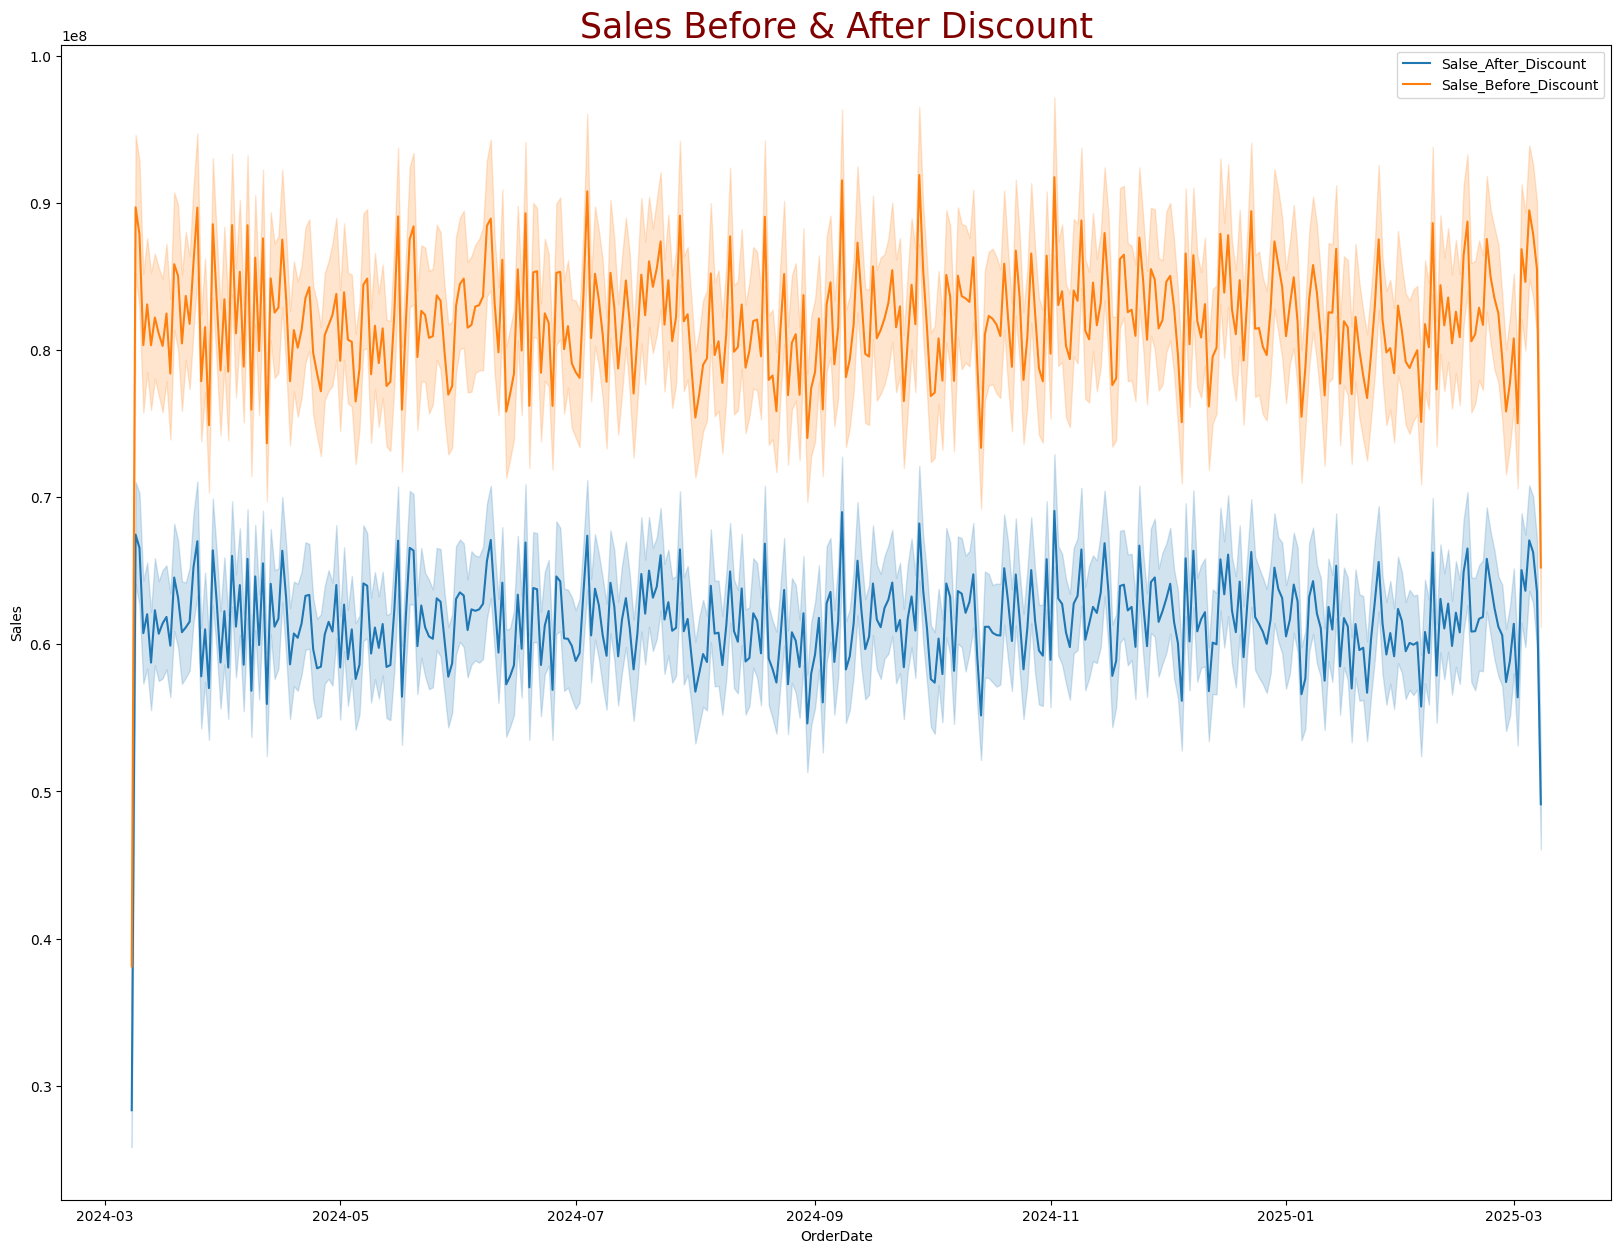

In [229]:
# Plot a line graph to show daily sales trends using OrderDate.

df2=df.copy()
df2['Sales_Before_Discount']=df2['Quantity']*df2['ProductPrice']

plt.figure(figsize=(20,15))
sb.lineplot(data=df2,x='OrderDate',y='Sales',estimator='sum',label='Salse_After_Discount')
sb.lineplot(data=df2,x='OrderDate',y='Sales_Before_Discount',estimator='sum',label='Salse_Before_Discount')
plt.title('Sales Before & After Discount',color='Maroon',size=25)
plt.legend()
plt.show()

<Figure size 2000x1500 with 0 Axes>

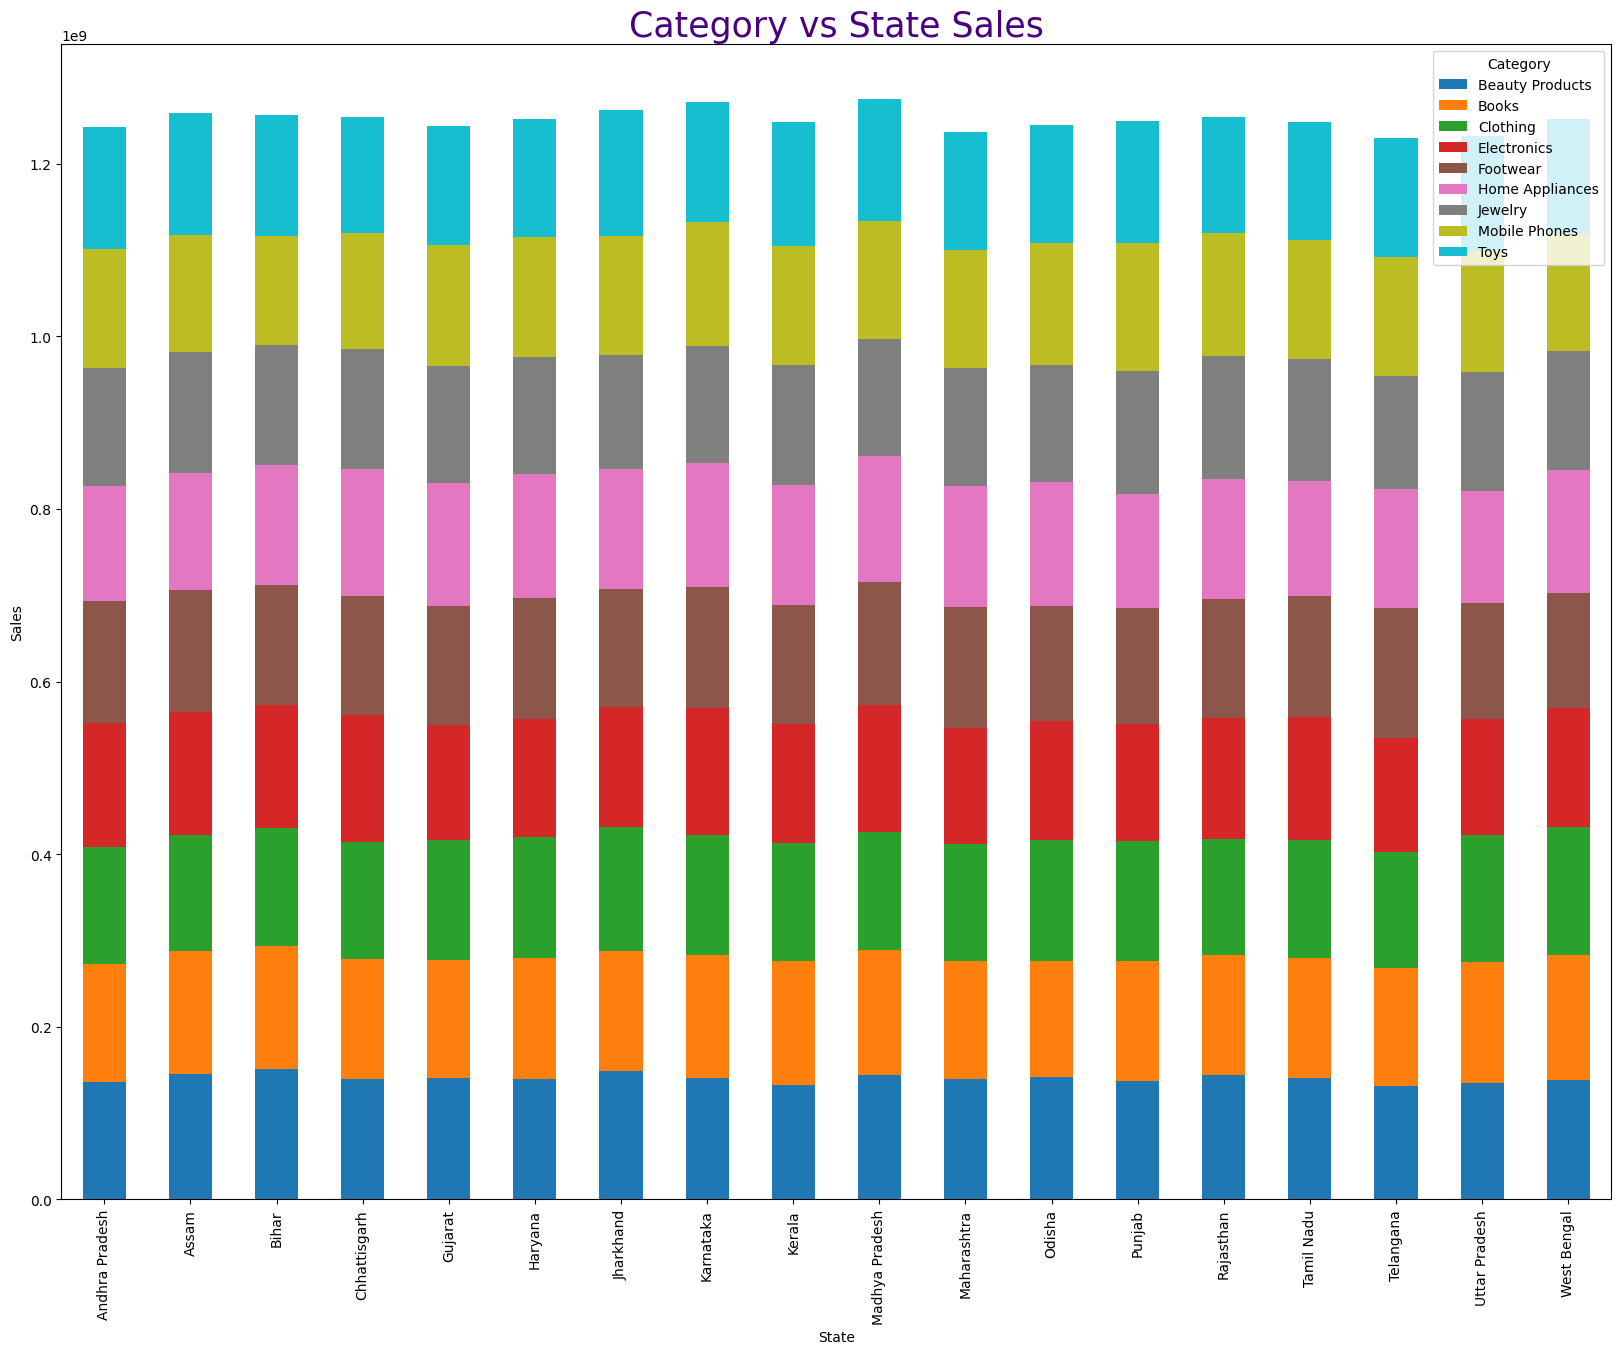

In [230]:
# Create a bar chart of total sales by state, product categorywise

plt.figure(figsize=(20,15))

pd.crosstab(columns=df['Category'],index=df['State'],values=df['Sales'],aggfunc='sum').plot(kind='bar',stacked=True,figsize=(20,15),colormap='tab10')
plt.title('Category vs State Sales', color='Indigo',size=25)
plt.ylabel('Sales')
plt.show()


<Figure size 2000x1500 with 0 Axes>

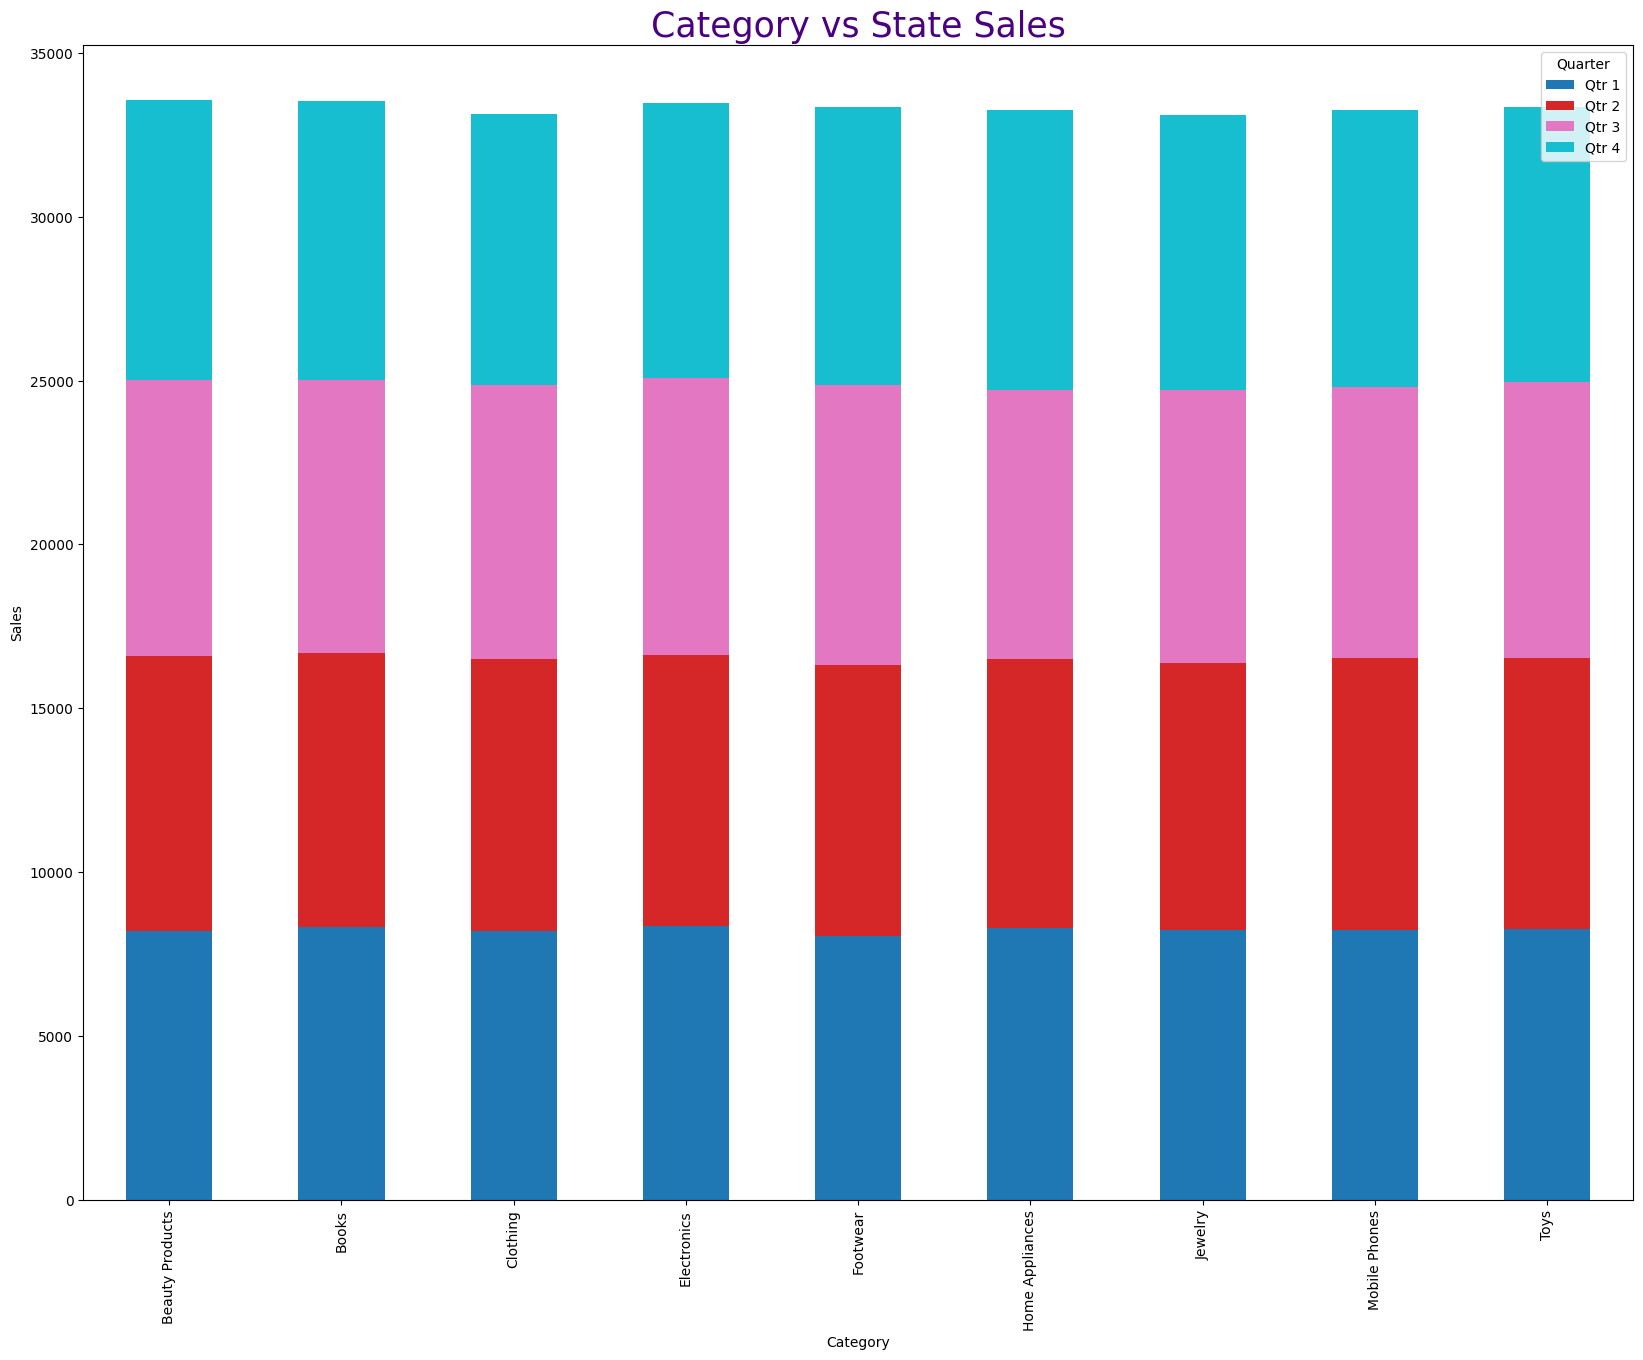

In [231]:
# Visualize Quarterly sales in each category

plt.figure(figsize=(20,15))

pd.crosstab(index=df['Category'],columns=df['Quarter'],values=df['OrderID'],aggfunc='count').plot(kind='bar',stacked=True,figsize=(20,15),colormap='tab10')
plt.title('Category vs State Sales', color='Indigo',size=25)
plt.ylabel('Sales')
plt.show()


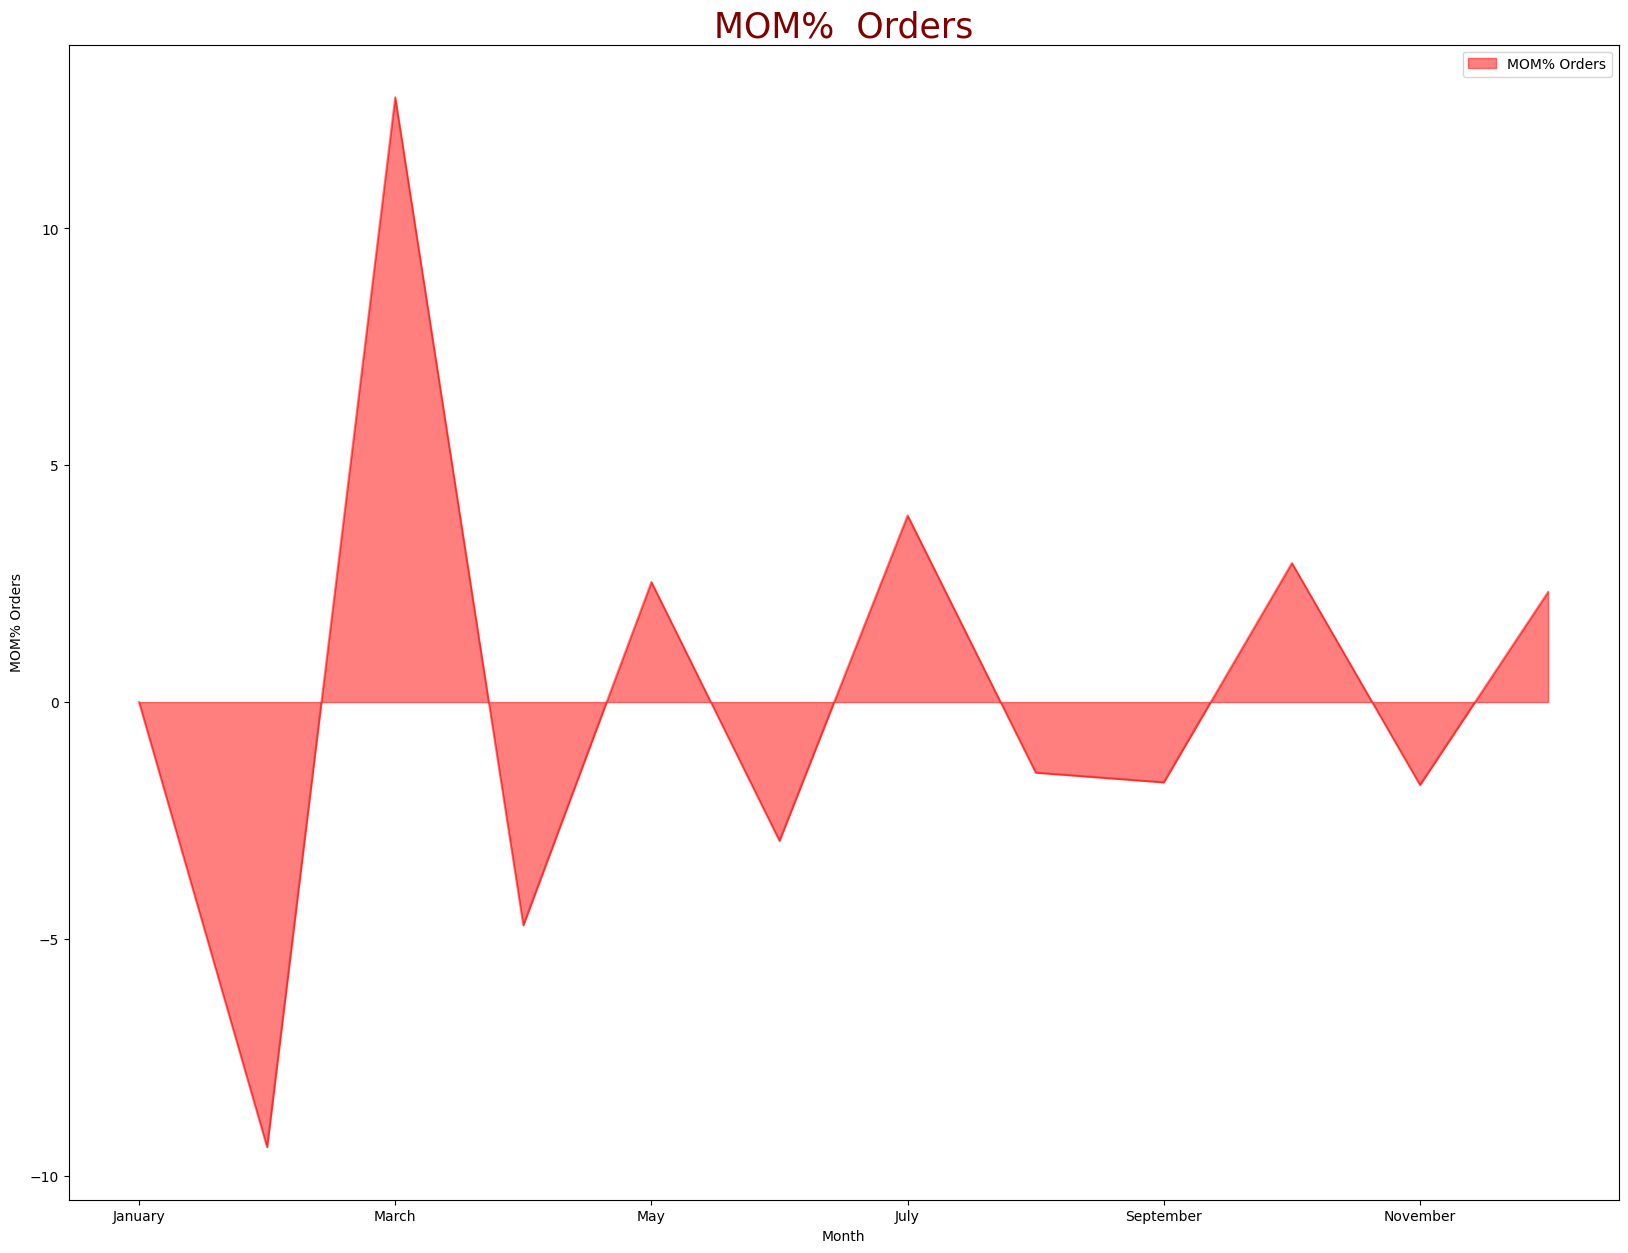

In [232]:
# Calculate MOM Orders

df_s= df.groupby(['Month','Month_N'])['OrderID'].count().reset_index().sort_values('Month_N')[['Month','OrderID']]
df_s.columns=['Month', 'Orders']
df_s['Pre_Orders']=df_s['Orders'].shift().fillna(0)
df_s['MOM% Orders']= (df_s['Orders']-df_s['Pre_Orders'])/df_s['Pre_Orders']*100
df_s['MOM% Orders']=np.where(df_s['MOM% Orders']==np.inf,0,df_s['MOM% Orders'])
df_sf=df_s[['Month', 'MOM% Orders']].set_index('Month')

df_sf.plot(kind='area',stacked=False,figsize=(20,15),alpha=0.5,color='red')
plt.title('MOM%  Orders', color='Maroon',size=25)
plt.ylabel('MOM% Orders')
plt.show()

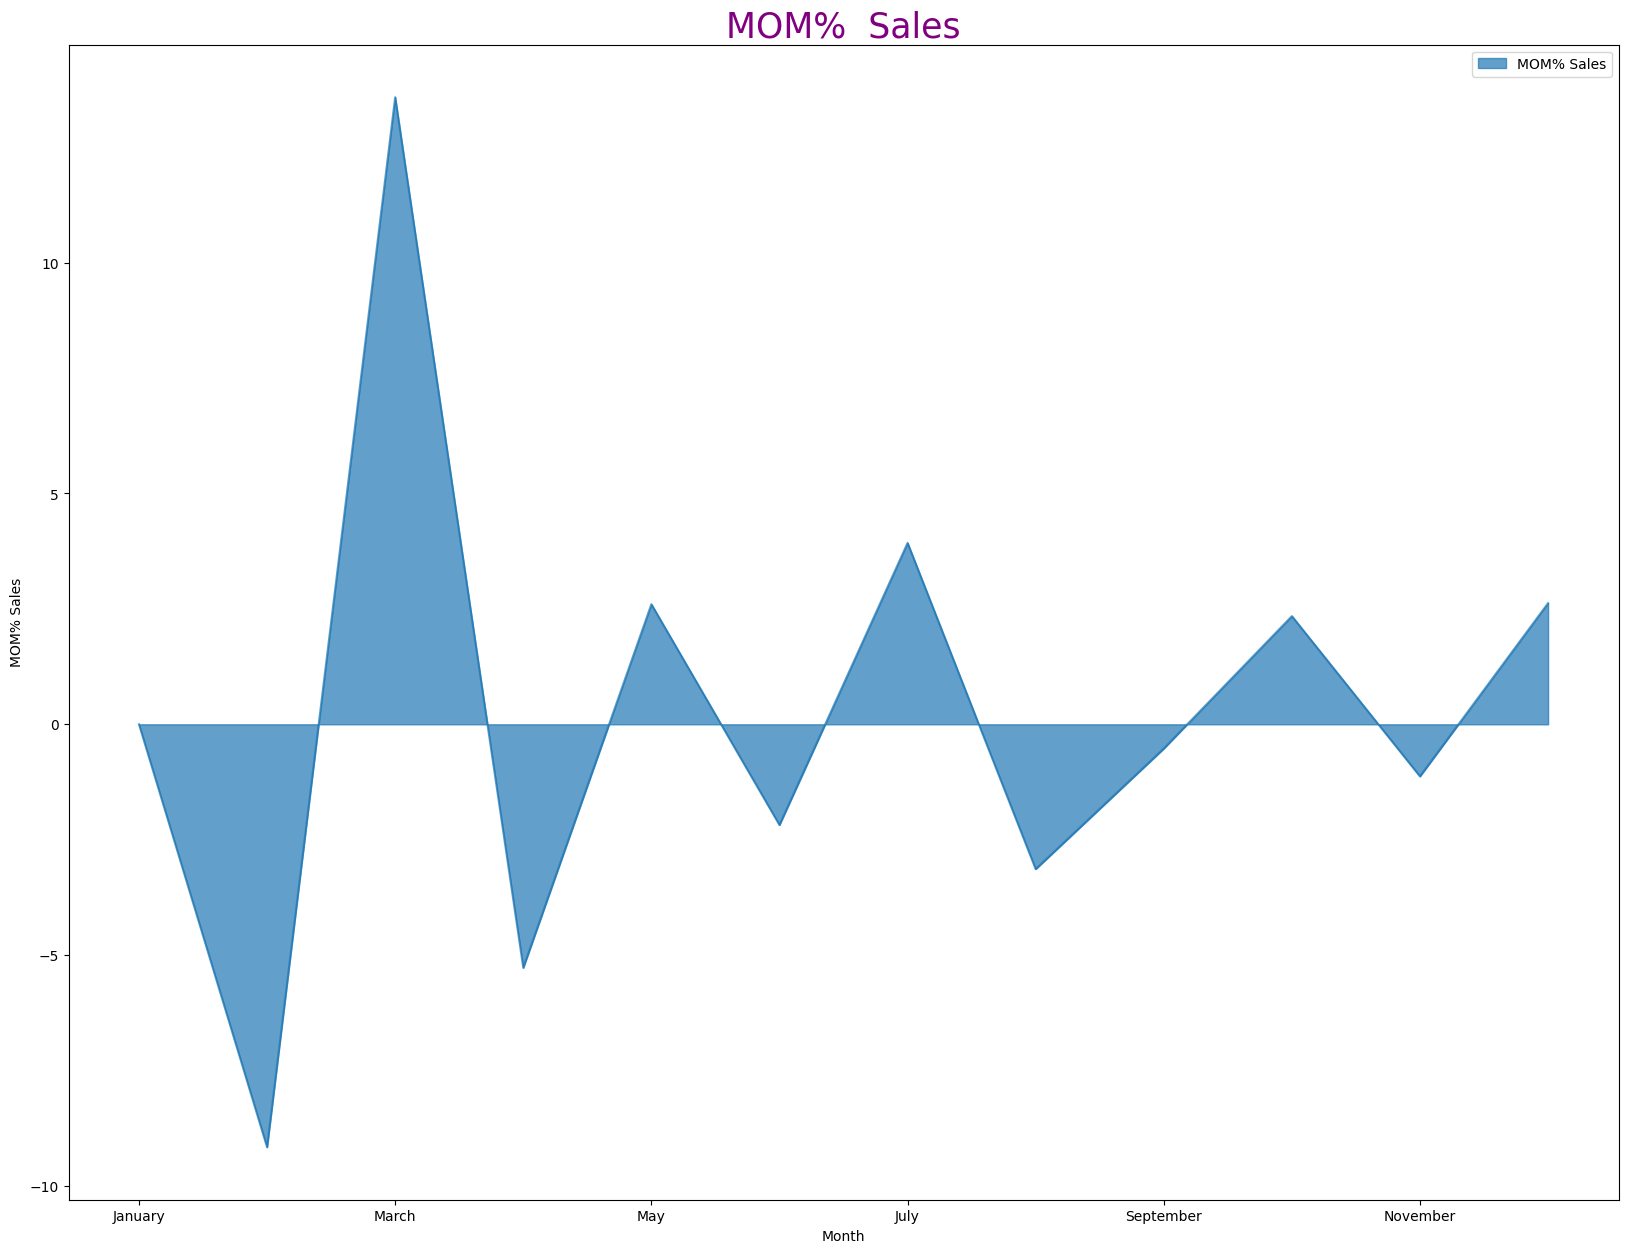

In [233]:
# Calculate MOM Sales

df_s= df.groupby(['Month','Month_N'])['Sales'].sum().reset_index().sort_values('Month_N')[['Month','Sales']]
df_s.columns=['Month', 'Sales']
df_s['Pre_Sales']=df_s['Sales'].shift().fillna(0)
df_s['MOM% Sales']= (df_s['Sales']-df_s['Pre_Sales'])/df_s['Pre_Sales']*100
df_s['MOM% Sales']=np.where(df_s['MOM% Sales']==np.inf,0,df_s['MOM% Sales'])
df_sf=df_s[['Month', 'MOM% Sales']].set_index('Month')

df_sf.plot(kind='area',stacked=False,figsize=(20,15),alpha=0.7)
plt.title('MOM%  Sales', color='Purple',size=25)
plt.ylabel('MOM% Sales')
plt.show()

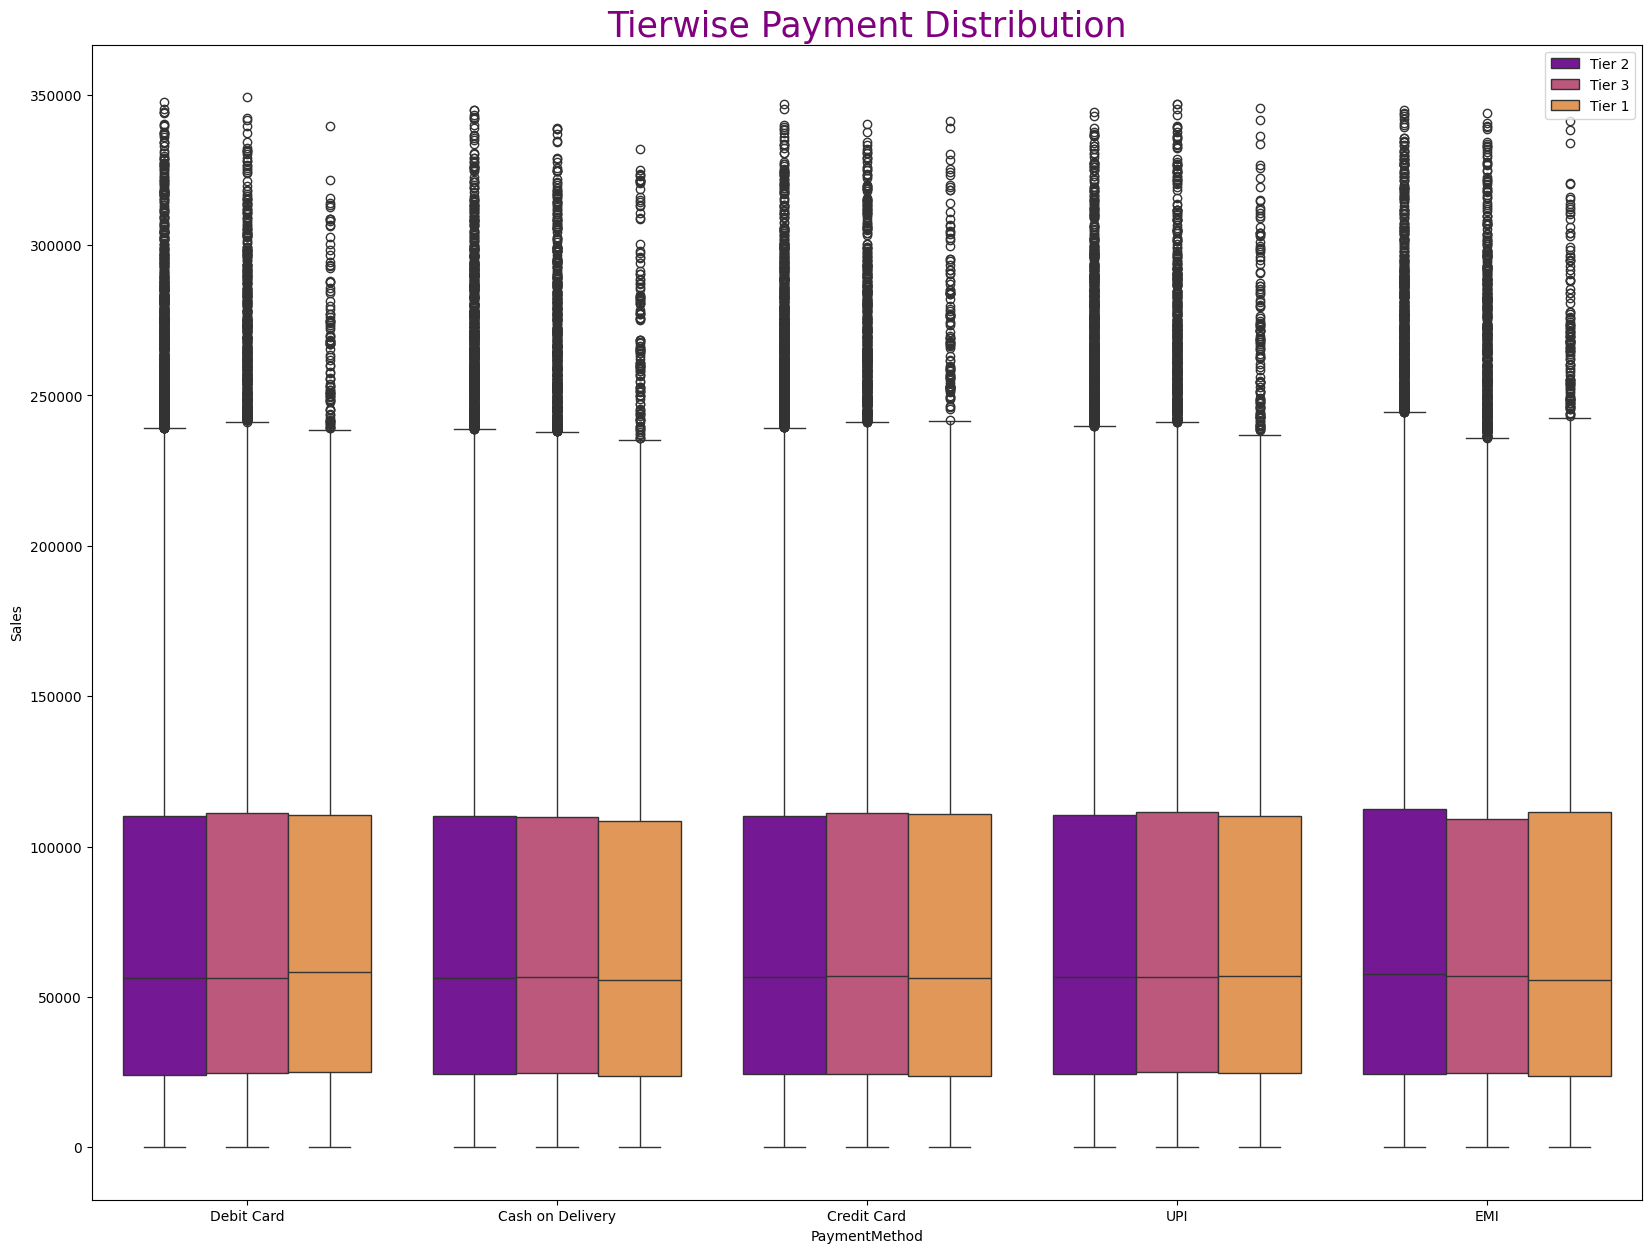

In [234]:
# Create a boxplot comparing sales distribution across different Payment Methods, Tierwise

plt.figure(figsize=(20,15))
sb.boxplot(data=df,x='PaymentMethod',y='Sales',hue='Tier',palette='plasma')
plt.title('Tierwise Payment Distribution', color='Purple',size=25)
plt.legend(loc=1)
plt.show()

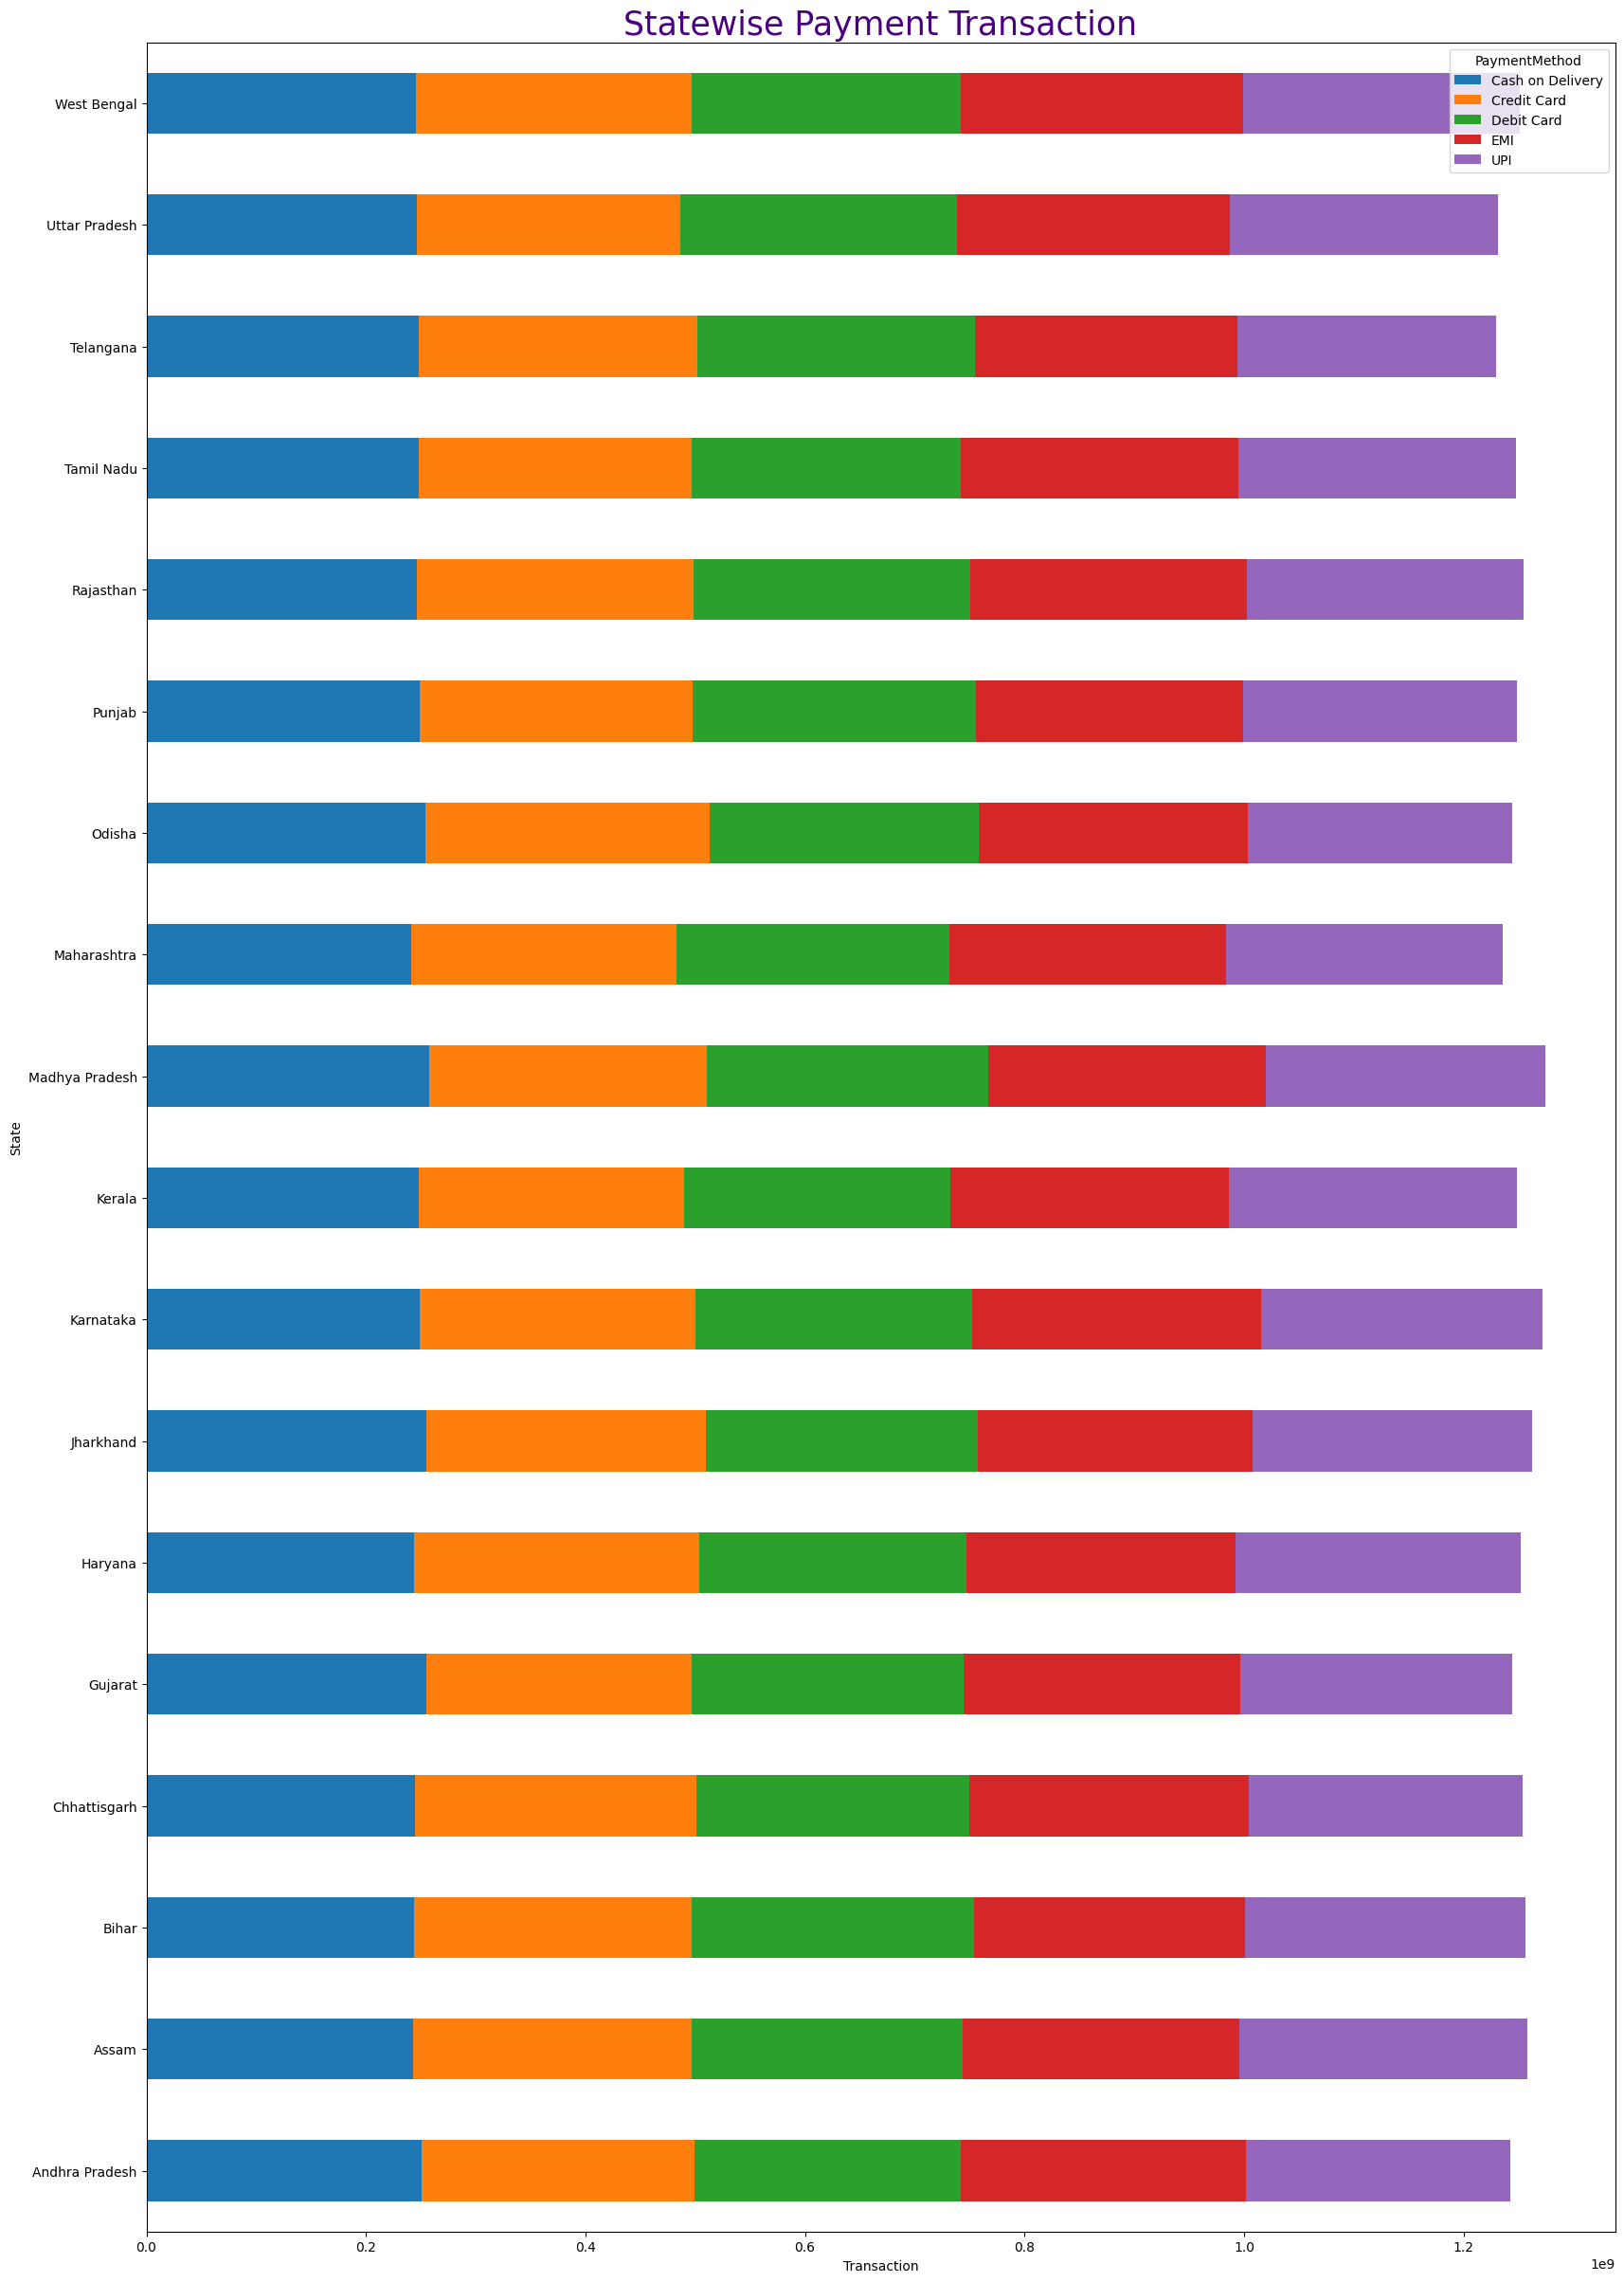

In [235]:
# Plot a stacked bar chart showing total transaction by State and PaymentMethod.

df_sp=pd.crosstab(index=df['State'],columns=df['PaymentMethod'],values=df['Sales'],aggfunc='sum')
df_sp.plot(kind='barh',stacked=True,figsize=(20,30))
plt.title('Statewise Payment Transaction', color='Indigo',size=25)
plt.xlabel('Transaction')
plt.show()

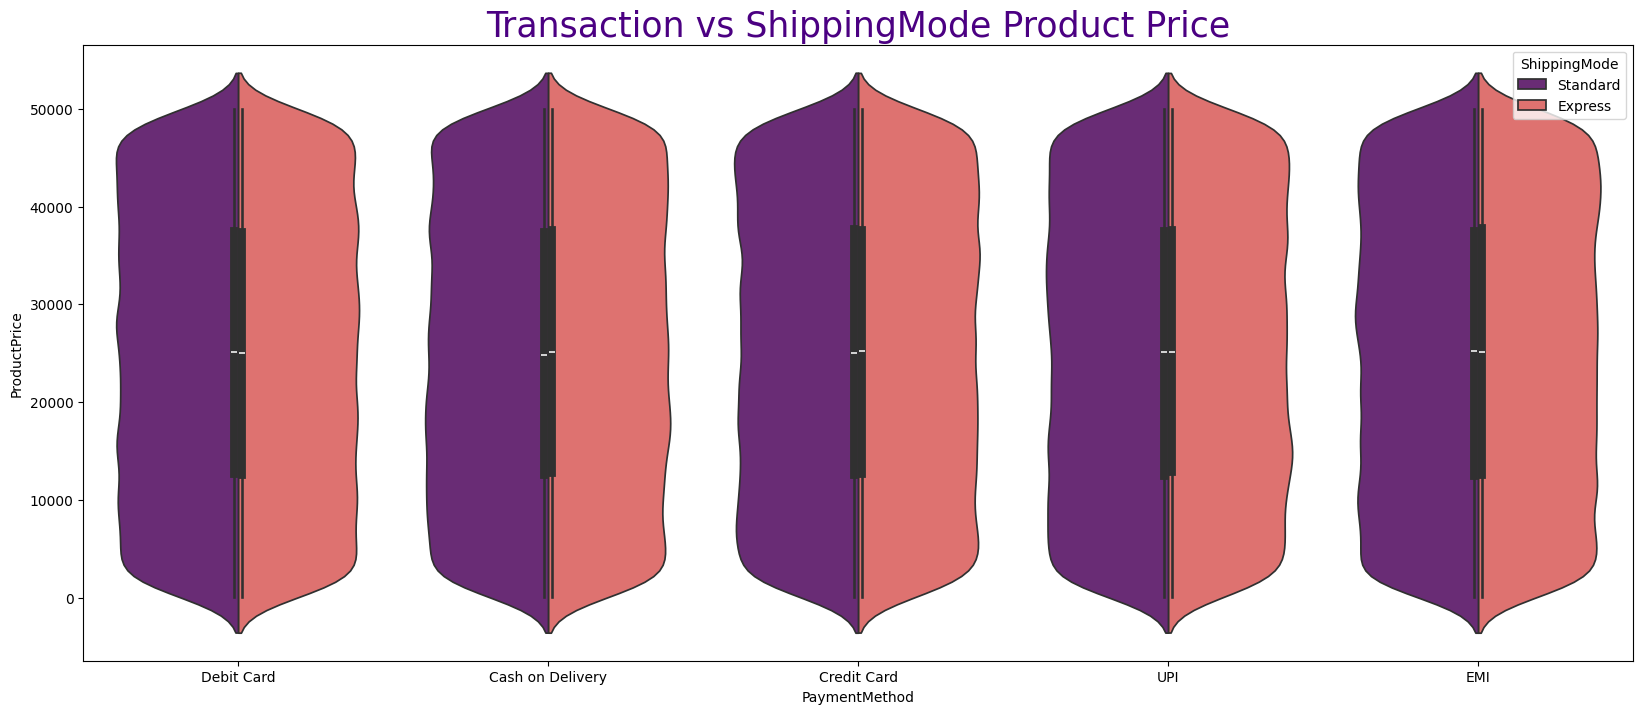

In [236]:
# Use a violin plot to compare ProductPrice distributions across different ShippingModes on different Transaction

plt.figure(figsize=(20,8))
sb.violinplot(data=df,x='PaymentMethod',hue='ShippingMode',y='ProductPrice',split=True,palette='magma')
plt.title('Transaction vs ShippingMode Product Price', color='Indigo',size=25)
plt.show()

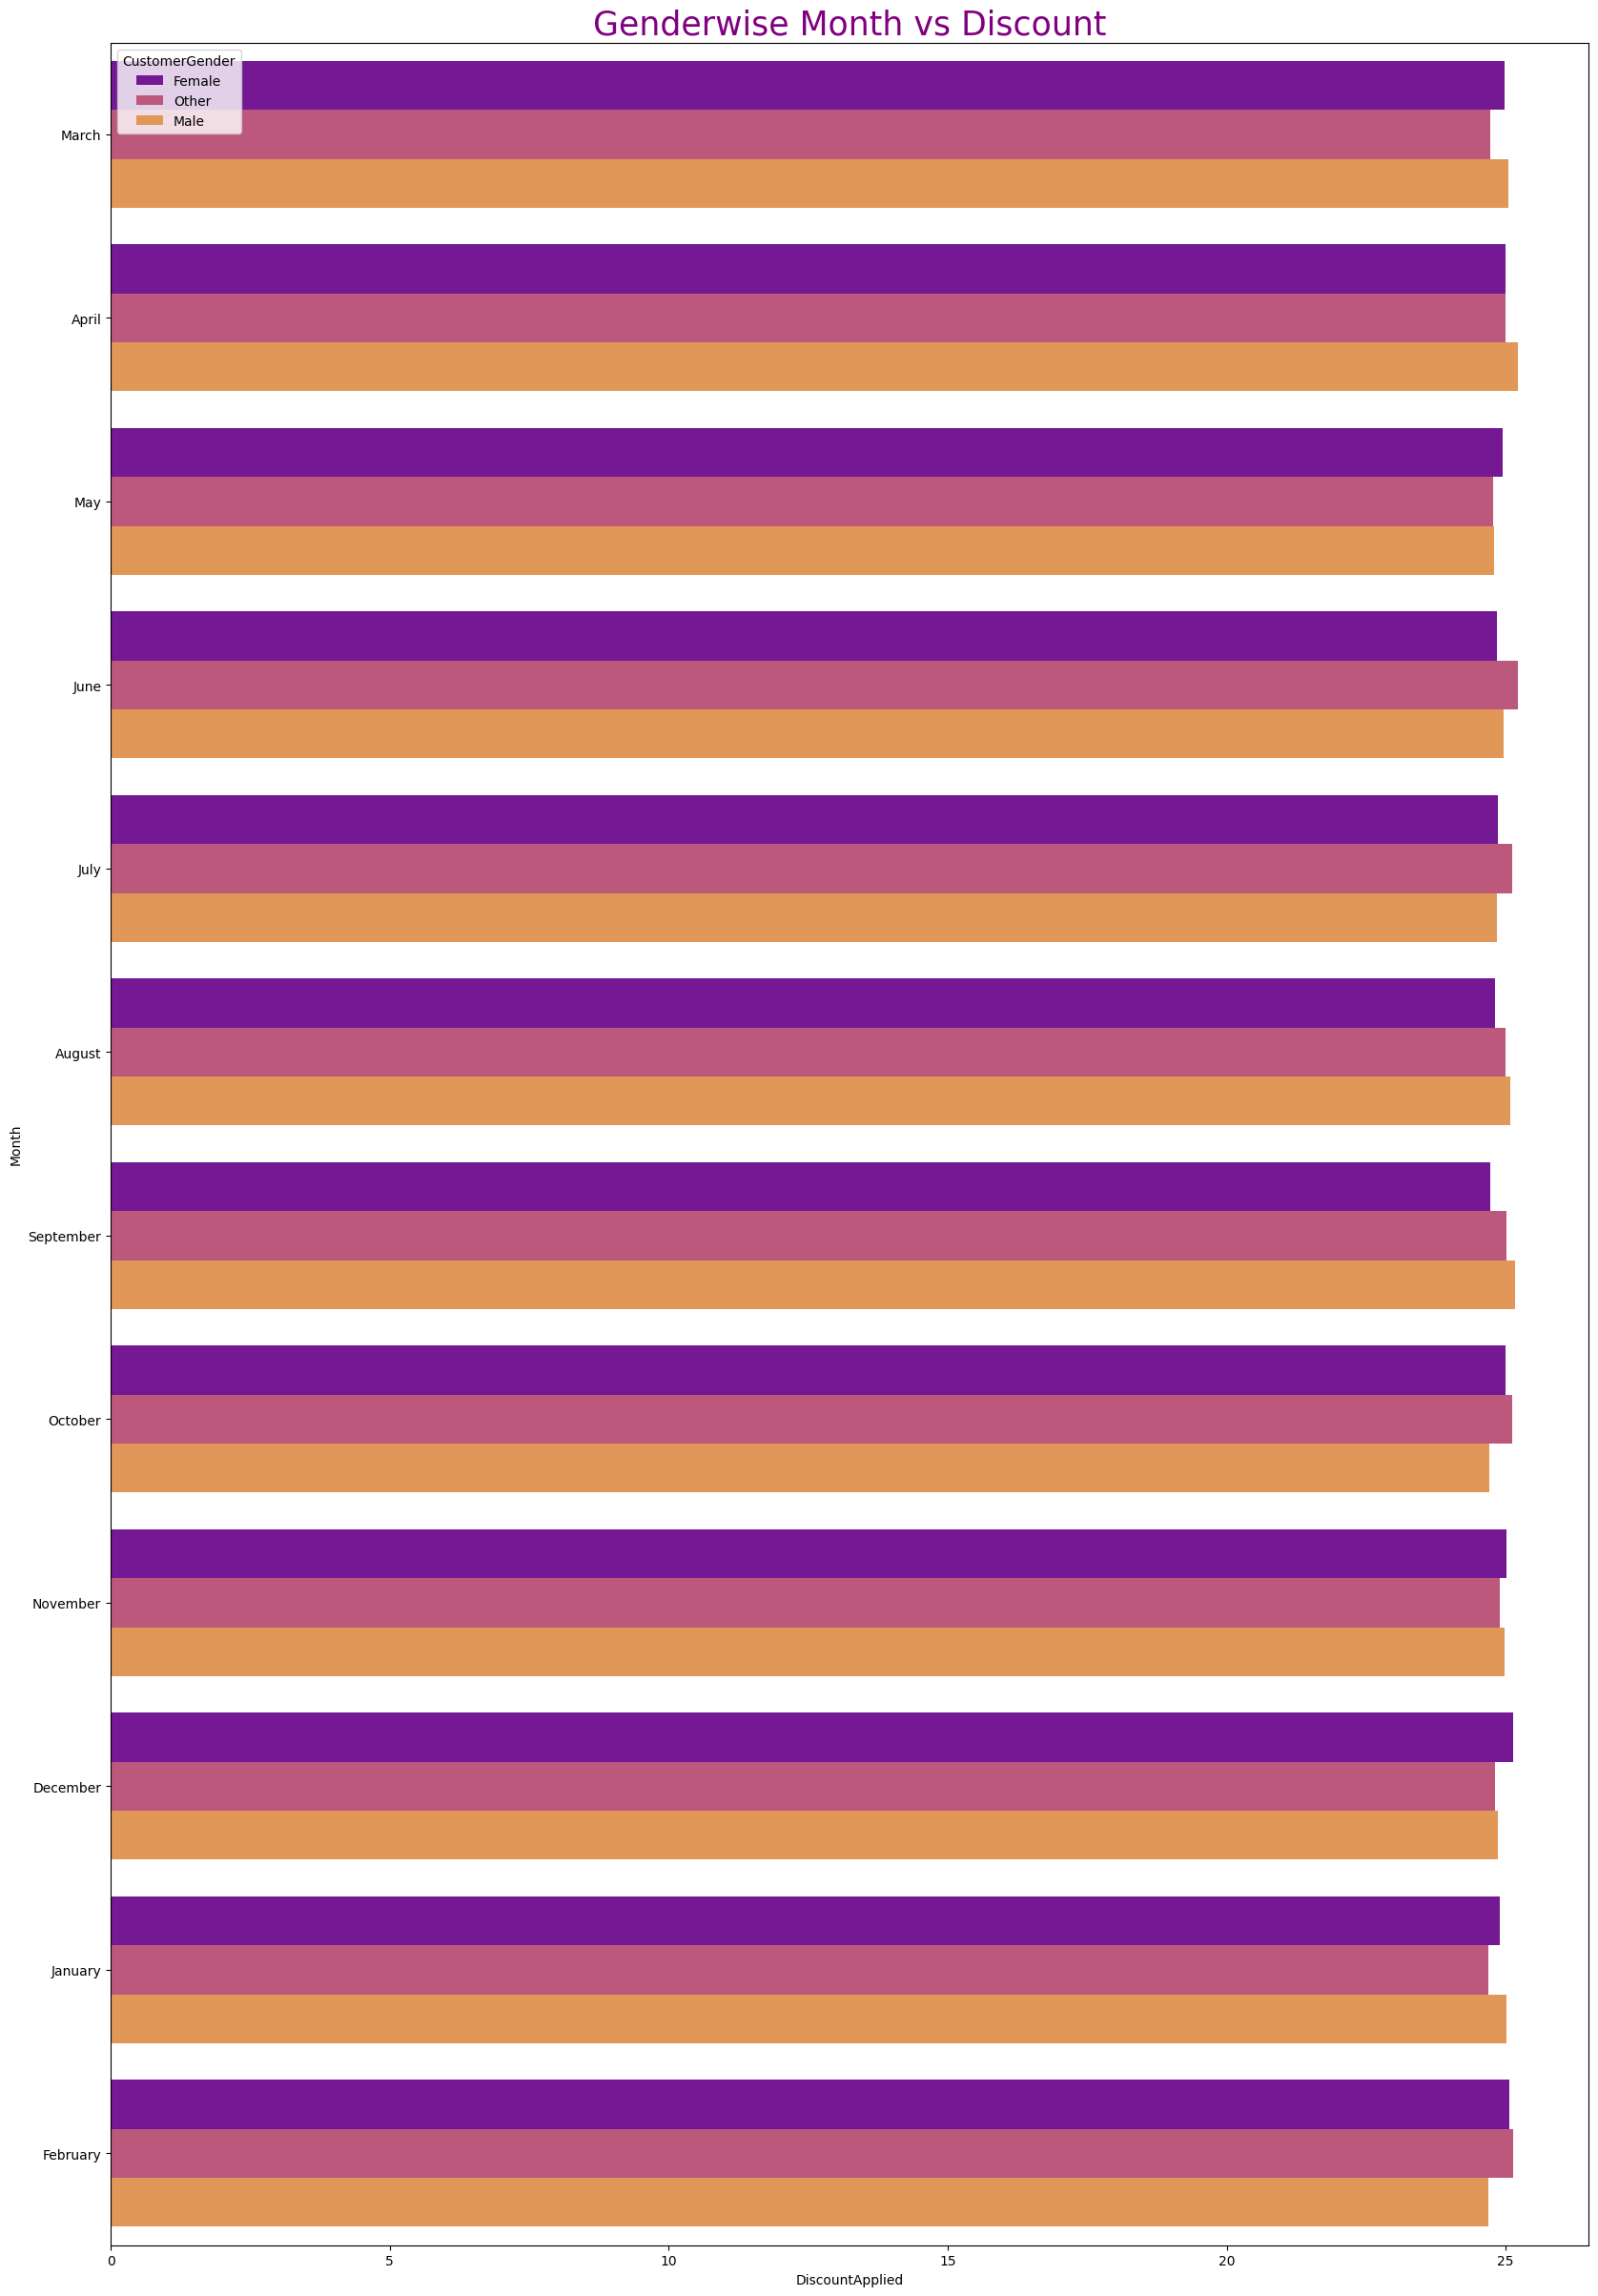

In [237]:
# Visualize average discount applied by month using a bar plot, based on Return Risk

plt.figure(figsize=(20,15*2))
sb.barplot(data=df, y='Month',x='DiscountApplied',estimator='mean',errorbar=('ci',0),hue='CustomerGender',palette='plasma')
plt.title('Genderwise Month vs Discount', color='Purple',size=25)
plt.show()

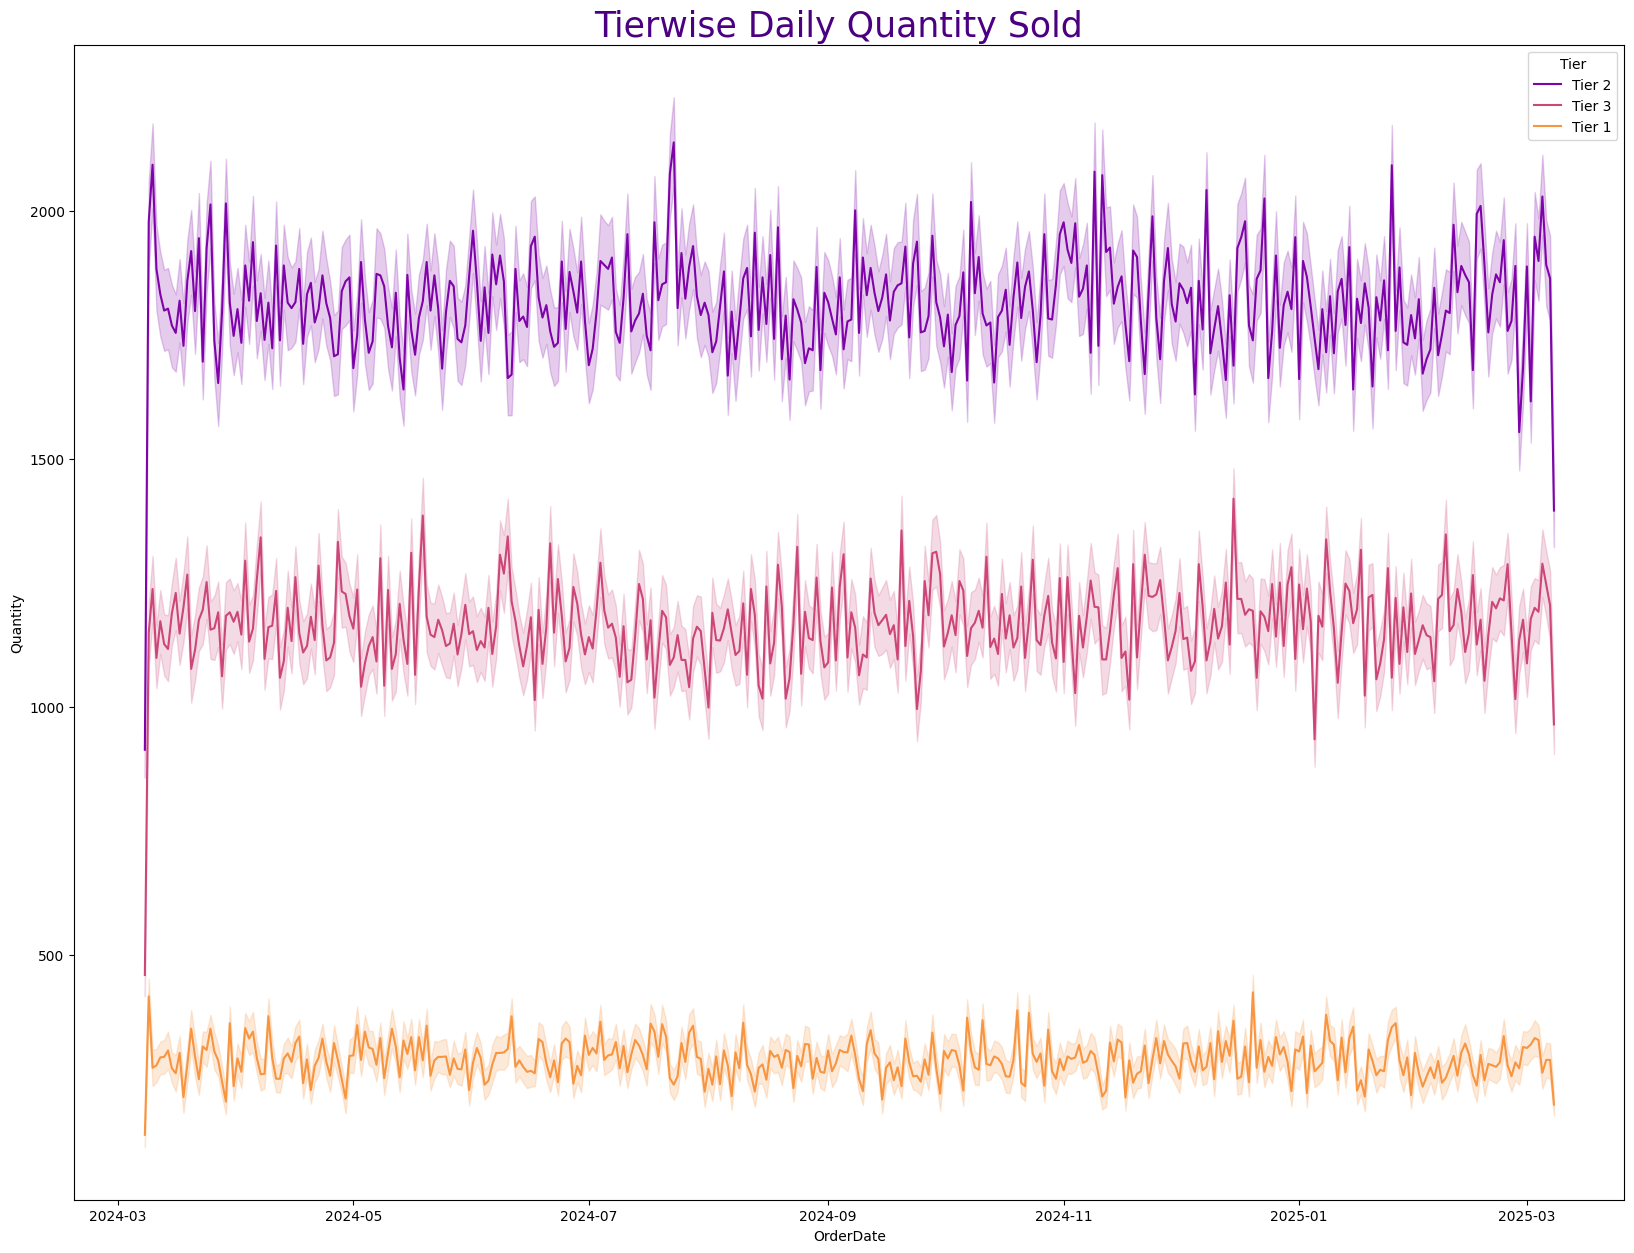

In [238]:
# Create a line plot to examine the price daywise based on different Tier

plt.figure(figsize=(20,15))
sb.lineplot(data=df,x='OrderDate',y='Quantity',estimator='sum',hue='Tier',palette='plasma' )
plt.title('Tierwise Daily Quantity Sold  ', color='Indigo',size=25)
plt.show()


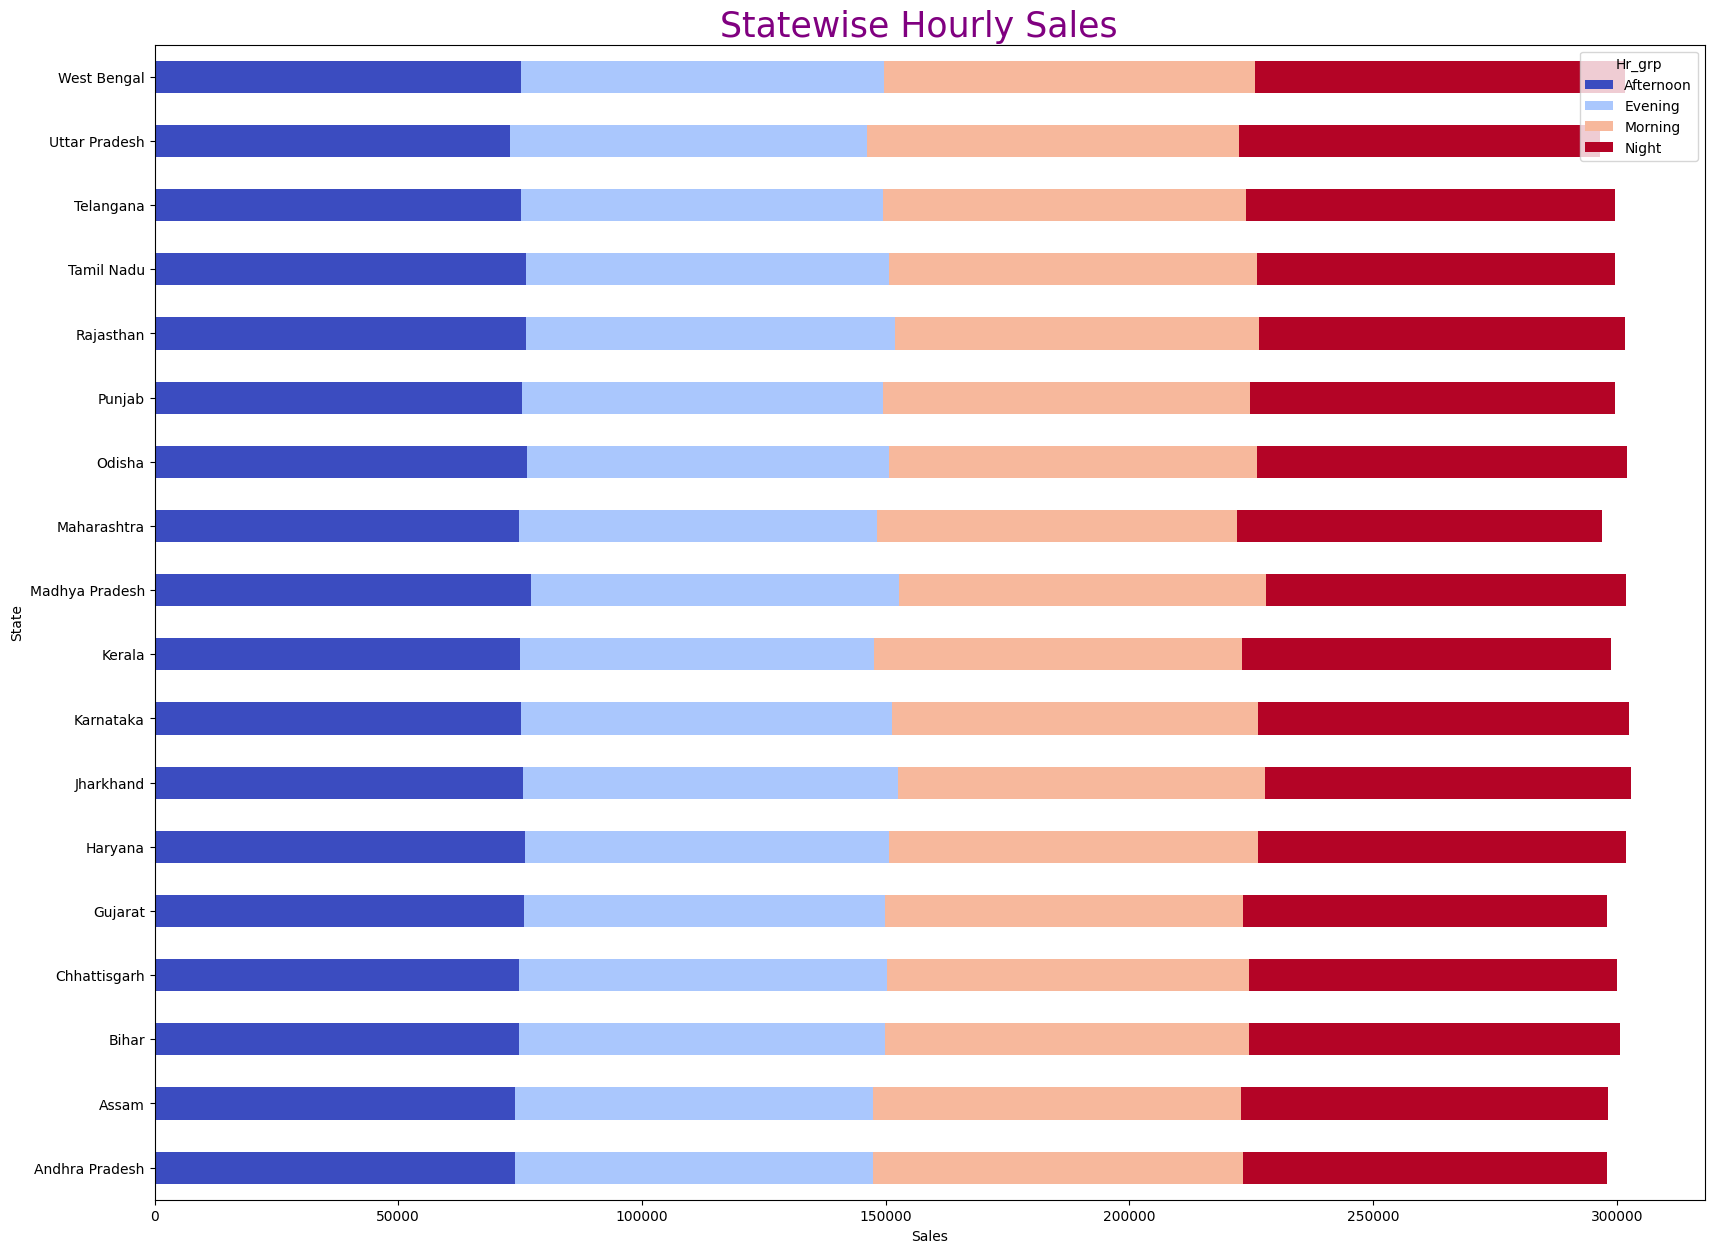

In [239]:
#  Create a bar plot comparing average revenue during different hours of the day , in different state .

df_o=pd.crosstab(columns=df['Hr_grp'],index=df['State'],values=df['Sales'],aggfunc='mean')
df_o.plot(kind='barh',stacked=True,figsize=(20,15),colormap='coolwarm')
plt.title('Statewise Hourly Sales  ', color='Purple',size=25)
plt.ylabel('State')
plt.xlabel('Sales')
plt.show()



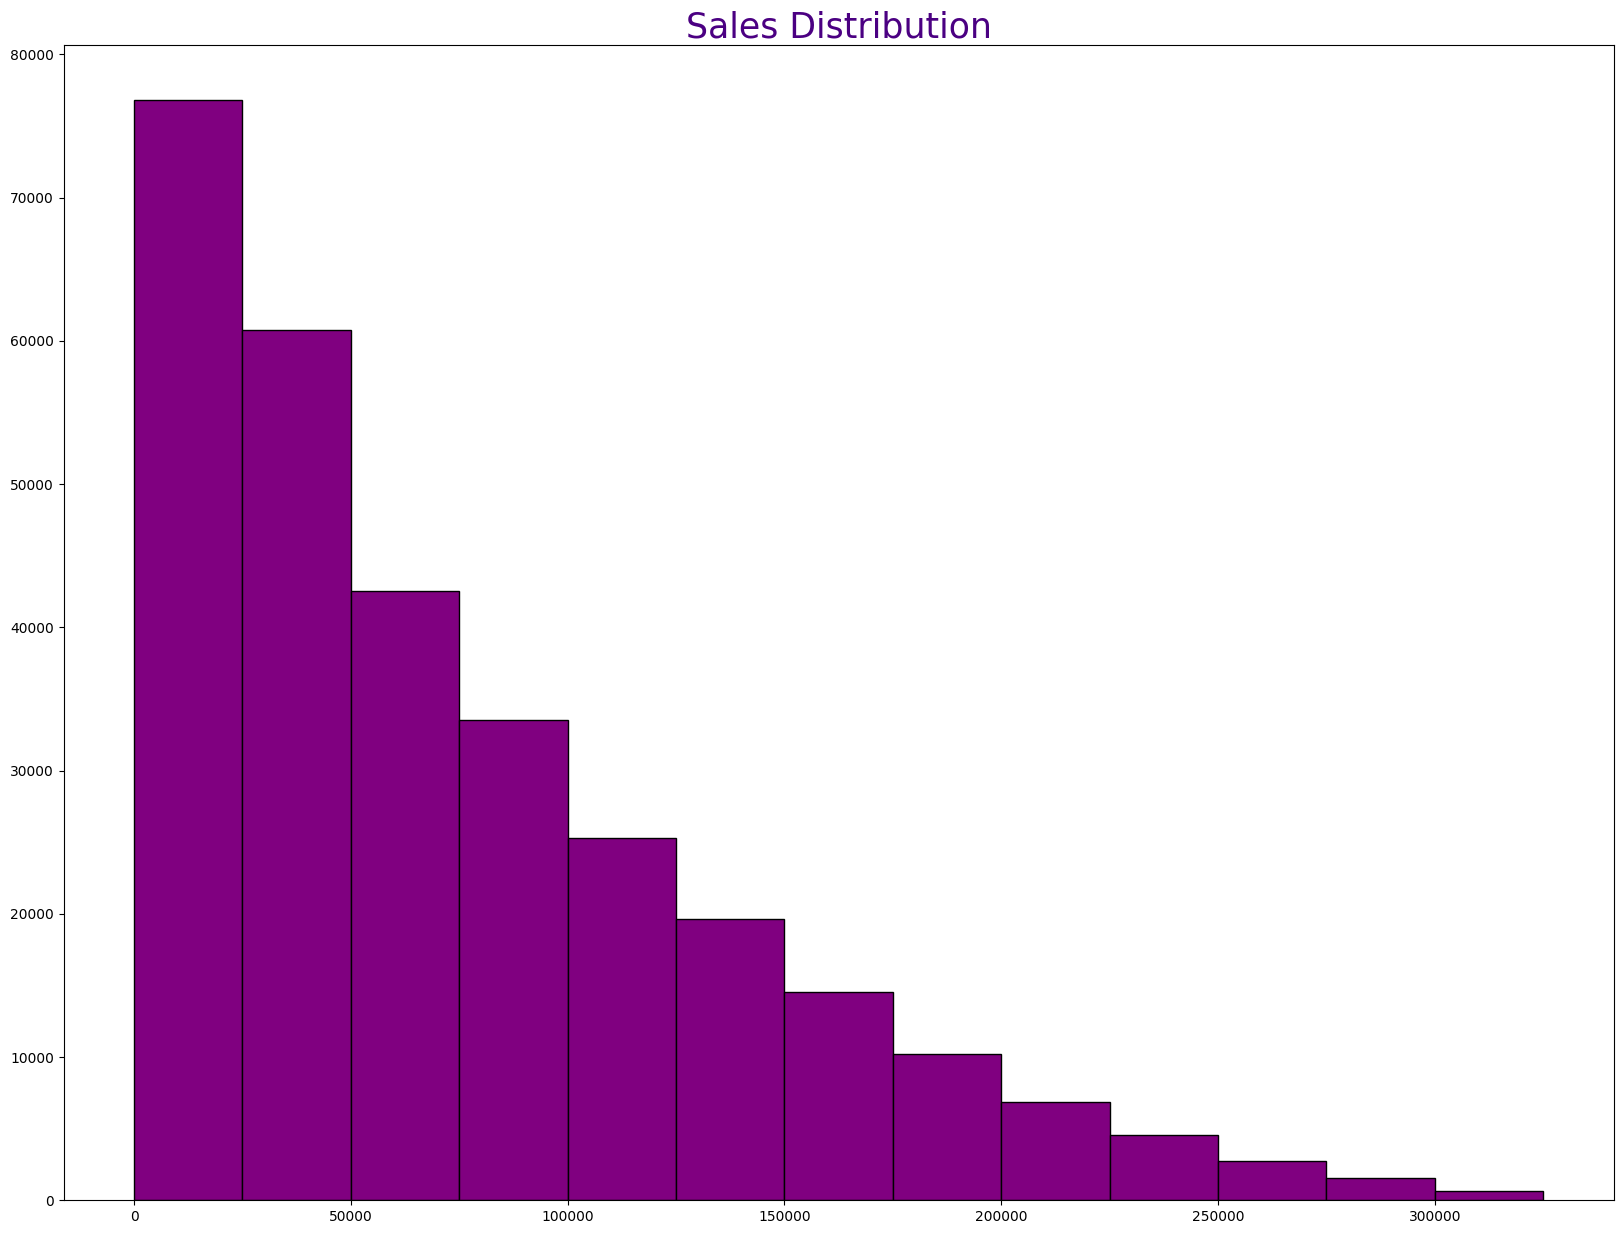

In [240]:
# Use a KDE plot to visualize the probability distribution of order values (Sales).

plt.figure(figsize=(20,15))
plt.hist(df['Sales'],edgecolor='black',color='purple',bins=np.arange(0,350000,25000))
plt.title('Sales Distribution',size=25,color='indigo')
plt.show()

## B) Customer Analysis

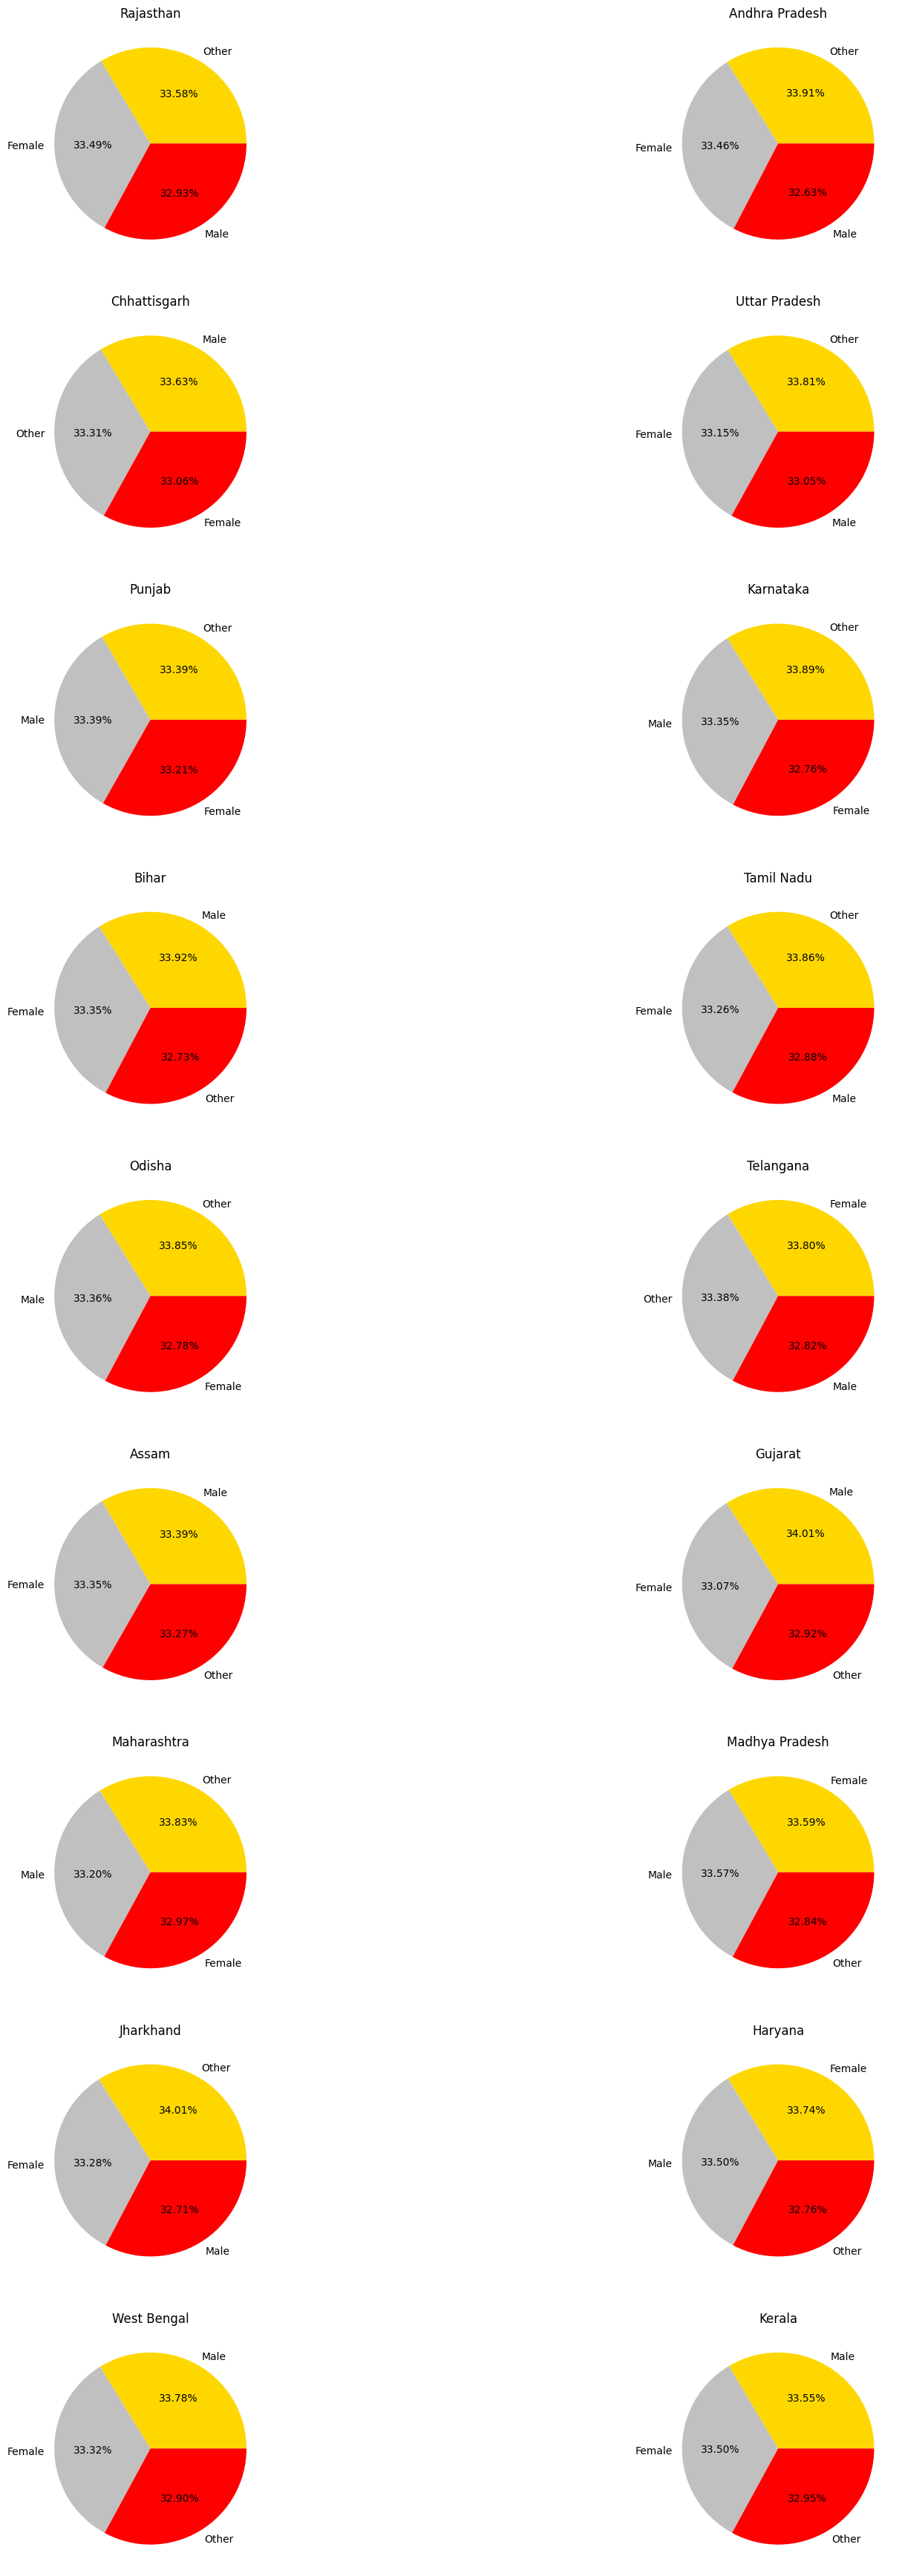

In [241]:
# Plot a pie chart showing the gender-wise distribution of customers, in each state

state=df['State'].unique().tolist()
plt.figure(figsize=(20,100))

for i in range(len(state)):
  df_s=df[df['State']==state[i]]
  df_d=df_s['CustomerGender'].value_counts().reset_index()
  df_d.columns=['Gender','Values']
  plt.subplot(20,2,i+1)
  plt.pie(df_d['Values'],labels=df_d['Gender'],autopct='%0.2f%%',colors=['gold','silver','red'] )
  plt.title(f'{state[i]}')


plt.show()

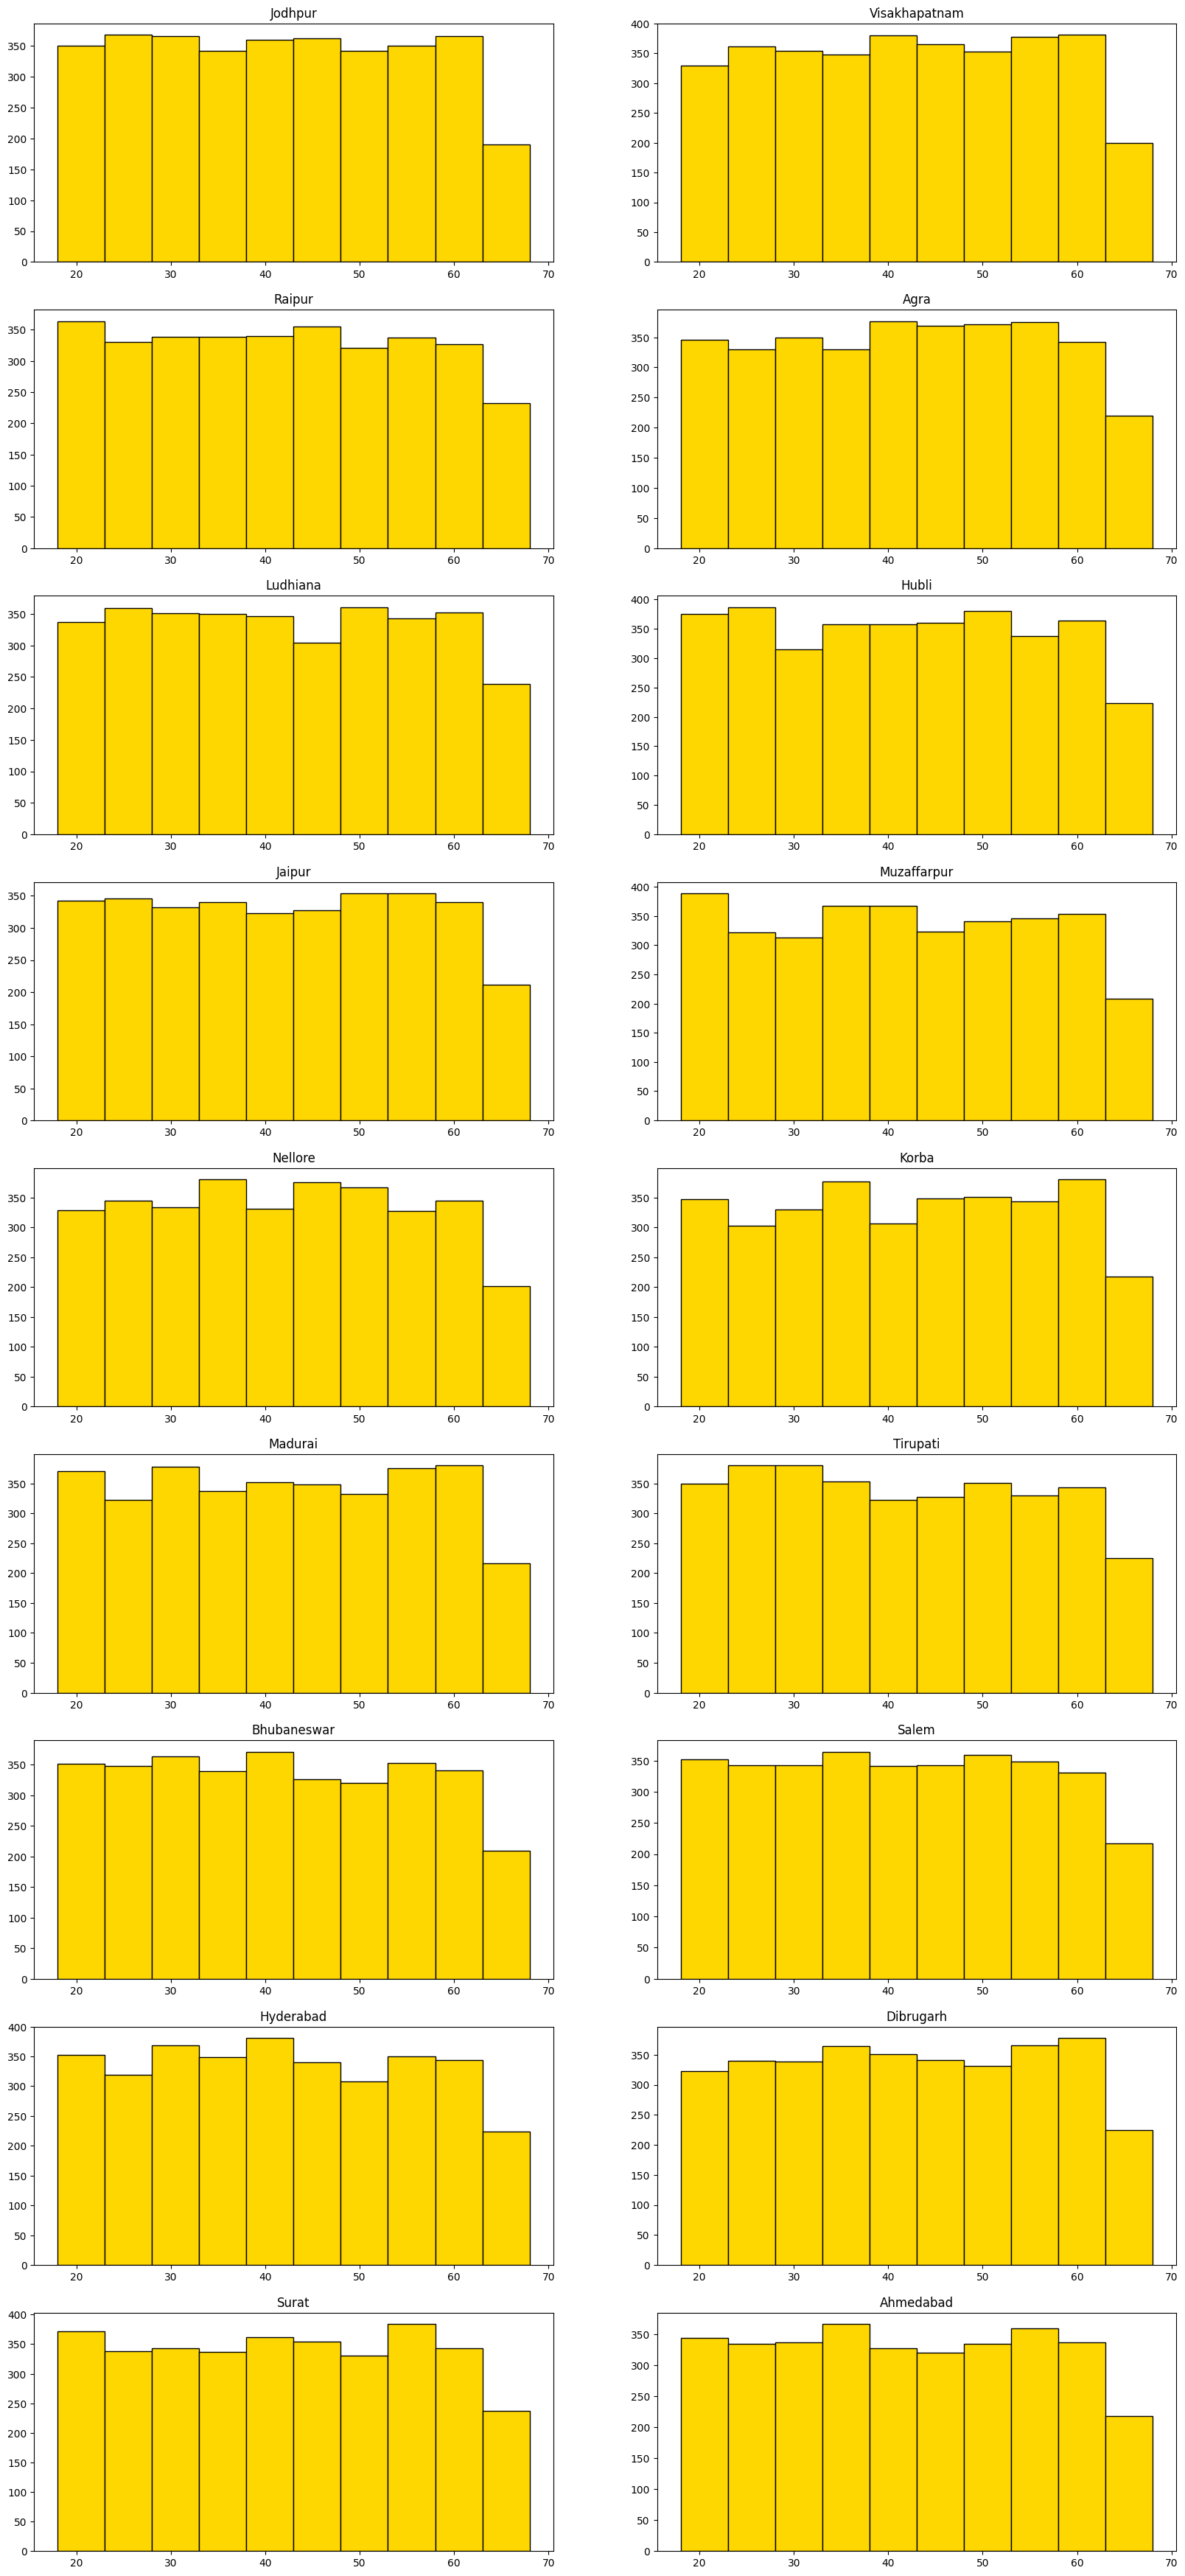

In [242]:
# Create a barplot to show  customer age by city.

city=df['City'].unique().tolist()
plt.figure(figsize=(20,100))

for i in range(len(state)):
  df_s=df[df['City']==city[i]]
  plt.subplot(20,2,i+1)
  plt.hist(df_s['CustomerAge'],bins=np.arange(18,70,5),edgecolor='black',color='gold')
  plt.title(f'{city[i]}')

plt.show()

<Figure size 2000x1000 with 0 Axes>

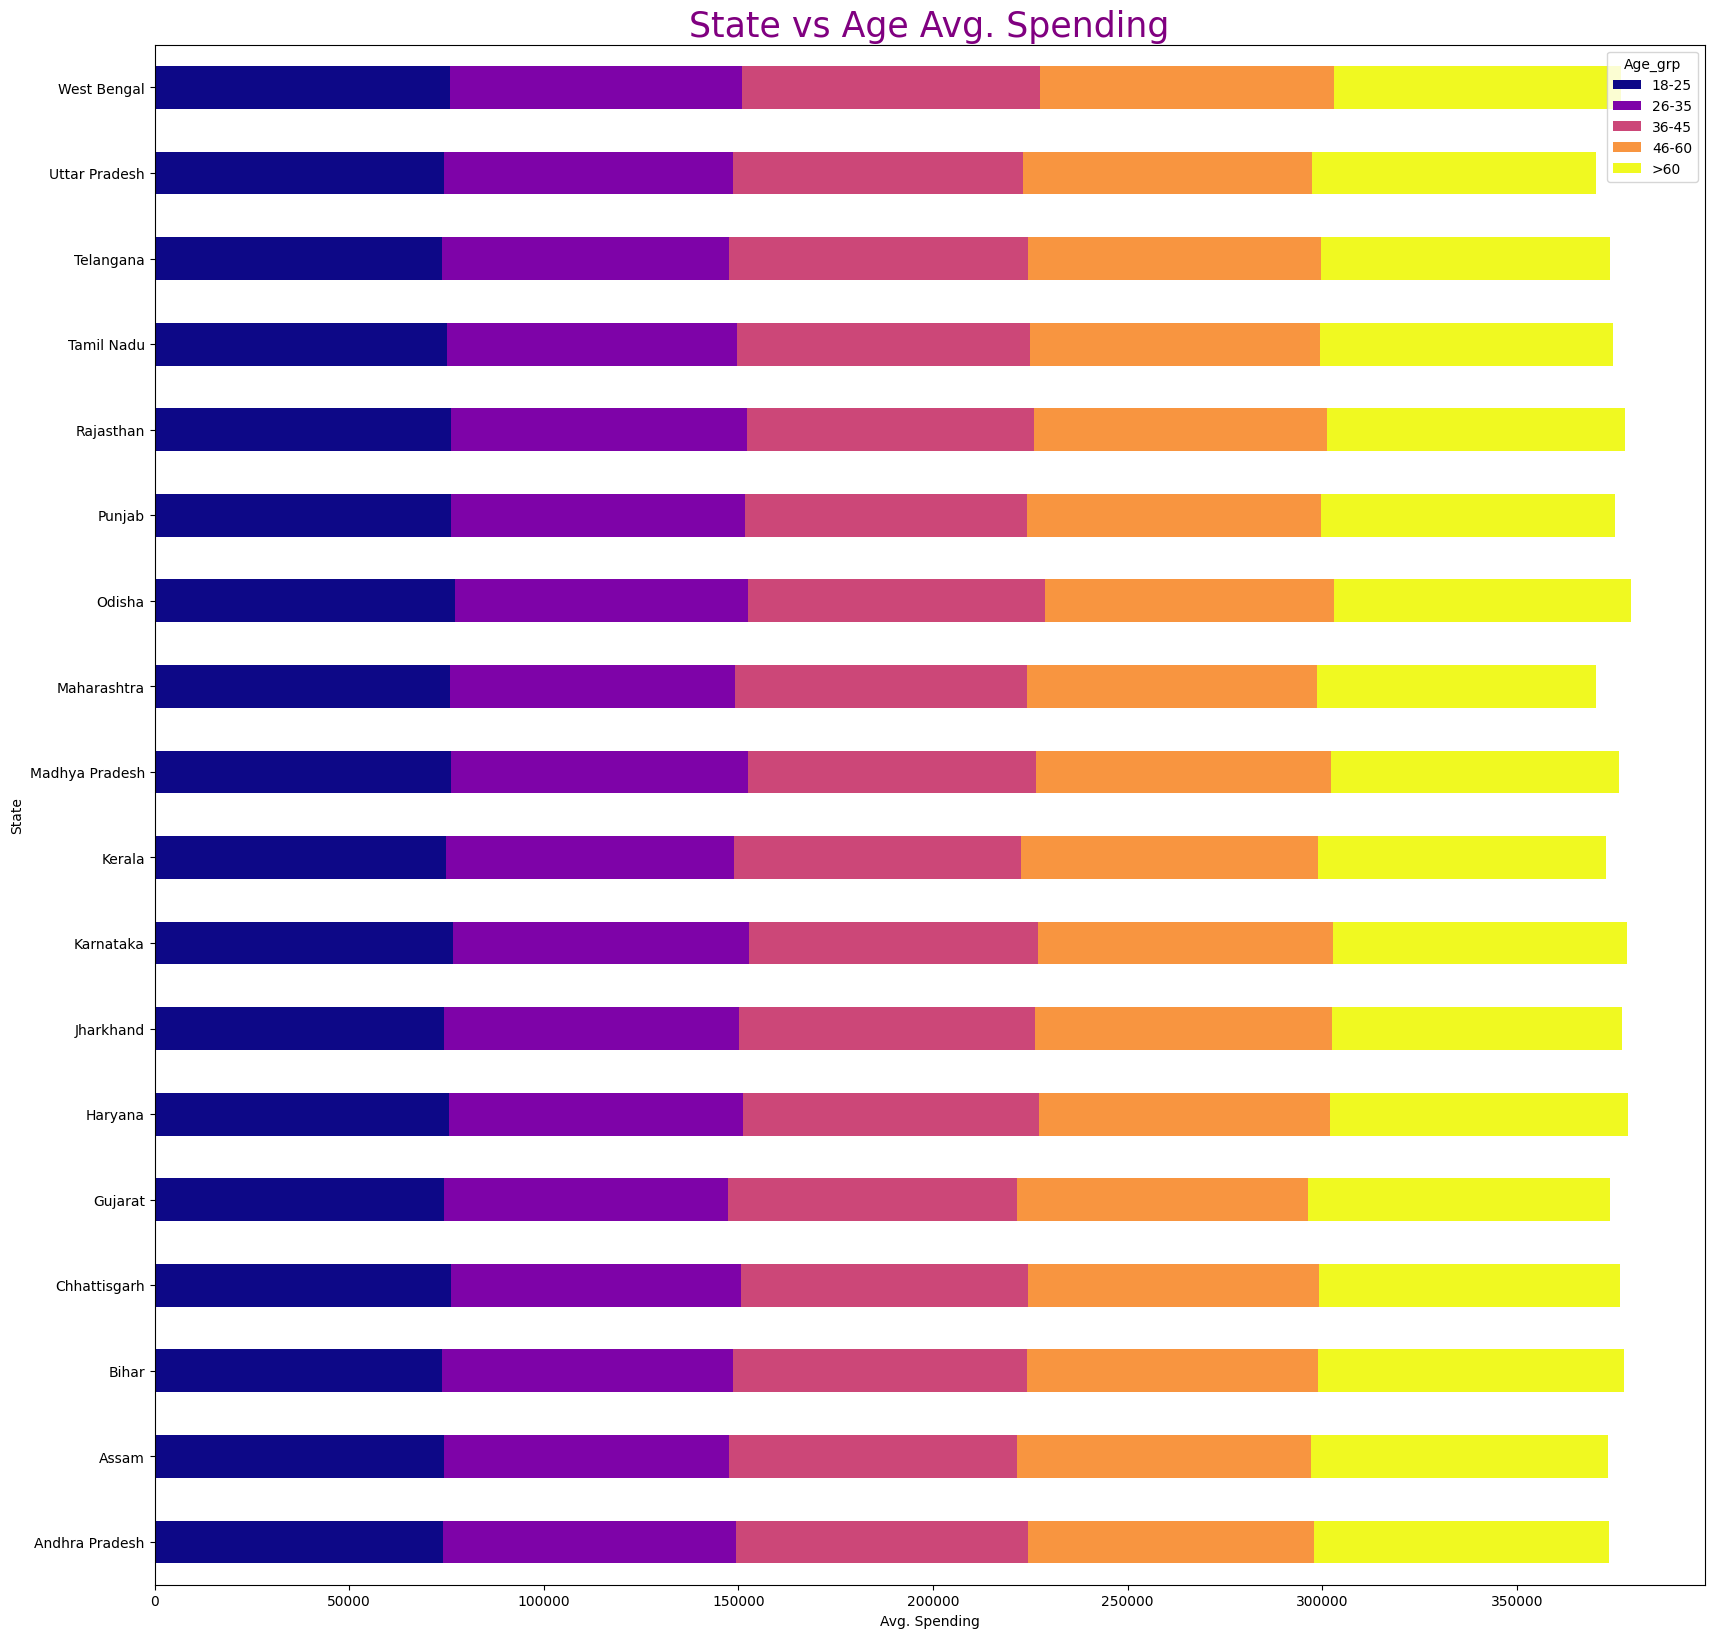

In [243]:
# Create a bar chart to show average customer spending by State in different age category.

plt.figure(figsize=(20,10))
df_f=pd.crosstab(index=df['State'],columns=df['Age_grp'],values=df['Sales'],aggfunc='mean')
df_f.plot(kind='barh',stacked=True,figsize=(20,20),colormap='plasma' )
plt.title('State vs Age Avg. Spending',size=25,color='purple')
plt.xlabel('Avg. Spending')
plt.show()

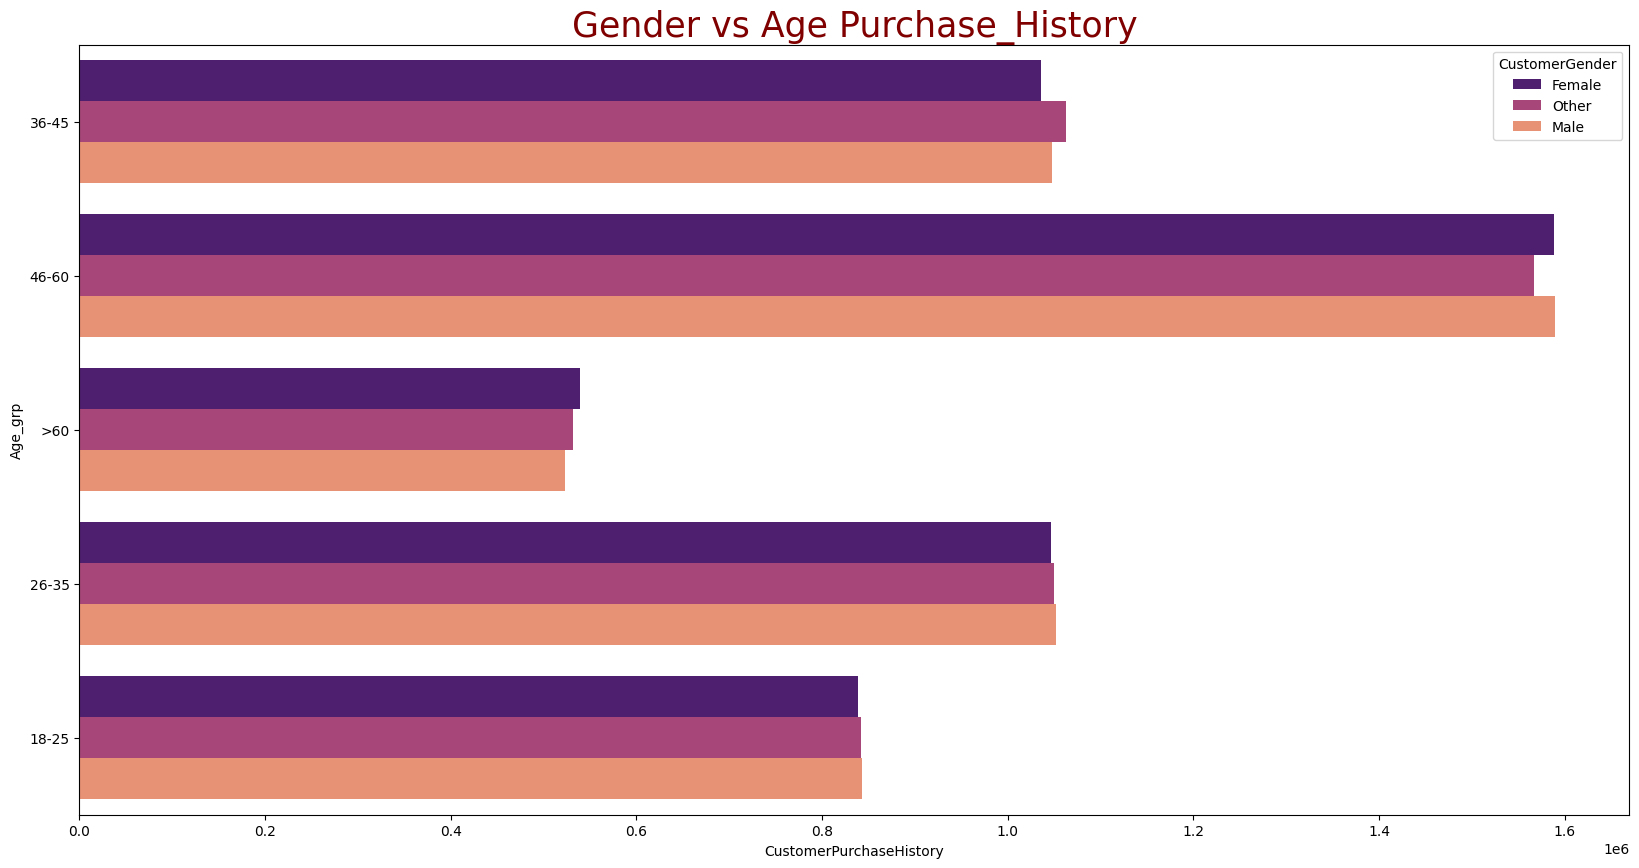

In [244]:
# Use a volinplot to visualize CustomerAge vs Purchase History by Gender.

plt.figure(figsize=(20,10))
sb.barplot(data=df,y='Age_grp',x='CustomerPurchaseHistory',hue='CustomerGender',estimator='sum',palette='magma',errorbar=('ci',0) )
plt.title('Gender vs Age Purchase_History',size=25,color='maroon')
plt.show()

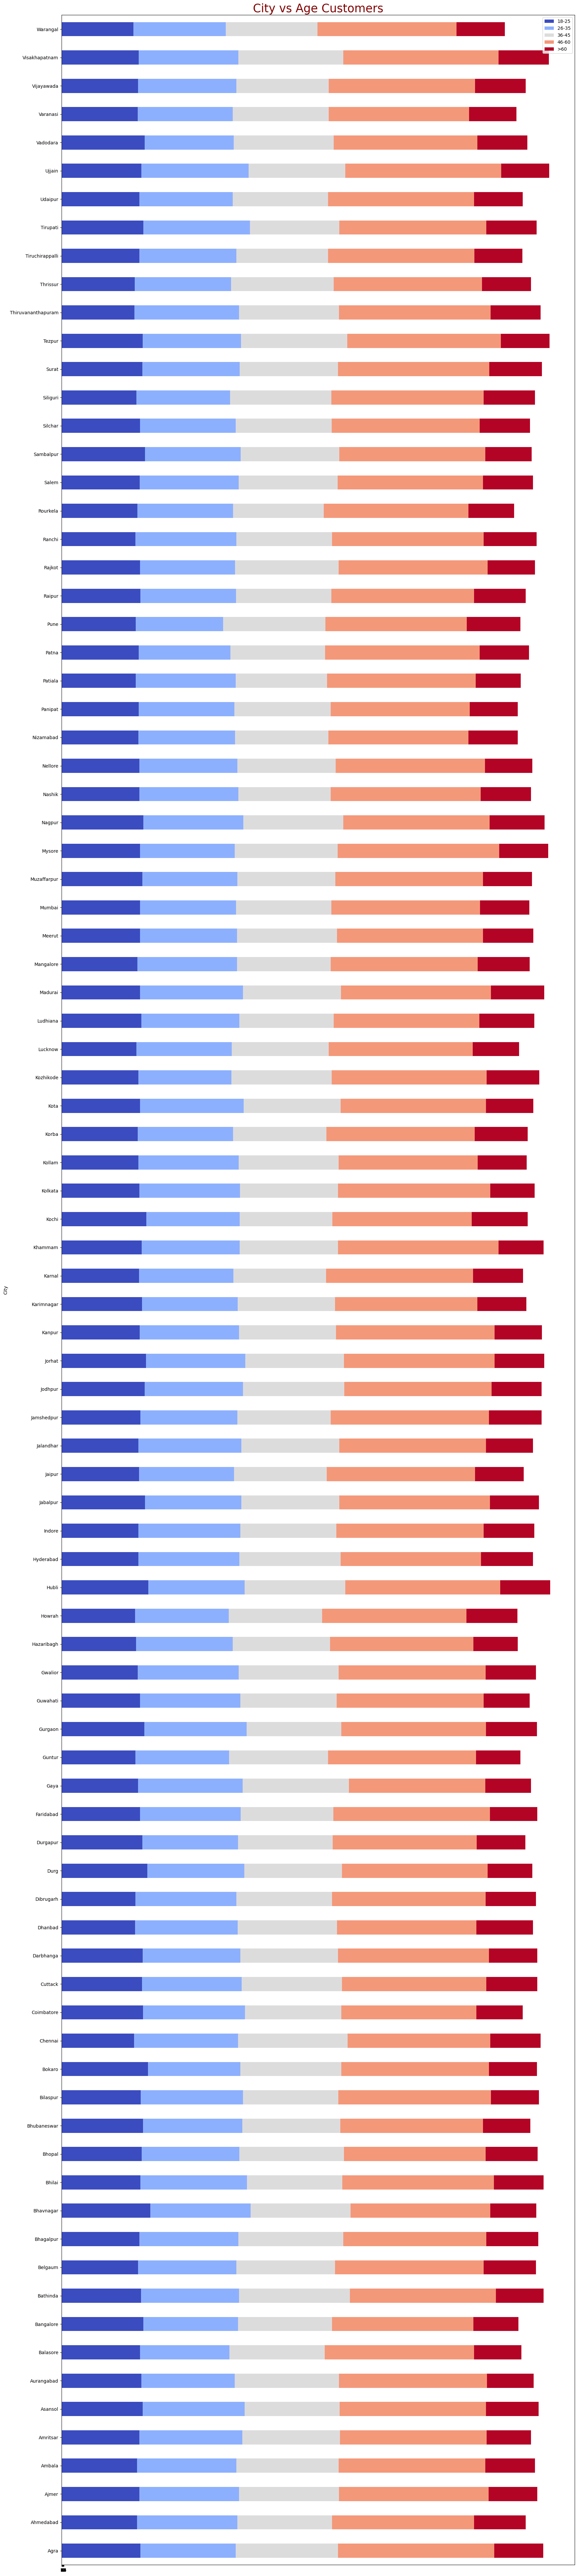

In [245]:
# Create a bar for total customer across different Age groups and Cities.

df_x=pd.crosstab(index=df['City'],columns=df['Age_grp'])
df_x.plot(kind='barh',stacked=True,figsize=(20,100),colormap='coolwarm' )
plt.legend(loc=1)
plt.xticks(np.arange(0,16,1))
plt.title('City vs Age Customers',size=25,color='maroon')
plt.show()


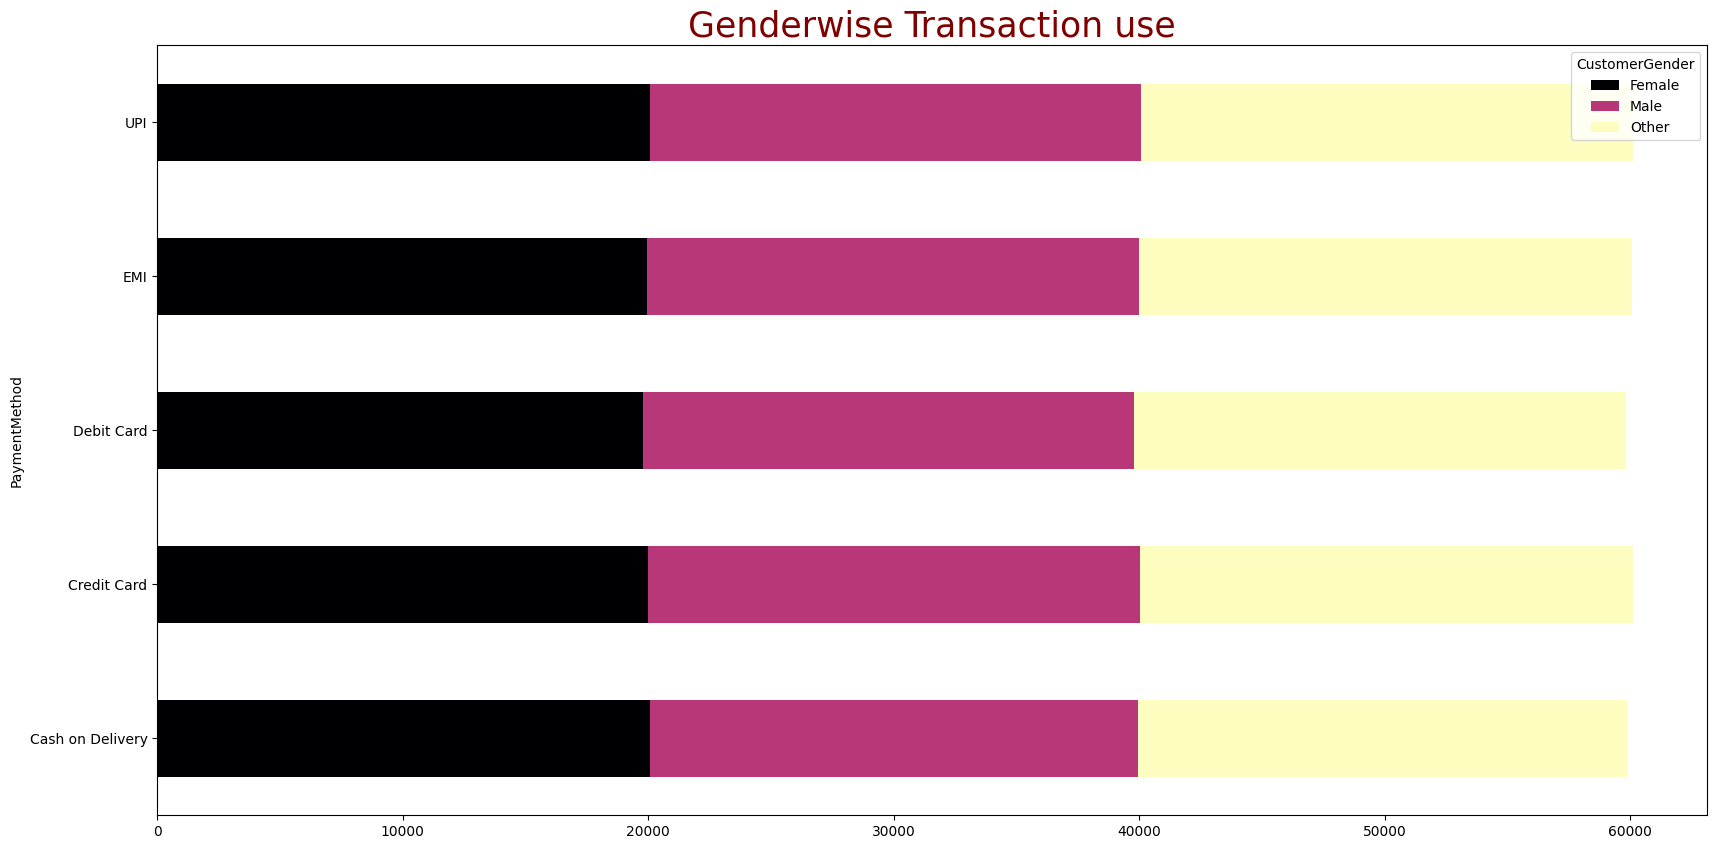

In [246]:
# Create a bar chart to compare customer engagement by CustomerGender, using different Transaction

df_x=pd.crosstab(index=df['PaymentMethod'],columns=df['CustomerGender'])
df_x.plot(kind='barh',stacked=True,figsize=(20,10),colormap='magma' )
plt.title('Genderwise Transaction use',size=25,color='maroon')
plt.show()


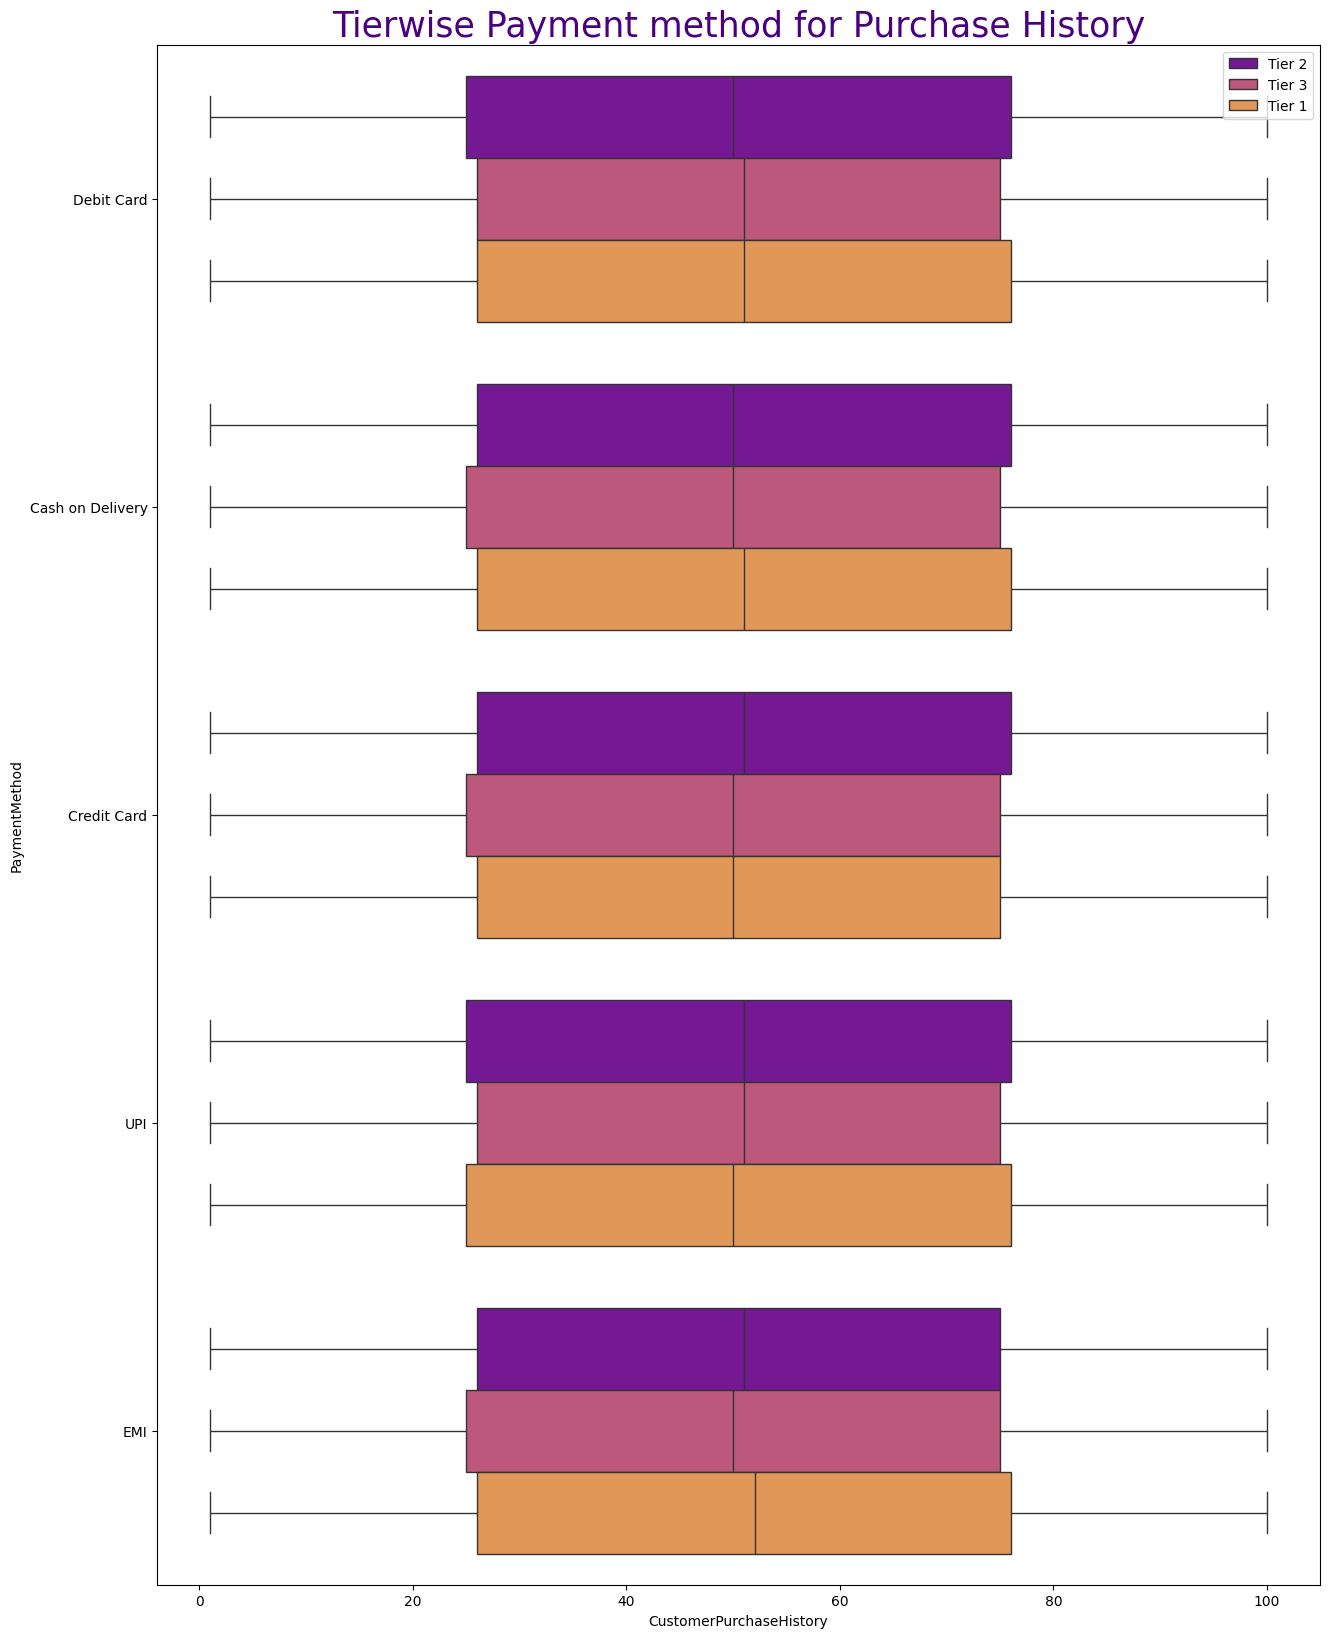

In [247]:
# Use a boxplot to analyze CustomerPurchaseHistory across different PaymentMethods , Tier based

plt.figure(figsize=(15,20))
sb.boxplot(data=df,y='PaymentMethod',x='CustomerPurchaseHistory' ,hue='Tier',palette='plasma' )
plt.title('Tierwise Payment method for Purchase History',size=25,color='indigo')
plt.legend(loc=1)
plt.show()


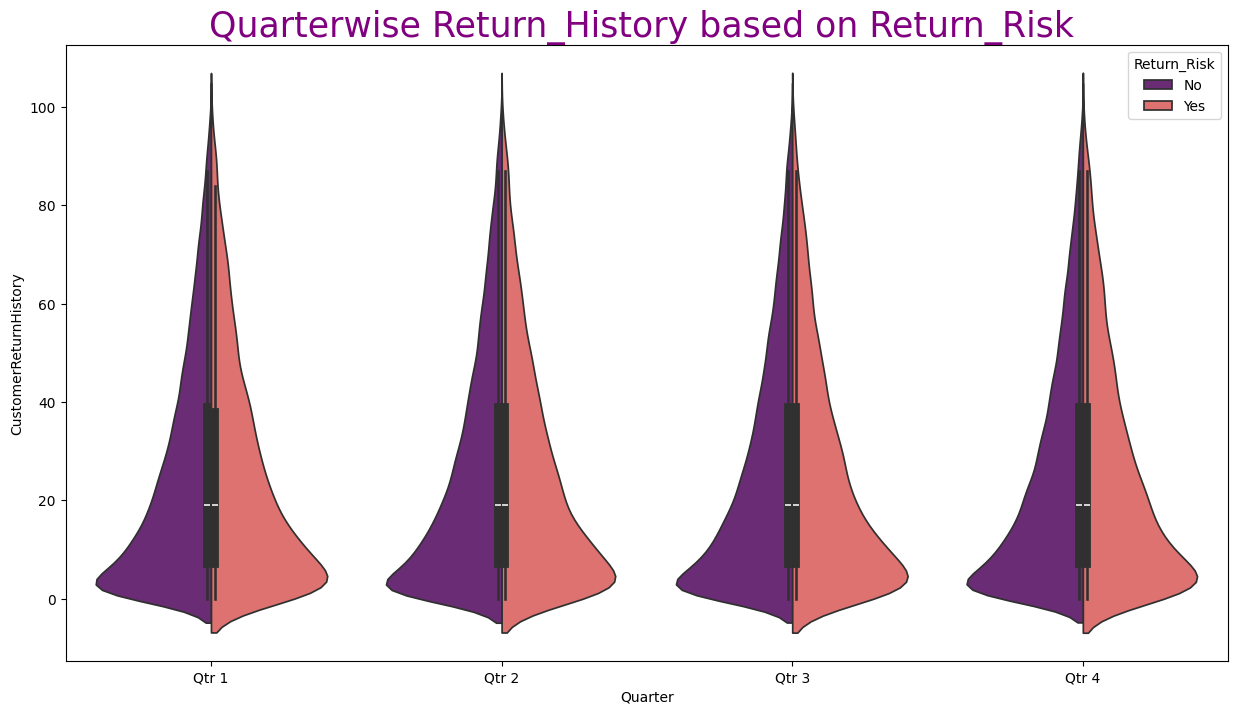

In [248]:
# Plot a violin plot showing return frequency (CustomerReturnHistory)  by Return Risk, in different Quarter

plt.figure(figsize=(15,8))
sb.violinplot(data=df,y='CustomerReturnHistory',x='Quarter',hue='Return_Risk',split=True,palette='magma' )
plt.title('Quarterwise Return_History based on Return_Risk ',size=25,color='purple')
plt.show()


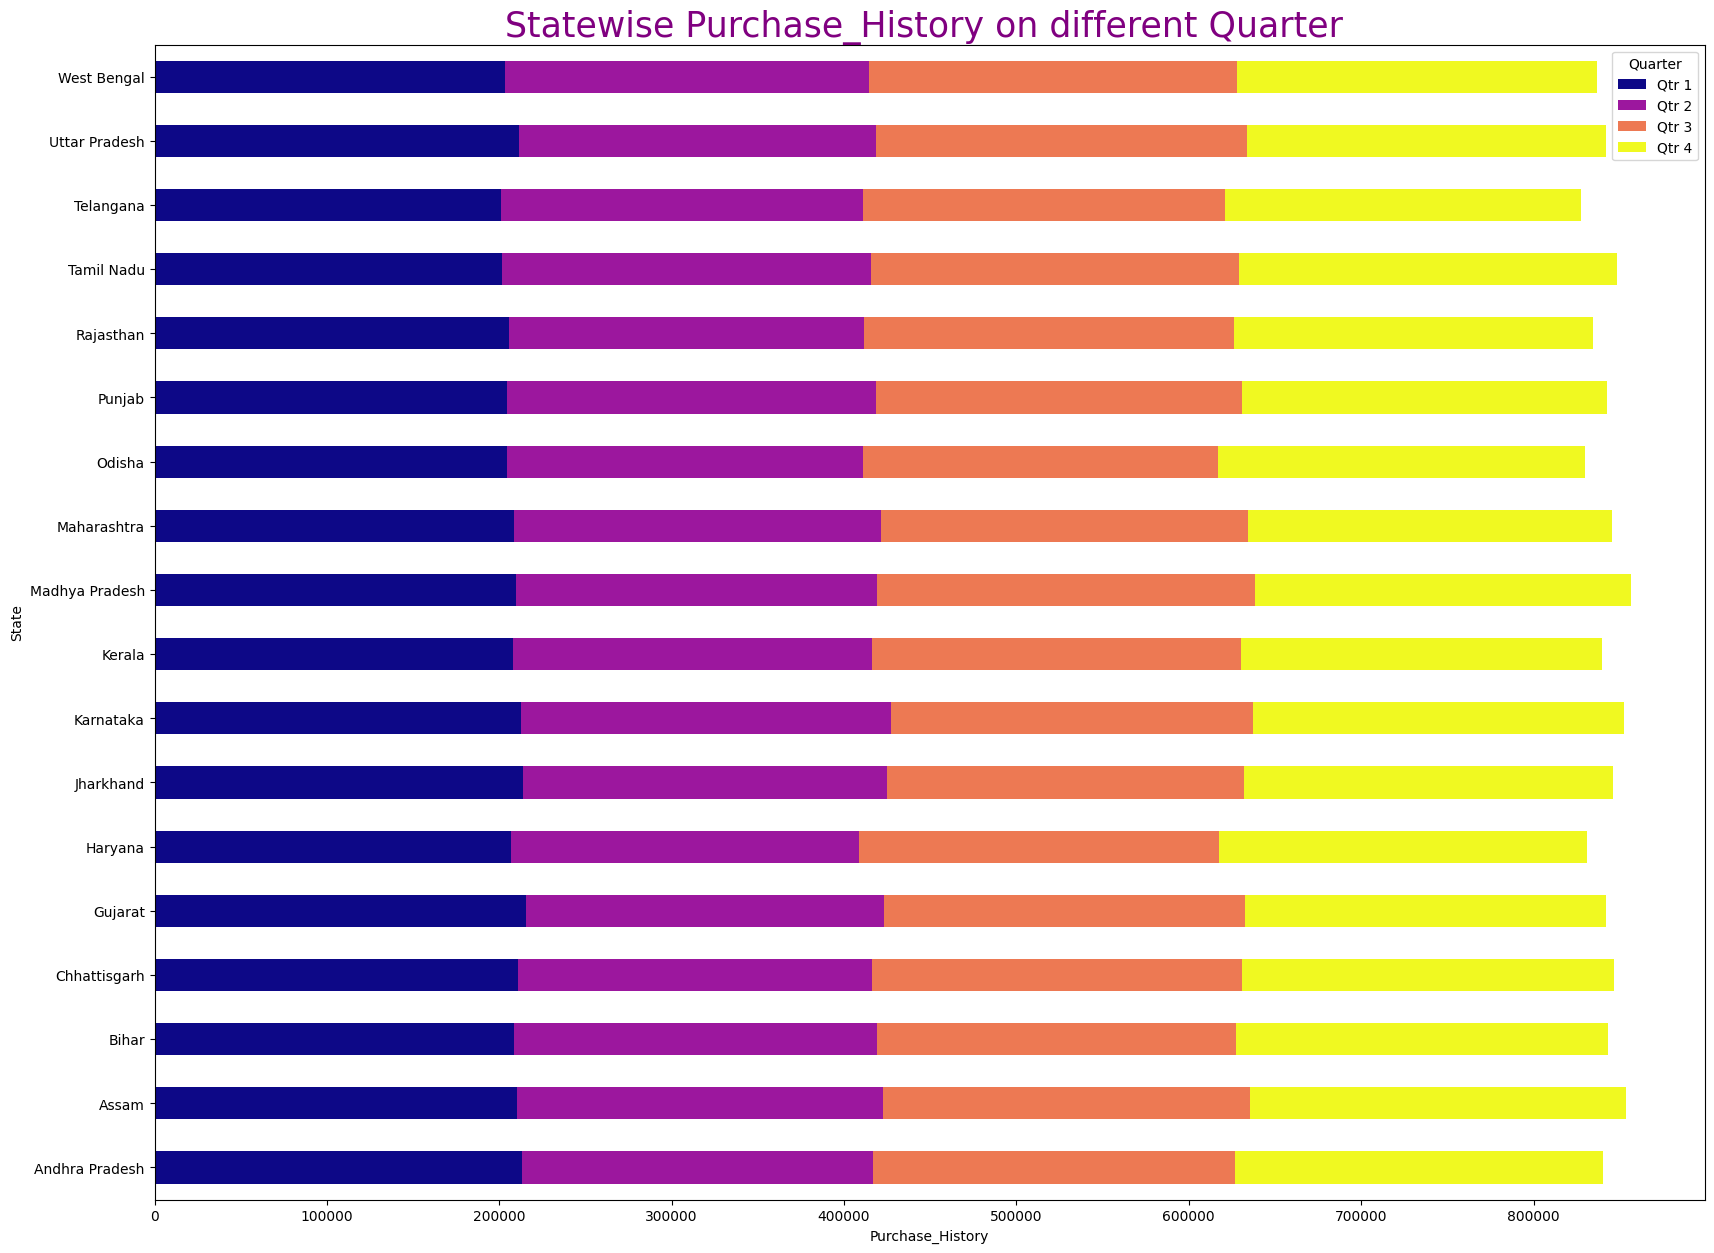

In [249]:
# Create a bar plot to show CustomerPurchaseHistory by State, Quarterwise.

df_f=pd.crosstab(index=df['State'],columns=df['Quarter'],values=df['CustomerPurchaseHistory'],aggfunc='sum')
df_f.plot(kind='barh',stacked=True,colormap='plasma',figsize=(20,15))
plt.xlabel('Purchase_History')
plt.title('Statewise Purchase_History on different Quarter ',size=25,color='purple')
plt.show()


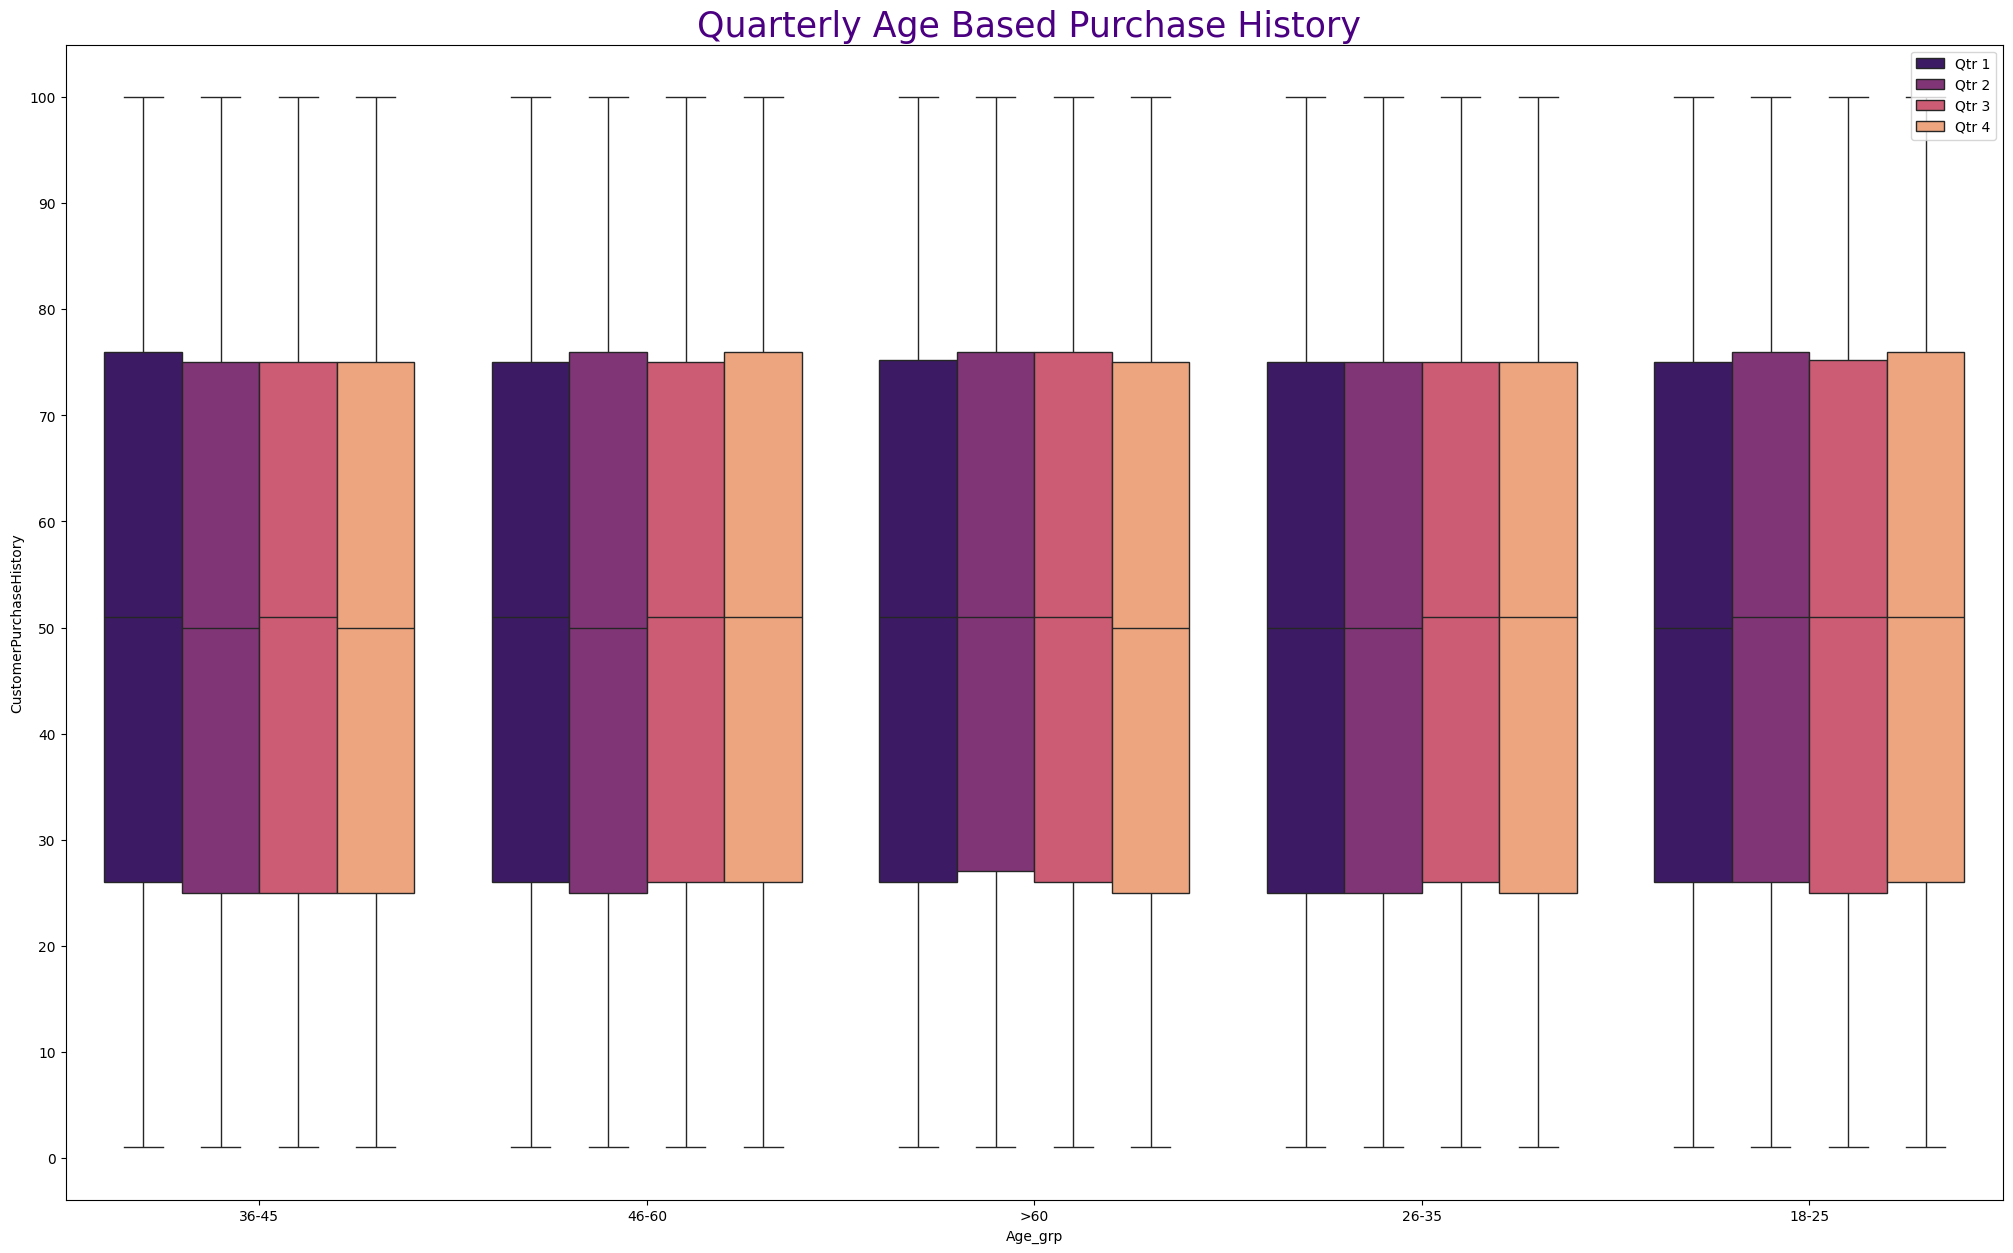

In [250]:
# Generate a boxlot to observe relation between Age Group and ReturnHistory in different Quarters

plt.figure(figsize=(25,15))
sb.boxplot(data=df,x='Age_grp',y='CustomerPurchaseHistory',hue='Quarter',palette='magma')
plt.title('Quarterly Age Based Purchase History ',size=25,color='indigo')
plt.legend(loc=1)
plt.yticks(np.arange(0,110,10))
plt.show()



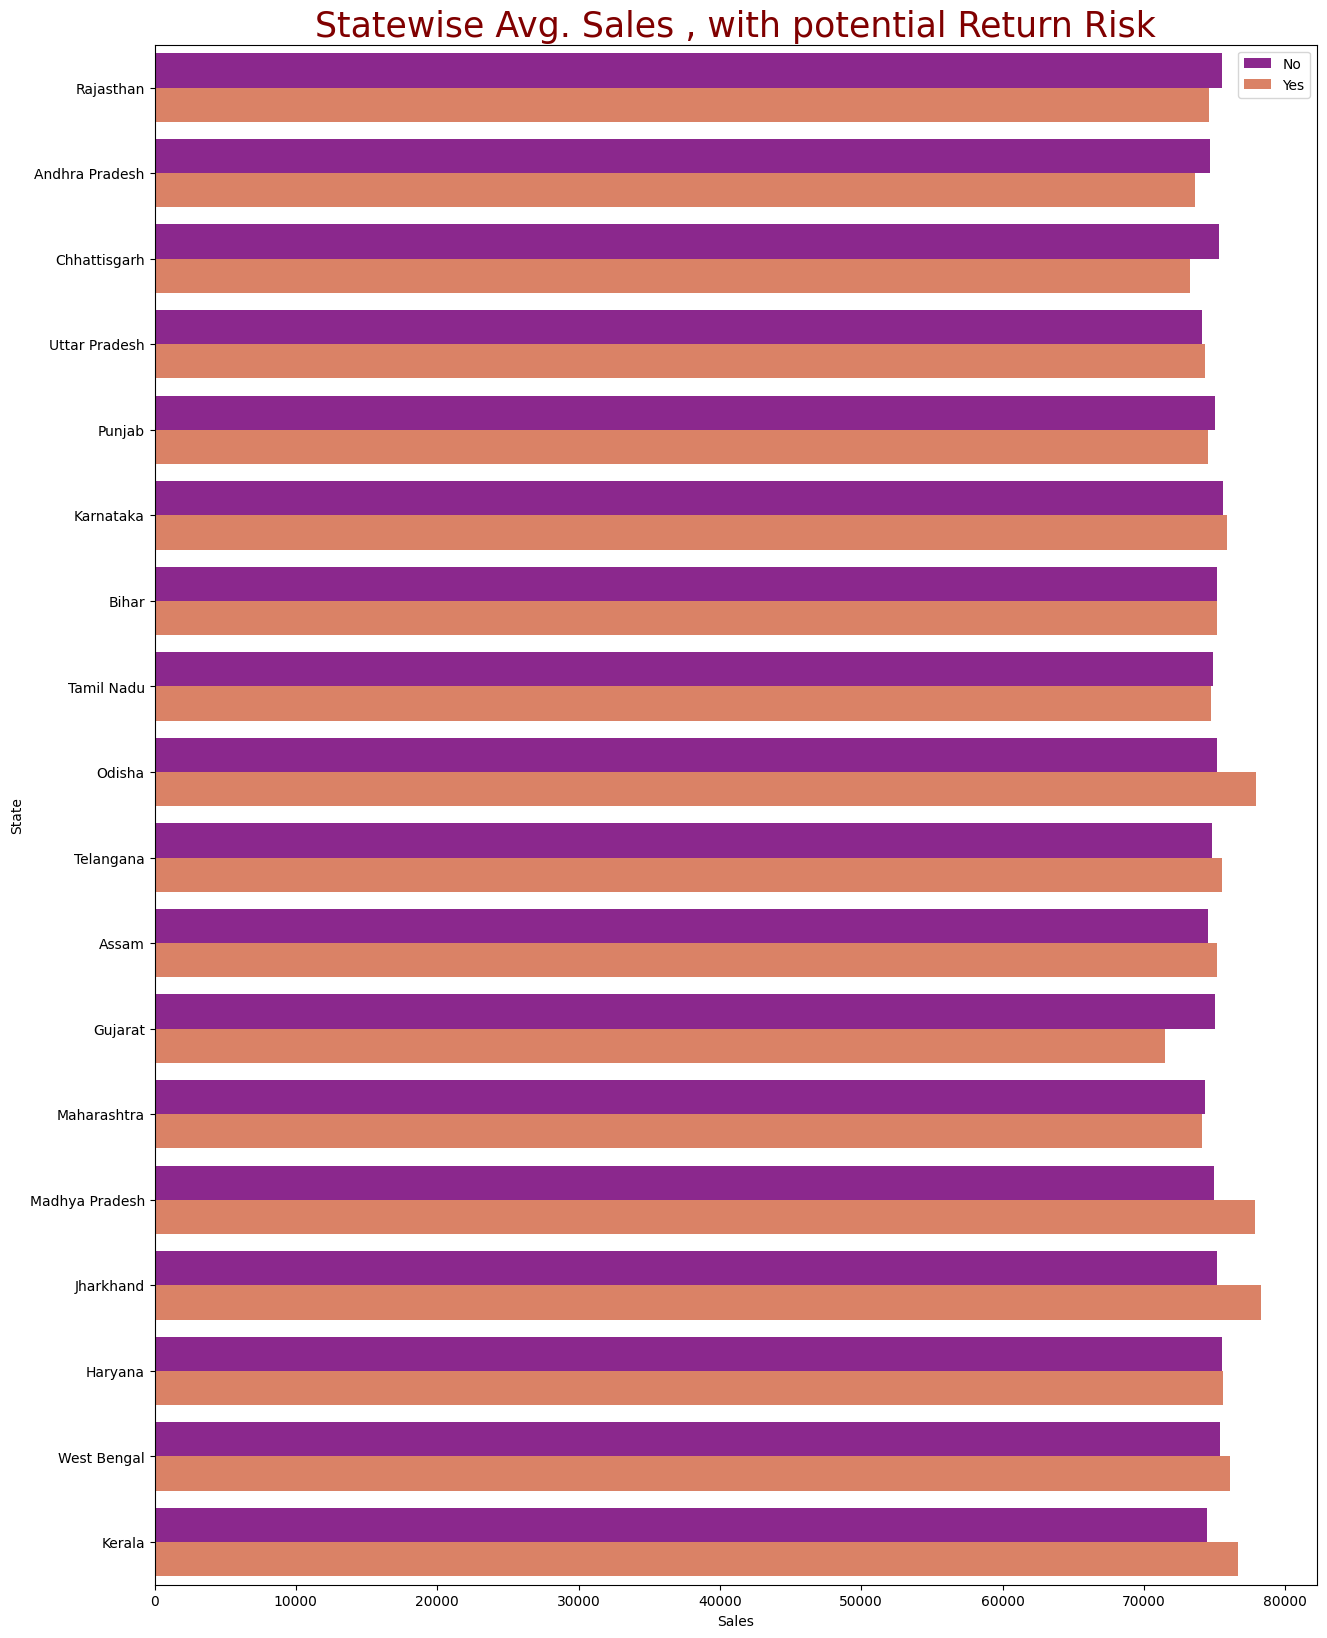

In [251]:
# Create a bar chart to display state with highest Average purchase, dividing return risk

plt.figure(figsize=(15,20))
sb.barplot(data=df,y='State',x='Sales',estimator='mean',hue='Return_Risk',palette='plasma',errorbar=('ci',0) )
plt.title('Statewise Avg. Sales , with potential Return Risk',size=25,color='maroon')
plt.legend(loc=1)
plt.show()


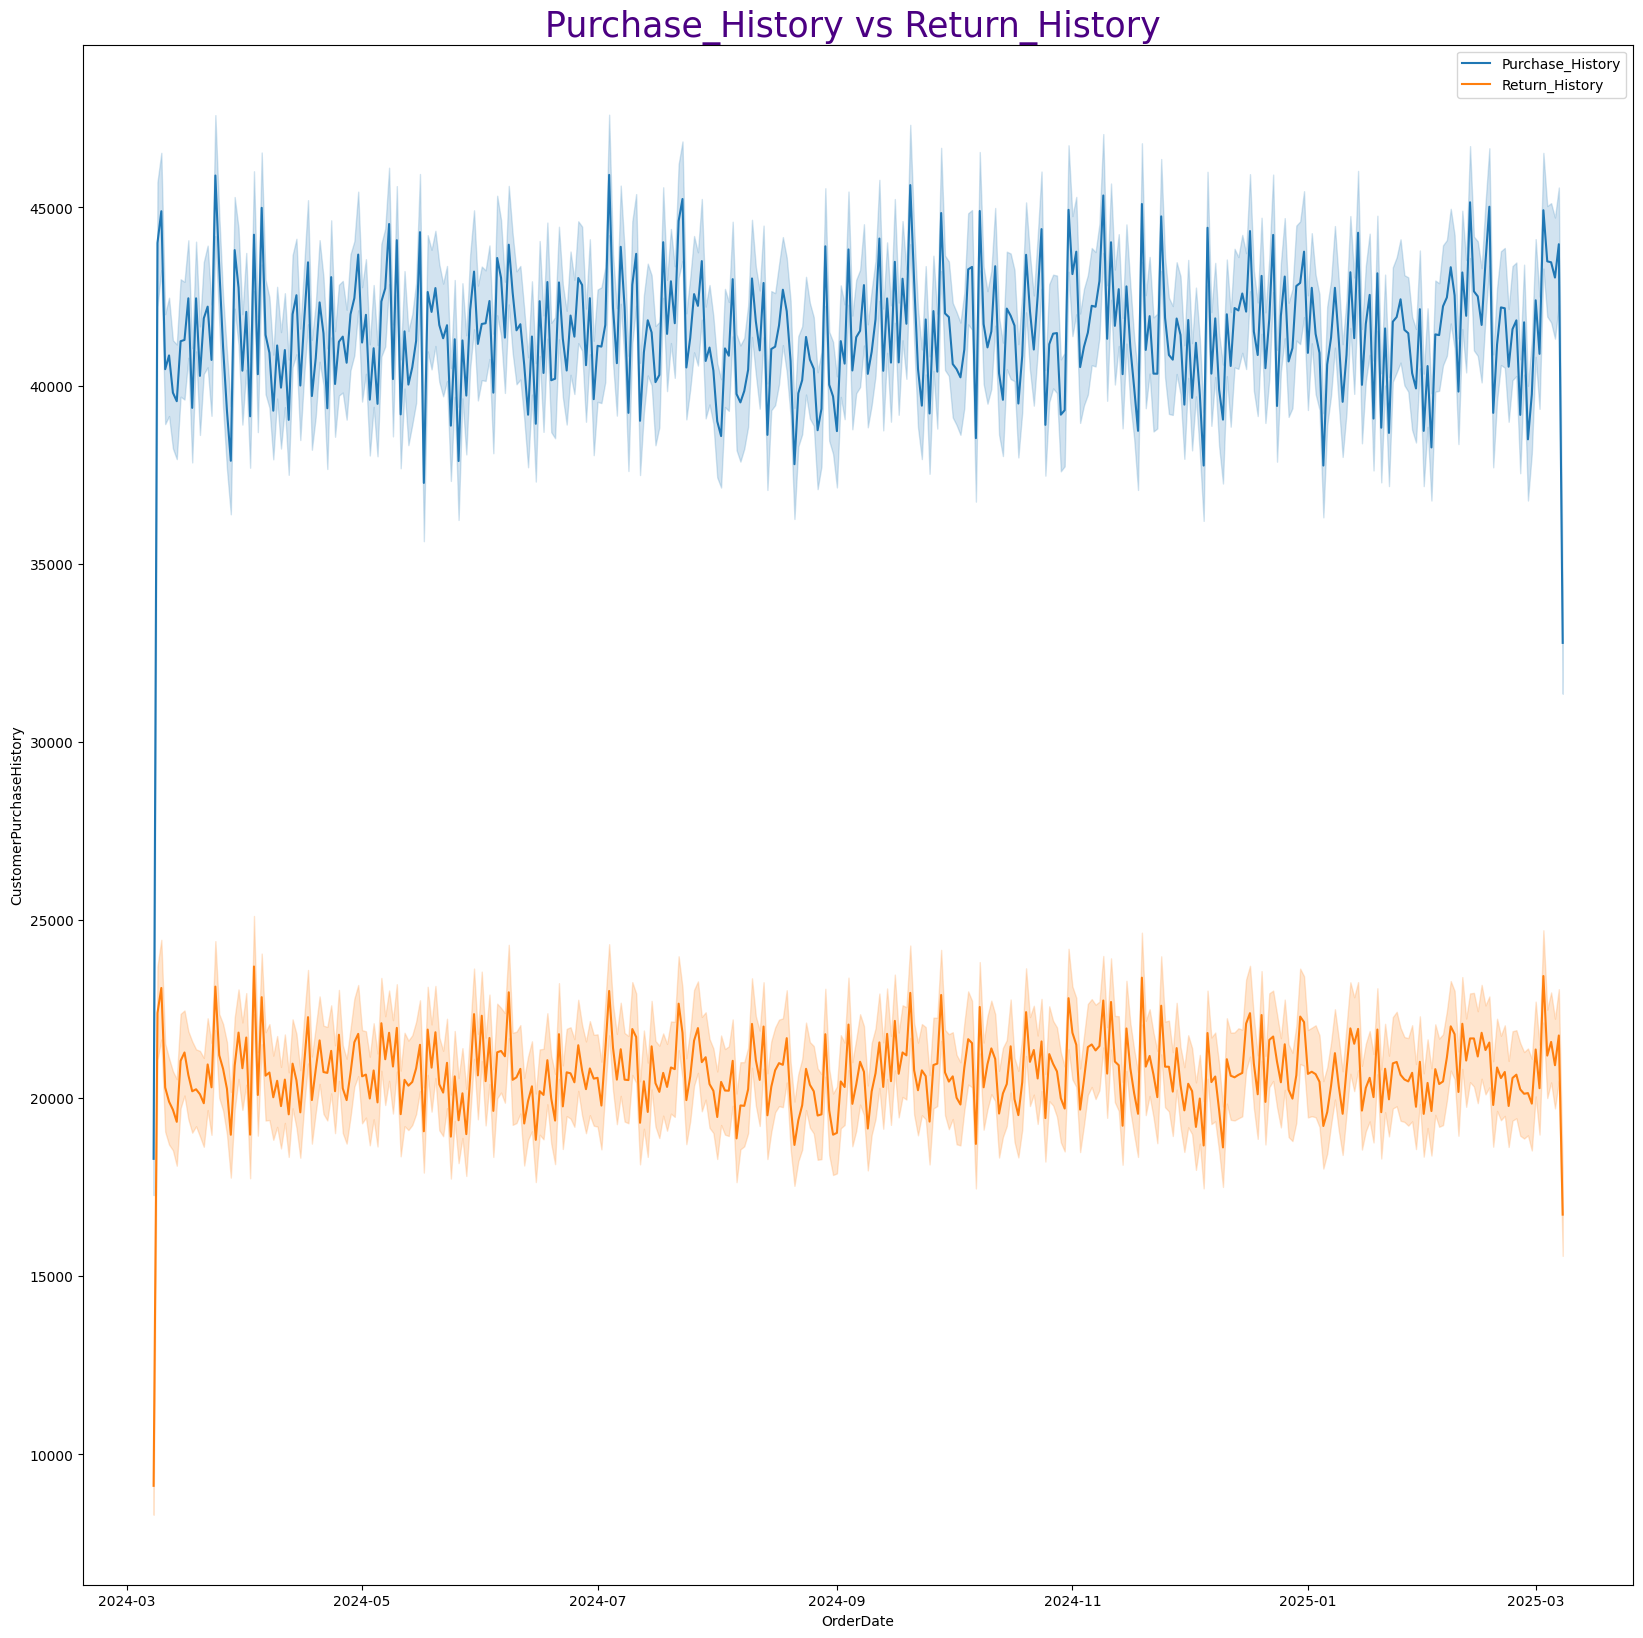

In [252]:
# Plot daily comparing Purchase_History and Return_History'

plt.figure(figsize=(20,20))
sb.lineplot(data=df,x='OrderDate',y='CustomerPurchaseHistory',estimator='sum',label='Purchase_History',palette='magma')
sb.lineplot(data=df,x='OrderDate',y='CustomerReturnHistory',estimator='sum',label='Return_History',palette='plasma')
plt.title('Purchase_History vs Return_History ',size=25,color='indigo')
plt.legend(loc=1)
plt.show()


## C) Product & Sales Analysis

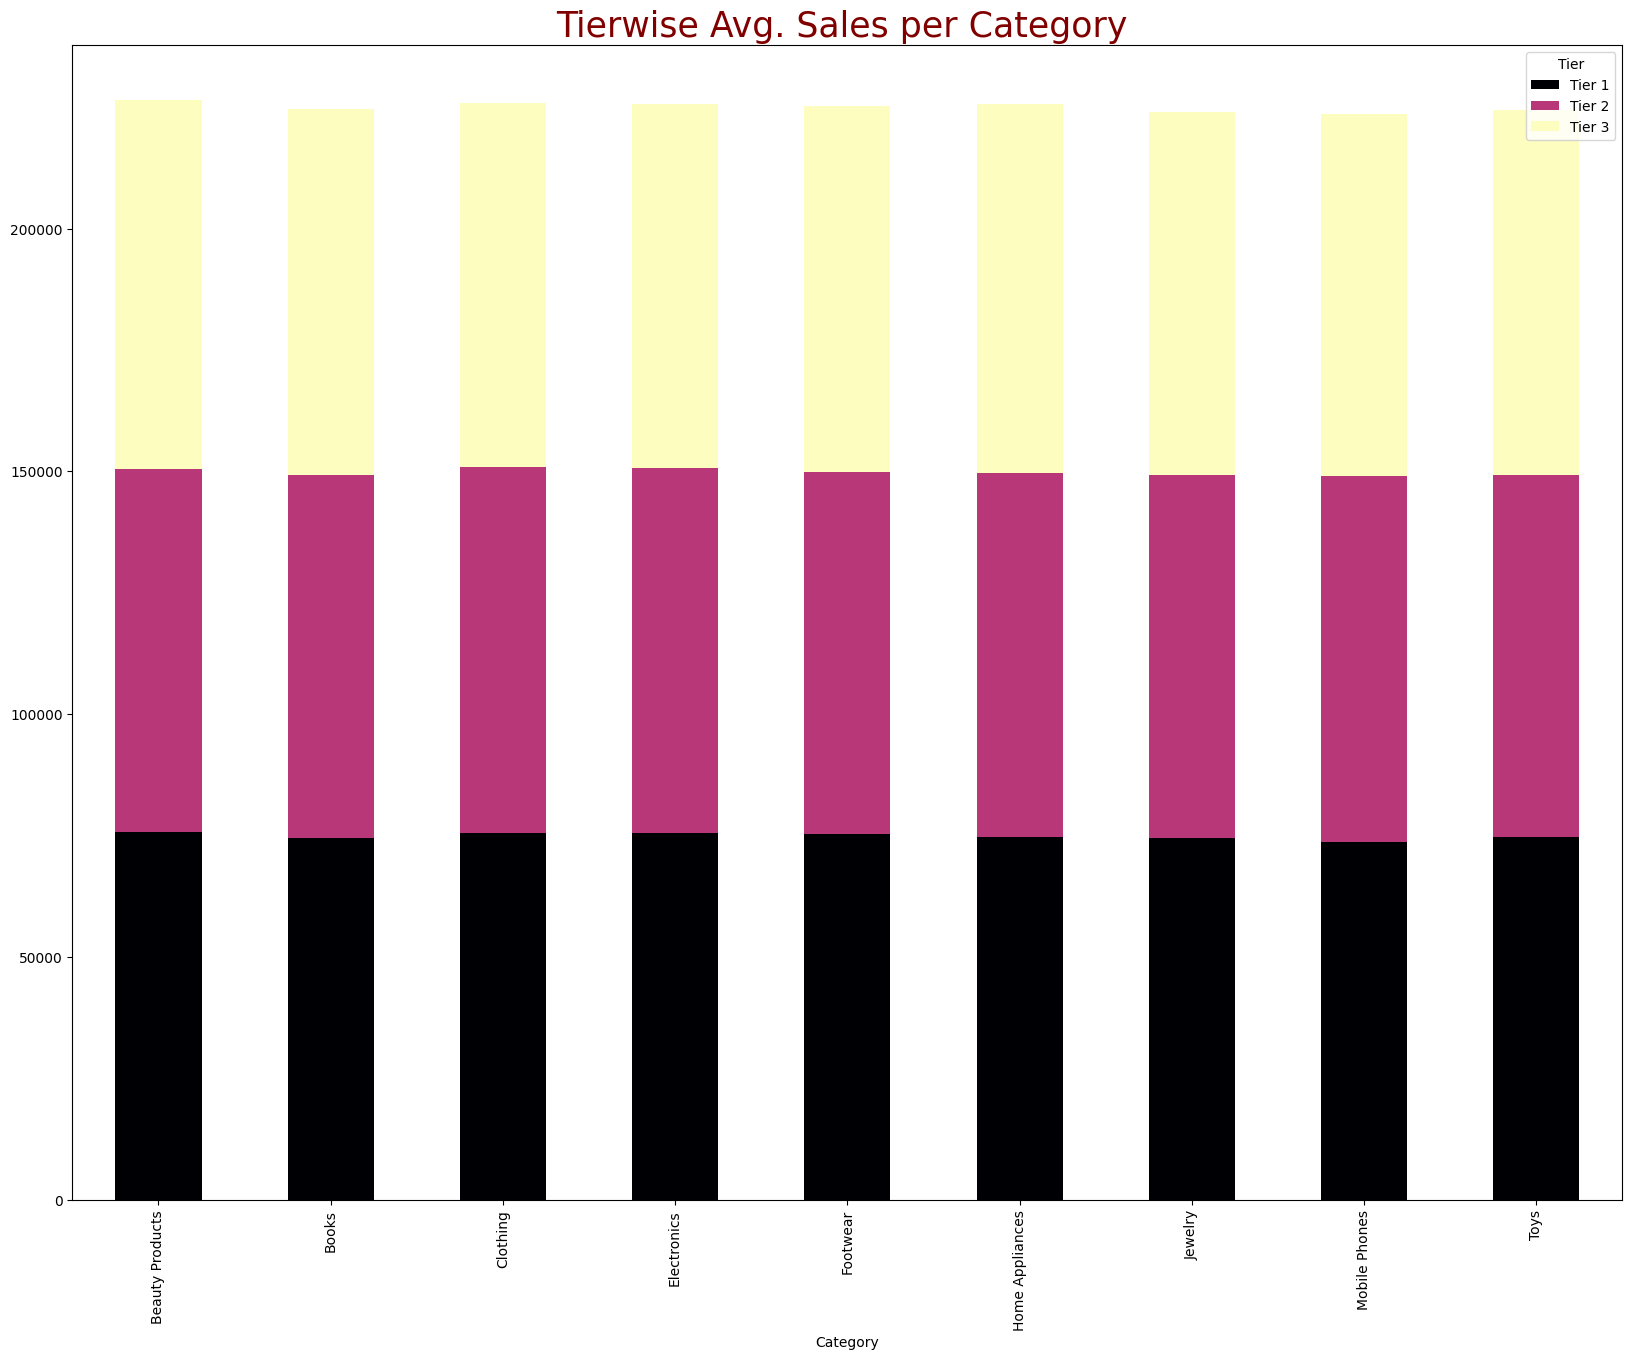

In [253]:
# Plot a bar of total sales by Category ,Tierwise

df_x=pd.crosstab(index=df['Category'],columns=df['Tier'],values=df['Sales'],aggfunc='mean')
df_x.plot(kind='bar',stacked=True, figsize=(20,15),colormap='magma')
plt.title('Tierwise Avg. Sales per Category ',size=25,color='maroon')
plt.show()


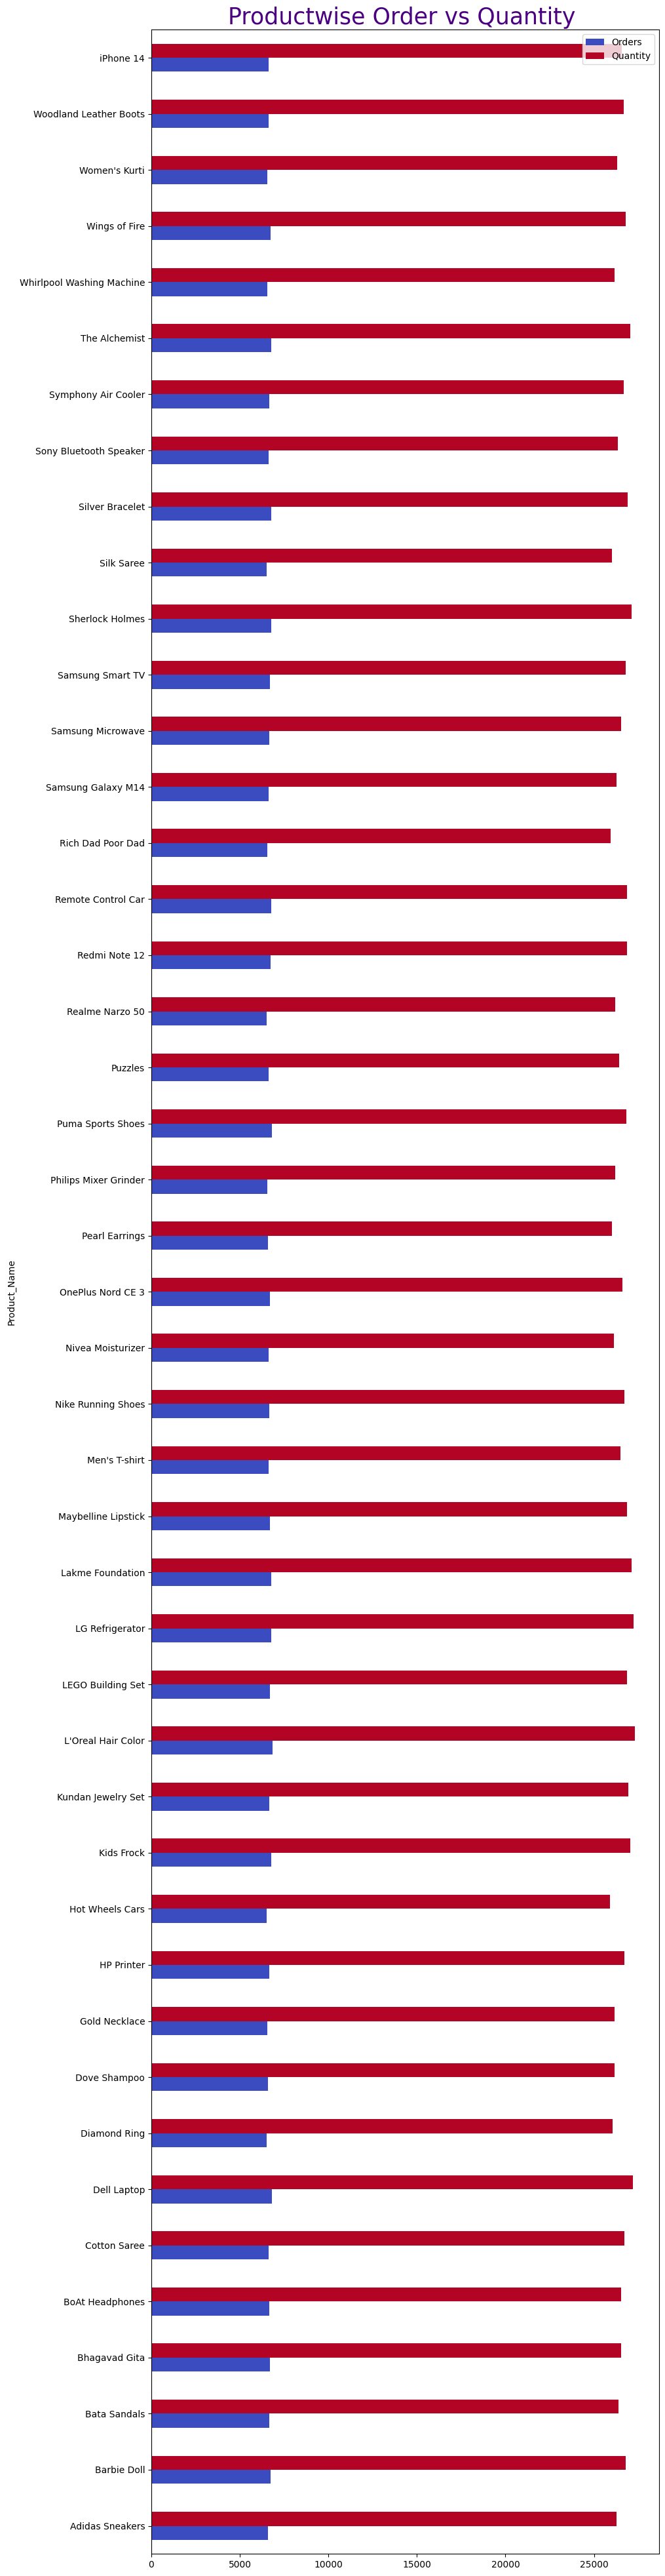

In [254]:
# Create a bar chart for top 10 most sold products by  orders and quantity

df_x=df.groupby(['Product_Name'])[['OrderID','Quantity']].agg({'OrderID':'count','Quantity':'sum'})
df_x.columns=['Orders','Quantity']
df_x.sort_values(['Orders','Quantity'],ascending=[False,False])
df_x.plot(kind='barh',colormap='coolwarm',figsize=(10,50) )
plt.title('Productwise Order vs Quantity ',size=25,color='indigo')
plt.show()

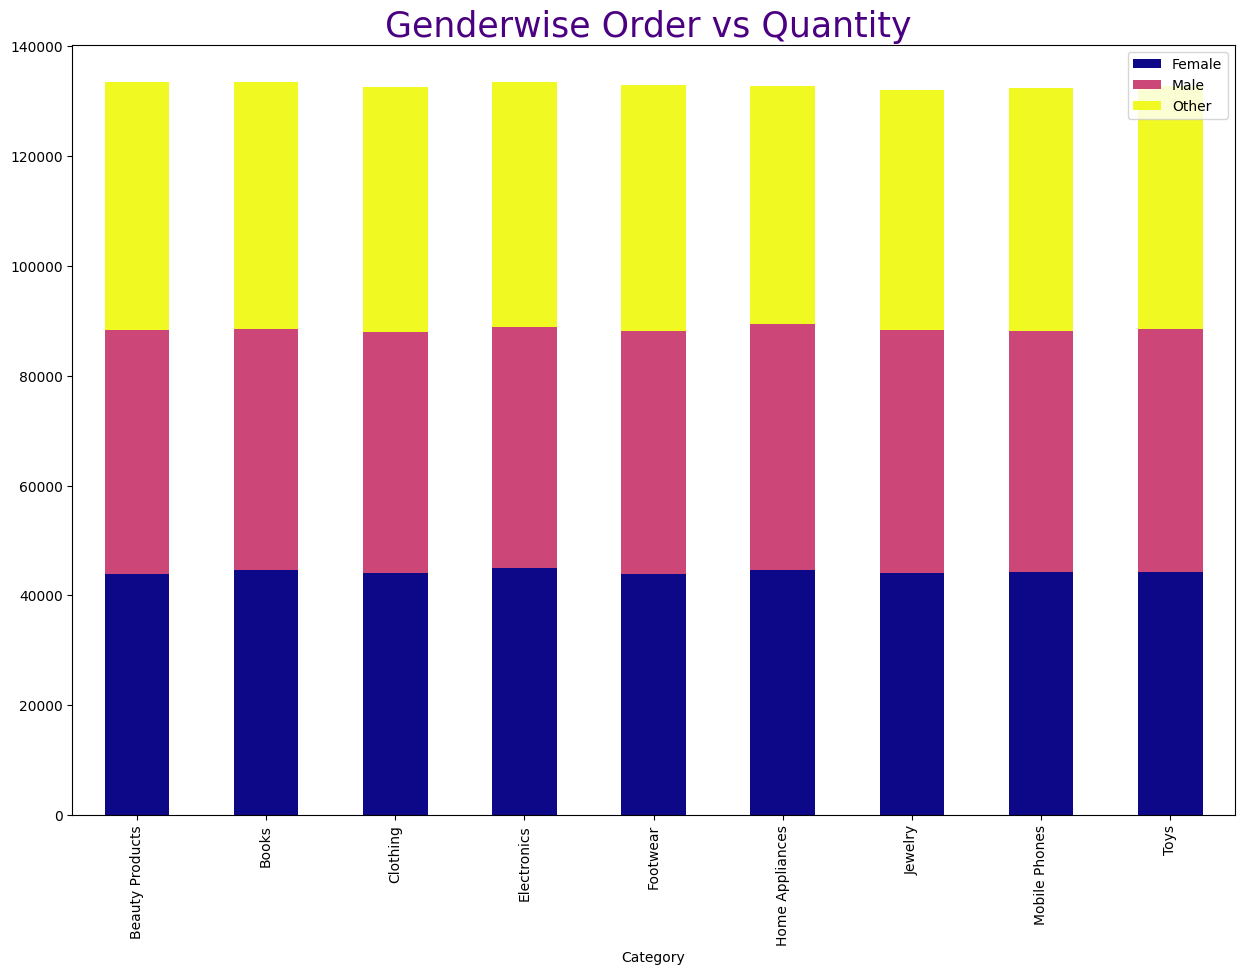

In [255]:
# Plot a line graph showing quantity sold for month in different category .

df_x=df.copy()
df_dt= pd.crosstab(index=df_x['Category'],columns=df_x['CustomerGender'],values=df_x['Quantity'],aggfunc='sum')
df_dt.plot(kind='bar',figsize=(15,10),colormap='plasma',stacked=True )
plt.title('Genderwise Order vs Quantity ',size=25,color='indigo')
plt.legend(loc=1)
plt.show()

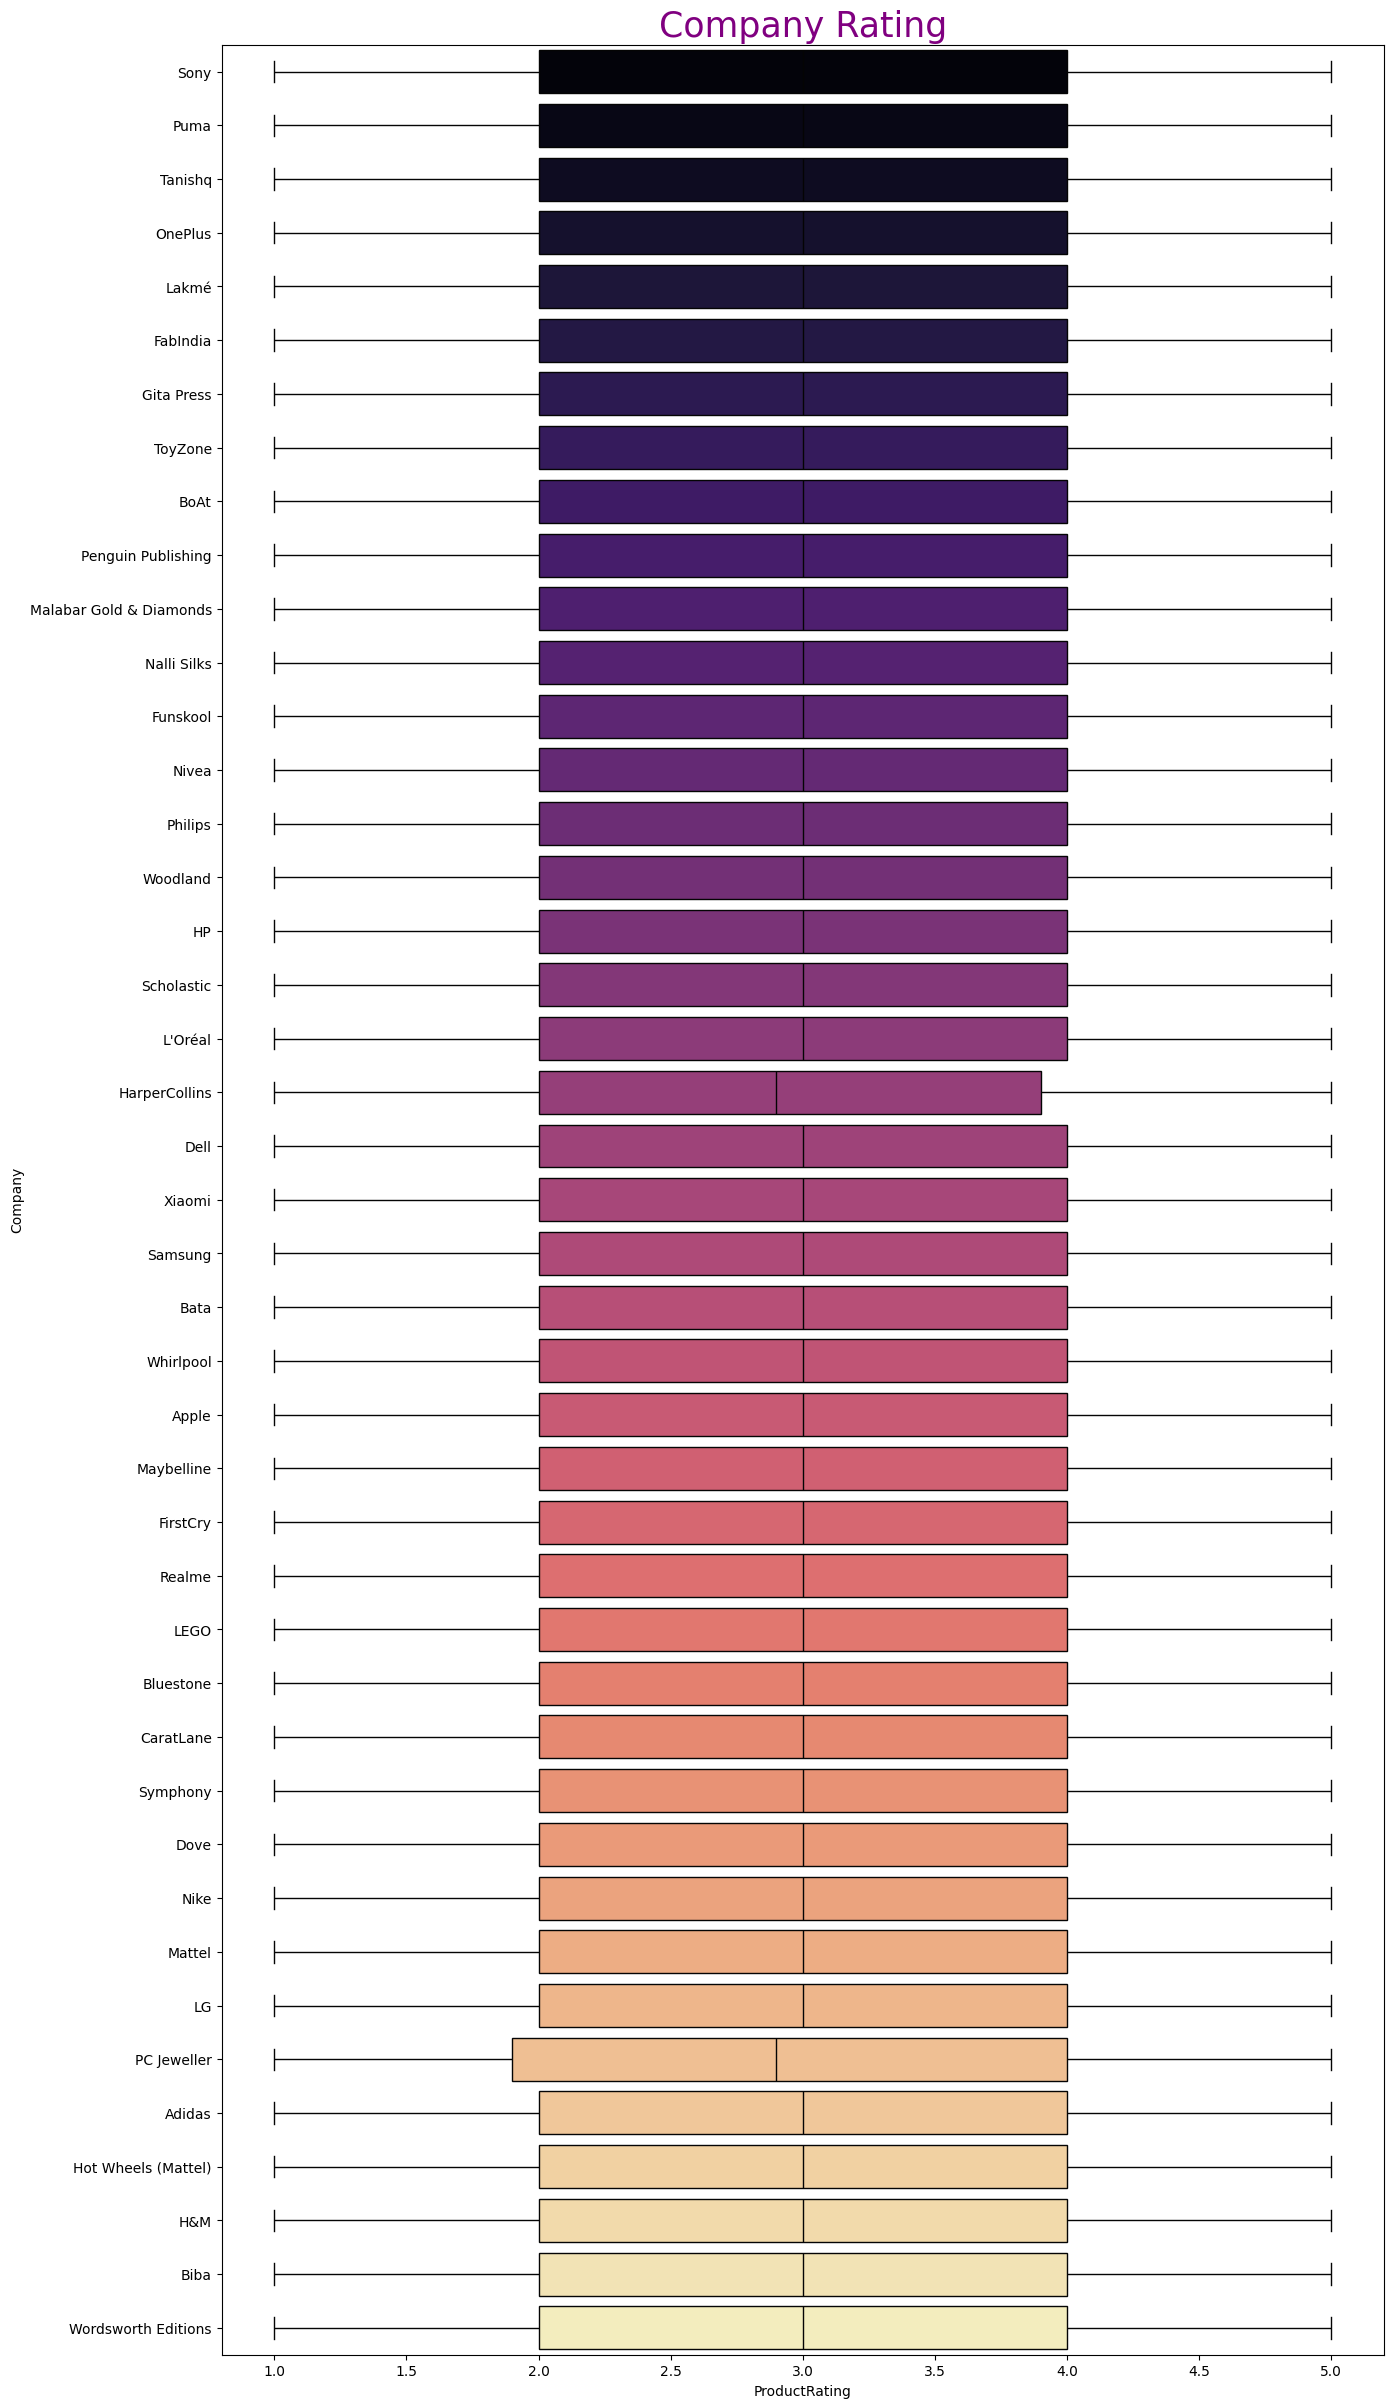

In [256]:
# Use a boxplot to compare ratings across different company

plt.figure(figsize=(15,30))
sb.boxplot(data=df,y='Company',x='ProductRating',palette='magma')
plt.title('Company Rating',size=25,color='purple')
plt.xticks(np.arange(1,5.5,0.5))
plt.show()


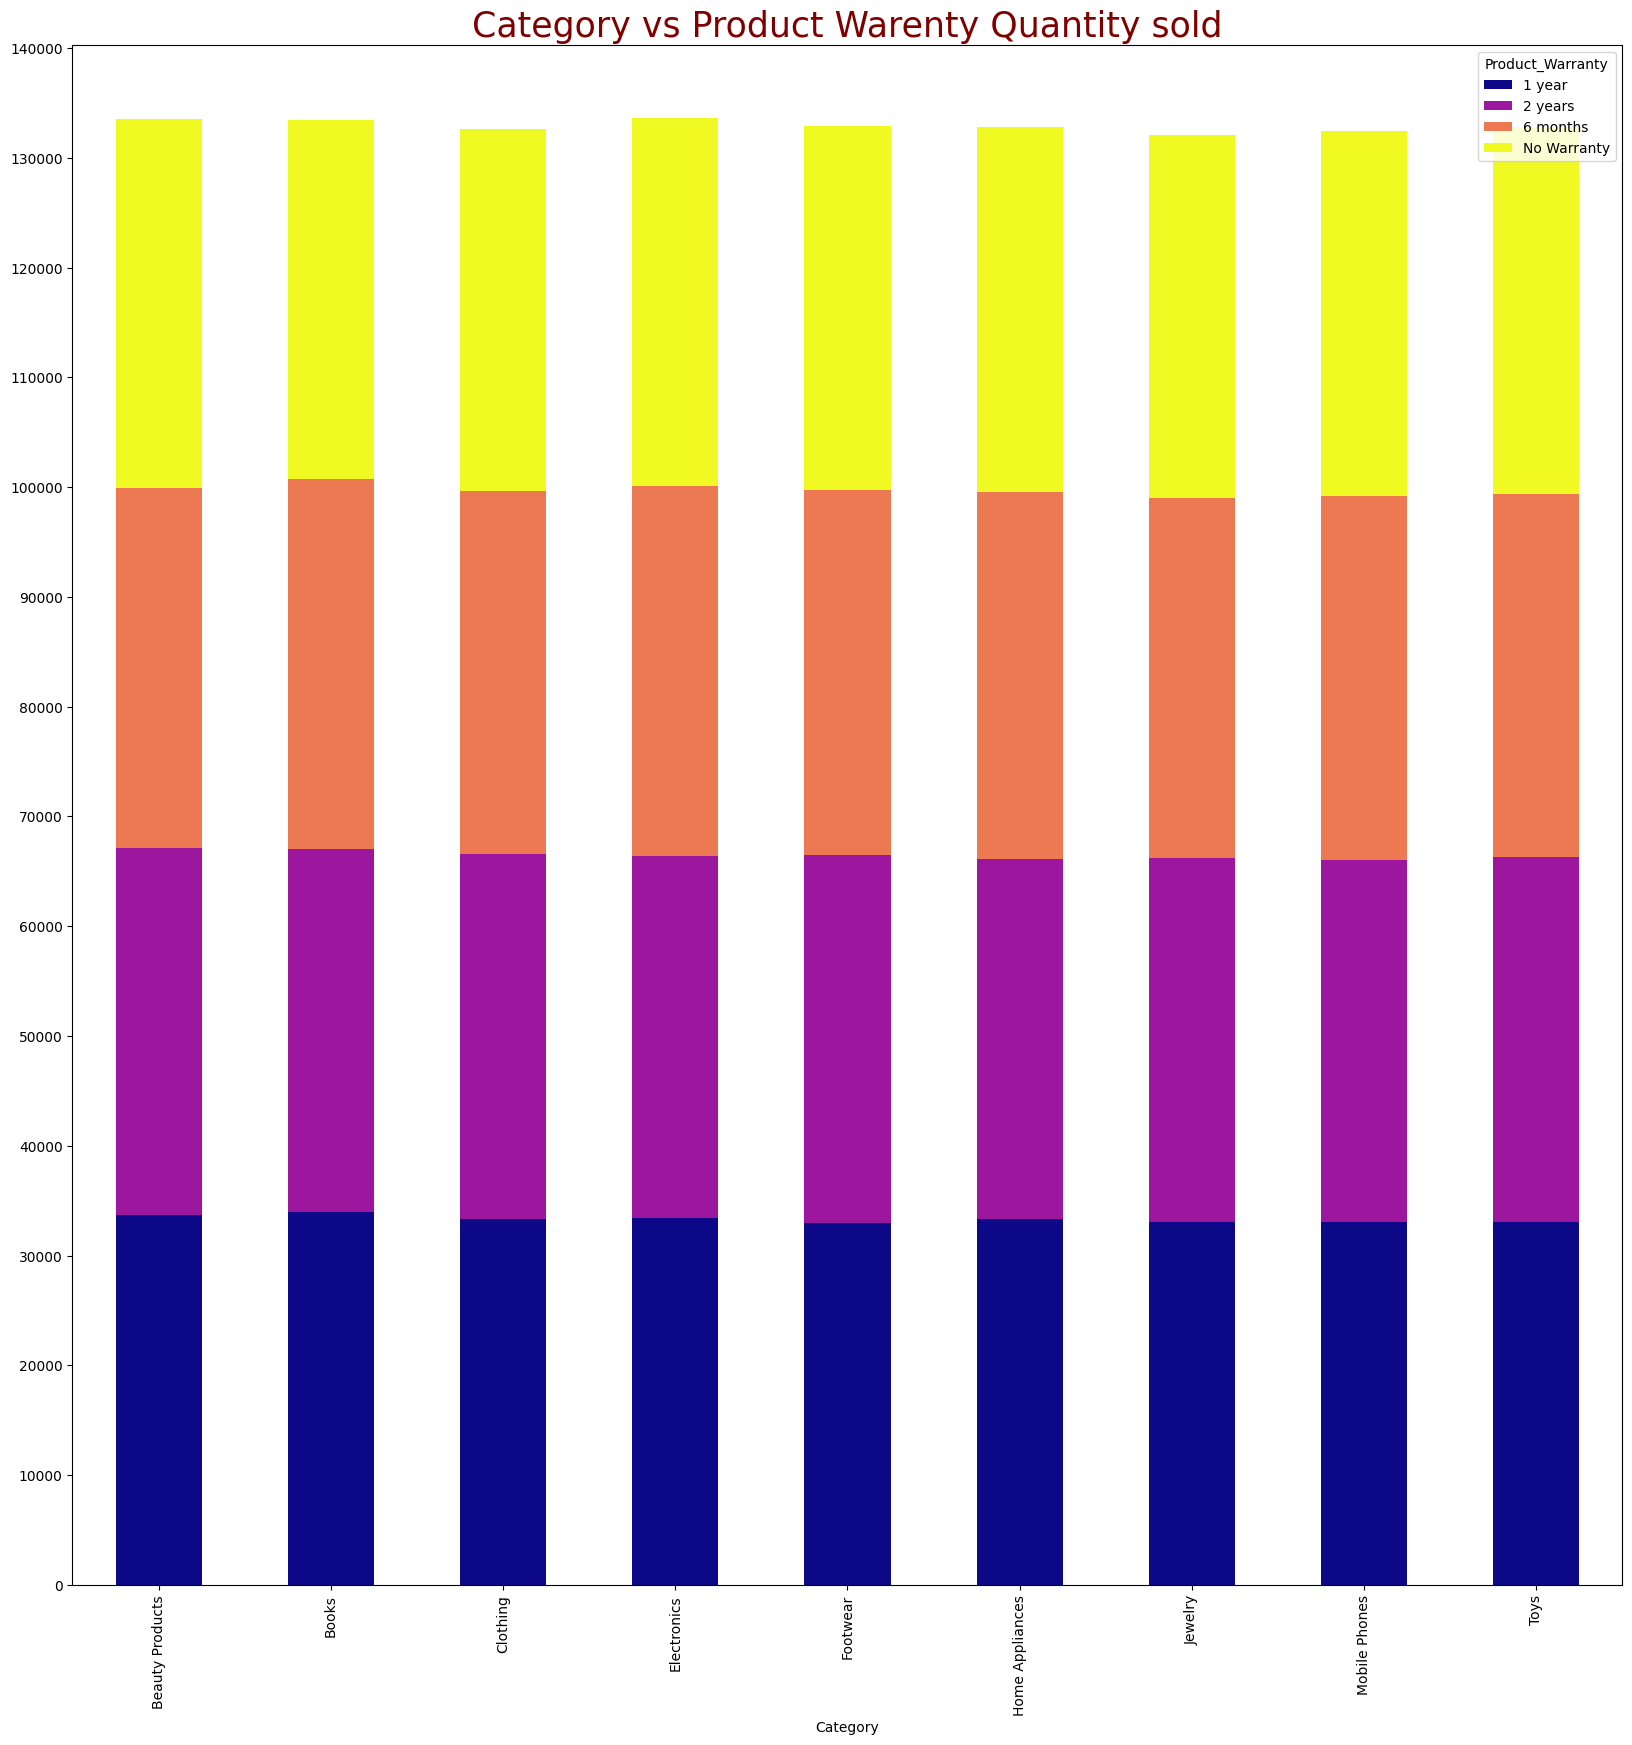

In [257]:
# Generate a bar chart comparing quantity sold ProductWarranty status by Category.

df_x=pd.crosstab(index=df['Category'],columns=df['Product_Warranty'],values=df['Quantity'],aggfunc='sum')
df_x.plot(kind='bar',stacked=True,colormap='plasma',figsize=(20,20))
plt.title('Category vs Product Warenty Quantity sold',size=25,color='maroon')
plt.yticks(np.arange(0,150000,10000))
plt.show()


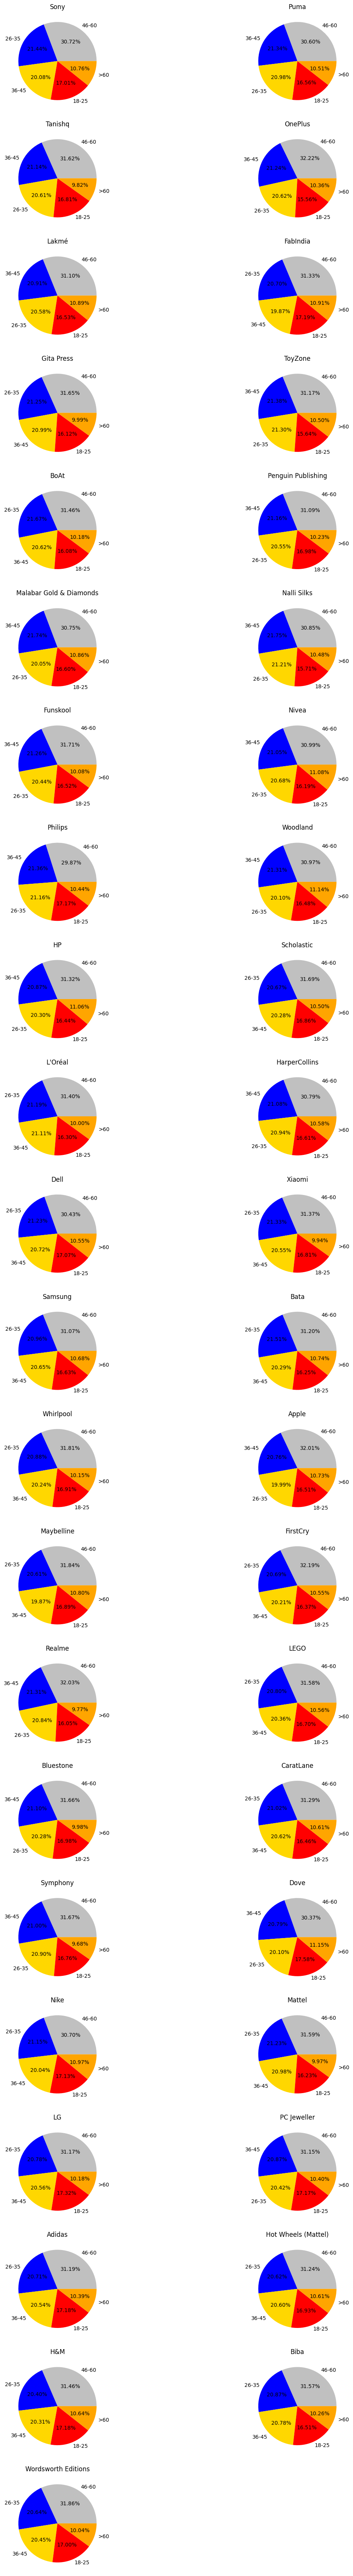

In [258]:
# Use a pieplot to show product distribution across company in different Age_grp' .

Company= df['Company'].unique().tolist()
plt.figure(figsize=(15,100))

for i in range(len(Company)):
  df_x=df[df['Company']==Company[i]]
  df_ct=df_x['Age_grp'].value_counts().reset_index()
  plt.subplot(25,2,i+1)
  plt.pie(df_ct['count'],labels=df_ct['Age_grp'],autopct='%0.2f%%',colors=['silver','blue','gold','red','orange'])
  plt.title(f"{Company[i]}")

plt.show()

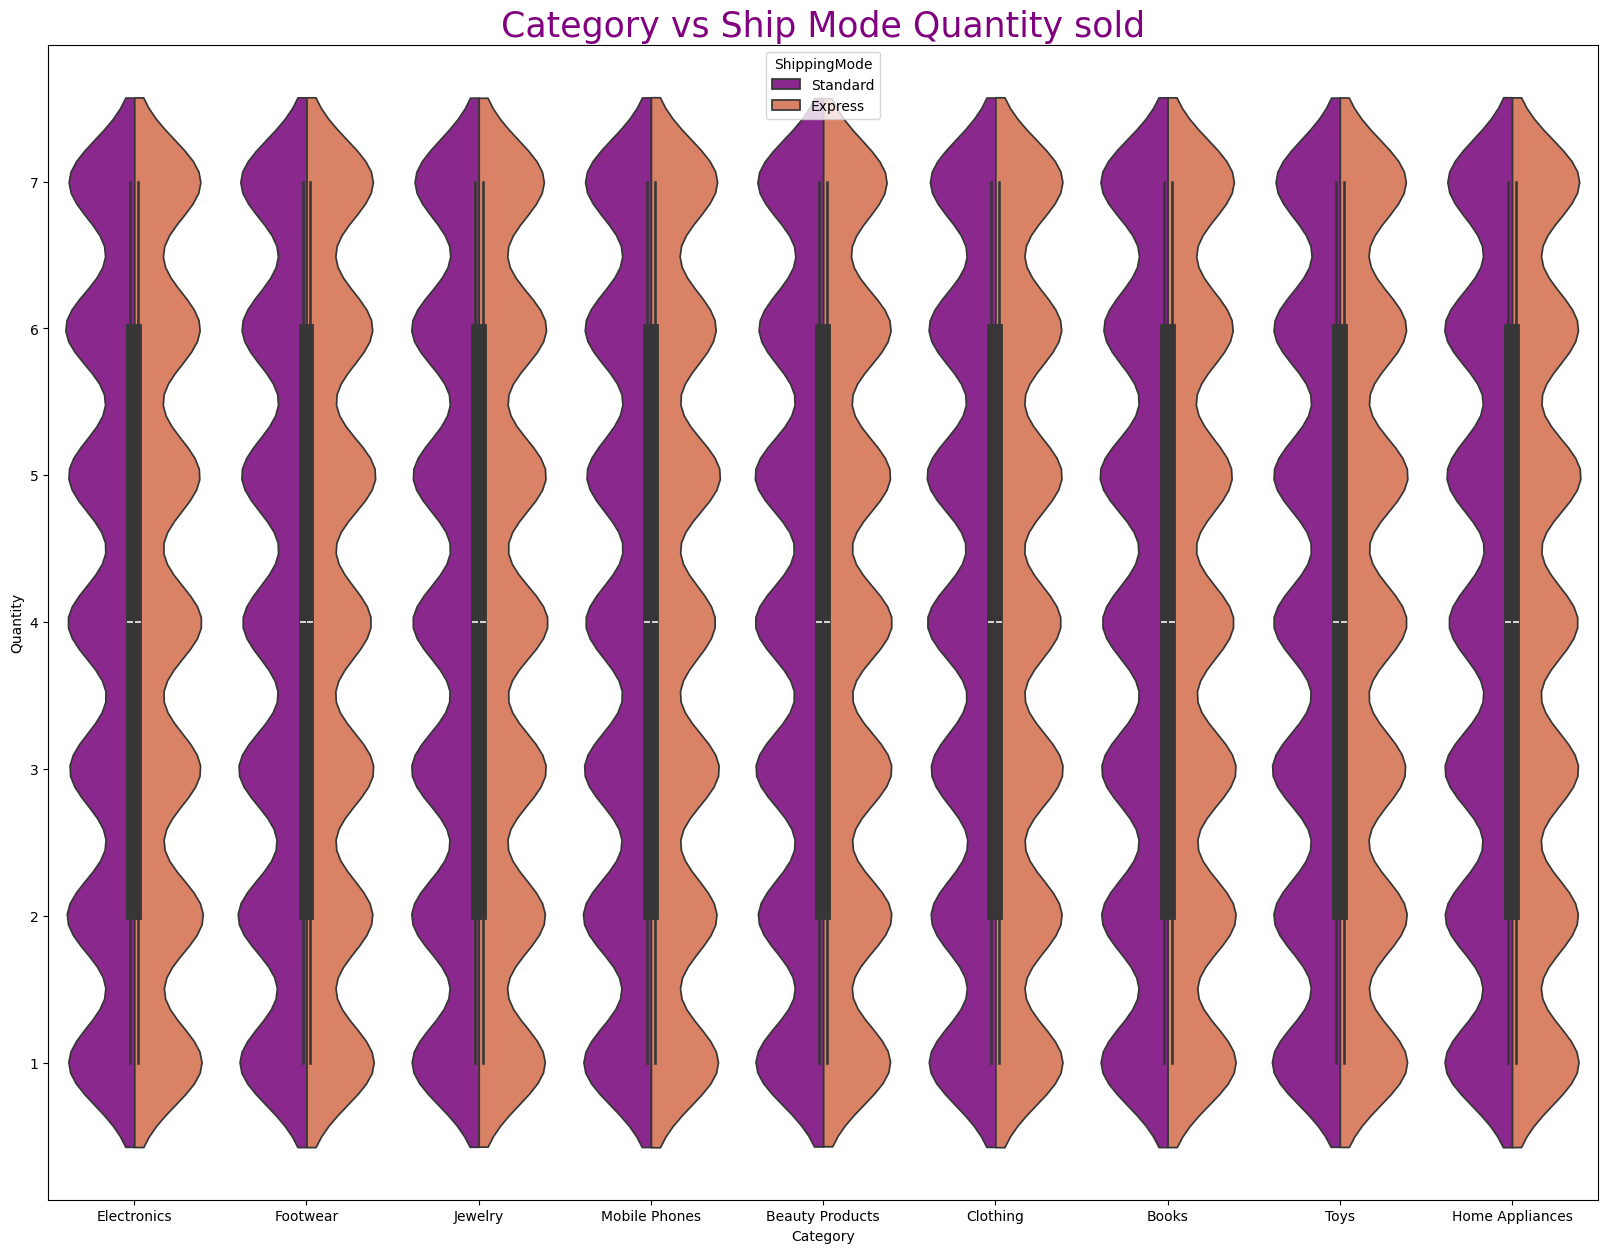

In [259]:
# Draw a violin plot to display quantity distribution by Category ,in different ship modes.

plt.figure(figsize=(20,15))
sb.violinplot(data=df,x='Category',y='Quantity',hue='ShippingMode',split=True,palette='plasma')
plt.title('Category vs Ship Mode Quantity sold',size=25,color='purple')
plt.show()


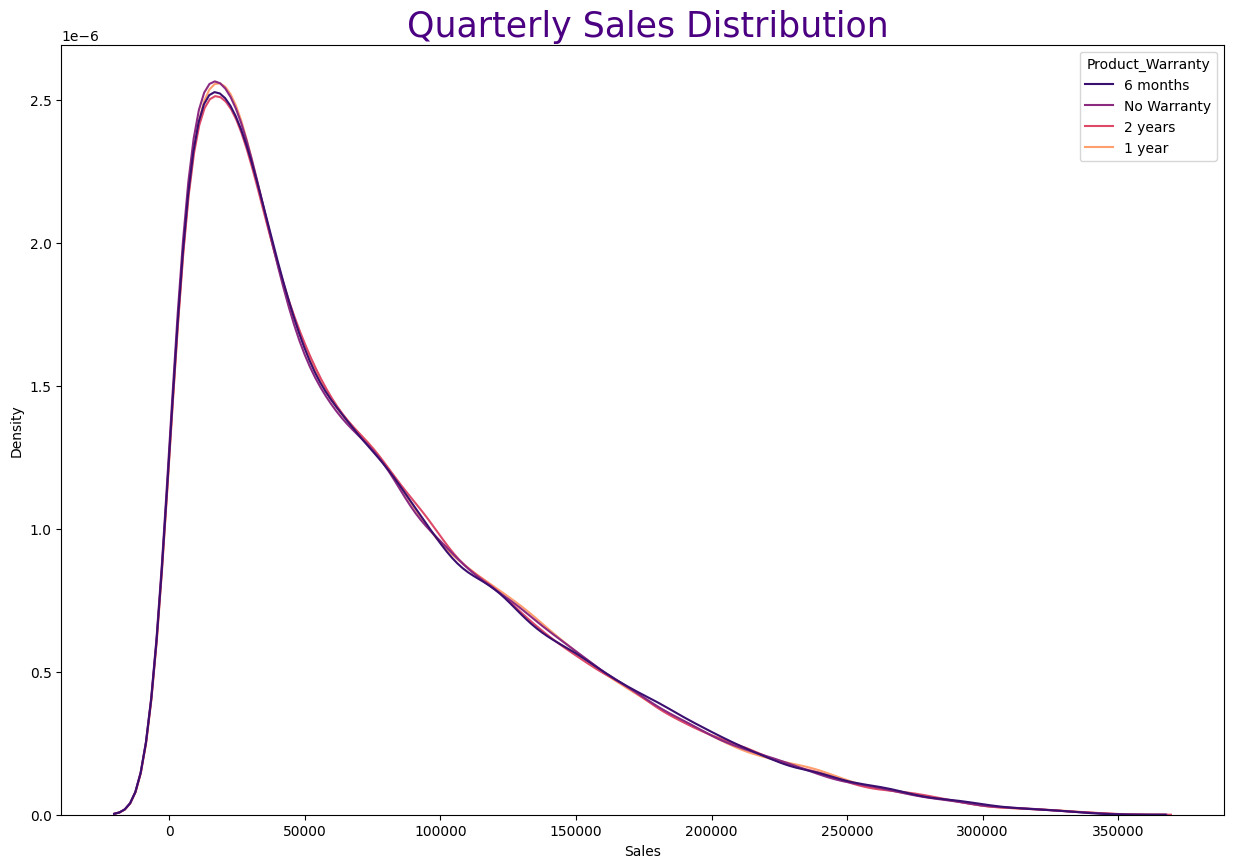

In [260]:
# Plot a histogram of Sales grouped by Quarter

plt.figure(figsize=(15,10))
sb.kdeplot(data=df,x='Sales',hue='Product_Warranty',palette='magma')
plt.title(' Quarterly Sales Distribution',size=25,color='indigo')
plt.show()


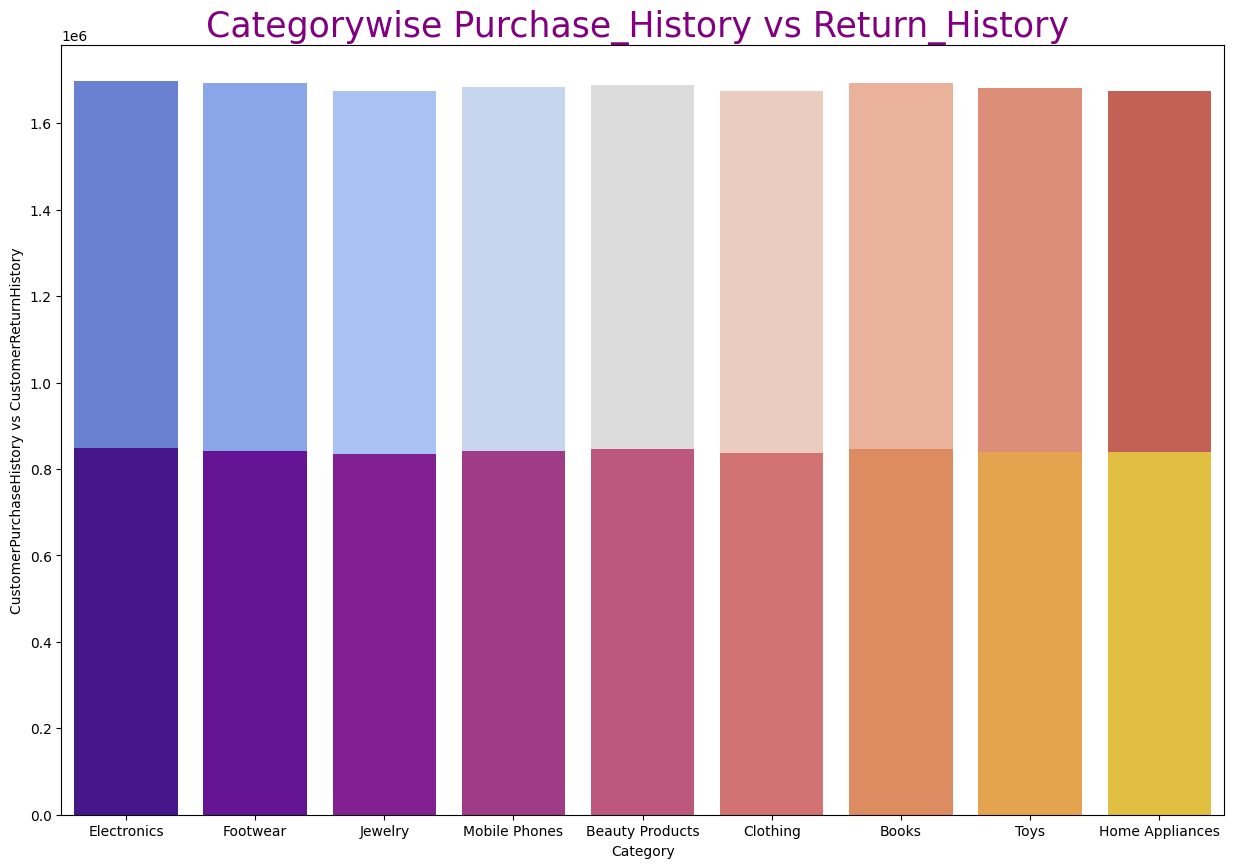

In [261]:
# Draw a stacked bar chart of Category-wise CustomerPurchaseHistory and CustomerReturnHistory

plt.figure(figsize=(15,10))
sb.barplot(data=df,x='Category',y='CustomerPurchaseHistory',estimator='sum',errorbar=('ci',0),palette='coolwarm' )
sb.barplot(data=df,x='Category',y='CustomerReturnHistory',estimator='sum',errorbar=('ci',0),palette='plasma')
plt.ylabel('CustomerPurchaseHistory vs CustomerReturnHistory')
plt.title('Categorywise Purchase_History vs Return_History ',size=25,color='purple')
plt.show()


## D) Return Analysis


In [262]:
df_rt=df[df['return_delay']>0]

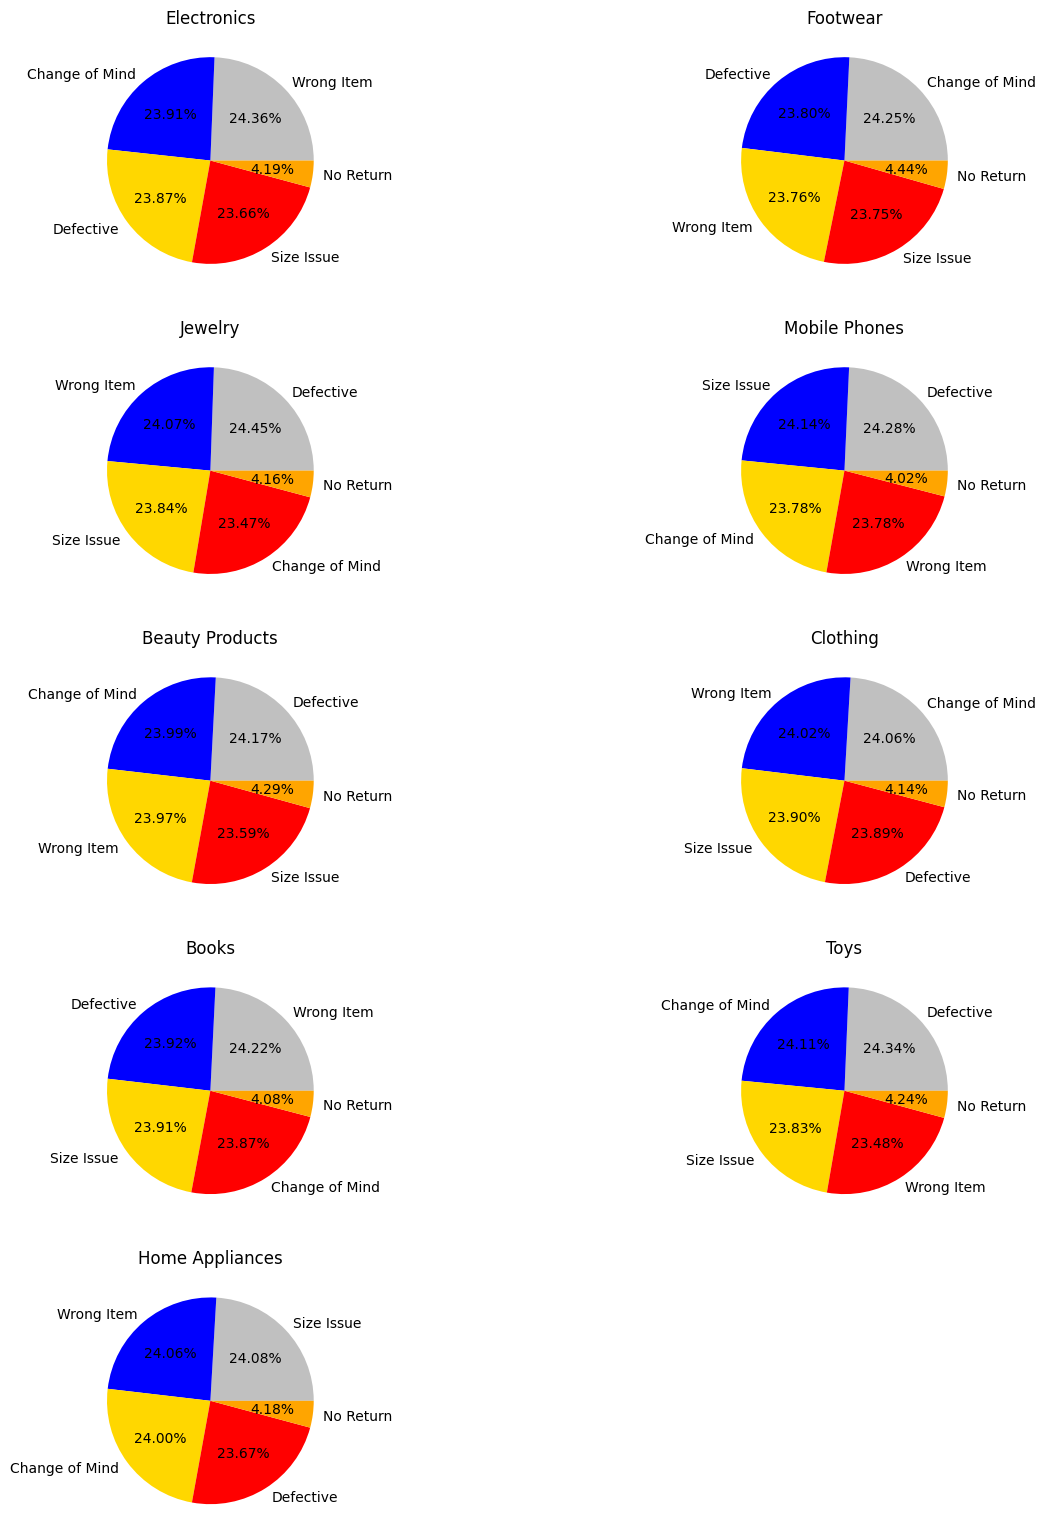

In [263]:
# Create a pie chart of ReturnReason distribution in different Category .

reason= df['Category'].unique().tolist()
plt.figure(figsize=(15,100))

for i in range(len(reason)):
  df_x=df[df['Category']==reason[i]]
  df_ct=df_x['ReturnReason'].value_counts().reset_index()
  plt.subplot(25,2,i+1)
  plt.pie(df_ct['count'],labels=df_ct['ReturnReason'],autopct='%0.2f%%',colors=['silver','blue','gold','red','orange'])
  plt.title(f"{reason[i]}")

plt.show()

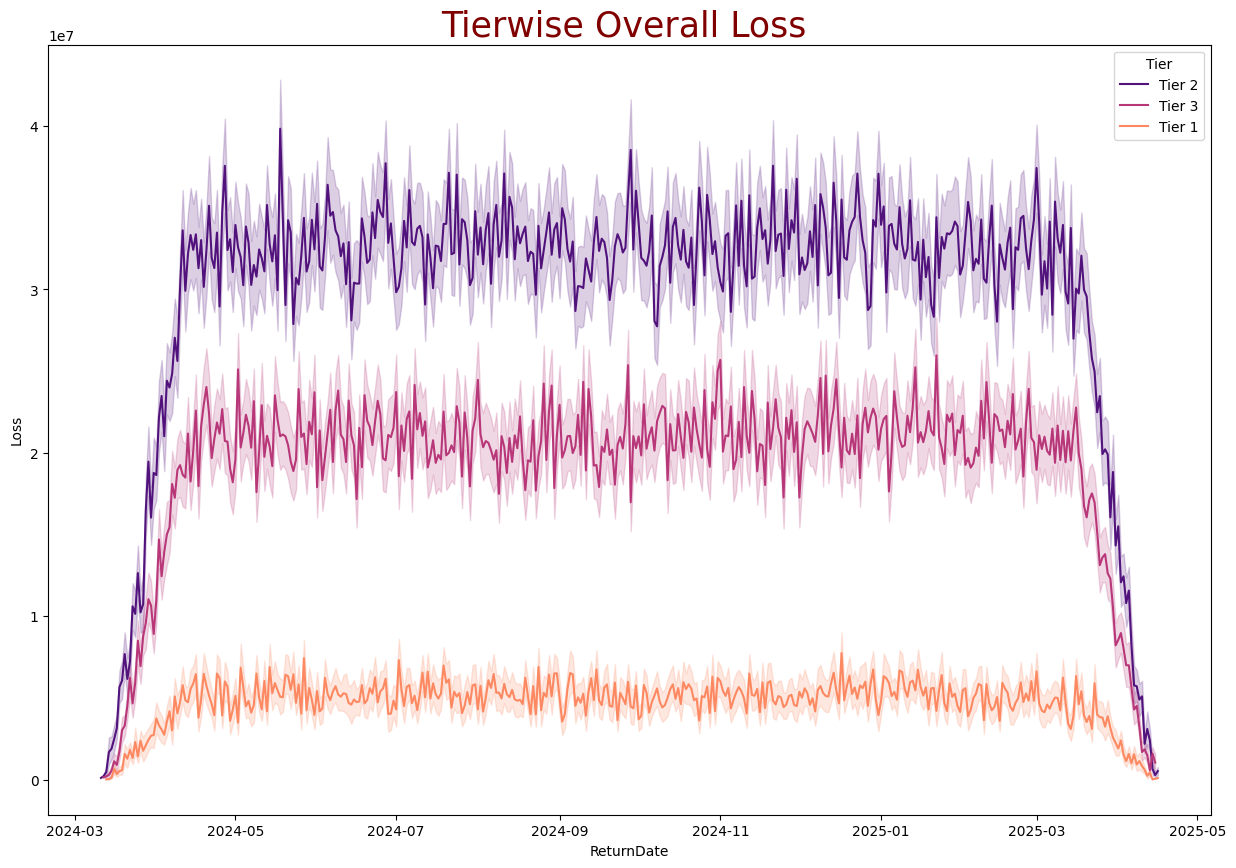

In [264]:
# Plot a line chart showing quantity return count using ReturnDate, in different tier

plt.figure(figsize=(15,10))
sb.lineplot(data=df_rt,x='ReturnDate',y='Sales',estimator='sum',hue='Tier',palette='magma')
plt.ylabel('Loss')
plt.title('Tierwise Overall Loss ',size=25,color='maroon')
plt.show()

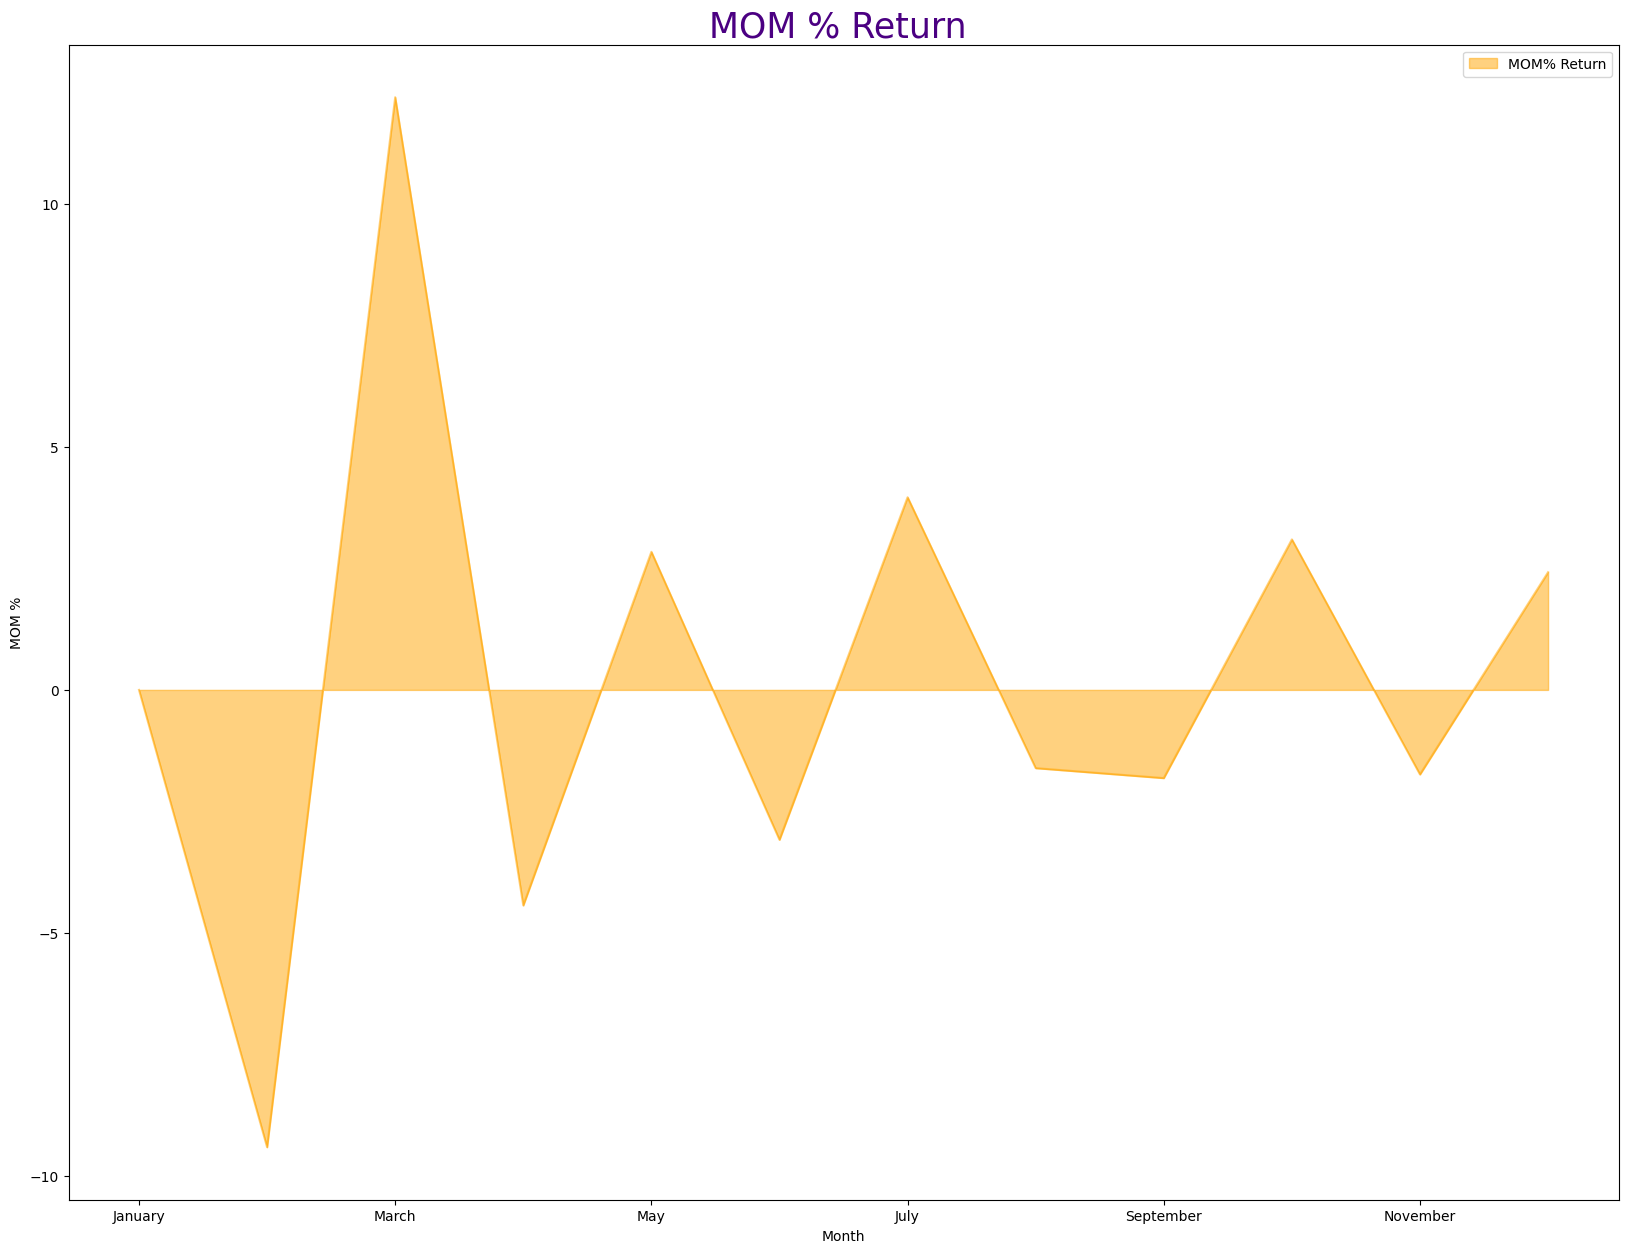

In [265]:
# MOM Total Return

df_x= df_rt.groupby(['Month','Month_N'])['OrderID'].count().reset_index()
df_x.sort_values(by='Month_N',ascending=True,inplace=True)
df_x=df_x[['Month','OrderID']]
df_x.columns=['Month','Return']
df_x['Pre_Return']= df_x['Return'].shift()
df_x['Pre_Return']=df_x['Pre_Return'].fillna(0)
df_x['MOM% Return']=  (df_x['Return']-df_x['Pre_Return'])/df_x['Pre_Return']*100
df_x['MOM% Return']= np.where(df_x['MOM% Return']==np.inf,0,df_x['MOM% Return'])
df_x=df_x[['Month','MOM% Return']]
df_x=df_x.set_index('Month')

df_x.plot(kind='area',stacked=False,color='orange',figsize=(20,15))
plt.ylabel('MOM %')
plt.title('MOM % Return ',size=25,color='indigo')
plt.show()

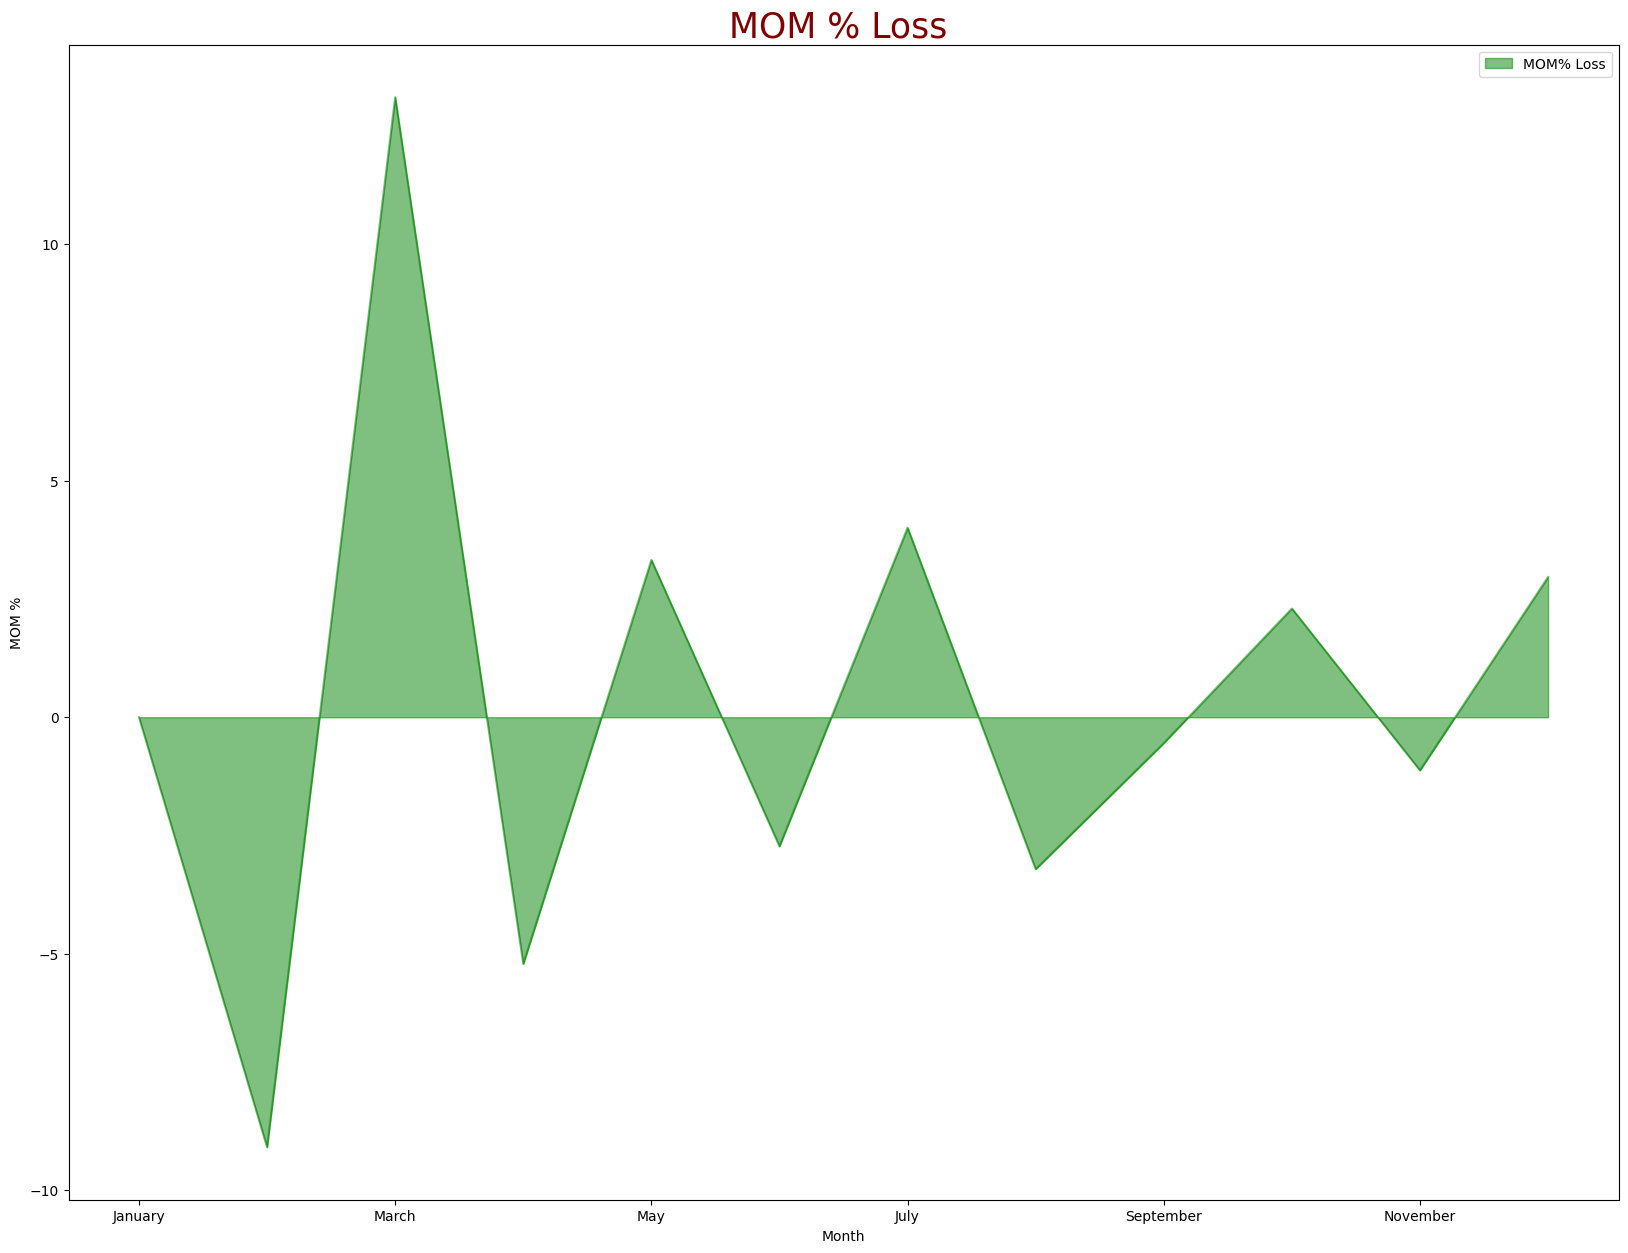

In [266]:
# MOM Loss

df_x= df_rt.groupby(['Month','Month_N'])['Sales'].sum().reset_index()
df_x.sort_values(by='Month_N',ascending=True,inplace=True)
df_x=df_x[['Month','Sales']]
df_x.columns=['Month','Loss']
df_x['Pre_Loss']= df_x['Loss'].shift()
df_x['Pre_Loss']=df_x['Pre_Loss'].fillna(0)
df_x['MOM% Loss']=  (df_x['Loss']-df_x['Pre_Loss'])/df_x['Pre_Loss']*100
df_x['MOM% Loss']= np.where(df_x['MOM% Loss']==np.inf,0,df_x['MOM% Loss'])
df_x=df_x[['Month','MOM% Loss']]
df_x=df_x.set_index('Month')

df_x.plot(kind='area',stacked=False,color='green',figsize=(20,15))
plt.ylabel('MOM %')
plt.title('MOM % Loss ',size=25,color='maroon')
plt.show()

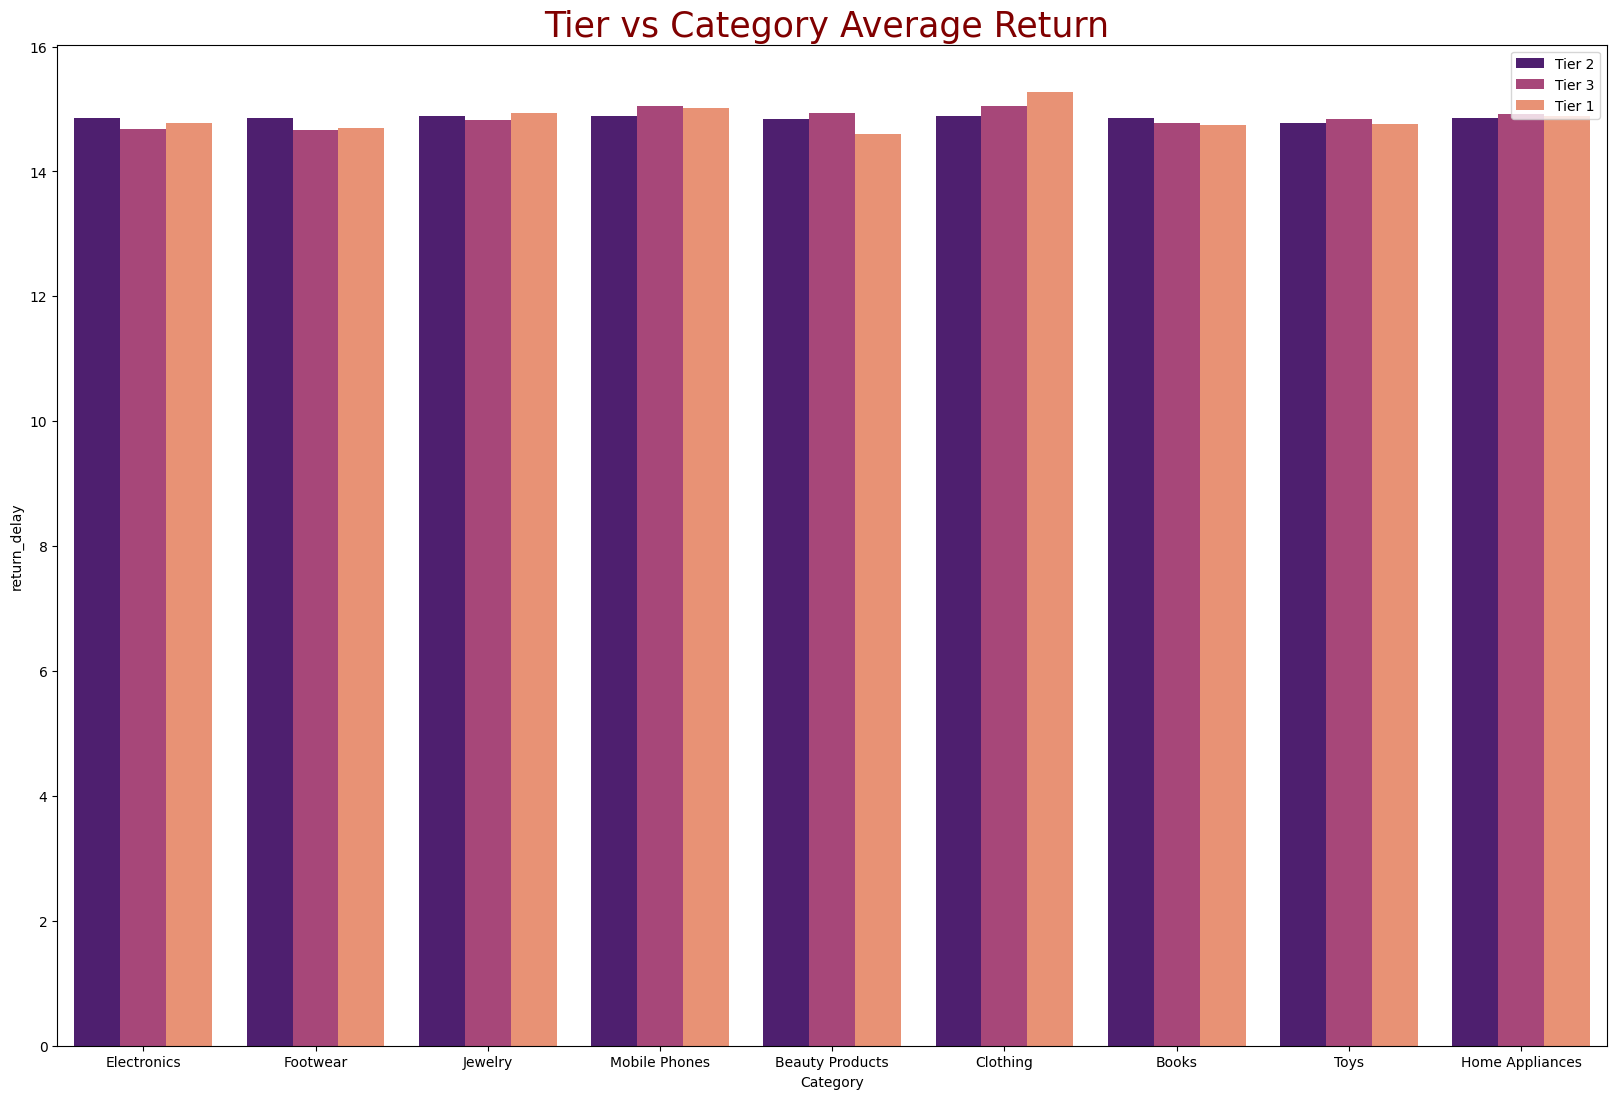

In [267]:
# Draw a bar chart comparing average return time by Category, in different Tier

plt.figure(figsize=(20,13))
sb.barplot(data=df,x='Category',y='return_delay',hue='Tier',errorbar=('ci',0),palette='magma',estimator='mean' )
plt.title('Tier vs Category Average Return ',size=25,color='maroon')
plt.legend(loc=1)
plt.show()

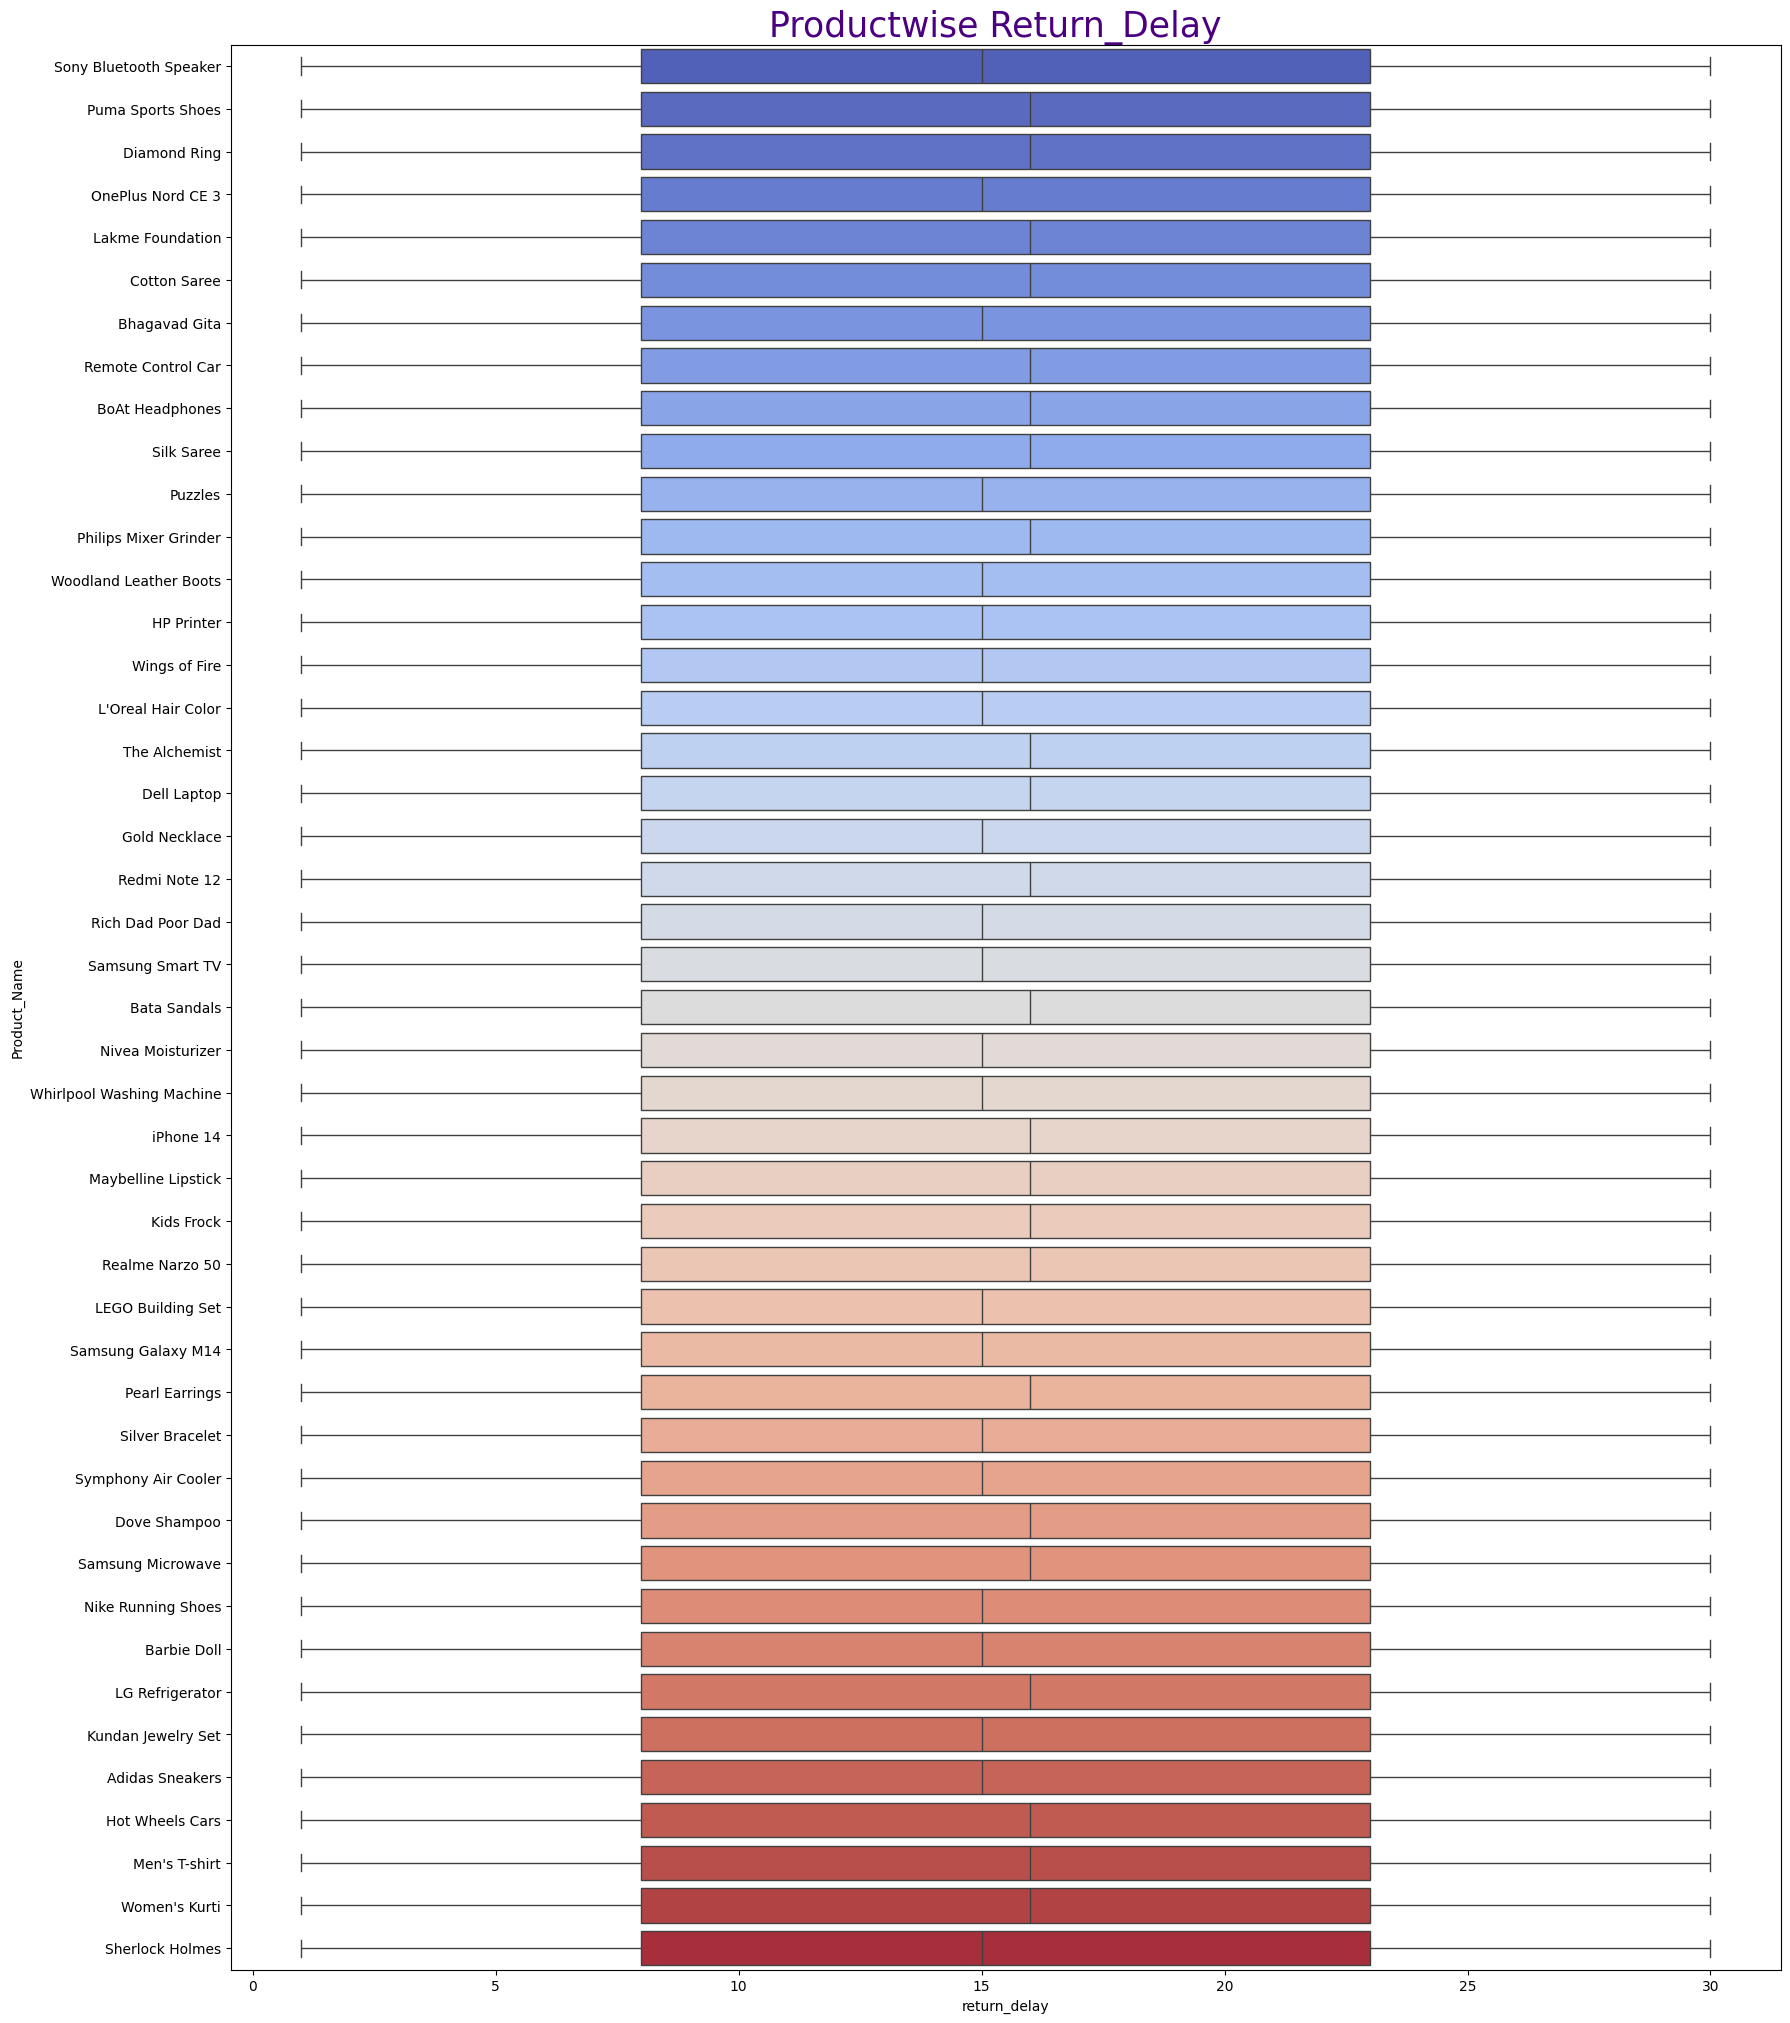

In [268]:
# Use a boxplot to examine ReturnDelay distribution by product.

plt.figure(figsize=(20,25))
sb.boxplot(data=df_rt,y='Product_Name',x='return_delay',palette='coolwarm')
plt.title('Productwise Return_Delay  ',size=25,color='indigo')
plt.show()


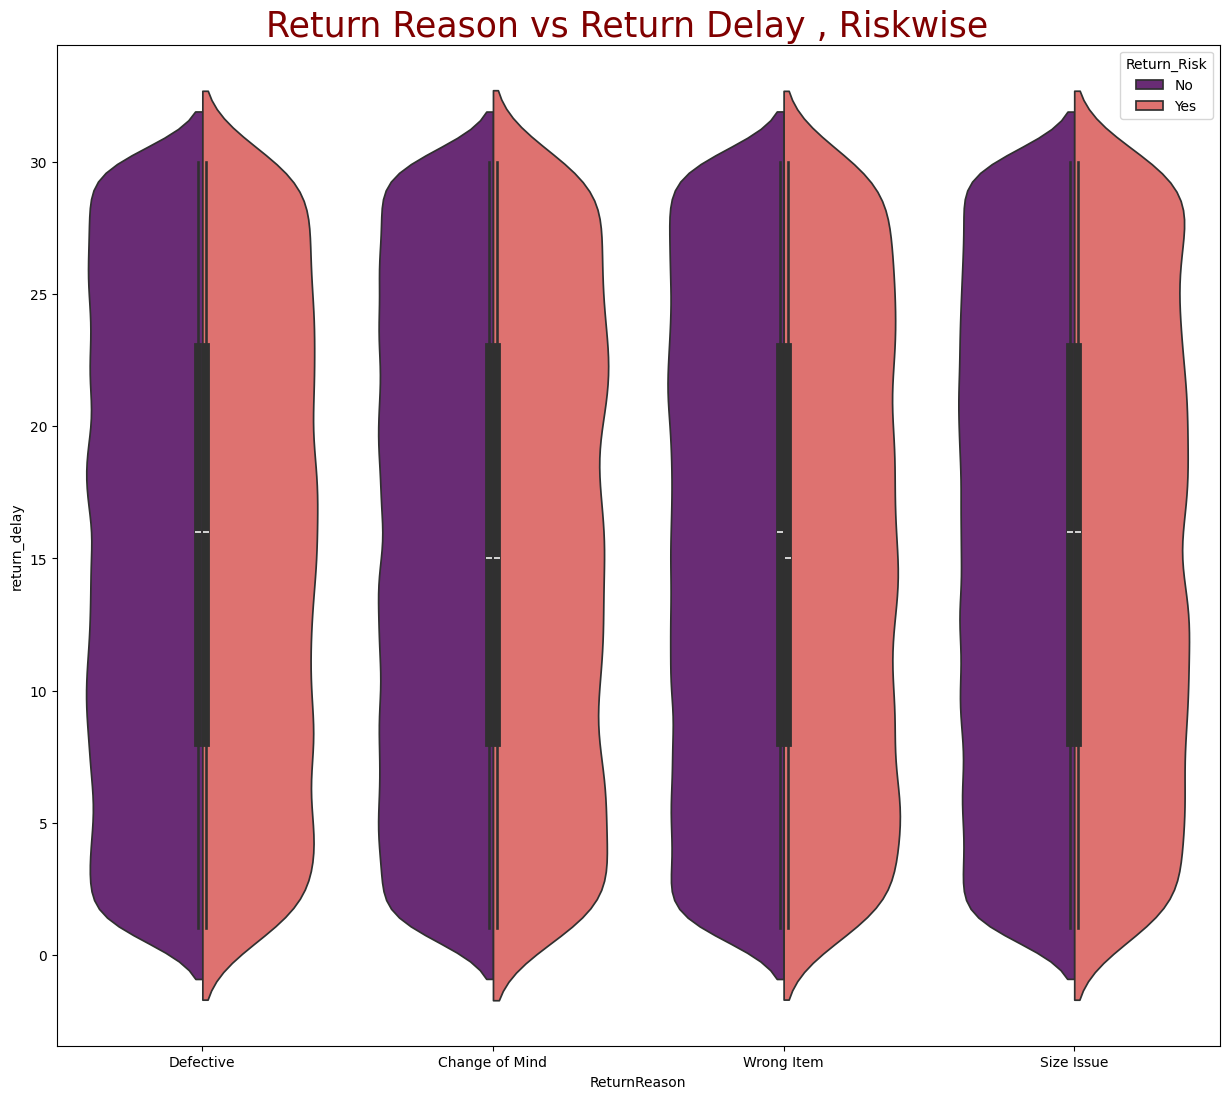

In [269]:
# Plot a violin plot of ReturnDelay by ReturnReason, in Return Risk

plt.figure(figsize=(15,13))
sb.violinplot(data=df_rt,x='ReturnReason',y='return_delay',hue='Return_Risk',split=True,palette='magma')
plt.title('Return Reason vs Return Delay , Riskwise  ',size=25,color='maroon')
plt.show()


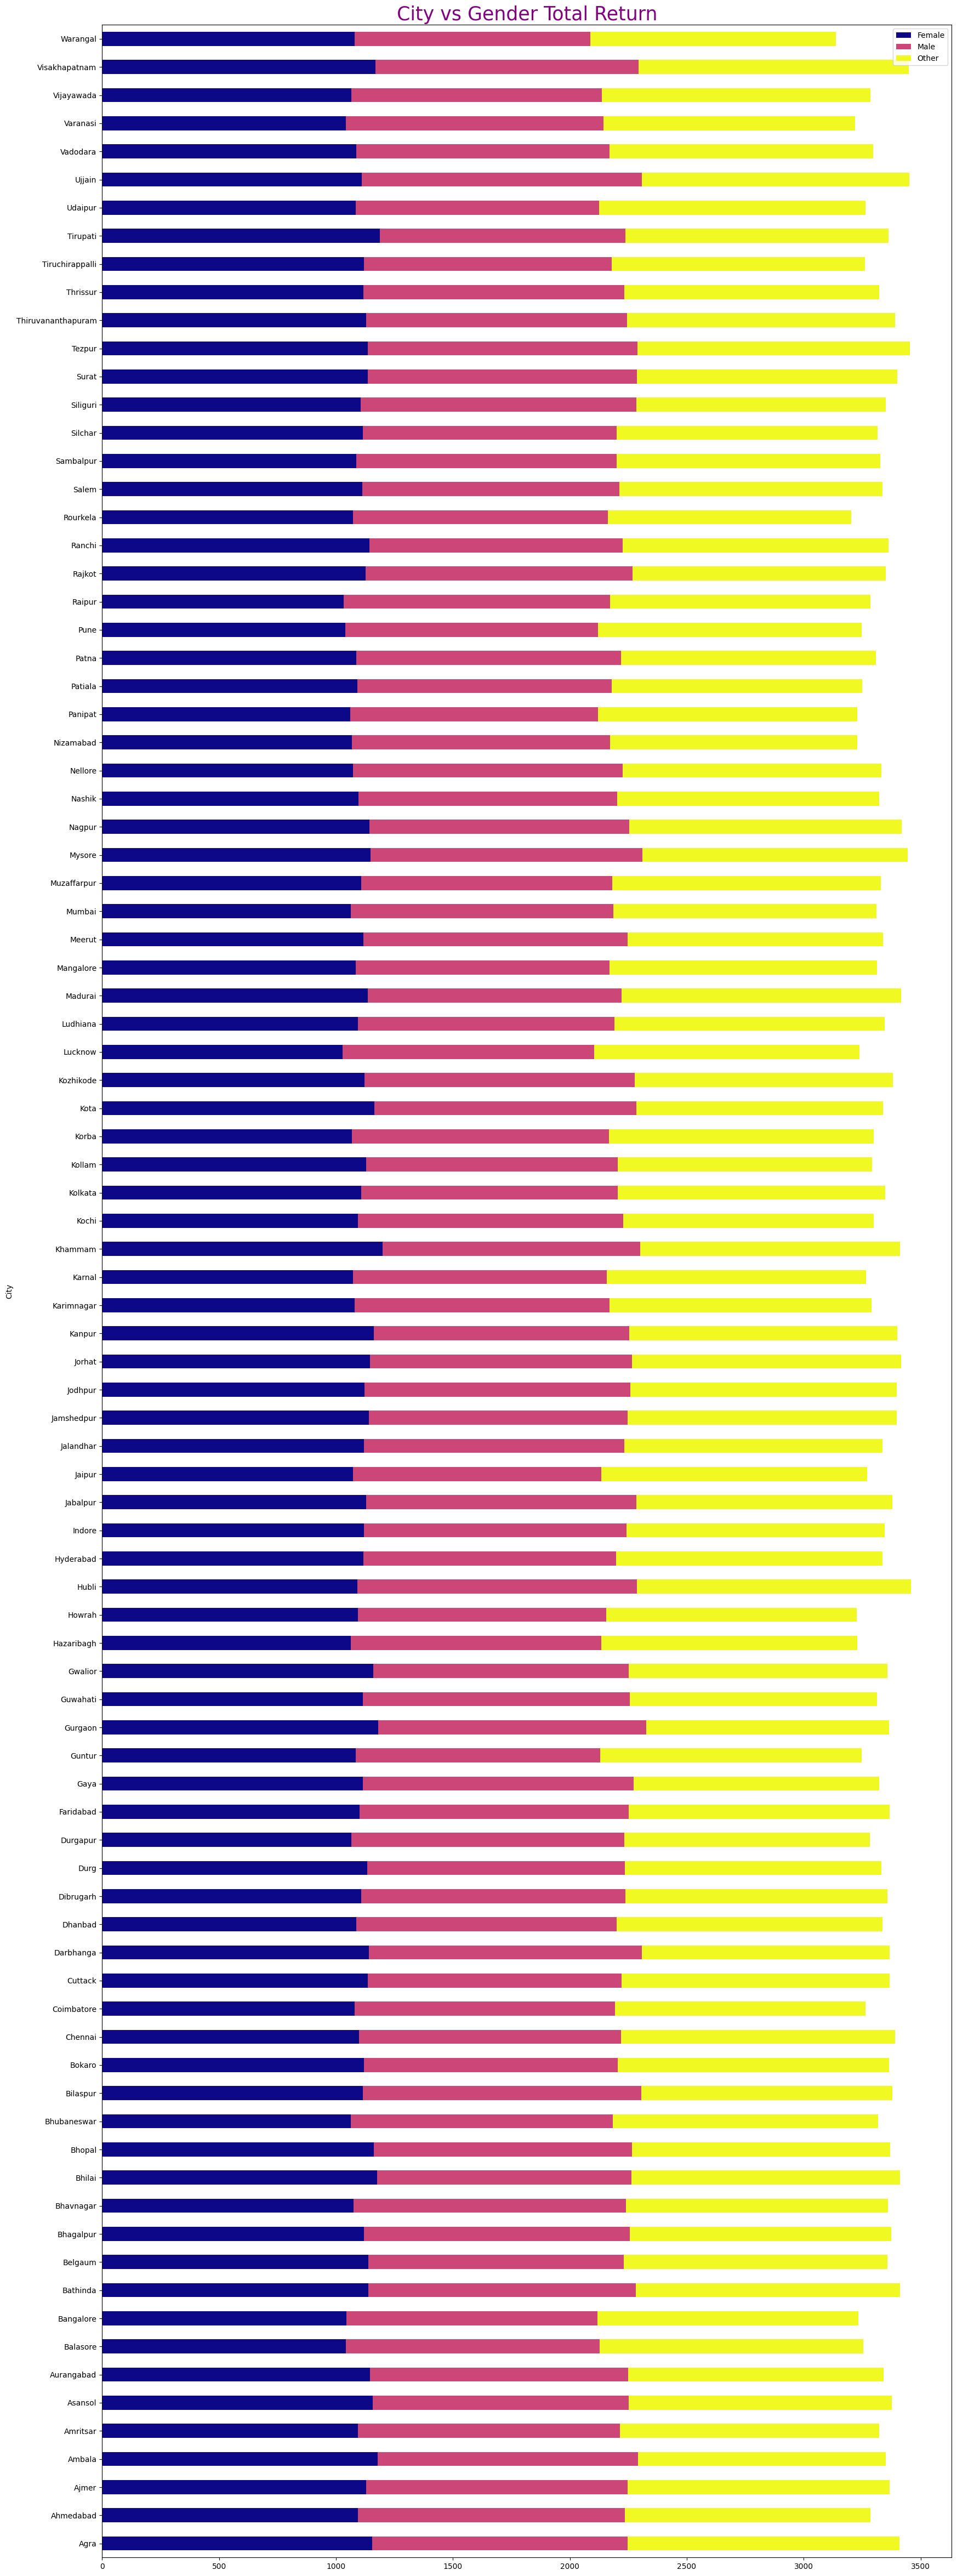

In [270]:
# Create a stacked bar chart of returns count by City and Gender.

df_x=pd.crosstab(index=df['City'],columns=df['CustomerGender'])
df_x.plot(kind='barh',stacked=True,figsize=(20,60),colormap='plasma')
plt.ylabel('City')
plt.title('City vs Gender Total Return',size=25,color='purple')
plt.legend(loc=1)
plt.show()


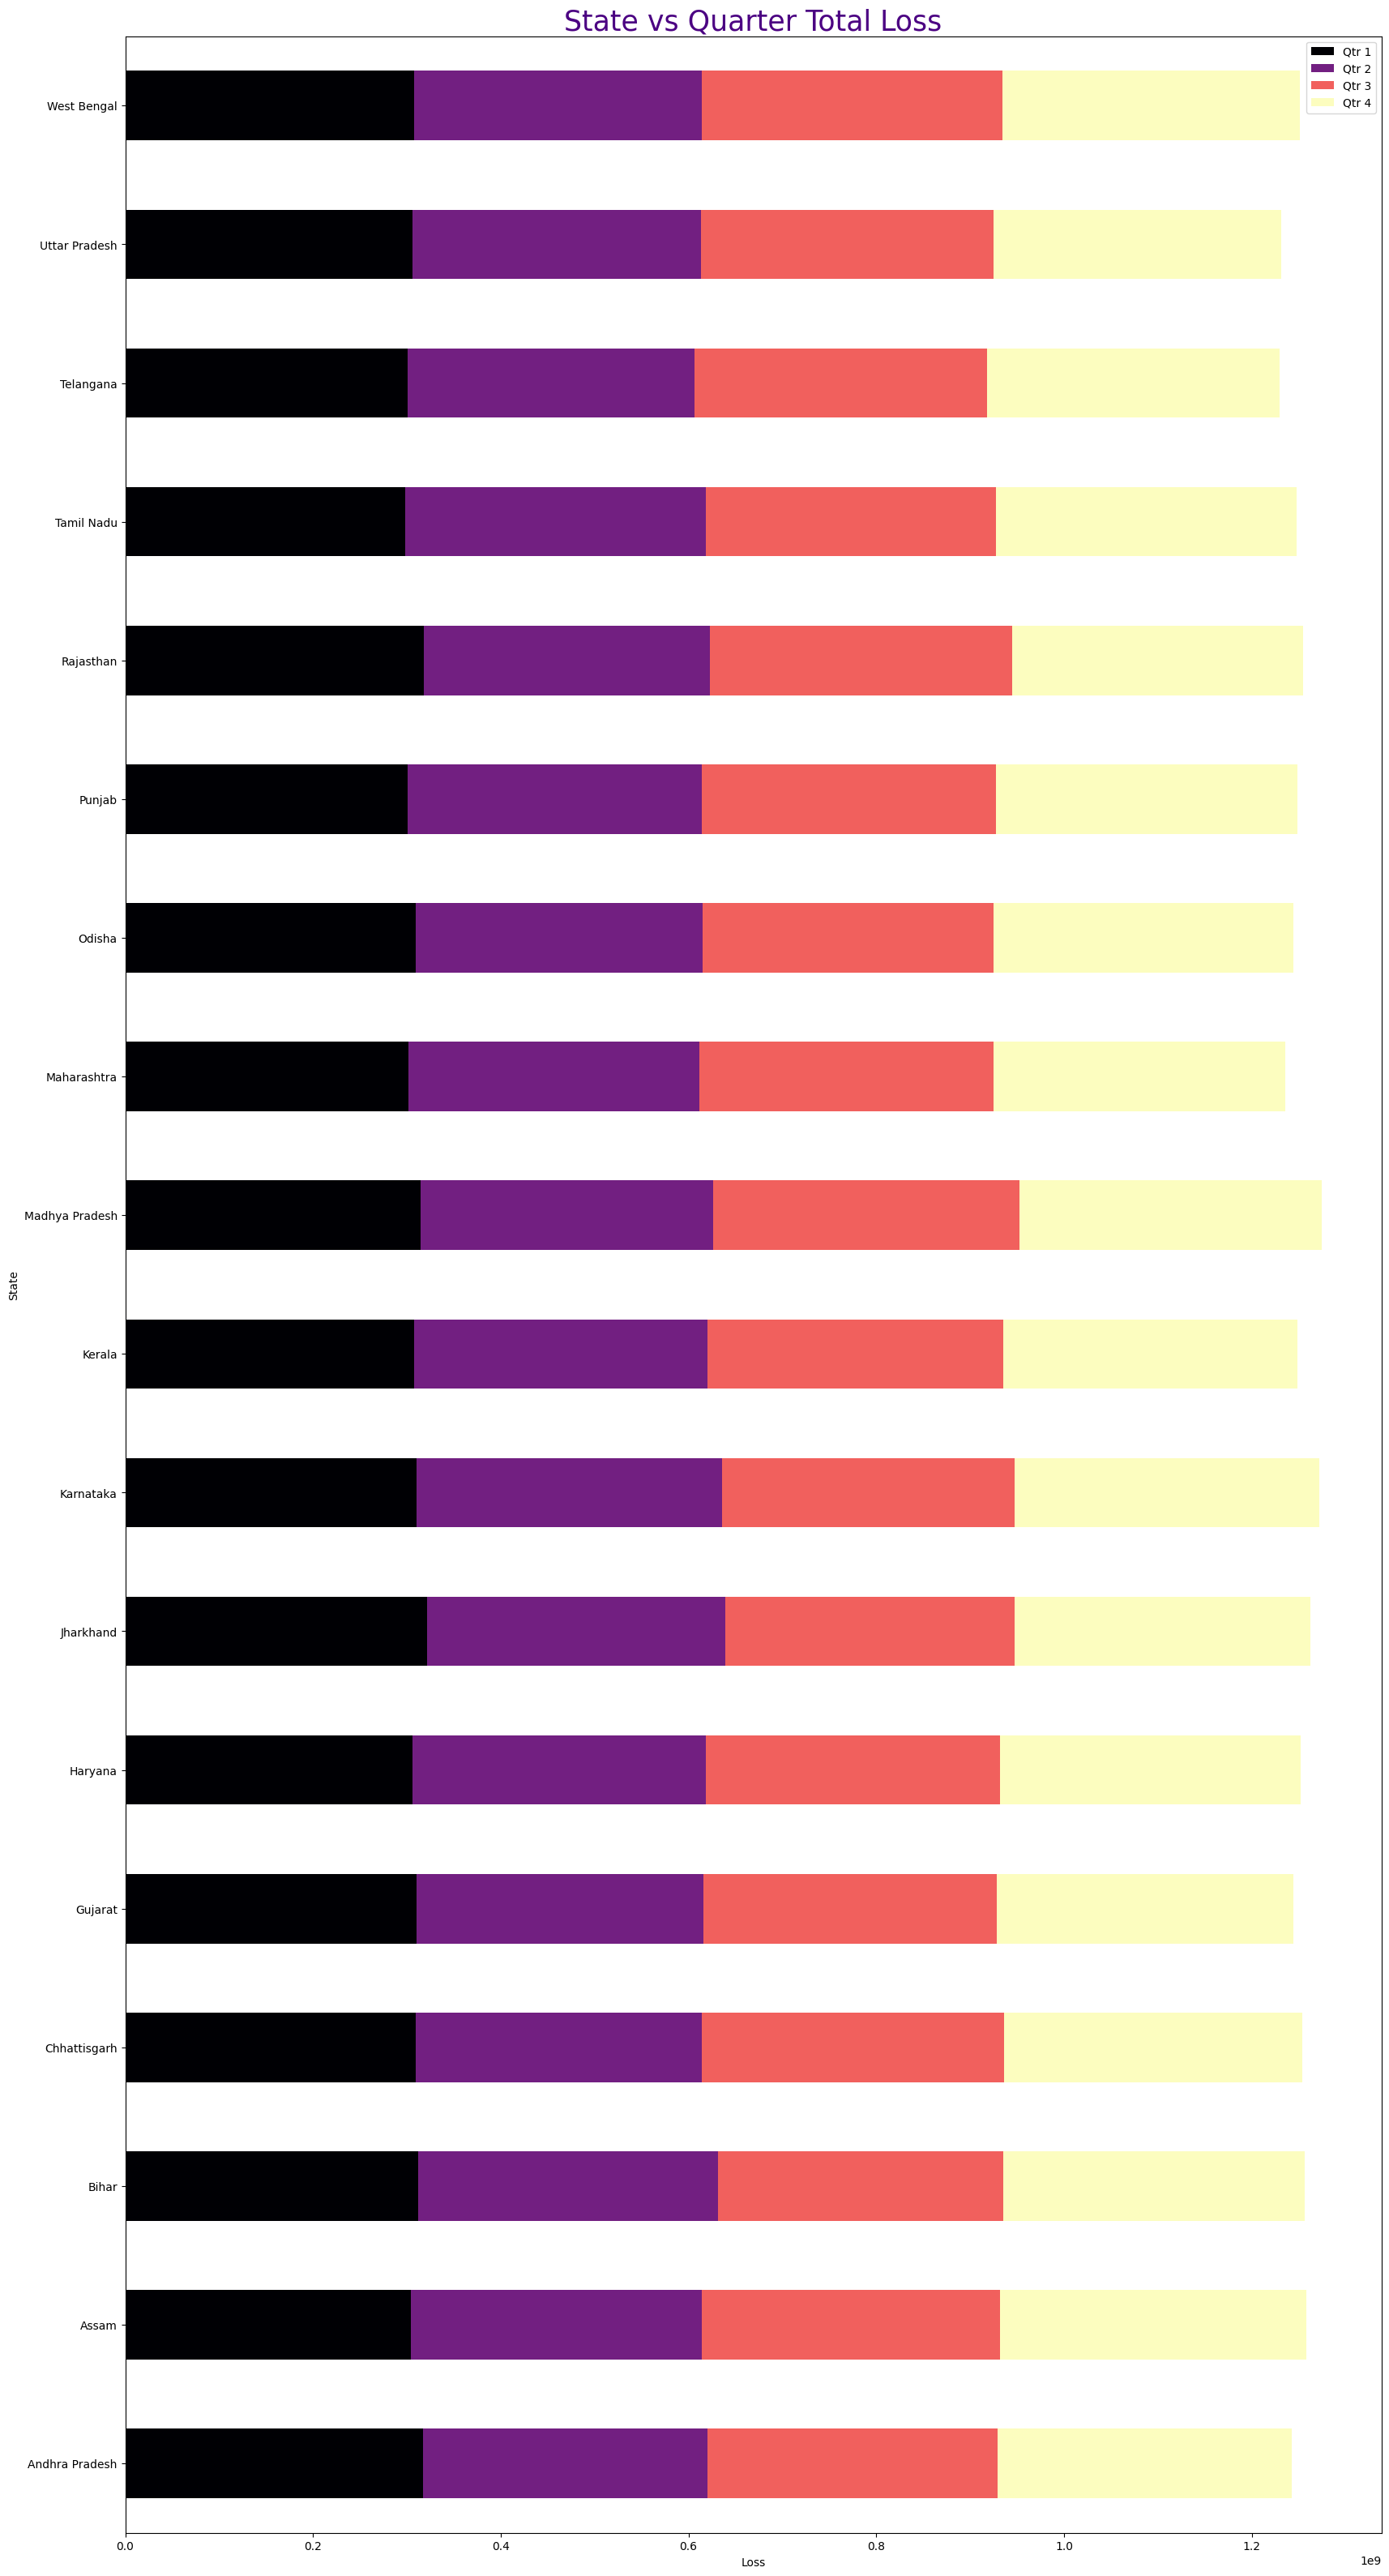

In [271]:
# Generate a bar chart of Statewise-wise Loss in different Quarter


df_x=pd.crosstab(index=df['State'],columns=df['Quarter'],values=df['Sales'],aggfunc='sum')
df_x.plot(kind='barh',stacked=True,figsize=(20,40),colormap='magma')
plt.ylabel('State')
plt.xlabel('Loss')
plt.title('State vs Quarter Total Loss',size=25,color='indigo')
plt.legend(loc=1)
plt.show()